# Quick link
[Test pretrain model MobileNet V2 100 224x224](#testpretrain)

[Retrain model](#retrain)

In [1]:
import pandas as pd
import json

import shutil
import os

In [2]:
data = pd.read_csv("ndsc-beginner\\train.csv")
data.tail()

itemid                                              title  \
666610  1510771637  beli 2 gratis 1 xiaomi mi mix black 6 64 rom g...   
666611  1515822742  android i phone x real 4g 16gb free wireless c...   
666612  1516747666                     xiaomi mia1 ram 4gb 64gb black   
666613  1517270941                   khusus hari ini samsung j2 prime   
666614  1518889125            oppo a83 2 gb new garansi resmi 1 tahun   

        Category                                         image_path  
666610        34  mobile_image/70e0d8ddd69692b0f134498efbddf4e1.jpg  
666611        35  mobile_image/d58393fe029ba62160d2a5d1fa6638a1.jpg  
666612        34  mobile_image/bfacb3c9af2f6a597008e57fb2d34609.jpg  
666613        32  mobile_image/42d74ab8212a24720d42e84c649ab488.jpg  
666614        41  mobile_image/0b10f33a67ccb4ee3e1240d44c2ee0ef.jpg

In [3]:
with open("ndsc-beginner\\categories.json", "r") as read_file:
    categories = json.load(read_file)

num2categories = {}
for l1 in categories:
    for l2 in categories[l1]:
        num2categories[categories[l1][l2]] = '{}_{}'.format(categories[l1][l2],l2)

num2categories

{35: '35_Others Mobile & Tablet',
 53: '53_Smartfren',
 40: '40_Infinix',
 39: '39_Brandcode',
 52: '52_Icherry',
 45: '45_Advan',
 31: '31_Iphone',
 51: '51_Realme',
 49: '49_Motorola',
 56: '56_Maxtron',
 38: '38_Nokia',
 34: '34_Xiaomi',
 46: '46_Mito',
 33: '33_Sony',
 57: '57_SPC',
 37: '37_Lenovo',
 55: '55_Alcatel',
 32: '32_Samsung',
 42: '42_Vivo',
 44: '44_Evercoss',
 50: '50_Strawberry',
 36: '36_Blackberry',
 43: '43_Asus',
 54: '54_Honor',
 41: '41_Oppo',
 47: '47_Huawei',
 48: '48_Sharp',
 23: '23_Wedding Dress',
 27: '27_Shirt',
 18: '18_Casual Dress',
 20: '20_Maxi Dress',
 24: '24_Big Size Dress',
 22: '22_Bodycon Dress',
 19: '19_Party Dress',
 26: '26_Blouse\xa0',
 25: '25_Tshirt',
 29: '29_Crop Top ',
 28: '28_Tanktop',
 17: '17_Others',
 21: '21_A Line Dress',
 30: '30_Big Size Top',
 1: '1_Foundation',
 0: '0_Face Palette',
 7: '7_Concealer',
 14: '14_Lip Gloss',
 2: '2_Blush On',
 8: '8_Highlighter',
 5: '5_BB & CC Cream',
 4: '4_Other Face Cosmetics',
 13: '13_L

<a id='create'></a>

# Create directory for training and testing data


In [468]:
#Create list of directory names
dirnames = list(num2categories.values())
dirnames[0:5]

['35_Others Mobile & Tablet',
 '53_Smartfren',
 '40_Infinix',
 '39_Brandcode',
 '52_Icherry']

In [5]:
for d in dirnames:
    os.makedirs('training_image\\{}'.format(d), exist_ok=1)
    os.makedirs('testing_image\\{}'.format(d), exist_ok=1)

# Split images into train:test

In [6]:
# boolean vector to select 90% of images as training data

import random

MAX = len(data) #666615
N_TRAIN = round(MAX*0.9)

boolvec_train = [True]*N_TRAIN + [False]*(MAX - N_TRAIN)
random.seed(10)
random.shuffle(boolvec_train)

# Negation of boolean vector for select testing data
boolvec_test = list(map(lambda x:not x,boolvec_train))


In [7]:
# might want to spike data from "Mobile" since it does not have alot of training data

train_data = pd.DataFrame(data.loc[:,['Category','image_path']])[boolvec_train]
test_data = pd.DataFrame(data.loc[:,['Category','image_path']])[boolvec_test]

## This part will take forever...

In [471]:
# Move images to new folders for training or testing.
# This is necessary for retraining the image clf model
# use "shutil.move" instead if you dont want to duplicate all 70gb of images and just want to relocate them

from tqdm import tqdm

for i in tqdm(range(len(train_data))):
    src = train_data.iloc[i,1]  # e.g [1, 'beauty_image/20450222d857c9571ba8fa23bdedc8c9.jpg']
    dst = 'training_image\\{}'.format(num2categories[train_data.iloc[i,0]]) # e.g training_image\\1_Foundation\\20450222d857c9571ba8fa23bdedc8c9.jpg
    try:
        shutil.copy(src,dst)
    except:
        print ('err '+src)
        pass



  0%|                                                                                       | 0/599954 [00:00<?, ?it/s]

err beauty_image/20450222d857c9571ba8fa23bdedc8c9.jpg
err beauty_image/6a5962bed605a3dd6604ca3a4278a4f9.jpg
err beauty_image/56987ae186e8a8e71fcc5a261ca485da.jpg
err beauty_image/9c6968066ebab57588c2f757a240d8b9.jpg
err beauty_image/77e6b7e9d5544adbfda6809b2351c4fa.jpg
err beauty_image/485c4b8435a1e94976a569f3f014ea8b.jpg
err beauty_image/970b32aa659689f371516e5ceb423e25.jpg
err beauty_image/49a47745248031775c98593f70f7201a.jpg
err beauty_image/b9c7520d1e7db646f3fd9a506bf217d2.jpg
err beauty_image/61c6562efdb08df862c57c393d85165e.jpg
err beauty_image/b127456214fbc670d769b44f67190845.jpg
err beauty_image/df301ccce6dfdf8afbe92e29355c8a38.jpg
err beauty_image/be2218804c9f47e0a52fa49e818d9867.jpg
err beauty_image/3b0242f05b102ba074bf66c2546d542a.jpg
err beauty_image/0025491eaeb55e40166dce7249ca24a4.jpg
err beauty_image/4a910e099389786334aaf0de3673cd58.jpg
err beauty_image/76f6e0a1827197bf0679c849d4b82d86.jpg
err beauty_image/26404647e0917756245a970c776cc537.jpg
err beauty_image/2a162a70660



  0%|                                                                             | 49/599954 [00:00<20:25, 489.66it/s]

err beauty_image/9b6baf92bf6892977b200b9c476a841c.jpg
err beauty_image/c15541e9feb3e8849305257b46b558d1.jpg
err beauty_image/8d0b8884d37a30f57fde5dfa8c4e2abb.jpg
err beauty_image/9effd2657d8e9be5d2285a4b7d321b54.jpg
err beauty_image/49d3ce4f01b9f20ba013586b1d5c12fc.jpg
err beauty_image/7e2e25c1a64fe093459e7abd13bdad7f.jpg
err beauty_image/4dabedeafbbbe2ca624fcad518a089b5.jpg
err beauty_image/2964c225760c5282593c5ec1ad470237.jpg
err beauty_image/000d9b67c621ad11320135ac63b2061c.jpg
err beauty_image/56d7f9182223b37060698394f5ec7250.jpg
err beauty_image/50bfd6350c5e6d60fcd367fe0a5199d2.jpg
err beauty_image/2b3743882980766c4336ba222450bdc8.jpg
err beauty_image/0509ef9ee88adf3c3cbd0cd12461d276.jpg
err beauty_image/7e68e16cf86a52ba8855f366e64e563d.jpg
err beauty_image/a05ea6649fcd0c44d4eda67b01330dca.jpg
err beauty_image/efe4005e6db177f40f853894815ad873.jpg
err beauty_image/dd882cd7719235e8c673ee769dadbe98.jpg
err beauty_image/47f82c9b6ce17f50ccc04136f283df1d.jpg
err beauty_image/9290f743da7



  0%|                                                                             | 89/599954 [00:00<21:56, 455.55it/s]

err beauty_image/cd577ff77430731a1311f5223fa85c25.jpg
err beauty_image/77e10923c26a894a75334ed4edb852d9.jpg
err beauty_image/92ccf1090aa0b0e59e68b4e6cbb6487d.jpg
err beauty_image/3c9fa061140e0242cc91191481962aa7.jpg
err beauty_image/dd559a6a140973e6b189808ff24d8a8a.jpg
err beauty_image/a4f9b8847c13985ddb24d781d270ed19.jpg
err beauty_image/6ba2125e9fbdea1dce566cda69f65ac9.jpg
err beauty_image/4e4f0fa6183605b2911e6b14578a9246.jpg
err beauty_image/78de4a917bda245e4032d2fd046b60cb.jpg
err beauty_image/9a1a802f50a9a90a79704140e23b32bf.jpg
err beauty_image/74f5cda8bda6b838b91f953ca576f0c6.jpg
err beauty_image/12cf8c6dc19852b164043ea72982c68c.jpg
err beauty_image/1e8665b60bc0d6881e7f0b63bb7808c2.jpg
err beauty_image/abfb8157d55f77853b5c5e1de6d3b90e.jpg
err beauty_image/5991ed2c37d5a1eb5d9e9fae313bb845.jpg
err beauty_image/db878b4de22583dcb4d5c1a5342c0fed.jpg
err beauty_image/49773419f1a9b4e9cc29f05634a1ab73.jpg
err beauty_image/c9def3cd65acea1a90b55e10c766620c.jpg
err beauty_image/2dc4a169754



  0%|                                                                            | 132/599954 [00:00<22:24, 446.08it/s]

err beauty_image/4a3b27acbfafb0ca01cfc6939f778155.jpg
err beauty_image/85b3b5d1a7c65d2a8236e9818196cc49.jpg
err beauty_image/2b4e04c77410eface9b712392ed88b40.jpg
err beauty_image/08ebd5d842a8fa97b52d464e00d98d81.jpg
err beauty_image/c4aee05e63830b0b6c4a1220cfcf5bf9.jpg
err beauty_image/fbfc8b6833da4604d44cd7141a0aa749.jpg
err beauty_image/452033705cfbe4495a3699775d1da412.jpg
err beauty_image/1e9af0579c17622b067272e9e07a0473.jpg
err beauty_image/a600d82446f665d11cb3bef87e063bd4.jpg
err beauty_image/7ec34c4f97dd7d731e426b69adac9b7e.jpg
err beauty_image/01a45579957930fee7b2b6bdd3c54b6d.jpg
err beauty_image/84d5c46e2673e9acf9c6e64e59d80029.jpg
err beauty_image/46ac788889d39786d39de36799a582cd.jpg
err beauty_image/8d06f3228818024ce7d26b385fbe5e3c.jpg
err beauty_image/ac0f5130ad4dc8ea8c6dd38c14fa4316.jpg
err beauty_image/d26a0b2a847003e5472bba05546a6637.jpg
err beauty_image/f56fbc856096ddf8396f1c18fa2f8a1a.jpg
err beauty_image/5c384dd7368a9fab6f29e2d08964c694.jpg
err beauty_image/30149122d0e



  0%|                                                                            | 164/599954 [00:00<25:03, 398.82it/s]

err beauty_image/aa0ac10bc17bba4f120e501b7fc5566e.jpg
err beauty_image/de6c067bf755460e2ad7b2997f3bb3a8.jpg
err beauty_image/93aa8b0efde326477392f6e0b442ca6b.jpg
err beauty_image/f4b128ac5a0cc97c61df5a8097dc9439.jpg
err beauty_image/71936f83b7a88df415b09f18bb75ae2f.jpg
err beauty_image/ef3ae5ad3bb0a825e76632bf97e22bbe.jpg
err beauty_image/667f928eeef37887e4569490c8e8b576.jpg
err beauty_image/e1c463213be1f96999c5279194394f3c.jpg
err beauty_image/e8ff78893f2d410818aacd02a47647a1.jpg
err beauty_image/6efa2301b75834ae1b181d3347d38c8e.jpg
err beauty_image/b4c62d10bba847b66ee79d5f2951a108.jpg
err beauty_image/c311bab71ed3cef79de875676c6292ff.jpg
err beauty_image/779a59922fed49f9cb76d495ba0809f9.jpg
err beauty_image/976ada778b93e26bda7562646ebd2bec.jpg
err beauty_image/e254ca2ebc5117e163c8d020b7741768.jpg
err beauty_image/1556eaff0bd239885b5c3d8b0a5375cb.jpg
err beauty_image/df88ff6fbb3e95de4530d7134cbc5432.jpg
err beauty_image/ac1ec82b7cee8f108624e33f783f6a0c.jpg
err beauty_image/d77c41f3878



  0%|                                                                            | 199/599954 [00:00<26:07, 382.71it/s]

err beauty_image/9b73e288e76b523534dcb80a809974ee.jpg
err beauty_image/ef7a78dfd95980dd811e8fb26b8c0aed.jpg
err beauty_image/2435d906e5407a3c34027bb4624ca7ca.jpg
err beauty_image/ab95316fca3fca381f5545d79424426e.jpg
err beauty_image/10aec6db69edf289d6830ce41440be82.jpg
err beauty_image/cec1cd828a92fbf7154939979aace052.jpg
err beauty_image/8dbbb79e8ece624b6847c2e556bcb7ac.jpg
err beauty_image/59b970b432139ecc56bdb396bc73bdb9.jpg
err beauty_image/0c73cc3104e06a4dcc5c40c24d90b95b.jpg
err beauty_image/04e7e28331782c79875846b43ba2c51e.jpg
err beauty_image/fddc592079ceb8fc075fb2b762c987a2.jpg
err beauty_image/5aa24a5a842270e864611714750a5f17.jpg
err beauty_image/e9ff85ef37ad620e113823422d17aeed.jpg
err beauty_image/117744ea6967ae69a44dd46edcd562cb.jpg
err beauty_image/a25a573dd7b6a8791b366d04468e9a60.jpg
err beauty_image/6ff5c11229421ff4cd87877e64e0eccf.jpg
err beauty_image/5d57b667974a6c8048b63784051240e3.jpg
err beauty_image/a1c59f15328b803c6e9a20ebae174a69.jpg
err beauty_image/d36fab38ad9



  0%|                                                                            | 233/599954 [00:00<27:17, 366.34it/s]

err beauty_image/73fe754a65bc303e7b8f2306cb29b984.jpg
err beauty_image/e2b3a66cf3665f8ea4777b58b64fff7d.jpg
err beauty_image/604713230e0602f7e15854a4b0b0e89e.jpg
err beauty_image/1838152819c4e7e1275257b3c54a5688.jpg
err beauty_image/88ee2d3edb13622da91e9a5f91869f26.jpg
err beauty_image/f459496d1ceafa0a102d5ddecd94aee9.jpg
err beauty_image/a8b2190dd25277539b5330192a482736.jpg
err beauty_image/12d48bf71477135490979a3f0fe37e8f.jpg
err beauty_image/4b06fba8983eaa2ba1a219b55c4e50c0.jpg
err beauty_image/57ff0f5afe309f23c84ccbbadd8f1cb5.jpg
err beauty_image/e850d854236cc2644491f73f19210a23.jpg
err beauty_image/194f3676e209fbf96a08c20f6045ad87.jpg
err beauty_image/fc880cadd18b2551a3cbefa6588d32db.jpg
err beauty_image/386a530f9d072960627b3d74fad49391.jpg
err beauty_image/a65f91d17aa0f6b30e891588e1b2a703.jpg
err beauty_image/8c9f076fa4ea5eb1a7e5b3dec6cd5466.jpg
err beauty_image/fd327186a01151cccbe0e408844a08ad.jpg
err beauty_image/5380590edaca719181b3332a44ca3848.jpg
err beauty_image/4588bcf867c



  0%|                                                                            | 274/599954 [00:00<26:24, 378.36it/s]

err beauty_image/a37ebf5dd482dec1049ddccc89c24fa1.jpg
err beauty_image/f19f78cd930825aca591dd783562769b.jpg
err beauty_image/2c611e5fa96511f1c302fd2cb77f9a24.jpg
err beauty_image/900c38ee3d19ffa23faba478e3279ae5.jpg
err beauty_image/f63f08867e3f95c0978edb94c95d4573.jpg
err beauty_image/001855ed53d1807cbedb1357e57c6448.jpg
err beauty_image/fcb1d258a066f1c106eea165c3ec732d.jpg
err beauty_image/0b8ebe5212aea7241450065a71290760.jpg
err beauty_image/3f88e3d09747800bb5f35f62c98ad2e5.jpg
err beauty_image/3241724f22e12789f5cf40a6aa81a369.jpg
err beauty_image/5bcf8ce06ec0ed3cd3760ff6d185f750.jpg
err beauty_image/e0576be33442a16d11d002e6eb89529b.jpg
err beauty_image/7ab801bf7484556e8d100f47030877d6.jpg
err beauty_image/267d9045bfffe2afffc266e11a14454f.jpg
err beauty_image/bfa69b46570c07c4f45bf25f02c94609.jpg
err beauty_image/0526d98cfe60e3db9d827b2236b63654.jpg
err beauty_image/401e3eaed0e3dc27300ab589fd647414.jpg
err beauty_image/4704f7c208a490eaffda7ba5e021eaa2.jpg
err beauty_image/d97ae9f718e



  0%|                                                                            | 315/599954 [00:00<25:48, 387.25it/s]

err beauty_image/60248b573570ceeaaf27d79ef07c8f45.jpg
err beauty_image/6ded0ceeae3ad21b883ef5ad310205fc.jpg
err beauty_image/d7a3eee6c15d0aa111b10459c24bef3c.jpg
err beauty_image/17380f96bbc78e67ba52bc8fd06510bd.jpg
err beauty_image/ff304df34b9738a41c23cabd26c9d004.jpg
err beauty_image/226cb1927c2ad861895adfcae0caddfc.jpg
err beauty_image/b30c214403d06b790a1ae9b709282f65.jpg
err beauty_image/0e2d094848dafeb05369d23c31ce8f84.jpg
err beauty_image/4eb2ebedb49e167a0f049bd66e2523bb.jpg
err beauty_image/f3512ca5d6951897e3128c00e2675058.jpg
err beauty_image/9425498fb58e9f856a2388a0e446fb26.jpg
err beauty_image/5ef5c4d161c8ad2fbabf053b90db2586.jpg
err beauty_image/f4ef121026b084acfe1c392431bf62d4.jpg
err beauty_image/0d2d4e0a391798b6bae10113f2e6c319.jpg
err beauty_image/62eec346452d4fa98bb960c0bc7791fe.jpg
err beauty_image/27f0f830e1cd436f12a2b8184df1fd50.jpg
err beauty_image/be1ebc41c6313570df94476723f51991.jpg
err beauty_image/ec0795edba398c3bc9e6d38e4a84febb.jpg
err beauty_image/e4fa2dc6a1a



  0%|                                                                            | 352/599954 [00:00<26:29, 377.15it/s]

err beauty_image/d388c426582fcfbef499f163a9c12a6f.jpg
err beauty_image/2b8000f82a38be26fe3f60d5dd51c6d4.jpg
err beauty_image/7773c000598d055d1450d36af799263c.jpg
err beauty_image/99ed35dc3103b190f93e464092f2593c.jpg
err beauty_image/cc94da8f38b4fffb56af5678704fb400.jpg
err beauty_image/1f1a18819dd8baac4eb748a205c78800.jpg
err beauty_image/430a3010ed2b180aa6aa08919e154d4f.jpg
err beauty_image/ae35f446edf0e67d09bd80d94fc716d7.jpg
err beauty_image/89f46afcb67f56a7e884daaa8e6cffa1.jpg
err beauty_image/de7d81886a89208a6ffb682e52e48256.jpg
err beauty_image/f664908f7a4185a6baa3635150cd7598.jpg
err beauty_image/e61e07ccb7720c3a4efe229f44d84ce8.jpg
err beauty_image/978063f85596817205c3e01167180afe.jpg
err beauty_image/fda948599d9c0527ef0f1b5b38283dd7.jpg
err beauty_image/7ec4a3d1fe01e7d42ad5848ee9d02a2b.jpg
err beauty_image/7a2c90da95af493784670f35c7dd3129.jpg
err beauty_image/bd5077e29e7c83b52b129b09a595973d.jpg
err beauty_image/af3249613efef33c4cd3d5cd43d134a9.jpg
err beauty_image/4748b8e194e



  0%|                                                                            | 389/599954 [00:01<26:49, 372.63it/s]

err beauty_image/29d2ca79b188be401835b72f92954bbc.jpg
err beauty_image/78a20289db08ecea55dcee159ea55244.jpg
err beauty_image/3446489854570556955ffb643829fb01.jpg
err beauty_image/13896e2b1a0c99704a9258159295a6ed.jpg
err beauty_image/92b3230755dba1c5e52d9b11ceacecb2.jpg
err beauty_image/517281d40b25776cbbfd36d17f483488.jpg
err beauty_image/98235f28a39131476bdf5b206f0f7a71.jpg
err beauty_image/49d5a3473e0c5561fc63e78420a1b002.jpg
err beauty_image/4a8b52f6c368bc40ec56e0fcbddeddc7.jpg
err beauty_image/1d98a22dc076be387a731c6dee92d016.jpg
err beauty_image/d0bdd5793332cb71d6da824e9a5336fc.jpg
err beauty_image/ccbbc39d9e43200df75cf6ef62dedccf.jpg
err beauty_image/f1add707e30e86b1c8b5d7f3caa702f8.jpg
err beauty_image/a6232d507c0718b73c0ecc8e189e210a.jpg
err beauty_image/39ac6827880d4a0f9bb805e80d21af41.jpg
err beauty_image/0d7fdefd41c68ad7ba6be537d0136819.jpg
err beauty_image/d56cc29ef2c963b90cae483d7d468653.jpg
err beauty_image/4cf467f379ad40769a67ec27c93c8f15.jpg
err beauty_image/5ea892726c2



  0%|                                                                            | 426/599954 [00:01<28:00, 356.69it/s]

err beauty_image/5458582bb9b536294c93c8c5c239d03b.jpg
err beauty_image/d1bb7a5c3c0e4701e87fba256a7f8209.jpg
err beauty_image/e9685fedeb7e53bd140769a6c7cbe9da.jpg
err beauty_image/f9816f70b6b296a2d0efe7d2f8e5f74e.jpg
err beauty_image/47b54ad0825dfb1af1c95bcef5ac0f81.jpg
err beauty_image/ea1d61f93fbd630f6f6edaf50a23b4ad.jpg
err beauty_image/37c201b37376675f3daed12d5210089e.jpg
err beauty_image/273c99918ce3e7ce304150ce45b66496.jpg
err beauty_image/96ada8d65dca62d64f0bd77f77a239c1.jpg
err beauty_image/039804f9b4f8fb764a17af0b2f544a91.jpg
err beauty_image/85285ebcecc6e35440ffbd6dea1b4140.jpg
err beauty_image/4fc734101d9c6bcd1fed71f3c4791ce7.jpg
err beauty_image/dc66227ee4f9209e2bdaa9903b2e1238.jpg
err beauty_image/d2f857a2d8e523783d60fe98c2ce98df.jpg
err beauty_image/f8278d46fafcf366404e94cc8f26985b.jpg
err beauty_image/03b9063c6e35919af5ffe658de908499.jpg
err beauty_image/368fe50d12697cc343cc1c8faceaf55e.jpg
err beauty_image/4cdf0208c7d47d25392af780c2e0b9da.jpg
err beauty_image/f38037f7cb3



  0%|                                                                            | 462/599954 [00:01<28:06, 355.48it/s]

err beauty_image/6091f365559d49a32277dd5956247d20.jpg
err beauty_image/a6f2218652837c0f35b46ec618381c1d.jpg
err beauty_image/899466e6d6deac48c4e352ac4698ec02.jpg
err beauty_image/50b02ebbcea1395459de4c581307753b.jpg
err beauty_image/a7ba103ebc5e2fb708b97eb6c1d7dd57.jpg
err beauty_image/55df7662008b953fd3769a0ea70a8b29.jpg
err beauty_image/97b82da46e677a7247ae57cb3a65665d.jpg
err beauty_image/b3bc6efc26360a9623e19d8cbd853b7a.jpg
err beauty_image/926fe8c9d1b8b40778d18af3fff37f79.jpg
err beauty_image/37b72b96ecc69291f89930de651f23f7.jpg
err beauty_image/434923ce39d3b48bf8d780a38387537b.jpg
err beauty_image/9ab931151086bcb955f2d30cb63dcb74.jpg
err beauty_image/e049e4039dc19617bf2c120dd2207d19.jpg
err beauty_image/08fcf56f116b1318e384c63f764d09b5.jpg
err beauty_image/9c56209024e61ac17d4fb035628fcf8d.jpg
err beauty_image/9ef73b5e7ed409b325d3604120cf84e8.jpg
err beauty_image/076ea33de7bed49b2dea101ed499332e.jpg
err beauty_image/6a8fceb95d854415ec2b72bf998502dd.jpg
err beauty_image/4bf8c8d0c66



  0%|                                                                            | 499/599954 [00:01<27:46, 359.64it/s]

err beauty_image/c5e07e15d7fad7c491ed4e56797f4391.jpg
err beauty_image/48724aba9a111855d0221143cc46bd55.jpg
err beauty_image/6bd47fcffdb2b8f4bc53ba4b55e84e40.jpg
err beauty_image/642a40e681cc93db2142937bce06dad3.jpg
err beauty_image/ee4238a56dbe7247bf0248b120d02391.jpg
err beauty_image/6fd4c1bafe1b613b140355cb49da8c96.jpg
err beauty_image/973e8339c3e4a39b0a8c9d4522187279.jpg
err beauty_image/61a2230feb1022f14213003707069416.jpg
err beauty_image/81601bf860222ce0b0880f648bd86b6f.jpg
err beauty_image/48d4b0ff8518cd4cf8cac45a73f67f6e.jpg
err beauty_image/d559bdd0699a028b604f29efe0f285a6.jpg
err beauty_image/fb5ac388dbb14a89e09de009ef3e5c8f.jpg
err beauty_image/a334fe7c0940719ab2867f13ebbe6ce0.jpg
err beauty_image/8d891bf2c9949668327ece7d20c556fb.jpg
err beauty_image/96ec1ffe4e2b79f90e6e9e23f939add1.jpg
err beauty_image/8e34521762ceb10ea4d333e702906d43.jpg
err beauty_image/ad7910f7b81aade610df7d28779f64ee.jpg
err beauty_image/59bbb692372f21962d45e8446d202f79.jpg
err beauty_image/c67ebc0460a



  0%|                                                                            | 535/599954 [00:01<28:56, 345.18it/s]

err beauty_image/fe547fbb920947f64f8f2a871dc4ff04.jpg
err beauty_image/c40e5a8363444ebce7ee27e4c5a6054e.jpg
err beauty_image/634404e996eae5e0ee92a1c5b5a8a783.jpg
err beauty_image/ad707f58b89244b44c2f98cfb03ef7d7.jpg
err beauty_image/1dce3229e4265d71a88a567156d1603a.jpg
err beauty_image/c594cf571a2b9d4fe55f99262a801602.jpg
err beauty_image/13a24be8b9c1350a62f245ae09af7a5a.jpg
err beauty_image/d1bae9f729479a65fa808450a6bd58b5.jpg
err beauty_image/162ee1cfa66d78bce7663ee486688304.jpg
err beauty_image/15b5e07ad138ffe4fed4ab4924c9938b.jpg
err beauty_image/4484d71b35c7e7b58d22a600ff7a97c9.jpg
err beauty_image/5922a5d8b258ed9a7fa56b80042b72c1.jpg
err beauty_image/ea8e45cc005f7e4064a3c9bff37fdfd3.jpg
err beauty_image/40063a0aec917e05a49e5e77ebd5b229.jpg
err beauty_image/0be0fdaab83c1bfd5dbf287a16505b97.jpg
err beauty_image/e56a9db16a71e6b2db72770a72168a56.jpg
err beauty_image/ae3c2c587f2492e8a54ceccc21102aa0.jpg
err beauty_image/9512fa56d2d1397005b3c42b871e84ea.jpg
err beauty_image/9b7be8b6812



  0%|                                                                            | 570/599954 [00:01<29:20, 340.47it/s]

err beauty_image/71c6cc95fb738b859fb0f7411389da96.jpg
err beauty_image/3f02371a1d561eef4dbdde7eaf020d21.jpg
err beauty_image/920656472d0960c2bc63f1d51c95be7b.jpg
err beauty_image/5f6f5027fe9fdee486df31c47a5a35cc.jpg
err beauty_image/00d379063787fe27ca98de0853ed1755.jpg
err beauty_image/53de542fb852d2b1d228c20fa77c90b0.jpg
err beauty_image/cb2838a7754be1dc965d26445f6f0591.jpg
err beauty_image/a72ae2967445634404eaadad564bdbab.jpg
err beauty_image/158f345a7acedd344b7d5536e2499591.jpg
err beauty_image/19e503b903855912713e57b83fa4977f.jpg
err beauty_image/a76b3c1c217bab5afcf53a1f98bcda92.jpg
err beauty_image/cdbf2e7891e10422859d656ca50cd166.jpg
err beauty_image/7f2199310850b087744b83578296083d.jpg
err beauty_image/4ddc9a1a36aec2ade98a79dad0ab2e9c.jpg
err beauty_image/2991c68777a274d146a0dc82632dee46.jpg
err beauty_image/d95f86b5c7b3f27f08859ffd72b9155a.jpg
err beauty_image/5aee41e98b935eee1bbf27aa31d2d447.jpg
err beauty_image/5c033c33554b1bebd1ca2bd0ceb1dcc4.jpg
err beauty_image/d71fb4aaa7a



  0%|                                                                            | 605/599954 [00:01<30:02, 332.43it/s]

err beauty_image/aafdd2e1a55d8961c7afbfc508e85778.jpg
err beauty_image/98682e46739d7f75288a8ad5de74433e.jpg
err beauty_image/cd173741e8c848dddb830ef10ebc1701.jpg
err beauty_image/3ab7c91c2326392ed18bdc85e46a47c1.jpg
err beauty_image/6c59efcbd1c2c680c5e4e9cb94ac12f0.jpg
err beauty_image/c7f64f759b968296c2e2a203153ff881.jpg
err beauty_image/97d1ef9ae9added7649d7f888e157db7.jpg
err beauty_image/981261a7fc35069fe3879e20e96f0011.jpg
err beauty_image/fb51a9ed2e346463434fd7d04d7b9549.jpg
err beauty_image/bdcd4b379e15c05ea2c222233f833c07.jpg
err beauty_image/d7ed2d4cd43bb4bcfebd80e1088e6dba.jpg
err beauty_image/c1a3ce2bbf6108d154da236c909b237b.jpg
err beauty_image/d25daa95182f571dfd15ffe2120b391a.jpg
err beauty_image/ae79ba19dd641409135d2e96f4450df8.jpg
err beauty_image/ab6a7e1dc2d277b0c589f71eefa6fcb5.jpg
err beauty_image/9b6fea104afe9d5f9f56f259db58ba5f.jpg
err beauty_image/72b94d081b7fddb1229d783c5de63888.jpg
err beauty_image/be636a39d364c9755837a97f5bc22419.jpg
err beauty_image/de7c2e56064



  0%|                                                                            | 639/599954 [00:01<30:07, 331.66it/s]

err beauty_image/35c1b3dad8364425492dc7b8d35a0c75.jpg
err beauty_image/6a23376d2a9509a6c07c19cd5854baaa.jpg
err beauty_image/4f165ce67bdf95832e64c5451ecd5d7b.jpg
err beauty_image/0e22da3dfca185c11cf3506bfe099ac1.jpg
err beauty_image/f415aa0e152b4d1147496bbdb6e1c781.jpg
err beauty_image/695e33ee6edadffa92fded54ec98b92e.jpg
err beauty_image/77d2548f391c90e7cca01751566bb148.jpg
err beauty_image/f86c5f4f797ad87e3e9b789dccf57064.jpg
err beauty_image/21d080495834f29dc3187c9a158e16a0.jpg
err beauty_image/551dd9b66c42624bfb4cb8ae7b8efddf.jpg
err beauty_image/94b5af02ff6d7d32dbd58c6661a67385.jpg
err beauty_image/7cf25b83f64f92b42cb1db3c75025479.jpg
err beauty_image/cec2858d6413b656aeb65fedc0a97ebf.jpg
err beauty_image/65d7addf8bade378f4a7a812a112c4b4.jpg
err beauty_image/9dac06cbe73433a8a7bc94acfa0cebfb.jpg
err beauty_image/da5d4331e98bb728e8272082a669a5cf.jpg
err beauty_image/fd566c56aa2f4f6939a368552822b76c.jpg
err beauty_image/3add6fd2c2d03ee9eaec64777ace7ae9.jpg
err beauty_image/899d7fcf0fb



  0%|                                                                            | 678/599954 [00:01<28:46, 347.17it/s]

err beauty_image/51c468284e26222892f8142ff4cc52b1.jpg
err beauty_image/9971dfd966ed64faed32851c275de061.jpg
err beauty_image/93b0422d8cd3d7c605b25a72fc920e2f.jpg
err beauty_image/caa256f23f0e38de13193284992c8fe8.jpg
err beauty_image/2c795d8018765c4d8e7ec2fc28a67210.jpg
err beauty_image/4552e955ec42156dbe63e3d347fa3d08.jpg
err beauty_image/31f9915153943955d280987672036d7c.jpg
err beauty_image/e1a1ed48f04b992105fe38671ca9ed59.jpg
err beauty_image/35012e31e595b30a5569ed36b3f43341.jpg
err beauty_image/a230da5f0dc8aa63ce0b3552c29dec27.jpg
err beauty_image/319a00ea50937bd81bedf2698a97a644.jpg
err beauty_image/0d175af9cec386a703a46aadb865d6fd.jpg
err beauty_image/fec0f88faa9a80bcd771e25926eb0f80.jpg
err beauty_image/7f0ea57bbe698dacabd6f03210d012c4.jpg
err beauty_image/b9dc01b600a1e00707c2ce2e2e6719dd.jpg
err beauty_image/8f4c765bb3115eebcc8c465e22636da0.jpg
err beauty_image/8740e870ed26c2ccab19685e2bb75ebe.jpg
err beauty_image/e2b2c3ca2f0dbc657c9f2983fa3c28c8.jpg
err beauty_image/ef34c33a21d



  0%|                                                                            | 714/599954 [00:01<28:37, 348.81it/s]

err beauty_image/b5bf3976abd419ea8f5d65a644842bd6.jpg
err beauty_image/0b8d0719d5e690687fd947c9e2c8ce70.jpg
err beauty_image/416f1bd6fa8fd5f43078a8f48df4028b.jpg
err beauty_image/344836a89bbbc75f43c11be9960121f8.jpg
err beauty_image/9e4edffb7107964949751409fc48b691.jpg
err beauty_image/60faaf6d27419b1d230188200d1b27e8.jpg
err beauty_image/2b17e8c6a83b72c98ec48272329695f6.jpg
err beauty_image/e4b5e6ea9da24a7784bbb66e43c47f56.jpg
err beauty_image/39ca5b12c1293772207c253f5ae5104c.jpg
err beauty_image/bb18b4809cfd44d12b45115231ffba76.jpg
err beauty_image/e603001fb5867cc22b5ab7d5eefce940.jpg
err beauty_image/670ed14bcd2fa56ec8483e3cbe5338e3.jpg
err beauty_image/24e3ab73394657b531b80341cc247d92.jpg
err beauty_image/2366976e667d87f62e77dee599d8048d.jpg
err beauty_image/9a51439ce85ad7e40161e88f6e974194.jpg
err beauty_image/1969809282f0974899338bb1087ee01a.jpg
err beauty_image/4d9bf97f5e300b3062ba3a8577e333d4.jpg
err beauty_image/10f8a33f49ce165327b66817e5e49d26.jpg
err beauty_image/637cef0bf6e



  0%|                                                                            | 750/599954 [00:02<28:22, 352.02it/s]

err beauty_image/73eefd3adb69d47c1386199742098cb3.jpg
err beauty_image/8d3a8a571d6e4f915ba792e6cdc70f97.jpg
err beauty_image/ff9ec91f12045a7915b89587f8503c75.jpg
err beauty_image/d3f3b9eca384ec7e416950d40cbcc9ae.jpg
err beauty_image/b3a70362fc39054932abfe939e190a92.jpg
err beauty_image/cfd5c2b832368e0e5a05c97d4f526fb8.jpg
err beauty_image/5c261bf7638c9d12babf7c0e540a8946.jpg
err beauty_image/5f191d7c933fee1d76d3730675f281cb.jpg
err beauty_image/55a28c3bd489a6f757fb59dbb14fbe3e.jpg
err beauty_image/a7853a04beb9cf9d766b7507f2e4f558.jpg
err beauty_image/3cdaec6d2152e19a8645f6a7056c7fd4.jpg
err beauty_image/3e728b38d233759d76f2db54c9cf547d.jpg
err beauty_image/c290bcbbcf78913ab303ef632c58d7e0.jpg
err beauty_image/fcc798fe0c71fc90980a84056df6d447.jpg
err beauty_image/a90ac950f0872fb0587fe1dcefeb0dd5.jpg
err beauty_image/b6aa16271542f27d52363650cb3aef7f.jpg
err beauty_image/abf28ad804a08c2cd799a69cd98386fc.jpg
err beauty_image/2675b37c42be1e0fd37244879b65787d.jpg
err beauty_image/051447ed37c



  0%|                                                                            | 786/599954 [00:02<28:26, 351.18it/s]

err beauty_image/5cc69517bb92f45e2db74cf928fbb2cc.jpg
err beauty_image/17eadc70b380e5d8f794176f30f749ab.jpg
err beauty_image/522812ec24d8e2453b0d5d5c378f62c2.jpg
err beauty_image/dbf61d4fa342c8ef90cf7b86863f1611.jpg
err beauty_image/7ed289eb3061e6dbef4d764da818ec5b.jpg
err beauty_image/7f194cbc9d2ff78c5ac3f3b5aecaa2e6.jpg
err beauty_image/43acc2c65e9a1ca015a66b4fb1e05acd.jpg
err beauty_image/cc11068cc455488d4aa07c53b640d632.jpg
err beauty_image/d620fc9d410e688543a1f6178ddac509.jpg
err beauty_image/039c087f3f1faf13833fac6f95a8a49c.jpg
err beauty_image/22dcfd9e202a2946edc495215f19ec02.jpg
err beauty_image/34081b90c574859bacd931f7d973a7a8.jpg
err beauty_image/08af612a3b566dced92e1619ab7bf4e6.jpg
err beauty_image/3539b1cc66d6586550abece825750c2c.jpg
err beauty_image/ba406f05f2719fcb222b4453c5a3a4a2.jpg
err beauty_image/58d51ecbf84f31d3962e25327618061b.jpg
err beauty_image/aafb394cf2bcaed650f0f8ed68fb30cf.jpg
err beauty_image/d995f91423aaa24b174bd9a3efa74a8a.jpg
err beauty_image/1c762ff0c30



  0%|                                                                            | 822/599954 [00:02<29:43, 335.88it/s]

err beauty_image/2a933c07bdbb37c29dfbb99c57fc2a6d.jpg
err beauty_image/1d6629def7e963787f2e8314ff82e25e.jpg
err beauty_image/b33f5012c4f371120ef7f814fcad8fc4.jpg
err beauty_image/0dab674927c9eb99f8395985d0a4b81e.jpg
err beauty_image/3b1bfd71be69b9b55df4ae4740d45de1.jpg
err beauty_image/9fd30a110e34448961ead911c1999afd.jpg
err beauty_image/49d522e05b5b61366533c1aa8e7d4029.jpg
err beauty_image/59ccdb797bbfc44bc2ac6d70d4f59ad3.jpg
err beauty_image/e5f74e5b8147a9bb7e3a4d14b130075f.jpg
err beauty_image/1ee39568f73f01f06d7f5eaa12cb59fa.jpg
err beauty_image/3590900afa3b81e25070cf38cb04315a.jpg
err beauty_image/d35d744bcc8781710130371327e5cbac.jpg
err beauty_image/8ef30a47a686fd867449e1e25aad7000.jpg
err beauty_image/42f19049445b6124c500d88e2912eb70.jpg
err beauty_image/82f30ed1800eb4714f49325ad6d9fa86.jpg
err beauty_image/6f694f1630c9237508bc5313fa1e0d5e.jpg
err beauty_image/563dbeab08399a9b5f58d50c4dc666ed.jpg
err beauty_image/6063b3dfd78141b5a5687cd2953ec45a.jpg
err beauty_image/ef714ac9f2f



  0%|                                                                            | 857/599954 [00:02<29:32, 337.95it/s]

err beauty_image/e09c3f4268a7c4219825b9e282e905a8.jpg
err beauty_image/65bacfd9b52b1013e88891b82e952814.jpg
err beauty_image/daca446ea7903443de695ed1e19fee45.jpg
err beauty_image/fdabc4c3510efaa4b57377b1d9cfc9e8.jpg
err beauty_image/55f9ff9d2a9277243f0bead22d5aa0ad.jpg
err beauty_image/9e545b0bd30bb4882c8c10be724c2a31.jpg
err beauty_image/bc75a57ec23e100a50164ca1e88ae19e.jpg
err beauty_image/bd0a5939f5a69564af577c6fa0c508ec.jpg
err beauty_image/d3186b23e1865113fd6205f86ba6b300.jpg
err beauty_image/82f63426fb7a33e548a27ea632e54251.jpg
err beauty_image/863354b296e56e39b960c46b1a22084d.jpg
err beauty_image/1b261e1b8519f51ee7e063ede7e2836a.jpg
err beauty_image/d94081b1a0c2a441768ba46d17a0827a.jpg
err beauty_image/4e2d1442726d2c73653ec0013dfaab62.jpg
err beauty_image/1fbc00431f4cdab6c40bd0f0ab88d4ca.jpg
err beauty_image/63af604cc85d44b0950f7fdcc6933b4b.jpg
err beauty_image/4aaed9130390266cf63161d0deff7cd0.jpg
err beauty_image/3a827e0b6d0f1a0f1e01992e3b9957af.jpg
err beauty_image/bca10b84adc



  0%|                                                                            | 891/599954 [00:02<31:20, 318.50it/s]

err beauty_image/931c4baa345d78686ec96ad05e476453.jpg
err beauty_image/abf5099b253bfbe731ddd98e63646a09.jpg
err beauty_image/598ea445aff33ce8dca6743e8ac83977.jpg
err beauty_image/52e7aa87f36c9f7984019bdd407e9bbe.jpg
err beauty_image/ca24315289a3924ded35e98b3bc8967e.jpg
err beauty_image/0b12ee3034e41ddf0c6f1461bf7586ba.jpg
err beauty_image/ba3519881497e73ebe80255f14c004c0.jpg
err beauty_image/633e6b9b8db28c703ae1bdd57a6425f0.jpg
err beauty_image/7b7abe448bf5dd438c5b1ab3efae34b6.jpg
err beauty_image/3777d71658e9b65a19f403dfea235cf6.jpg
err beauty_image/2c0521e4f9b1c09445a57f83c1ccbeeb.jpg
err beauty_image/a73d77e21fab34f05fc5994cdf306b05.jpg
err beauty_image/213db7a26ca903dca5c84dbd1e3e18b5.jpg
err beauty_image/4ce41c2533304ea393162683a23c71f7.jpg
err beauty_image/9b0d1fac0c4d7ddb9bbe3771702d2c56.jpg
err beauty_image/d8dd729e3f2afe84afd1c9060b2780f7.jpg
err beauty_image/02677daceab482e1c24fc60d9a7625c3.jpg
err beauty_image/a9ba9d51df83974e760730712826510b.jpg
err beauty_image/135c9319c05



  0%|                                                                            | 924/599954 [00:02<34:01, 293.45it/s]

err beauty_image/ef17d23b3b25470a868d18e3d535485a.jpg
err beauty_image/6366fe65210a97201d48bcea441673a0.jpg
err beauty_image/9b1da516bdb8182a948d4908dc47a145.jpg
err beauty_image/8d58ed43dcf60ea5a0921fcb26b0868e.jpg
err beauty_image/6fe8c0c4ccf84fbcb45f998f9b246a63.jpg
err beauty_image/ad144e0e71165630c2104d7c8b34f86c.jpg
err beauty_image/362d2dde92d88e4edee6777dbbeb66c8.jpg
err beauty_image/71ce5091bf3b3465165a08923c2c472f.jpg
err beauty_image/7b2bfdeba282975cf1378d20d8d026d6.jpg
err beauty_image/f354f81470b626e8d49bfe3a25ac04b6.jpg
err beauty_image/eff89deb507bfc6b835ab208e3eb9900.jpg
err beauty_image/a41713ed54115f41c5ad79c36efd8319.jpg
err beauty_image/ea5c8dcf51b64437929d4b937bf18004.jpg
err beauty_image/9b5ef1d98bd4fd79dd3dd025057bbb63.jpg
err beauty_image/6934feec3e700a29d6d1f8da99e4a654.jpg
err beauty_image/988fe6b0b714e40c388a391fe175eac5.jpg
err beauty_image/75ea0ccedfa160c12225c02766f91433.jpg
err beauty_image/158aedd8121a001215e8d67762b86c11.jpg
err beauty_image/d8a1185c14a



  0%|                                                                            | 954/599954 [00:02<34:48, 286.84it/s]

err beauty_image/c298ed606363b8d0ab544aa4a071e92d.jpg
err beauty_image/29e49d1e166679c42857655d82b68380.jpg
err beauty_image/b755359b8b593f2e496e9337cce2f46c.jpg
err beauty_image/3391d1087598799a2abef637411fe78f.jpg
err beauty_image/a7e81cdfff277f68b494baee0dedb377.jpg
err beauty_image/a8d5297dcbe39474bf2ce288eb0955e7.jpg
err beauty_image/9713f6e6c534b5cf1d5b29dee5b84247.jpg
err beauty_image/f90a58a8d1c66d16435f39e934dc43c9.jpg
err beauty_image/ec4d74dbdbb203e269612db5d68e48a9.jpg
err beauty_image/1e837870e92302a645090f2415e4061f.jpg
err beauty_image/d756134f483f5a6f6f1f802d79f82d73.jpg
err beauty_image/846ac77c7d116fde530ba1283f397a1c.jpg
err beauty_image/00459603d82e9743d14fc5a99ac32509.jpg
err beauty_image/ac006b3c35dfe95e96c81e3d1b5534a9.jpg
err beauty_image/c3dc282d366ac6611dcccf42ebfd8f5f.jpg
err beauty_image/abcb3a85843ce389c47916d83df4adb1.jpg
err beauty_image/4ea9e58be10f3ebe759e15f19b5e6ff2.jpg
err beauty_image/02aebf213ec8317c4d39b2f9b9758843.jpg
err beauty_image/c9bcadc1066



  0%|                                                                            | 984/599954 [00:02<35:39, 280.02it/s]

err beauty_image/c3a58970e149fda3200162a3aff80b13.jpg
err beauty_image/9c7e4fbd5fdf397d55fe512dd38d49e2.jpg
err beauty_image/9aaba2a9a75ba0860ea56f3903727b0a.jpg
err beauty_image/6d6bc1f8b9130ba32bdaaab57b0545e0.jpg
err beauty_image/121d1fe25a1280e29fadd9219794961c.jpg
err beauty_image/d70e609df1e6300683f925a31eca3e4c.jpg
err beauty_image/a664d9d1a472d933686d4c8cf538b0f6.jpg
err beauty_image/e621d1a2e71697d3fe14e78a2ec2e96b.jpg
err beauty_image/7cb15e38df552296d22393dcda2c10f6.jpg
err beauty_image/67a17b236a31f71a61b2ddaea72b635f.jpg
err beauty_image/3acc1d23ac7b7e21612f3d29de94385e.jpg
err beauty_image/580eb8f6d3d704638c5b05b33c16cea7.jpg
err beauty_image/fe7a25966d7b091fab02c1ef165cfd5a.jpg
err beauty_image/9827ebabebd19e35a0176b7ec3568a53.jpg
err beauty_image/0b7434540ccbc4deb781c30bdbaf5999.jpg
err beauty_image/ebb4a22146edcd4310e9f0f48b19106c.jpg
err beauty_image/10b2142b3ec844f82de0664c5598a685.jpg
err beauty_image/dffe67098a90830a923c75ce75c1cb1a.jpg
err beauty_image/23c4d4094de



  0%|▏                                                                          | 1013/599954 [00:02<36:37, 272.51it/s]

err beauty_image/f7d30551f4f2e7b3c57c4181d86b6846.jpg
err beauty_image/a1393868c85bc74416ed38d04c9364a7.jpg
err beauty_image/61bc676ed375bc4154109b28f2aba50e.jpg
err beauty_image/f9c413b59d6136bf0ba3ef14b1dbb9f4.jpg
err beauty_image/3517f1a421ad69a1f67f3c546a25bddf.jpg
err beauty_image/0e9ab181c5760d1a139204a5c071858f.jpg
err beauty_image/b19f5366641a7da8e00a38866a8e9991.jpg
err beauty_image/01c030c99acd1c10fcb5fe5a55cd0d5c.jpg
err beauty_image/191fda58c59dd04f54d0dc8842486537.jpg
err beauty_image/13ba7f50d0da64395dfe4053c68a7034.jpg
err beauty_image/28def23f96e242b5b7f5f01e86f94c29.jpg
err beauty_image/94b1b38a711641acd731be14a37cc79c.jpg
err beauty_image/327a85a957647f3c163f699696772621.jpg
err beauty_image/63cb7bfd673f1c30982c53304d5eff2d.jpg
err beauty_image/e22445652044fa9e5e94a3e3f512845a.jpg
err beauty_image/b7e8b934e2a39d608e710229cd8d43e1.jpg
err beauty_image/ff289880160476e6fb038ae3541340ab.jpg
err beauty_image/26d6872148614fff76de38a2a51c261d.jpg
err beauty_image/0f2d456ba8b



  0%|▏                                                                          | 1041/599954 [00:03<36:39, 272.25it/s]

err beauty_image/10ceb9b5274da23355c2db261cff7c40.jpg
err beauty_image/2bc34deb7d7ce208df4b04aa8efe8f95.jpg
err beauty_image/d66a42724b700ff74778907de7461b7b.jpg
err beauty_image/8a8dc7e97291f2c7580858b94d9d722c.jpg
err beauty_image/c2b15baf4be380d1bce3bf81f1038c44.jpg
err beauty_image/7a0c10a088e1fbf423a02b5afc992640.jpg
err beauty_image/b640518dba2a2805aaad7fd4c2e12e35.jpg
err beauty_image/86c5ce154e0eec68d61d0ecd2b506093.jpg
err beauty_image/d3913b439662cdfe3bd7febf4710d25d.jpg
err beauty_image/a96aede5f063dc8d74cd4377d4f29e85.jpg
err beauty_image/f0fdcca09733996e548581dfdc8b3489.jpg
err beauty_image/6c92ffe1e84a41d4d9f845d1e552ffc6.jpg
err beauty_image/15f86b2e5d43b0cfd21a0588ae952e52.jpg
err beauty_image/22d342b2fbfbb2c860034e180ae76169.jpg
err beauty_image/7c1e77396ddb78a1be34f8675dd99e10.jpg
err beauty_image/894cf30e0df36a529c6e10f48031bc99.jpg
err beauty_image/c66cce447e0bdd2fb5e72c762da83efa.jpg
err beauty_image/6f8155fdecc51fd142ad4ca1ba609fa7.jpg
err beauty_image/a4a59189458



  0%|▏                                                                          | 1069/599954 [00:03<37:38, 265.11it/s]

err beauty_image/72d051d049882dc7e1c751a8388dcfda.jpg
err beauty_image/cb92e52738265c6941562dadd08766ba.jpg
err beauty_image/1363a0ee88370725913d9b5ccc3f95d1.jpg
err beauty_image/8b98390c2570058a738ac2934b89143f.jpg
err beauty_image/ebfdf19820654b7d1a6de2fd64f4fc1f.jpg
err beauty_image/53fe8879fbfe38fc8c9885e21f53a90f.jpg
err beauty_image/c15cbd2901efafc8718903204e18dc5e.jpg
err beauty_image/a8dd086ef2dbda00ea6139d16c9bd43b.jpg
err beauty_image/8940b26e747a7cbe0fb5939eec4b077d.jpg
err beauty_image/26a3ad3f2a990481dae059b45c9ba400.jpg
err beauty_image/f242badbfef5fe930dc01cd5a6b7e5c6.jpg
err beauty_image/87c44c1a06cd50e0b9d6fb87bd92e5e4.jpg
err beauty_image/cf08e466aea2ed9816d3cda66e70cfe3.jpg
err beauty_image/cff8180049b5e43f0d514bcbe53bbdee.jpg
err beauty_image/60412f35ebb178bfe9581d76c3007d12.jpg
err beauty_image/76945c9d058e4001deb8bdee33e4cf23.jpg
err beauty_image/3dc6b3df6b72798dccd8e8d02e8bfecb.jpg
err beauty_image/5461ef9e2673366a76b16bf4af94f934.jpg
err beauty_image/4a5af79f414



  0%|▏                                                                          | 1104/599954 [00:03<35:00, 285.17it/s]

err beauty_image/1b47fbfcc63fff8457366746fb5482af.jpg
err beauty_image/47a51fa36dd65a366ae62ce3d093ca7d.jpg
err beauty_image/9f82aef073b9908e3baed6edb5b5be6a.jpg
err beauty_image/57f133b14a9e3e4dd129d5dbd665e1f7.jpg
err beauty_image/c0172c759a758a71de3220d61b430b3f.jpg
err beauty_image/b14e2c8902ac36c164b406d133aff2f6.jpg
err beauty_image/005eba29db0194ddcf21507e81cb02fa.jpg
err beauty_image/114c763f5497798e386f9bbee90a7b5b.jpg
err beauty_image/f676823fcbdafc3a12feadee6b545b9d.jpg
err beauty_image/d2c78a32bc478bb2814672cb1f19483c.jpg
err beauty_image/5ef0b9b1cc0314e1bf1a918cf57670c1.jpg
err beauty_image/ee63e1534a2138f8dab8bdad9ff5a7b5.jpg
err beauty_image/cfb54c26bc505ec8ac51698c5bdd9fad.jpg
err beauty_image/2500781cf1282923145d5db6d9cadc1a.jpg
err beauty_image/6fca22a411bde2f144c28647b2010c80.jpg
err beauty_image/7a1ab5ae902ae3e9832c118ce43f4f7d.jpg
err beauty_image/f546a41593dc6d8ad8fab3e390ac9eca.jpg
err beauty_image/9019bc6aa45cbba21527003ccba5be6b.jpg
err beauty_image/1f684e137cc



  0%|▏                                                                          | 1142/599954 [00:03<32:37, 305.96it/s]

err beauty_image/ca92c1f6dadea05d8a857d41b8bc427a.jpg
err beauty_image/bcc39eb8a0405d49fd585e955ac48a44.jpg
err beauty_image/270946181051fce30b17b2049365633c.jpg
err beauty_image/aaacb1415daceb946e5c7fb672558bce.jpg
err beauty_image/7f2a902cff184e6ce2643dc3ca962653.jpg
err beauty_image/0b088e0ada98c95dbabcfcd4d84e15a9.jpg
err beauty_image/60f640356b299585c947fc75984031f1.jpg
err beauty_image/91e74c5246b64e1ce9e706a8b44a5211.jpg
err beauty_image/cf5d48697f53a8d0360ccb546bdd0ce2.jpg
err beauty_image/8def3535ec7421762036a310a2aa7802.jpg
err beauty_image/ea052e7bbaab170f209958ac5682c72a.jpg
err beauty_image/78fa1d659ec9197828b0514f1c15bbc0.jpg
err beauty_image/91dc08892a981b4aed3739e9face3dfb.jpg
err beauty_image/b135ad97ffc75c0aff844b8cf035d051.jpg
err beauty_image/90b535cf4464e34a10c2dd972ea88223.jpg
err beauty_image/03224aafb3f4060351eb661fd2972349.jpg
err beauty_image/6cb27a115aff4df8b946c87a88bfd65d.jpg
err beauty_image/c53675640a9ba3ddd5c60c37a8d097f6.jpg
err beauty_image/2991dc38d96



  0%|▏                                                                          | 1179/599954 [00:03<31:00, 321.81it/s]

err beauty_image/2692ff79263c1ddd0c0e9401dc7700b9.jpg
err beauty_image/f018a11c4c47a44aca2770b9a7a4bc83.jpg
err beauty_image/caf6e1d9696bc90f1cea889336cbcb51.jpg
err beauty_image/9559825af48e2f105421573317e7742e.jpg
err beauty_image/1ce76137d237603773f3c5f7f1d8162b.jpg
err beauty_image/16666916d1c88962412642aad07c97f1.jpg
err beauty_image/15d884d9277639d75dd3478390e654e3.jpg
err beauty_image/6cba746044af3dbf0e5c7004caeee488.jpg
err beauty_image/b6475b6d1dbdf39ca08e0466d586e781.jpg
err beauty_image/539ff61cdb8e602b04f8cca066ec46f9.jpg
err beauty_image/cdef2aaaff2d314eef5d6ce5e4f480bc.jpg
err beauty_image/7c41c85298f7237da67a80d52ae6159c.jpg
err beauty_image/43ca968b8c5087bd2b541cd6cc13b24b.jpg
err beauty_image/476ccbc047fd3f0c9962cf927cd582ca.jpg
err beauty_image/9d867ad18130bbbda6dec7acb1209c57.jpg
err beauty_image/6afae38b5d7b1459f38d02f782ef342e.jpg
err beauty_image/42810658f6109f5daf69643fd8941f39.jpg
err beauty_image/8600e0fc70963c3210917548fbbbb8b9.jpg
err beauty_image/129e36b6de3



  0%|▏                                                                          | 1214/599954 [00:03<30:15, 329.71it/s]

err beauty_image/cf36863c4ed3f13487648a84c8128d22.jpg
err beauty_image/258335f3056bb2a78a969c08db7f69b8.jpg
err beauty_image/3a5d20f08b033759668dc41be0224423.jpg
err beauty_image/eb962c1320587edb6906d2000bebaec8.jpg
err beauty_image/88db6bd18a0b5b1a71e172d77ba1399b.jpg
err beauty_image/cc5781d8a7f89b59e4969b134594fc99.jpg
err beauty_image/5d0ef0ade94e57a7b48e2f24f208830c.jpg
err beauty_image/7cd2e3d425d8cc54a218290cb7d8e056.jpg
err beauty_image/047f42a345a1dd874d0b771a960108db.jpg
err beauty_image/4e2e77717b5f77e68846569f6357a3b1.jpg
err beauty_image/80db6ef3ff949903c27c978df7966a09.jpg
err beauty_image/c427147fdfbc9a91886e590989cf26e3.jpg
err beauty_image/e24922ccd43361bd9f034c736edcd2c2.jpg
err beauty_image/f61dd8ffb547aff37d34f94f722a8bb8.jpg
err beauty_image/003e887f0933b944354ee949a54fb50a.jpg
err beauty_image/674addcb8382e564df38f35684ef3ce9.jpg
err beauty_image/58497721168a2f66ac9ddd94044c596e.jpg
err beauty_image/8c2ee6ce8c1872527f61293ac4f371f4.jpg
err beauty_image/8198aa74b4d



  0%|▏                                                                          | 1248/599954 [00:03<30:42, 325.03it/s]

err beauty_image/27cdb02f4a96ef8dcb290d39e5263755.jpg
err beauty_image/fc414a5e7d9a3905d5ef4f1a0a19f762.jpg
err beauty_image/0880e4a921c7ba3104ced2022b9d5eb8.jpg
err beauty_image/2b7ce24a631cbf921874d876905ddf06.jpg
err beauty_image/9770a9141f4d3fef6c5d80fe9737e9aa.jpg
err beauty_image/d51692f469f061a22a502eba3381d04b.jpg
err beauty_image/7ad82b5c4d850939bb7da66b1cdb1291.jpg
err beauty_image/3f70589c01e3511931b62f5525bdc329.jpg
err beauty_image/48cacf44620f9692168d54313f56bba4.jpg
err beauty_image/e3a577a580e883b90299d7c37f40565d.jpg
err beauty_image/1b6eea37936dcfb0773a2c134080c2d5.jpg
err beauty_image/e188102058cdda180eeb66992726bfd3.jpg
err beauty_image/0e7d18ae599c0e1a3057bf5a793545de.jpg
err beauty_image/be6d3af07abe7616ba23a97e8cd85f29.jpg
err beauty_image/3135c4f90abf02cacfbe59500f50c2c8.jpg
err beauty_image/3b2f51a9f70821aa15cb3e10f866d374.jpg
err beauty_image/6ef829dd99636493d7252f650f983d93.jpg
err beauty_image/2f6372c32d7d52401cba487d6fde584b.jpg
err beauty_image/d764ad73013



  0%|▏                                                                          | 1283/599954 [00:03<30:07, 331.13it/s]

err beauty_image/fcef55a2f2c35e6d1ebe4dac4bd587fa.jpg
err beauty_image/2f438ac9248da56756b19802c9f74b0a.jpg
err beauty_image/452d9d6aac761f6bf0c02df50cecba24.jpg
err beauty_image/2ecac435dcd6e1bf906611a3196dfcb9.jpg
err beauty_image/ce682d72812d3d3bb55c946282a63285.jpg
err beauty_image/39707c7ce899a04e29385e36b1ad5870.jpg
err beauty_image/49e5ff1546655733705c0022964ce974.jpg
err beauty_image/6cece64eb7b5de14e486fab1f8082221.jpg
err beauty_image/4b6c9f02e19d9fedf2f226fa138beb38.jpg
err beauty_image/f3eaa632c6a78bd6f8715f930512095b.jpg
err beauty_image/cc5245c7f57e131e3bba3f6925aa8e96.jpg
err beauty_image/8c168b06fe13cefe30ee11c5208d7a57.jpg
err beauty_image/0e3f42c62c85b78d38937691dfbef9d8.jpg
err beauty_image/58b1d220cd0b9433fc5fad9793b61521.jpg
err beauty_image/e22d9ee00ac91ea62a8bdf91327d72a0.jpg
err beauty_image/5c1e77ad0c4f6791ba96c110bffe897d.jpg
err beauty_image/e31c1a55bba3c04a18f78afe8b139456.jpg
err beauty_image/c1eca96fda725df3be93ac8b289f7f4e.jpg
err beauty_image/a4c1623d2ea



  0%|▏                                                                          | 1317/599954 [00:03<30:04, 331.71it/s]

err beauty_image/94ab879be030d99d58a784b03bfd174a.jpg
err beauty_image/386a5a6291554cd5a0b48634f37f34a6.jpg
err beauty_image/c8157b5bbcf7bef16716beecbdab3fd5.jpg
err beauty_image/2a3a07d1691f76fa4eb00dad10e46785.jpg
err beauty_image/38fbcd8e8dc602f85affeed27142c09d.jpg
err beauty_image/8905863fff82ec407222816e3aecf63d.jpg
err beauty_image/3994a00a86a412b21938668f92cbafe1.jpg
err beauty_image/01550eae3c9ce9097362c765b65f4797.jpg
err beauty_image/85a3f499a63eb522cc0f886b2afd897d.jpg
err beauty_image/16d3aeb0b3a6dd2528e54822ae090181.jpg
err beauty_image/05b958f7051b60e1c056f037e40afa0d.jpg
err beauty_image/40570523d844e707724b43f90bdffc9c.jpg
err beauty_image/ef7c8c8ffaffca43169170e4d67db168.jpg
err beauty_image/aed9f81e44b8f45d0e1772a3f6a4fd55.jpg
err beauty_image/35ba3578f20385297d88768d32f579cb.jpg
err beauty_image/b2d5e67b49d2be46434551f7f16fc7a8.jpg
err beauty_image/bb96d3262591f8f7976cabab8d4e341f.jpg
err beauty_image/0810cfc4971a66a3edc831a2ac9ca06e.jpg
err beauty_image/98565de7e14



  0%|▏                                                                          | 1357/599954 [00:04<28:32, 349.55it/s]

err beauty_image/324ac7f459814f9c231e28d5c08fbd26.jpg
err beauty_image/c3f4778ef0752739f231cfd0ca92d1d0.jpg
err beauty_image/a9d724a37d0cc9070065bf68f7ccc572.jpg
err beauty_image/41833ac45465f21fcb0c0da02aa190e1.jpg
err beauty_image/868d5ebb402c4f46ff5fc8970f0659d1.jpg
err beauty_image/1465b0a227b22a4cd5c340f83b6ab975.jpg
err beauty_image/b19446443c2cd7c33f74e32f9b53c668.jpg
err beauty_image/7fd4d48e68f18367cc9c5187493a9510.jpg
err beauty_image/e3233914185637cfd595168f79ce1e36.jpg
err beauty_image/b5b676519846b817f55b47ff72d11145.jpg
err beauty_image/c5633eb2605e5ca9644300846e379e6e.jpg
err beauty_image/295716e733c0905d39cd9087f32e3956.jpg
err beauty_image/6c64bdb978a9446f263e86e841daced7.jpg
err beauty_image/de3943e470340e8202aba3ec3d580b6c.jpg
err beauty_image/63def78e662583d5eaeb23f3d6d3ee49.jpg
err beauty_image/ba3a835081969e60c7f55416c0fff5a3.jpg
err beauty_image/c2c568896dfca664075da670254f8e1a.jpg
err beauty_image/e8a5e6f37712774407460245fdf97399.jpg
err beauty_image/2969650386c



  0%|▏                                                                          | 1395/599954 [00:04<27:51, 358.09it/s]

KeyboardInterrupt: 

In [18]:
# Move test images to test folder

from tqdm import tqdm

for i in tqdm(range(len(test_data))):
    src=test_data.iloc[i,1]
    dst='testing_image\\{}'.format(num2categories[test_data.iloc[i,0]])
    try:
        shutil.copy(src,dst)
    except:
        print ('err '+src)
        pass



  0%|                                                                                        | 0/66661 [00:00<?, ?it/s]

Category                                                      0
image_path    beauty_image/6b2e9cbb279ac95703348368aa65da09.jpg
Name: 0, dtype: object
Category                                                      4
image_path    beauty_image/c7336f1c2e590d4c2bee219a6a0351a7.jpg
Name: 7, dtype: object
Category                                                      6
image_path    beauty_image/5b49b0c82ed6836f237a1b90e51ca121.jpg
Name: 20, dtype: object
Category                                                      4
image_path    beauty_image/8ca69542ef3293e5a4cfdcc1de9eb62c.jpg
Name: 21, dtype: object
Category                                                      7
image_path    beauty_image/1ba175ad43f4a6df6f7b0624ba6dd184.jpg
Name: 23, dtype: object
Category                                                      4
image_path    beauty_image/ecd2a4d2b76b68790907c8be818b6ad7.jpg
Name: 24, dtype: object
Category                                                      4
image_path    beauty_image



  0%|                                                                              | 25/66661 [00:00<04:45, 233.48it/s]

Category                                                      4
image_path    beauty_image/31d4e33c30c20c16d8bacb2446123001.jpg
Name: 242, dtype: object
Category                                                      8
image_path    beauty_image/36438a3c8317c997eccb6e79799a8658.jpg
Name: 247, dtype: object
Category                                                      4
image_path    beauty_image/07e78ce70657e296fab9191ae76fe49f.jpg
Name: 248, dtype: object
Category                                                      3
image_path    beauty_image/56e565d804a656bc629495507c9eb39a.jpg
Name: 266, dtype: object
Category                                                      3
image_path    beauty_image/5d08f03ad43cf40c17008fd120f1970c.jpg
Name: 274, dtype: object
Category                                                      5
image_path    beauty_image/21ff45f3fb8f5039383ec790562a0cd8.jpg
Name: 299, dtype: object
Category                                                      4
image_path    beau



  0%|                                                                              | 49/66661 [00:00<04:43, 234.66it/s]

Category                                                      4
image_path    beauty_image/05bf94c905a803b18dff7a4be4c4bb97.jpg
Name: 432, dtype: object
Category                                                      1
image_path    beauty_image/d05ca808346f8eaccc8e6d2e94812304.jpg
Name: 441, dtype: object
Category                                                      1
image_path    beauty_image/c21279bd5038e0e6ad9fb78ec1639583.jpg
Name: 460, dtype: object
Category                                                      5
image_path    beauty_image/0223b04507c73cd7ae3ba850ea62411b.jpg
Name: 467, dtype: object
Category                                                      3
image_path    beauty_image/34db4169c91ab1fddf7f1f38a5a18eb7.jpg
Name: 486, dtype: object
Category                                                      4
image_path    beauty_image/45bc9782fb4713e5fee783a08061fb7e.jpg
Name: 490, dtype: object
Category                                                      5
image_path    beau



  0%|                                                                              | 73/66661 [00:00<04:41, 236.18it/s]

Category                                                      3
image_path    beauty_image/7001b5552d694008aef1d51c1e360737.jpg
Name: 592, dtype: object
Category                                                      1
image_path    beauty_image/d7c04da45d10c73fe67706035674396e.jpg
Name: 593, dtype: object
Category                                                      3
image_path    beauty_image/0a9c416f99ed1b2313cd7a0563e18077.jpg
Name: 595, dtype: object
Category                                                      3
image_path    beauty_image/4a613e0a2f10f95092d23005b4a13fcb.jpg
Name: 602, dtype: object
Category                                                      4
image_path    beauty_image/f17236bec942791ded35193a303f8a08.jpg
Name: 611, dtype: object
Category                                                      3
image_path    beauty_image/4d021d62607749e2d7f130921166472f.jpg
Name: 614, dtype: object
Category                                                      7
image_path    beau



  0%|                                                                              | 93/66661 [00:00<05:00, 221.73it/s]

Category                                                      5
image_path    beauty_image/575efec9e389c3ba8ac681bd804a39fb.jpg
Name: 741, dtype: object
Category                                                      7
image_path    beauty_image/33365868eeb77cce32474a2c8e373f51.jpg
Name: 746, dtype: object
Category                                                      3
image_path    beauty_image/5aa76c0e8a526a18b38ef65d63f31f6c.jpg
Name: 748, dtype: object
Category                                                      4
image_path    beauty_image/7c86c917098894458ea573f9fbd7de29.jpg
Name: 755, dtype: object
Category                                                      4
image_path    beauty_image/681ea7bfb5b288739fe3319a9624aa8f.jpg
Name: 763, dtype: object
Category                                                      4
image_path    beauty_image/595f47e3a4d70ba7305bc3c7d5c0295f.jpg
Name: 770, dtype: object
Category                                                      3
image_path    beau



  0%|▏                                                                            | 113/66661 [00:00<05:11, 213.30it/s]

Category                                                      5
image_path    beauty_image/cbcd7d5bc52681708de6068b643fae6b.jpg
Name: 921, dtype: object
Category                                                      2
image_path    beauty_image/709ecd6179afcb55866f2d427c4af3db.jpg
Name: 928, dtype: object
Category                                                      3
image_path    beauty_image/3acd7b1ce00494a4a146e825b3e25401.jpg
Name: 932, dtype: object
Category                                                      5
image_path    beauty_image/4974394c07ef37d7a84343f16aaaf55f.jpg
Name: 934, dtype: object
Category                                                      9
image_path    beauty_image/282f6710a75d09fe213b5ac7227385f5.jpg
Name: 943, dtype: object
Category                                                      9
image_path    beauty_image/a22f82bbcdefb7198fc6b5c5a9a9d321.jpg
Name: 944, dtype: object
Category                                                      0
image_path    beau



  0%|▏                                                                            | 131/66661 [00:00<05:29, 202.04it/s]

Category                                                      2
image_path    beauty_image/24e969b92071e56241d7ed7435406914.jpg
Name: 1072, dtype: object
Category                                                      3
image_path    beauty_image/fc727c50a398cb0d0c0c5ee9a9517926.jpg
Name: 1095, dtype: object
Category                                                      3
image_path    beauty_image/b9b84d50a7787017ad06a55c06688746.jpg
Name: 1096, dtype: object
Category                                                      3
image_path    beauty_image/6ef67d77363e04a2d489dcfe6baa4a97.jpg
Name: 1105, dtype: object
Category                                                      5
image_path    beauty_image/f383ea72eeb2ce9b4bbc165ee5d0261a.jpg
Name: 1119, dtype: object
Category                                                      3
image_path    beauty_image/9392ba32fcbc06257c23cef2ca790a55.jpg
Name: 1121, dtype: object
Category                                                      3
image_path  



  0%|▏                                                                            | 151/66661 [00:00<05:31, 200.78it/s]

Category                                                      7
image_path    beauty_image/ece37994d7261ed71ced2cef6ca6f6be.jpg
Name: 1406, dtype: object
Category                                                      0
image_path    beauty_image/a845b9b6bb5caaf2538184ea64bd2d0e.jpg
Name: 1411, dtype: object
Category                                                      1
image_path    beauty_image/389633f3958f8dfa48b382c30c60dc6d.jpg
Name: 1418, dtype: object
Category                                                      4
image_path    beauty_image/bc91ffb9c276ae57c9fd786b4e1a3017.jpg
Name: 1436, dtype: object
Category                                                      4
image_path    beauty_image/4ee0fbc387688bf346aaaac298924988.jpg
Name: 1437, dtype: object
Category                                                      2
image_path    beauty_image/81612805e377bbe75d065ac66017ea65.jpg
Name: 1445, dtype: object
Category                                                      3
image_path  



  0%|▏                                                                            | 170/66661 [00:00<05:40, 195.55it/s]

Category                                                      5
image_path    beauty_image/41b7e016541d34416b41e0c5cda4c090.jpg
Name: 1594, dtype: object
Category                                                      3
image_path    beauty_image/eb730f3b76ecda6f1b03c15d207c17e1.jpg
Name: 1596, dtype: object
Category                                                      3
image_path    beauty_image/34c1a0eb1d001b7bee8253e79bec94dd.jpg
Name: 1606, dtype: object
Category                                                      5
image_path    beauty_image/20a627c6780932450d2f1d6b583ed036.jpg
Name: 1608, dtype: object
Category                                                      3
image_path    beauty_image/f27b7e9326e7aa8e8e893fc971b04d41.jpg
Name: 1620, dtype: object
Category                                                      4
image_path    beauty_image/c62cb81be1fc413e9535edd517f34700.jpg
Name: 1623, dtype: object
Category                                                      5
image_path  



  0%|▏                                                                            | 190/66661 [00:00<05:39, 195.66it/s]

Category                                                      1
image_path    beauty_image/15e5a23b271c7c4b1bf687fa88607c75.jpg
Name: 1798, dtype: object
Category                                                      9
image_path    beauty_image/8d00bf880846e343c82444fa44d60fbe.jpg
Name: 1819, dtype: object
Category                                                      1
image_path    beauty_image/a6ade226d134fbf0a015d92cf6ec78fd.jpg
Name: 1820, dtype: object
Category                                                      8
image_path    beauty_image/b1d6b9a2aacb61bc968c1913c2ebb720.jpg
Name: 1838, dtype: object
Category                                                      3
image_path    beauty_image/cf3e5fbbf7d54a98d53f5235161e7a36.jpg
Name: 1841, dtype: object
Category                                                      4
image_path    beauty_image/b160ec4acc14d215c8eb73240e47fae5.jpg
Name: 1843, dtype: object
Category                                                      5
image_path  



  0%|▏                                                                            | 210/66661 [00:01<05:37, 196.90it/s]

Category                                                      1
image_path    beauty_image/ea4707f33318867f97426a1a55af8734.jpg
Name: 1983, dtype: object
Category                                                      5
image_path    beauty_image/8493f436fd163346fde1624375557c4c.jpg
Name: 1984, dtype: object
Category                                                      3
image_path    beauty_image/17316fce5edc208ea77e3d347d932c76.jpg
Name: 2011, dtype: object
Category                                                      4
image_path    beauty_image/d57742b44daa56024cde75483e44cb16.jpg
Name: 2012, dtype: object
Category                                                      4
image_path    beauty_image/a468db42b6b0aac71b52b2d64cc03d51.jpg
Name: 2045, dtype: object
Category                                                      3
image_path    beauty_image/ad99fef8f9884e435eb7478263d67288.jpg
Name: 2054, dtype: object
Category                                                      8
image_path  



  0%|▎                                                                            | 232/66661 [00:01<05:30, 201.04it/s]

Category                                                      9
image_path    beauty_image/e2c25e9f1b56f7eadba1ef022d6f6609.jpg
Name: 2242, dtype: object
Category                                                      5
image_path    beauty_image/5f1a34938e687542ef0fb742d11bde9d.jpg
Name: 2252, dtype: object
Category                                                      1
image_path    beauty_image/d100eb2d06d7b0eee73d7ffd211fe621.jpg
Name: 2267, dtype: object
Category                                                      3
image_path    beauty_image/e8df65a1968111a563ae1c0ec78ac005.jpg
Name: 2274, dtype: object
Category                                                      3
image_path    beauty_image/7f3bddfb647c2c372abccbf926050bbb.jpg
Name: 2275, dtype: object
Category                                                      1
image_path    beauty_image/bbc6d64a2d3418228c2479eabe3512fc.jpg
Name: 2279, dtype: object
Category                                                      1
image_path  



  0%|▎                                                                            | 254/66661 [00:01<05:23, 205.18it/s]

Category                                                      7
image_path    beauty_image/e7d99c042dddd1d10959f063e0e7dd85.jpg
Name: 2454, dtype: object
Category                                                      5
image_path    beauty_image/578240d4c169089a98cc79c72c1125c7.jpg
Name: 2461, dtype: object
Category                                                      1
image_path    beauty_image/4bad206651eb85d91684d85a5043a3ab.jpg
Name: 2471, dtype: object
Category                                                      3
image_path    beauty_image/c17b0cbd1a7326877088e0a31838620e.jpg
Name: 2483, dtype: object
Category                                                      1
image_path    beauty_image/c94fcd3c2b7414ccf56bff513ca71d8f.jpg
Name: 2485, dtype: object
Category                                                      1
image_path    beauty_image/67dbfd3abf9dc0e8ce410a2faf697177.jpg
Name: 2486, dtype: object
Category                                                      3
image_path  



  0%|▎                                                                            | 275/66661 [00:01<05:29, 201.21it/s]

Category                                                      5
image_path    beauty_image/091a46238d01853df1c2909caf86db0c.jpg
Name: 2656, dtype: object
Category                                                      1
image_path    beauty_image/5863e16d1143a3a6dd9056a7876e3ac5.jpg
Name: 2664, dtype: object
Category                                                      4
image_path    beauty_image/0fd143663607f90140a6a41900896e03.jpg
Name: 2669, dtype: object
Category                                                      5
image_path    beauty_image/05e8fe4f9ce28ad9f28af488a2de1f04.jpg
Name: 2698, dtype: object
Category                                                      4
image_path    beauty_image/bcaa505b7c25260fdab01250ad0d8f88.jpg
Name: 2705, dtype: object
Category                                                      5
image_path    beauty_image/d44f3d55ae9c9db986ab09d5f2089697.jpg
Name: 2728, dtype: object
Category                                                      3
image_path  



  0%|▎                                                                            | 295/66661 [00:01<05:30, 200.80it/s]

Category                                                      5
image_path    beauty_image/f69274f684f2ef9d1b1bbb7705658b77.jpg
Name: 2809, dtype: object
Category                                                      3
image_path    beauty_image/ea8a3852b47d545b69ae64336c2f1959.jpg
Name: 2813, dtype: object
Category                                                      5
image_path    beauty_image/5dfbee069e40e77ec747d550fa356490.jpg
Name: 2815, dtype: object
Category                                                      1
image_path    beauty_image/1cf712d4b46943060669b4c6d4085cac.jpg
Name: 2817, dtype: object
Category                                                      5
image_path    beauty_image/20a643ac7d2d1c1c96c13ad125402be5.jpg
Name: 2830, dtype: object
Category                                                      5
image_path    beauty_image/38d49fbdd942936bddfeafb5fdd9cc8c.jpg
Name: 2832, dtype: object
Category                                                      0
image_path  



  0%|▎                                                                            | 315/66661 [00:01<05:45, 191.85it/s]

Category                                                      3
image_path    beauty_image/240b6af3a1ac63bd913871c541a41ec5.jpg
Name: 2932, dtype: object
Category                                                      4
image_path    beauty_image/067443230ec67e94e22a3b04aac5e455.jpg
Name: 2970, dtype: object
Category                                                      5
image_path    beauty_image/387fba3cb5d1d3b90ffe4bc83503a6f7.jpg
Name: 2971, dtype: object
Category                                                      4
image_path    beauty_image/d1a56b848378ed6decc232673ad52b6b.jpg
Name: 2974, dtype: object
Category                                                      3
image_path    beauty_image/ff636591684a8108968fcfd206336013.jpg
Name: 3012, dtype: object
Category                                                      4
image_path    beauty_image/4c61d8853db56c96d219e1785a7f8757.jpg
Name: 3027, dtype: object
Category                                                      3
image_path  



  1%|▍                                                                            | 335/66661 [00:01<05:51, 188.69it/s]

Category                                                      9
image_path    beauty_image/0d684097a758ef1919f040462410852d.jpg
Name: 3111, dtype: object
Category                                                      8
image_path    beauty_image/360ed2f41d265518e2dcdd83553e8ad9.jpg
Name: 3118, dtype: object
Category                                                      5
image_path    beauty_image/449c3acaf581482faa98e244798a4210.jpg
Name: 3134, dtype: object
Category                                                      5
image_path    beauty_image/263d7b3e626812c4084511fdda975c4d.jpg
Name: 3135, dtype: object
Category                                                      4
image_path    beauty_image/24b6cb8184fcde5ae66ca29de39734ad.jpg
Name: 3141, dtype: object
Category                                                      5
image_path    beauty_image/0272b2dbf24639fac4e5a302e63d0870.jpg
Name: 3145, dtype: object
Category                                                      5
image_path  



  1%|▍                                                                            | 354/66661 [00:01<06:16, 175.90it/s]

Category                                                      4
image_path    beauty_image/5e6ea5efe10702aa5e1de1e7f1abe19b.jpg
Name: 3226, dtype: object
Category                                                      9
image_path    beauty_image/299bd7e2775a2fa6b92e5826e2315bea.jpg
Name: 3227, dtype: object
Category                                                      5
image_path    beauty_image/39f03e222a8ec8dd0f559cf9e259819b.jpg
Name: 3233, dtype: object
Category                                                      4
image_path    beauty_image/760f9d1e37b06fe68d12834d5937aa42.jpg
Name: 3234, dtype: object
Category                                                      4
image_path    beauty_image/b39a59bd56fb2e3a58f9e5571c1bd488.jpg
Name: 3250, dtype: object
Category                                                      7
image_path    beauty_image/39915bfee6d32c0b859c3d090997e44e.jpg
Name: 3258, dtype: object
Category                                                      5
image_path  



  1%|▍                                                                            | 372/66661 [00:01<06:20, 173.99it/s]

Category                                                      4
image_path    beauty_image/de1e20eeea39e007747c9703b4f662e0.jpg
Name: 3397, dtype: object
Category                                                      5
image_path    beauty_image/49b6d0311be9289c9a67fd1cf860bed5.jpg
Name: 3406, dtype: object
Category                                                      3
image_path    beauty_image/58d0563de3f826412a5a74394814989e.jpg
Name: 3413, dtype: object
Category                                                      5
image_path    beauty_image/e392564bf96bf02cfc422f512d7f4e83.jpg
Name: 3417, dtype: object
Category                                                      4
image_path    beauty_image/bf439e03f8c9d5abe47517664085f21b.jpg
Name: 3424, dtype: object
Category                                                      1
image_path    beauty_image/cc7d47d5e708beda74e053d26a8a3856.jpg
Name: 3427, dtype: object
Category                                                      5
image_path  



  1%|▍                                                                            | 393/66661 [00:01<06:01, 183.39it/s]

Category                                                      3
image_path    beauty_image/f5548355afce4fe38c588fb65deac28f.jpg
Name: 3672, dtype: object
Category                                                      8
image_path    beauty_image/b62b00037ed2d90e4a37c66687ab8b2f.jpg
Name: 3679, dtype: object
Category                                                      9
image_path    beauty_image/5158a1799711e9c899e897d62a1b5aeb.jpg
Name: 3681, dtype: object
Category                                                      1
image_path    beauty_image/ec14fde392309936fb978b61e32b4013.jpg
Name: 3694, dtype: object
Category                                                      5
image_path    beauty_image/fbe2a485134e0d154d9537dd3e2aa3b7.jpg
Name: 3737, dtype: object
Category                                                      4
image_path    beauty_image/b581cb1aabcb0995b324e4f9ea1d1df5.jpg
Name: 3742, dtype: object
Category                                                      4
image_path  



  1%|▍                                                                            | 412/66661 [00:02<06:08, 180.02it/s]

Category                                                      3
image_path    beauty_image/0e35f78e687c93374cf1dcb89f1569db.jpg
Name: 3880, dtype: object
Category                                                      4
image_path    beauty_image/4cb9f533d9838fda49616d1527a60956.jpg
Name: 3882, dtype: object
Category                                                      3
image_path    beauty_image/7b82db4e6f4625a1c0ee32fc9b8720ed.jpg
Name: 3886, dtype: object
Category                                                      5
image_path    beauty_image/5da24471f6fb4934973abcbf0586ed42.jpg
Name: 3888, dtype: object
Category                                                      6
image_path    beauty_image/3f250dcaed219153091f33dba941423e.jpg
Name: 3934, dtype: object
Category                                                      3
image_path    beauty_image/eed4cc6c7bced85f5204b56d830d29dc.jpg
Name: 3935, dtype: object
Category                                                      4
image_path  



  1%|▍                                                                            | 431/66661 [00:02<06:18, 174.78it/s]

Category                                                      1
image_path    beauty_image/ee70af82f9087e7aead5c361cfe38808.jpg
Name: 4112, dtype: object
Category                                                      4
image_path    beauty_image/f702c6b937e85ad81db48689599ee46a.jpg
Name: 4121, dtype: object
Category                                                      3
image_path    beauty_image/aa26e6d4100eceb5d1679113e2461d4d.jpg
Name: 4124, dtype: object
Category                                                      5
image_path    beauty_image/35ba06c97fa4fd82e6f8c543b146ac32.jpg
Name: 4126, dtype: object
Category                                                      3
image_path    beauty_image/4fab8f46ed867d9f36c1e34be3869e5d.jpg
Name: 4162, dtype: object
Category                                                      4
image_path    beauty_image/514b7e362035747766b12a3f10e6a6ed.jpg
Name: 4167, dtype: object
Category                                                      3
image_path  



  1%|▌                                                                            | 450/66661 [00:02<06:15, 176.55it/s]

Category                                                      5
image_path    beauty_image/f33f00825b97c2ca20f8797679c4b8c2.jpg
Name: 4277, dtype: object
Category                                                      3
image_path    beauty_image/4065b614e9cfa18890dae930831b3c75.jpg
Name: 4281, dtype: object
Category                                                      5
image_path    beauty_image/ff2ad04f32847e0303a27a0e331bda01.jpg
Name: 4291, dtype: object
Category                                                      8
image_path    beauty_image/ffa38fe4a4499e7bf86bb72ced44583d.jpg
Name: 4307, dtype: object
Category                                                      1
image_path    beauty_image/b75810f2720aa78c570136e6d5dabb1d.jpg
Name: 4313, dtype: object
Category                                                      1
image_path    beauty_image/fd097dca44bc5e3bd0de544146bc6ca7.jpg
Name: 4318, dtype: object
Category                                                      9
image_path  



  1%|▌                                                                            | 470/66661 [00:02<06:09, 179.02it/s]

Category                                                      5
image_path    beauty_image/968361fc898ec69d481d10b1dbe01dd9.jpg
Name: 4501, dtype: object
Category                                                      5
image_path    beauty_image/c53b1cece4c89e5e6cb0c3dad092fd34.jpg
Name: 4507, dtype: object
Category                                                      0
image_path    beauty_image/e6d5e4b2ecd793b3a338282f064d07cd.jpg
Name: 4524, dtype: object
Category                                                      1
image_path    beauty_image/96a258d343803b7d66f83c8a06082b9f.jpg
Name: 4525, dtype: object
Category                                                      1
image_path    beauty_image/d53317f46ca461a394993af3ff7f9742.jpg
Name: 4527, dtype: object
Category                                                      4
image_path    beauty_image/b64ea3471127345ddf51aff66f573fec.jpg
Name: 4534, dtype: object
Category                                                      5
image_path  



  1%|▌                                                                            | 489/66661 [00:02<06:04, 181.62it/s]

Category                                                      1
image_path    beauty_image/cca02e171d2dc5a648170dcf0343ecc5.jpg
Name: 4720, dtype: object
Category                                                      5
image_path    beauty_image/66aff5a2ecc6742c02e846f477cd8128.jpg
Name: 4727, dtype: object
Category                                                      5
image_path    beauty_image/fecf1d4eef6de66b68e05a702e85b5fb.jpg
Name: 4741, dtype: object
Category                                                      2
image_path    beauty_image/ba4e3cea34c39ecc1ec8bef6b87a2cf4.jpg
Name: 4757, dtype: object
Category                                                      5
image_path    beauty_image/b0ba6f7ec3ac1574d604d147bbe4ba8e.jpg
Name: 4773, dtype: object
Category                                                      3
image_path    beauty_image/fadb3616def220f5ba1381d4ddf1a46f.jpg
Name: 4778, dtype: object
Category                                                      5
image_path  



  1%|▌                                                                            | 508/66661 [00:02<05:59, 184.02it/s]

Category                                                      2
image_path    beauty_image/19417a7e0c20a3eecd629f5a678581b5.jpg
Name: 4930, dtype: object
Category                                                      5
image_path    beauty_image/0705dd2a77e87facec4cdebcfe37e186.jpg
Name: 4935, dtype: object
Category                                                      5
image_path    beauty_image/3c8f710eb365f3597af33937e57a809f.jpg
Name: 4936, dtype: object
Category                                                      7
image_path    beauty_image/2ac650e2dc6aa0c88da89a24fa33bd6c.jpg
Name: 4948, dtype: object
Category                                                      3
image_path    beauty_image/888a26d52b94d2eae00f7971758be13f.jpg
Name: 4951, dtype: object
Category                                                      3
image_path    beauty_image/4798660cf02d519d6bebde9f2ff15968.jpg
Name: 4963, dtype: object
Category                                                      3
image_path  



  1%|▌                                                                            | 527/66661 [00:02<05:57, 185.19it/s]

Category                                                      5
image_path    beauty_image/aee3d0bde7c2756931ce671ae092cbae.jpg
Name: 5076, dtype: object
Category                                                      3
image_path    beauty_image/362e11bd72420c5cfe1c38a4f11686f9.jpg
Name: 5077, dtype: object
Category                                                      5
image_path    beauty_image/a4448706a63df9e9a6d35871ff2da147.jpg
Name: 5094, dtype: object
Category                                                      7
image_path    beauty_image/69e6acd10d122589a524dc49fac4bb49.jpg
Name: 5099, dtype: object
Category                                                      5
image_path    beauty_image/194058da9bd2d4a6d9dfc83f77918a18.jpg
Name: 5101, dtype: object
Category                                                      5
image_path    beauty_image/df450e94faf10501aab9e802fed25ced.jpg
Name: 5115, dtype: object
Category                                                      5
image_path  



  1%|▋                                                                            | 548/66661 [00:02<05:47, 190.39it/s]

Category                                                      5
image_path    beauty_image/e800584f9eda5493832159afbb251131.jpg
Name: 5388, dtype: object
Category                                                      5
image_path    beauty_image/b894f74c0f9bf1918cf95149a5ce1de0.jpg
Name: 5390, dtype: object
Category                                                      3
image_path    beauty_image/5d798253e781a47d35dc23b8ea4ac77d.jpg
Name: 5422, dtype: object
Category                                                      3
image_path    beauty_image/7cff494bd12a9fbf8aa04a6089da607f.jpg
Name: 5427, dtype: object
Category                                                      2
image_path    beauty_image/7596c57760f34706c90eb1ea3602ff6b.jpg
Name: 5439, dtype: object
Category                                                      8
image_path    beauty_image/0177809d6cbeecd55b8e9beba7e6cf80.jpg
Name: 5453, dtype: object
Category                                                      5
image_path  



  1%|▋                                                                            | 569/66661 [00:02<05:41, 193.67it/s]

Category                                                      5
image_path    beauty_image/e3c75b0c03b4c1c69774238df0c39123.jpg
Name: 5620, dtype: object
Category                                                      3
image_path    beauty_image/2cc5087e48c4fc015ddd5aa61eeefb89.jpg
Name: 5647, dtype: object
Category                                                      1
image_path    beauty_image/80b0e9a4c08c8d83936b98238bfd56ba.jpg
Name: 5673, dtype: object
Category                                                      3
image_path    beauty_image/6533018982f848a02c69e4cc20479346.jpg
Name: 5698, dtype: object
Category                                                      2
image_path    beauty_image/8beda0a7a8a79e94188e8ab2122dff85.jpg
Name: 5699, dtype: object
Category                                                      4
image_path    beauty_image/d071076698b3a56c7b526c49fc6f31d5.jpg
Name: 5702, dtype: object
Category                                                      1
image_path  



  1%|▋                                                                            | 589/66661 [00:03<05:50, 188.30it/s]

Category                                                      5
image_path    beauty_image/6bc11e568cab08d81e0497bf3c6d704f.jpg
Name: 5886, dtype: object
Category                                                      3
image_path    beauty_image/a43fe179111e4c69607363a71d262714.jpg
Name: 5892, dtype: object
Category                                                      3
image_path    beauty_image/f205d6ad2bcac4673717387e1e1b5c7a.jpg
Name: 5894, dtype: object
Category                                                      5
image_path    beauty_image/af850e678d265233b0eed0a7e392b1af.jpg
Name: 5898, dtype: object
Category                                                      1
image_path    beauty_image/14355205eb56cdb7431b6f9997253df3.jpg
Name: 5906, dtype: object
Category                                                      3
image_path    beauty_image/b5dc95a8111d4188595cf307e4ab8d6f.jpg
Name: 5914, dtype: object
Category                                                      3
image_path  



  1%|▋                                                                            | 608/66661 [00:03<06:09, 178.64it/s]

Category                                                      4
image_path    beauty_image/a8168abf0230e6a7fc036e53f4a1c87a.jpg
Name: 6068, dtype: object
Category                                                      5
image_path    beauty_image/09e0c94971621ed32b684b9a654d6e2a.jpg
Name: 6082, dtype: object
Category                                                      3
image_path    beauty_image/fc241824f23e69de52f541732add21dc.jpg
Name: 6094, dtype: object
Category                                                      9
image_path    beauty_image/0b4d359bd4d0b6d40ad32ea62a565621.jpg
Name: 6096, dtype: object
Category                                                      3
image_path    beauty_image/992ddbf49330acd55ecf38ca4a9c2f0a.jpg
Name: 6099, dtype: object
Category                                                      3
image_path    beauty_image/1f7dc210f16ba867e61e2814a7ad9593.jpg
Name: 6110, dtype: object
Category                                                      3
image_path  



  1%|▋                                                                            | 627/66661 [00:03<06:06, 180.31it/s]

Category                                                      9
image_path    beauty_image/f45f4632929d33d200c03915d4a70331.jpg
Name: 6262, dtype: object
Category                                                      3
image_path    beauty_image/ef9bdf927b1826eb6c02a4ba2e8b5cfd.jpg
Name: 6272, dtype: object
Category                                                      8
image_path    beauty_image/8be870517ce26fbb5c2efcafb2897aa9.jpg
Name: 6278, dtype: object
Category                                                     11
image_path    beauty_image/cb3073a38b5362fd9c561281ff0c7cfe.jpg
Name: 6294, dtype: object
Category                                                      9
image_path    beauty_image/a37ec60b71088694b42d50138d5e288b.jpg
Name: 6297, dtype: object
Category                                                      3
image_path    beauty_image/f568c31949067098e9dff570e6f5030a.jpg
Name: 6301, dtype: object
Category                                                      5
image_path  



  1%|▋                                                                            | 647/66661 [00:03<05:57, 184.73it/s]

Category                                                      4
image_path    beauty_image/85c7e7b47634e38f25307aac1715e970.jpg
Name: 6482, dtype: object
Category                                                      3
image_path    beauty_image/e79444dcc8ce791f9c065e9f30899206.jpg
Name: 6489, dtype: object
Category                                                      2
image_path    beauty_image/c293e4c889313b514850d6e7939907b4.jpg
Name: 6493, dtype: object
Category                                                      3
image_path    beauty_image/0c2fd67dfdc30347ddf886b45c1c5eb7.jpg
Name: 6494, dtype: object
Category                                                      3
image_path    beauty_image/af3276fd136859ea96309f931ade129f.jpg
Name: 6505, dtype: object
Category                                                      7
image_path    beauty_image/57bd4158c43cdf627fdd2b35b4fe3d00.jpg
Name: 6532, dtype: object
Category                                                      4
image_path  



  1%|▊                                                                            | 667/66661 [00:03<05:50, 188.49it/s]

Category                                                      3
image_path    beauty_image/5ffb1f3bed7e0b95c45a9939f5983a06.jpg
Name: 6684, dtype: object
Category                                                      3
image_path    beauty_image/3faea0454e3563569eb64cdcbdcd7cc4.jpg
Name: 6687, dtype: object
Category                                                      7
image_path    beauty_image/91067672b68bf0872efc590bcb4d7637.jpg
Name: 6689, dtype: object
Category                                                      3
image_path    beauty_image/fbc3a024d492da379ff7e683f5ba3709.jpg
Name: 6692, dtype: object
Category                                                      4
image_path    beauty_image/7b1eb953e87286122a999ae68d86c2f9.jpg
Name: 6694, dtype: object
Category                                                      3
image_path    beauty_image/ad72d932d775f9befb9847e35458b29c.jpg
Name: 6695, dtype: object
Category                                                      5
image_path  



  1%|▊                                                                            | 686/66661 [00:03<05:55, 185.58it/s]

Category                                                      9
image_path    beauty_image/16076140c0145504c7e5e6c5839ab705.jpg
Name: 6823, dtype: object
Category                                                      3
image_path    beauty_image/d78ebfc88d9b7b4978daed471546a443.jpg
Name: 6843, dtype: object
Category                                                      1
image_path    beauty_image/cbd2b333b824ceb7050f4d5acb2dd4c2.jpg
Name: 6844, dtype: object
Category                                                      8
image_path    beauty_image/2a9d3cc37866799517e54f31affff7dd.jpg
Name: 6856, dtype: object
Category                                                      6
image_path    beauty_image/fe9b06926c523fe786dc11740aba2ffb.jpg
Name: 6893, dtype: object
Category                                                      5
image_path    beauty_image/01791446b658591e7ab136f0b2c399aa.jpg
Name: 6911, dtype: object
Category                                                      5
image_path  



  1%|▊                                                                            | 705/66661 [00:03<05:58, 184.13it/s]

Category                                                      1
image_path    beauty_image/66797dd87781a3b93066565cb11e4810.jpg
Name: 7054, dtype: object
Category                                                      4
image_path    beauty_image/c92f884d22ec843ce97dd53684c641d5.jpg
Name: 7063, dtype: object
Category                                                      3
image_path    beauty_image/c4ae1a20d73bde5b65cc6e6b05419a4f.jpg
Name: 7069, dtype: object
Category                                                      3
image_path    beauty_image/9d30861ac11ea8da215ab7e4ca3d49b6.jpg
Name: 7091, dtype: object
Category                                                      3
image_path    beauty_image/05964afadcc1542db15dd204d22e3717.jpg
Name: 7099, dtype: object
Category                                                      5
image_path    beauty_image/468d65575ef52421540bdf016583da88.jpg
Name: 7100, dtype: object
Category                                                      3
image_path  



  1%|▊                                                                            | 724/66661 [00:03<05:59, 183.65it/s]

Category                                                      2
image_path    beauty_image/b90d43e2398e59fc98534a911aeeaa7d.jpg
Name: 7260, dtype: object
Category                                                      5
image_path    beauty_image/369312767d38877acc83411cc31d2d05.jpg
Name: 7263, dtype: object
Category                                                      3
image_path    beauty_image/afd2f8be7de02b9dcc397c18d6456389.jpg
Name: 7272, dtype: object
Category                                                      8
image_path    beauty_image/61d73b7831d58522a76bb1770b34fc60.jpg
Name: 7278, dtype: object
Category                                                      5
image_path    beauty_image/2a1435751f16fe8bcfbf153b65a891cb.jpg
Name: 7281, dtype: object
Category                                                      8
image_path    beauty_image/0601fac63133704065298ddc51fd0583.jpg
Name: 7305, dtype: object
Category                                                      3
image_path  



  1%|▊                                                                            | 744/66661 [00:03<05:50, 188.23it/s]

Category                                                      3
image_path    beauty_image/688d1f45423d4f01fbd0d60666ad9ccb.jpg
Name: 7464, dtype: object
Category                                                      3
image_path    beauty_image/2537b3751c6c26d4976f436b009f8961.jpg
Name: 7471, dtype: object
Category                                                      5
image_path    beauty_image/e36b7fdf53b1d264ee699f9aaf2e7b6e.jpg
Name: 7473, dtype: object
Category                                                      1
image_path    beauty_image/cb861a148d82f82c7d3ca7bf8bc584c3.jpg
Name: 7476, dtype: object
Category                                                      5
image_path    beauty_image/15430764665467d5a31bb52b78d494bf.jpg
Name: 7478, dtype: object
Category                                                      5
image_path    beauty_image/aa4ca48fd4393afeb33eac2d9f2ed0d4.jpg
Name: 7488, dtype: object
Category                                                      3
image_path  



  1%|▉                                                                            | 763/66661 [00:04<05:55, 185.40it/s]

Category                                                      1
image_path    beauty_image/9f1e11e28af09b1ada451f36e0d5ccd5.jpg
Name: 7615, dtype: object
Category                                                      5
image_path    beauty_image/3d837b927ab350f34da3c1105d65ec13.jpg
Name: 7620, dtype: object
Category                                                      8
image_path    beauty_image/0cbc61dbd0273272cc76b6c94a7e371e.jpg
Name: 7665, dtype: object
Category                                                      3
image_path    beauty_image/158e89e572bc7415748ee37c7c1c6fec.jpg
Name: 7669, dtype: object
Category                                                      3
image_path    beauty_image/1165cf0f99a81cd315cae4db41700b60.jpg
Name: 7671, dtype: object
Category                                                      3
image_path    beauty_image/ac52e469425c15f0223798a046be0909.jpg
Name: 7690, dtype: object
Category                                                      1
image_path  



  1%|▉                                                                            | 783/66661 [00:04<05:49, 188.44it/s]

Category                                                      3
image_path    beauty_image/9d23765825b52f511764db6f0298ecab.jpg
Name: 7841, dtype: object
Category                                                      3
image_path    beauty_image/2e91474f1a3cea9a5ed78a83ea24acc8.jpg
Name: 7842, dtype: object
Category                                                      3
image_path    beauty_image/38760a8156112d31d6db6b69861f8ede.jpg
Name: 7843, dtype: object
Category                                                      5
image_path    beauty_image/51800e275ad4b186d3200d7d2f4f0bf4.jpg
Name: 7851, dtype: object
Category                                                      3
image_path    beauty_image/e700f2a2c255065c7dd17d8f4ffb1179.jpg
Name: 7855, dtype: object
Category                                                      4
image_path    beauty_image/996baa12dc83f074c3985e1530c1468d.jpg
Name: 7859, dtype: object
Category                                                      3
image_path  



  1%|▉                                                                            | 802/66661 [00:04<05:51, 187.19it/s]

Category                                                      3
image_path    beauty_image/354c7ab26a78e76e437304dd9c628393.jpg
Name: 7998, dtype: object
Category                                                      4
image_path    beauty_image/a0eebbd2d3782125315820fe5213128c.jpg
Name: 8006, dtype: object
Category                                                      5
image_path    beauty_image/70bf30da1af7b0e3df3edcf8f8859f5d.jpg
Name: 8028, dtype: object
Category                                                      3
image_path    beauty_image/bd49b588ed1087b82b8bc4529f768aa1.jpg
Name: 8076, dtype: object
Category                                                      1
image_path    beauty_image/bc14f69e8b2f0c929095e39a70a5ca93.jpg
Name: 8079, dtype: object
Category                                                      4
image_path    beauty_image/0c2d2fe033872b955fc299cac8cfcf2e.jpg
Name: 8088, dtype: object
Category                                                      3
image_path  



  1%|▉                                                                            | 821/66661 [00:04<05:50, 187.98it/s]

Category                                                      5
image_path    beauty_image/da7b3f6dbcebc5193cd49f55bed101a8.jpg
Name: 8292, dtype: object
Category                                                      4
image_path    beauty_image/825a097d354d3d3def6810907ff15fee.jpg
Name: 8318, dtype: object
Category                                                      4
image_path    beauty_image/6be90849e4fbec2d28f8a3b5139d6765.jpg
Name: 8324, dtype: object
Category                                                      3
image_path    beauty_image/cceed26caf5b5856e1e0eb2a5a6288bf.jpg
Name: 8329, dtype: object
Category                                                      3
image_path    beauty_image/fd4a906583ca35a19d6fcf0ac71a6d5c.jpg
Name: 8341, dtype: object
Category                                                      3
image_path    beauty_image/34ee38ee61170801ba62cffc21d825a0.jpg
Name: 8348, dtype: object
Category                                                      9
image_path  



  1%|▉                                                                            | 840/66661 [00:04<05:50, 187.99it/s]

Category                                                      8
image_path    beauty_image/a5424a65bef1037ccc1a8d5a178ea5ae.jpg
Name: 8484, dtype: object
Category                                                      3
image_path    beauty_image/eaecb48613ee21d7838ee6a736607034.jpg
Name: 8493, dtype: object
Category                                                      1
image_path    beauty_image/0f8006fadc6e6f7168d0023d6bc03cd8.jpg
Name: 8504, dtype: object
Category                                                      3
image_path    beauty_image/2aefa383beea67d3b391cd7b6eb57f41.jpg
Name: 8512, dtype: object
Category                                                      5
image_path    beauty_image/17beb7c465f176b21ca413177ee8f0d7.jpg
Name: 8549, dtype: object
Category                                                      4
image_path    beauty_image/329421eb6b02fe24e64a46ee197a7a62.jpg
Name: 8553, dtype: object
Category                                                      4
image_path  



  1%|▉                                                                            | 861/66661 [00:04<05:40, 192.98it/s]

Category                                                      4
image_path    beauty_image/c7ca9df2134e57c8fd56b4fc3156456b.jpg
Name: 8688, dtype: object
Category                                                      7
image_path    beauty_image/feb524ac8e1c723e1167dee2d5b45373.jpg
Name: 8691, dtype: object
Category                                                      4
image_path    beauty_image/25341d762dce2c2df6cba612bc43d16e.jpg
Name: 8713, dtype: object
Category                                                      4
image_path    beauty_image/5b2cfe2320752a30cf65cf350304f677.jpg
Name: 8724, dtype: object
Category                                                      5
image_path    beauty_image/28c2ae815136af9baf637147e6c5cb40.jpg
Name: 8729, dtype: object
Category                                                      5
image_path    beauty_image/d5ab6a52839ca2ee3cd9b1b313580b86.jpg
Name: 8732, dtype: object
Category                                                      1
image_path  



  1%|█                                                                            | 881/66661 [00:04<05:38, 194.42it/s]

Category                                                      3
image_path    beauty_image/700a8593ba3e38c1ace6450ba23db165.jpg
Name: 8897, dtype: object
Category                                                      5
image_path    beauty_image/68541290e8083b2a61df6d5bc69fb6f9.jpg
Name: 8899, dtype: object
Category                                                      1
image_path    beauty_image/c421ec1537789a04f8f88fb0cb834928.jpg
Name: 8941, dtype: object
Category                                                      5
image_path    beauty_image/353ba898dda119e4bc07ebde6889e7f8.jpg
Name: 8951, dtype: object
Category                                                      7
image_path    beauty_image/5795fa4afac6223888eecd62daad7ee1.jpg
Name: 8985, dtype: object
Category                                                      3
image_path    beauty_image/d67decfd4cfd8c9ed299c99e3de3081a.jpg
Name: 8999, dtype: object
Category                                                      1
image_path  



  1%|█                                                                            | 901/66661 [00:04<05:42, 192.07it/s]

Category                                                      3
image_path    beauty_image/e34b44229bffbf1ff69da8a394e65655.jpg
Name: 9127, dtype: object
Category                                                      4
image_path    beauty_image/39396f05e1dc9241fd2aa5665baf7591.jpg
Name: 9131, dtype: object
Category                                                      4
image_path    beauty_image/15039d94d93258a405040fcdfcc62bda.jpg
Name: 9159, dtype: object
Category                                                      2
image_path    beauty_image/6df55a16504c3a606fd38a20965ef72a.jpg
Name: 9164, dtype: object
Category                                                      3
image_path    beauty_image/b402c81945c1ec8a31fc38e9602efbca.jpg
Name: 9172, dtype: object
Category                                                      5
image_path    beauty_image/f1ab2410e156c475c02a2b1cbb63e877.jpg
Name: 9175, dtype: object
Category                                                      3
image_path  



  1%|█                                                                            | 921/66661 [00:04<05:39, 193.77it/s]

Category                                                      3
image_path    beauty_image/24f2516945bf89343f3eb1e64708900a.jpg
Name: 9374, dtype: object
Category                                                     11
image_path    beauty_image/67ed05ffe951b40a63bde75064b06a87.jpg
Name: 9380, dtype: object
Category                                                      4
image_path    beauty_image/619711580e9c22628b6200cfb8086b2d.jpg
Name: 9383, dtype: object
Category                                                      9
image_path    beauty_image/a50103eae51bf2fde7538d24669cdb78.jpg
Name: 9399, dtype: object
Category                                                      5
image_path    beauty_image/93005cb5ac16e1ac078589b534904f69.jpg
Name: 9412, dtype: object
Category                                                      2
image_path    beauty_image/3e762bdd75a6105f78d086c6e9e98368.jpg
Name: 9416, dtype: object
Category                                                      3
image_path  



  1%|█                                                                            | 941/66661 [00:04<05:43, 191.07it/s]

Category                                                      4
image_path    beauty_image/751b9ae8363e772a2d9f91881cc5695c.jpg
Name: 9545, dtype: object
Category                                                      3
image_path    beauty_image/98b8ab8b8049651dc903e9f680f0d812.jpg
Name: 9569, dtype: object
Category                                                      5
image_path    beauty_image/7e78a07cfb8de9dfad6d62ea55139763.jpg
Name: 9598, dtype: object
Category                                                      3
image_path    beauty_image/38166ec727357029f415e16164058b66.jpg
Name: 9604, dtype: object
Category                                                      5
image_path    beauty_image/2f77790eec42170f6fb325b31a33f1a1.jpg
Name: 9606, dtype: object
Category                                                      5
image_path    beauty_image/7215e4c05397ac96e0da173aaff7f682.jpg
Name: 9607, dtype: object
Category                                                      5
image_path  



  1%|█                                                                            | 961/66661 [00:05<06:01, 181.49it/s]

Category                                                      5
image_path    beauty_image/a1a11ae916338c513eec8e8e9716e932.jpg
Name: 9743, dtype: object
Category                                                      9
image_path    beauty_image/7f24315d16802b2437100d8749b47c00.jpg
Name: 9753, dtype: object
Category                                                      3
image_path    beauty_image/97e848dd17ee37b72ae5e2ea8dc428da.jpg
Name: 9768, dtype: object
Category                                                      3
image_path    beauty_image/95ba158c662cdcde6beaf1f9f1cf041f.jpg
Name: 9770, dtype: object
Category                                                      3
image_path    beauty_image/a7fabfad5559041d01a866559880277b.jpg
Name: 9771, dtype: object
Category                                                      9
image_path    beauty_image/3728e629acc25b0d15fbfca29f325ae9.jpg
Name: 9773, dtype: object
Category                                                      0
image_path  



  1%|█▏                                                                           | 981/66661 [00:05<05:51, 186.64it/s]

Category                                                      3
image_path    beauty_image/c280fd393b93879082cf2667d92f0ebf.jpg
Name: 9921, dtype: object
Category                                                      3
image_path    beauty_image/f2031dce07515b7611b9f2269c730fe7.jpg
Name: 9943, dtype: object
Category                                                      3
image_path    beauty_image/9a4aa3f2883230d6a879ad87eeb8d22e.jpg
Name: 9951, dtype: object
Category                                                      3
image_path    beauty_image/3c66650c8d4157b705261a85d09734b4.jpg
Name: 9953, dtype: object
Category                                                      5
image_path    beauty_image/fb9acf25e184a81151cae255769e29b8.jpg
Name: 9965, dtype: object
Category                                                      1
image_path    beauty_image/f0155f5bac6c0294a320e694e2bc6328.jpg
Name: 9974, dtype: object
Category                                                      8
image_path  



  2%|█▏                                                                          | 1002/66661 [00:05<05:42, 191.46it/s]

Category                                                      5
image_path    beauty_image/e1ebcf740a5cbd8da95c166007231d12.jpg
Name: 10116, dtype: object
Category                                                      3
image_path    beauty_image/6825ea919e60e46a5b60aff2ab720bdb.jpg
Name: 10119, dtype: object
Category                                                      2
image_path    beauty_image/aa982fe5c449369824f3a1850d126db0.jpg
Name: 10131, dtype: object
Category                                                      1
image_path    beauty_image/e6f324730abeea1ffff1dfb3dab92226.jpg
Name: 10136, dtype: object
Category                                                      3
image_path    beauty_image/d844ac13ff378276743d42003d0d5ecc.jpg
Name: 10143, dtype: object
Category                                                      5
image_path    beauty_image/7f051e2267f23f76c01ac5175b68fbf2.jpg
Name: 10156, dtype: object
Category                                                      3
image_



  2%|█▏                                                                          | 1022/66661 [00:05<05:48, 188.42it/s]

Category                                                      2
image_path    beauty_image/3b4a00258ff35ddd241568586ad7d28a.jpg
Name: 10249, dtype: object
Category                                                      1
image_path    beauty_image/42d306d848f654ec175e84f38ac0fcc1.jpg
Name: 10250, dtype: object
Category                                                      1
image_path    beauty_image/3d08a5d8346c6fb7c4f4ba13fc692afa.jpg
Name: 10275, dtype: object
Category                                                      4
image_path    beauty_image/14ca17535387a14d5c49a316805e3db1.jpg
Name: 10298, dtype: object
Category                                                      3
image_path    beauty_image/9be921a1ad54459c9b6fb91dc5502983.jpg
Name: 10314, dtype: object
Category                                                      5
image_path    beauty_image/2e035ff06cfc771da84e75b1213290c9.jpg
Name: 10318, dtype: object
Category                                                      5
image_



  2%|█▏                                                                          | 1044/66661 [00:05<05:39, 193.23it/s]

Category                                                      1
image_path    beauty_image/58adcee1541596fdaf853f0976dd72e1.jpg
Name: 10457, dtype: object
Category                                                      7
image_path    beauty_image/626f6ce988fc3bf1301da191461e82ab.jpg
Name: 10461, dtype: object
Category                                                      5
image_path    beauty_image/a3d46ee4a5917fa483aea8c82c12bc6a.jpg
Name: 10462, dtype: object
Category                                                      0
image_path    beauty_image/7abd66336f5b3e0580ae0a87237b2050.jpg
Name: 10466, dtype: object
Category                                                      1
image_path    beauty_image/ff4fda02105a367ee99f4bd1c7ac15ad.jpg
Name: 10495, dtype: object
Category                                                      3
image_path    beauty_image/9648704392d317f26e30529920064767.jpg
Name: 10506, dtype: object
Category                                                      9
image_



  2%|█▏                                                                          | 1064/66661 [00:05<06:39, 164.35it/s]

Category                                                      4
image_path    beauty_image/091fbcdc77b9942e5783b15928606815.jpg
Name: 10662, dtype: object
Category                                                      1
image_path    beauty_image/0840b8e904e0c6bb718e0733685d4ddc.jpg
Name: 10693, dtype: object
Category                                                      5
image_path    beauty_image/59b0100e038da5c389cf769c2e175531.jpg
Name: 10713, dtype: object
Category                                                      4
image_path    beauty_image/19cb22aea60ffb192c7f1c961608722e.jpg
Name: 10718, dtype: object
Category                                                      5
image_path    beauty_image/9f587f1aed7fcf1130144260c5a9ccc9.jpg
Name: 10757, dtype: object
Category                                                      4
image_path    beauty_image/48e81359cc8c732a9385bb2d1b99b359.jpg
Name: 10764, dtype: object
Category                                                      7
image_



  2%|█▏                                                                          | 1082/66661 [00:05<08:02, 135.85it/s]

Category                                                      5
image_path    beauty_image/ff62fdd76d7fc48983cd45a754bd7f24.jpg
Name: 10859, dtype: object
Category                                                      3
image_path    beauty_image/753d18ff01be306904dafc975a490ca7.jpg
Name: 10864, dtype: object
Category                                                      3
image_path    beauty_image/85308d78ebf0a5fae216d13548c03aec.jpg
Name: 10869, dtype: object
Category                                                      3
image_path    beauty_image/5dbbf41b101b516b3b8c0e32605f243f.jpg
Name: 10872, dtype: object
Category                                                      7
image_path    beauty_image/81875e33019eb015f77c6f87b66f9cf8.jpg
Name: 10888, dtype: object
Category                                                      5
image_path    beauty_image/71d26ef6c1c0711bed65a84df18281e7.jpg
Name: 10893, dtype: object
Category                                                     11
image_



  2%|█▎                                                                          | 1097/66661 [00:05<08:21, 130.64it/s]

Category                                                      4
image_path    beauty_image/82e187a70d7e6f4f9bc84ebf58dec2cb.jpg
Name: 11032, dtype: object
Category                                                      3
image_path    beauty_image/2df662da6b60cf5b25c6a64138247333.jpg
Name: 11038, dtype: object
Category                                                      3
image_path    beauty_image/da20fa43d97523c2d243474e20aa2b4d.jpg
Name: 11040, dtype: object
Category                                                      4
image_path    beauty_image/1596d156f4495301425212979fd18003.jpg
Name: 11046, dtype: object
Category                                                      1
image_path    beauty_image/1dc8a6b8bef90a2e1f75e1fc096a8908.jpg
Name: 11055, dtype: object
Category                                                      1
image_path    beauty_image/612d6edadf484f001dd0ce0501569bc5.jpg
Name: 11058, dtype: object
Category                                                      3
image_



  2%|█▎                                                                          | 1115/66661 [00:06<07:41, 141.99it/s]

Category                                                      5
image_path    beauty_image/4eeae401afb34bfa1f97ac9fae7a8ffa.jpg
Name: 11175, dtype: object
Category                                                      9
image_path    beauty_image/6852a583fc8670bed6195ac14b35f3f8.jpg
Name: 11182, dtype: object
Category                                                      7
image_path    beauty_image/94f95117812bb9ed8c25da145f8f099e.jpg
Name: 11190, dtype: object
Category                                                      3
image_path    beauty_image/bc9f6c558d7b98dc4f43f4c1e110868f.jpg
Name: 11207, dtype: object
Category                                                      3
image_path    beauty_image/f74480dfc79a0fe9a4f4a6b5f3faf37a.jpg
Name: 11221, dtype: object
Category                                                      5
image_path    beauty_image/af6fe765a5b2f155b1407d220f929cba.jpg
Name: 11243, dtype: object
Category                                                      4
image_



  2%|█▎                                                                          | 1135/66661 [00:06<07:05, 154.06it/s]

Category                                                      3
image_path    beauty_image/67b30b0e9ad751e77dd64933a2f17aff.jpg
Name: 11432, dtype: object
Category                                                      5
image_path    beauty_image/afd2a26bae77e73aa98500cb09e235ba.jpg
Name: 11441, dtype: object
Category                                                      7
image_path    beauty_image/8e581d7cbaff8e05c5869501513813e4.jpg
Name: 11449, dtype: object
Category                                                      5
image_path    beauty_image/a0e107cc24a076354f3c3a61990b80cc.jpg
Name: 11468, dtype: object
Category                                                      2
image_path    beauty_image/af1212f731cfd6eb63214148fbf71468.jpg
Name: 11485, dtype: object
Category                                                      1
image_path    beauty_image/00017d8dbe31c8e30a7509ec83ce7c73.jpg
Name: 11491, dtype: object
Category                                                      8
image_



  2%|█▎                                                                          | 1154/66661 [00:06<06:41, 163.30it/s]

Category                                                      4
image_path    beauty_image/616905059dfa0a5f80b813a7695a6f79.jpg
Name: 11619, dtype: object
Category                                                      3
image_path    beauty_image/c6acad1628b814b83baaaf2d9f06e527.jpg
Name: 11640, dtype: object
Category                                                      3
image_path    beauty_image/b671cf496a130e4f99d0ae248d9c6942.jpg
Name: 11665, dtype: object
Category                                                      4
image_path    beauty_image/37822084d99074dae8e1d0f45bf48a16.jpg
Name: 11679, dtype: object
Category                                                      1
image_path    beauty_image/fb318df58896bc747fde5e1af901d9b8.jpg
Name: 11680, dtype: object
Category                                                      5
image_path    beauty_image/7655aa396c60b95da11e07312c680138.jpg
Name: 11685, dtype: object
Category                                                      2
image_



  2%|█▎                                                                          | 1176/66661 [00:06<06:11, 176.10it/s]

Category                                                      3
image_path    beauty_image/f82300463cc9f38bbaf51874728a993c.jpg
Name: 11856, dtype: object
Category                                                      5
image_path    beauty_image/9806e48be615531c2f1dbab710f9c884.jpg
Name: 11864, dtype: object
Category                                                      3
image_path    beauty_image/1480f3c4e50c1e267fc4a145ab79b539.jpg
Name: 11870, dtype: object
Category                                                      4
image_path    beauty_image/0b6c01389f41157235f1d2121e82d383.jpg
Name: 11879, dtype: object
Category                                                      4
image_path    beauty_image/862566007a18db5070d77ae8d0b5b454.jpg
Name: 11883, dtype: object
Category                                                      2
image_path    beauty_image/b38cd5c68e94414ed770789902cbfb7a.jpg
Name: 11886, dtype: object
Category                                                      3
image_



  2%|█▎                                                                          | 1195/66661 [00:06<06:05, 179.00it/s]

Category                                                      9
image_path    beauty_image/a948ec80980853dcd4a70990fe592298.jpg
Name: 12085, dtype: object
Category                                                      5
image_path    beauty_image/8b9d01141eb1c176de2c8ff907b6e475.jpg
Name: 12099, dtype: object
Category                                                      4
image_path    beauty_image/7d1d1631aced10fac19d39bab6929d0f.jpg
Name: 12112, dtype: object
Category                                                      3
image_path    beauty_image/fe5499ba59d69223ecd7437c66952bc3.jpg
Name: 12126, dtype: object
Category                                                      4
image_path    beauty_image/fb2dccc4b7b92504b676808464ae8bc7.jpg
Name: 12146, dtype: object
Category                                                      1
image_path    beauty_image/b1643c23cab564a6be1919700697777f.jpg
Name: 12151, dtype: object
Category                                                      1
image_



  2%|█▍                                                                          | 1215/66661 [00:06<05:54, 184.78it/s]

Category                                                      3
image_path    beauty_image/e904698b59996bd7b767c1ba8f5b6c3f.jpg
Name: 12273, dtype: object
Category                                                      3
image_path    beauty_image/2745cc10d60a0cd32d9d410ec8fc3e03.jpg
Name: 12282, dtype: object
Category                                                      3
image_path    beauty_image/dca5c22411cf00f71270e08b8bda5d42.jpg
Name: 12286, dtype: object
Category                                                      1
image_path    beauty_image/4ec6a246ecb4e62e805d51954d05eb3d.jpg
Name: 12298, dtype: object
Category                                                      4
image_path    beauty_image/0d80db81e25cb34da21a3aa8889e112b.jpg
Name: 12302, dtype: object
Category                                                      2
image_path    beauty_image/deb03eb74a45cff4982520f22c762e9f.jpg
Name: 12324, dtype: object
Category                                                      3
image_



  2%|█▍                                                                          | 1234/66661 [00:06<05:59, 181.99it/s]

Category                                                      3
image_path    beauty_image/308dbe152fe7a0060d150906d0ec13ac.jpg
Name: 12442, dtype: object
Category                                                      7
image_path    beauty_image/07f8409f3efe9be5fc1585b20721789f.jpg
Name: 12449, dtype: object
Category                                                      2
image_path    beauty_image/59de463cddaf3a961aeb31ac6b7760e6.jpg
Name: 12452, dtype: object
Category                                                      4
image_path    beauty_image/cbc06427647cba0a473a5ca1b3c2dee9.jpg
Name: 12455, dtype: object
Category                                                      5
image_path    beauty_image/fcccab836ef5046636c6516242736cb0.jpg
Name: 12456, dtype: object
Category                                                      3
image_path    beauty_image/b9894fc1dbb6ac057489723579643aa3.jpg
Name: 12459, dtype: object
Category                                                      1
image_



  2%|█▍                                                                          | 1255/66661 [00:06<05:49, 187.01it/s]

Category                                                      5
image_path    beauty_image/24a9dd4d0b20c7ba86f999c243b59f48.jpg
Name: 12618, dtype: object
Category                                                      1
image_path    beauty_image/92c2de11ecaefe8575fbc197a368ea57.jpg
Name: 12627, dtype: object
Category                                                      3
image_path    beauty_image/43f7e35e0d462da7cd8b96f554279c5d.jpg
Name: 12629, dtype: object
Category                                                      3
image_path    beauty_image/5ea063a927083040a31fd8b1dc25ef56.jpg
Name: 12630, dtype: object
Category                                                      1
image_path    beauty_image/79ab062c6c8ad37653b1c451f5f764e8.jpg
Name: 12663, dtype: object
Category                                                      5
image_path    beauty_image/a81ea44a717e3c40cfbcc8c184b13460.jpg
Name: 12667, dtype: object
Category                                                      1
image_



  2%|█▍                                                                          | 1275/66661 [00:06<05:45, 189.06it/s]

Category                                                      3
image_path    beauty_image/c66594a4548fefeefc894d05af99fe82.jpg
Name: 12826, dtype: object
Category                                                      3
image_path    beauty_image/8b588b9eef4265623b541eda439a40c4.jpg
Name: 12832, dtype: object
Category                                                      1
image_path    beauty_image/f6d81831efd7c94914af692b98554de2.jpg
Name: 12833, dtype: object
Category                                                      3
image_path    beauty_image/e8ce98be5d3562c9cc81a8603a3cbb1d.jpg
Name: 12847, dtype: object
Category                                                      4
image_path    beauty_image/d9dbf7b82726b9ecea33f2bc61f422db.jpg
Name: 12861, dtype: object
Category                                                      5
image_path    beauty_image/71152f01f698320f80966a4951e37642.jpg
Name: 12865, dtype: object
Category                                                     11
image_



  2%|█▍                                                                          | 1295/66661 [00:06<05:53, 184.72it/s]

Category                                                      1
image_path    beauty_image/f16179c7906315c5dfb8862940855eb8.jpg
Name: 13031, dtype: object
Category                                                      5
image_path    beauty_image/70438913960f8d411c64c22ac1bf0431.jpg
Name: 13058, dtype: object
Category                                                      8
image_path    beauty_image/cc13f3558ef58e5c596df51a68ba574c.jpg
Name: 13061, dtype: object
Category                                                      1
image_path    beauty_image/16224152d83140bb66563902021af011.jpg
Name: 13064, dtype: object
Category                                                      3
image_path    beauty_image/2fc154f9a5cccc65156a5252cbcc1a69.jpg
Name: 13092, dtype: object
Category                                                      3
image_path    beauty_image/e7464fbd43dec0e159a69a100cfcd4d4.jpg
Name: 13107, dtype: object
Category                                                      4
image_



  2%|█▍                                                                          | 1315/66661 [00:07<05:46, 188.48it/s]

Category                                                      1
image_path    beauty_image/27aca1df4c41445b80aac64414cc027f.jpg
Name: 13245, dtype: object
Category                                                      1
image_path    beauty_image/5b558c77ffe3b21cd5361faa5eca13eb.jpg
Name: 13257, dtype: object
Category                                                      1
image_path    beauty_image/ae5df29cc5da305420d4200d53f3d935.jpg
Name: 13287, dtype: object
Category                                                      5
image_path    beauty_image/98ff7f8aafac2db796c3aa1fd216a57e.jpg
Name: 13288, dtype: object
Category                                                      4
image_path    beauty_image/8e979dd1325913e1b92498c548c92221.jpg
Name: 13293, dtype: object
Category                                                      3
image_path    beauty_image/d0020b9ac903f912a006c27831b53483.jpg
Name: 13319, dtype: object
Category                                                      5
image_



  2%|█▌                                                                          | 1335/66661 [00:07<05:41, 191.20it/s]

Category                                                      5
image_path    beauty_image/3e397db8256234eb30a46b04c86e1fbb.jpg
Name: 13425, dtype: object
Category                                                      5
image_path    beauty_image/91339023ab1782be7a58bddb3288e79e.jpg
Name: 13430, dtype: object
Category                                                      3
image_path    beauty_image/7f32837aca7897fc46462df0322e2d2e.jpg
Name: 13434, dtype: object
Category                                                      4
image_path    beauty_image/5b7363aec52c5bb43a745c72538efc4f.jpg
Name: 13446, dtype: object
Category                                                      9
image_path    beauty_image/6873b88acffcbe3b5d5489af502e76bb.jpg
Name: 13459, dtype: object
Category                                                      4
image_path    beauty_image/2977774f438cf0cae55e39517d7af88e.jpg
Name: 13464, dtype: object
Category                                                      7
image_



  2%|█▌                                                                          | 1356/66661 [00:07<05:33, 195.89it/s]

Category                                                      5
image_path    beauty_image/a9f85476530175f547aaf3bcff2eaddc.jpg
Name: 13611, dtype: object
Category                                                      3
image_path    beauty_image/ac11a277304c09cdd5dd4f1940c18391.jpg
Name: 13614, dtype: object
Category                                                      4
image_path    beauty_image/95e4cc427cb889a571121a08b6aa4990.jpg
Name: 13617, dtype: object
Category                                                      3
image_path    beauty_image/20a566b0f79bf993583e30d0b7c42925.jpg
Name: 13619, dtype: object
Category                                                      2
image_path    beauty_image/66aca00ee654890ac959540b86f8ada6.jpg
Name: 13625, dtype: object
Category                                                      9
image_path    beauty_image/9e38346e529ef11a481939d986657a5d.jpg
Name: 13637, dtype: object
Category                                                      1
image_



  2%|█▌                                                                          | 1376/66661 [00:07<05:34, 195.33it/s]

Category                                                      7
image_path    beauty_image/63fd32bb27b3719e795315f74a7ccbd6.jpg
Name: 13752, dtype: object
Category                                                      5
image_path    beauty_image/3c6faf1654dd9aaa3cdd2fef43de39aa.jpg
Name: 13755, dtype: object
Category                                                      3
image_path    beauty_image/c8fd65890fbb740123c68bf27fa46273.jpg
Name: 13757, dtype: object
Category                                                      3
image_path    beauty_image/da2b441163a1856cd37492f0f48bf726.jpg
Name: 13777, dtype: object
Category                                                      3
image_path    beauty_image/1fafa190b72c2664a6b50474fe5d1322.jpg
Name: 13784, dtype: object
Category                                                      3
image_path    beauty_image/3bf0af03afe2a6c1e65e74d33dd2f7d2.jpg
Name: 13786, dtype: object
Category                                                      9
image_



  2%|█▌                                                                          | 1396/66661 [00:07<05:45, 188.86it/s]

Category                                                      9
image_path    beauty_image/222bd108bed38a59cf2d100b22093312.jpg
Name: 13945, dtype: object
Category                                                      5
image_path    beauty_image/3d2f485f19a53c6a6c2e0dc9f1a13293.jpg
Name: 13956, dtype: object
Category                                                      3
image_path    beauty_image/fbcf990d1755b02bc212f885eddce4a8.jpg
Name: 13970, dtype: object
Category                                                      2
image_path    beauty_image/f5482229a374173e45fd4b7fc9b00061.jpg
Name: 13979, dtype: object
Category                                                      3
image_path    beauty_image/c423716f62071828387dcd0008e0e23b.jpg
Name: 13987, dtype: object
Category                                                      5
image_path    beauty_image/e3feb2b06a3e97d8d1f22c82ed157e2e.jpg
Name: 13999, dtype: object
Category                                                     11
image_



  2%|█▌                                                                          | 1415/66661 [00:07<05:46, 188.04it/s]

Category                                                      4
image_path    beauty_image/61f9bc94aaf73203288de88ffa3829ad.jpg
Name: 14176, dtype: object
Category                                                      0
image_path    beauty_image/b72555f24e88155b17e80d8b8e5dc182.jpg
Name: 14192, dtype: object
Category                                                      5
image_path    beauty_image/6f5bb49ecf1f140220ec69d000fbff00.jpg
Name: 14215, dtype: object
Category                                                      3
image_path    beauty_image/aaaf1fefc0b4f1ec8efb2340d05f5cc4.jpg
Name: 14276, dtype: object
Category                                                      1
image_path    beauty_image/356092b4099c80dd0ad2cf359b8275ca.jpg
Name: 14292, dtype: object
Category                                                      4
image_path    beauty_image/44c069591da7ee99b8684bd48a56e4f0.jpg
Name: 14318, dtype: object
Category                                                      4
image_



  2%|█▋                                                                          | 1434/66661 [00:07<06:12, 175.02it/s]

Category                                                      4
image_path    beauty_image/ff37ec7901d39ed27b5ba28d2c7aadc8.jpg
Name: 14451, dtype: object
Category                                                      3
image_path    beauty_image/8e92943b6b6f9e6444d0b9317dba408e.jpg
Name: 14509, dtype: object
Category                                                      3
image_path    beauty_image/1e0a8587f4e77b81ce6dede11c7d54c5.jpg
Name: 14519, dtype: object
Category                                                      5
image_path    beauty_image/f85c59ed00d70f82663f1f3774e788b7.jpg
Name: 14533, dtype: object
Category                                                      4
image_path    beauty_image/dd14ce76a2c06f38c8d8af8f0db66011.jpg
Name: 14534, dtype: object
Category                                                      1
image_path    beauty_image/f641e765b094297a385844848b2e1488.jpg
Name: 14547, dtype: object
Category                                                      1
image_



  2%|█▋                                                                          | 1452/66661 [00:07<06:57, 156.22it/s]

Category                                                      4
image_path    beauty_image/10b9abb10a1682f1d2bc613c777b4b4d.jpg
Name: 14649, dtype: object
Category                                                      1
image_path    beauty_image/381c4efa6e537af7829ed0670776f2fe.jpg
Name: 14659, dtype: object
Category                                                      5
image_path    beauty_image/382b5f34d0378c1105ba535c3bd49ccd.jpg
Name: 14688, dtype: object
Category                                                      5
image_path    beauty_image/2fe940c0cc45684cedfb602a13fdce52.jpg
Name: 14695, dtype: object
Category                                                      3
image_path    beauty_image/4836a07d659167e5b32c8e3f51f7cfde.jpg
Name: 14696, dtype: object
Category                                                      5
image_path    beauty_image/45197980d02a32aa3ba78f430c152233.jpg
Name: 14700, dtype: object
Category                                                      5
image_



  2%|█▋                                                                          | 1471/66661 [00:07<06:35, 164.99it/s]

Category                                                      7
image_path    beauty_image/6d382557db94d0c66b681ca935f7fff8.jpg
Name: 14838, dtype: object
Category                                                      3
image_path    beauty_image/9918e97d52bd3a7136848c17ca0b5608.jpg
Name: 14840, dtype: object
Category                                                      4
image_path    beauty_image/b5e4bc5a8494ca91fea1b5a6dd80676c.jpg
Name: 14854, dtype: object
Category                                                      5
image_path    beauty_image/e1db10c8398da334a4f16b96e4b968dd.jpg
Name: 14880, dtype: object
Category                                                      4
image_path    beauty_image/d4e82eeb6877c4aaa081e08a81e8df43.jpg
Name: 14883, dtype: object
Category                                                      4
image_path    beauty_image/223e88014386e3c06541f0e2af9f18bd.jpg
Name: 14894, dtype: object
Category                                                      3
image_



  2%|█▋                                                                          | 1492/66661 [00:08<06:14, 174.10it/s]

Category                                                      5
image_path    beauty_image/9dd7e08d53a65b78c8da488a13cd3bf7.jpg
Name: 14993, dtype: object
Category                                                      9
image_path    beauty_image/c2ee8f43ab655f13cee45a21a4e51026.jpg
Name: 15007, dtype: object
Category                                                      3
image_path    beauty_image/217e772f776d831925e1a46ee0d2784a.jpg
Name: 15021, dtype: object
Category                                                      7
image_path    beauty_image/36399c0e3fea9077fd2e05864c9af938.jpg
Name: 15059, dtype: object
Category                                                      5
image_path    beauty_image/e8b7f1d46e0d40dfa81acb2b6977bf5e.jpg
Name: 15063, dtype: object
Category                                                      2
image_path    beauty_image/90bace6a6f6c7e6fb3ca8a31c55b0ed1.jpg
Name: 15068, dtype: object
Category                                                      1
image_



  2%|█▋                                                                          | 1512/66661 [00:08<06:00, 180.61it/s]

Category                                                      5
image_path    beauty_image/74c6f15e5a0930460501bf82cf9a94df.jpg
Name: 15191, dtype: object
Category                                                      3
image_path    beauty_image/ea0c099d41a8593c00accec4f661d797.jpg
Name: 15195, dtype: object
Category                                                      6
image_path    beauty_image/ce062988c7ed7783334baec3766a28df.jpg
Name: 15216, dtype: object
Category                                                      7
image_path    beauty_image/69eff216cc9e961b4990f0dbbaf26e4b.jpg
Name: 15217, dtype: object
Category                                                      6
image_path    beauty_image/f312ae15cec90ae081859212442cd6bc.jpg
Name: 15218, dtype: object
Category                                                      3
image_path    beauty_image/450892916b0c309c91cc2836c8ea9930.jpg
Name: 15221, dtype: object
Category                                                      3
image_



  2%|█▋                                                                          | 1533/66661 [00:08<05:46, 187.99it/s]

Category                                                      3
image_path    beauty_image/c9517d5f642848207184f6b8b1887b5a.jpg
Name: 15291, dtype: object
Category                                                      5
image_path    beauty_image/08723fe61f950b390efe7d88e31a447f.jpg
Name: 15295, dtype: object
Category                                                     11
image_path    beauty_image/bdb01aa474de0415b0d0a96fba4d1fa4.jpg
Name: 15305, dtype: object
Category                                                      9
image_path    beauty_image/fd710bf4e445986690936717d0d239d4.jpg
Name: 15311, dtype: object
Category                                                      1
image_path    beauty_image/ebbb914ca802b52eb107e3333b667812.jpg
Name: 15324, dtype: object
Category                                                      5
image_path    beauty_image/f34a3af7ae3f0cf0dec52fb96d0c711e.jpg
Name: 15343, dtype: object
Category                                                      3
image_



  2%|█▊                                                                          | 1553/66661 [00:08<05:45, 188.69it/s]

Category                                                      4
image_path    beauty_image/b671a43e9dc4b5eee7e63f52dedeb57b.jpg
Name: 15518, dtype: object
Category                                                      1
image_path    beauty_image/6bb97d2e0aa4af135705ed8d699310df.jpg
Name: 15521, dtype: object
Category                                                      4
image_path    beauty_image/d9fbd0e8d513056ce5a871a230483a85.jpg
Name: 15525, dtype: object
Category                                                      1
image_path    beauty_image/77035dcb8ad861f51ffbb536c6687398.jpg
Name: 15533, dtype: object
Category                                                      3
image_path    beauty_image/63e5a258c32ec936f1ed070dc8b752cf.jpg
Name: 15534, dtype: object
Category                                                      9
image_path    beauty_image/84fabc6bb90eb7bf7e396dd72aa45da3.jpg
Name: 15540, dtype: object
Category                                                      4
image_



  2%|█▊                                                                          | 1573/66661 [00:08<06:13, 174.33it/s]

Category                                                      1
image_path    beauty_image/e95fc4fcb08f542ff7d17e92fde66f83.jpg
Name: 15773, dtype: object
Category                                                      4
image_path    beauty_image/408cd872abbdb37ef895dcbb1a71b408.jpg
Name: 15779, dtype: object
Category                                                      3
image_path    beauty_image/6a2556b0129ab5f6a99b2ab9fb357da3.jpg
Name: 15782, dtype: object
Category                                                     11
image_path    beauty_image/0ccaa038a3a08f6a54521d4c4b292f17.jpg
Name: 15794, dtype: object
Category                                                      4
image_path    beauty_image/335d629d245979ee35283a3fe5de160c.jpg
Name: 15797, dtype: object
Category                                                      3
image_path    beauty_image/b5601c9cd94b0e584c92f96a087a432a.jpg
Name: 15801, dtype: object
Category                                                      5
image_



  2%|█▊                                                                          | 1591/66661 [00:08<08:28, 127.91it/s]

Category                                                      5
image_path    beauty_image/5f181628c98799698cdb0b480e9ee62c.jpg
Name: 15907, dtype: object
Category                                                      5
image_path    beauty_image/0f4db84a4ec698af1bf99e89896e4ce0.jpg
Name: 15925, dtype: object
Category                                                      1
image_path    beauty_image/de2602a0b3971d560c51f4913713c2e2.jpg
Name: 15951, dtype: object
Category                                                      3
image_path    beauty_image/2d4e1dda40ae8988ef058bf78c2f505a.jpg
Name: 15952, dtype: object
Category                                                      4
image_path    beauty_image/97a92f2d5a459d87548c68dc0e36d66b.jpg
Name: 15960, dtype: object
Category                                                      3
image_path    beauty_image/e3ca1677824e6a42d184e8ce4bb12179.jpg
Name: 16006, dtype: object
Category                                                      1
image_



  2%|█▊                                                                          | 1607/66661 [00:08<08:02, 134.70it/s]

Category                                                      9
image_path    beauty_image/edfbdb951400715579d19a5d220f7bc6.jpg
Name: 16098, dtype: object
Category                                                      4
image_path    beauty_image/0de1687e256a1a4c37a4d9a6a3cad3e6.jpg
Name: 16103, dtype: object
Category                                                      0
image_path    beauty_image/4c6d022a2dc3c2a335de788be68b93d7.jpg
Name: 16111, dtype: object
Category                                                      3
image_path    beauty_image/bf9cfd2079bbf1dd594f353fd76ca3c5.jpg
Name: 16113, dtype: object
Category                                                      7
image_path    beauty_image/9a209d093c98e12eb68e38f1d75b1874.jpg
Name: 16124, dtype: object
Category                                                      5
image_path    beauty_image/80d14f631039c778db618bd22d543022.jpg
Name: 16132, dtype: object
Category                                                      4
image_



  2%|█▊                                                                          | 1626/66661 [00:08<07:22, 146.87it/s]

Category                                                      5
image_path    beauty_image/b3b4b7cc1d0e1e4d300cc44098c452e1.jpg
Name: 16228, dtype: object
Category                                                      7
image_path    beauty_image/412be757633a48fbc7860d2acb501fb9.jpg
Name: 16239, dtype: object
Category                                                      3
image_path    beauty_image/d7edef676552b1d60eb741921dee89bf.jpg
Name: 16243, dtype: object
Category                                                      1
image_path    beauty_image/c848c68dc52b7dc1c38a37557d3148a5.jpg
Name: 16250, dtype: object
Category                                                     11
image_path    beauty_image/8efa62bbc152cbbbcf75f0c2d8a92ad7.jpg
Name: 16276, dtype: object
Category                                                      3
image_path    beauty_image/01256ede96b043ca6bcbed714cb0c000.jpg
Name: 16284, dtype: object
Category                                                      3
image_



  2%|█▉                                                                          | 1646/66661 [00:09<06:49, 158.80it/s]

Category                                                      4
image_path    beauty_image/8b2727c3410ea2858c0c3d0aeeea9d03.jpg
Name: 16431, dtype: object
Category                                                      0
image_path    beauty_image/4d0856d344a853e0b14c0f40a4721886.jpg
Name: 16451, dtype: object
Category                                                      3
image_path    beauty_image/13b0a3dbd63bb0b588f11a4db706db1c.jpg
Name: 16455, dtype: object
Category                                                      4
image_path    beauty_image/a08160948a62b75ba0685c14a2a52a78.jpg
Name: 16461, dtype: object
Category                                                      5
image_path    beauty_image/ca69d9f4b9022db10bd4bafecbd9c8a0.jpg
Name: 16469, dtype: object
Category                                                      4
image_path    beauty_image/5ed1b7e1b6fb97c55b85f61522171ccc.jpg
Name: 16470, dtype: object
Category                                                      5
image_



  2%|█▉                                                                          | 1666/66661 [00:09<06:30, 166.27it/s]

Category                                                      2
image_path    beauty_image/fbec179460aee756c6fb529c7ca77a90.jpg
Name: 16584, dtype: object
Category                                                      8
image_path    beauty_image/a1e6817d2bd05304b51a18aeb311731f.jpg
Name: 16611, dtype: object
Category                                                      9
image_path    beauty_image/589c52ba5903ceaee72006b24a768d77.jpg
Name: 16654, dtype: object
Category                                                      4
image_path    beauty_image/4e854842c0421066cadaa5fd729c73ec.jpg
Name: 16658, dtype: object
Category                                                      2
image_path    beauty_image/9edbd82b42bece71aa6e0ab1c5b37f4d.jpg
Name: 16676, dtype: object
Category                                                      1
image_path    beauty_image/19f681f4a518195cb2d4c2469d157e16.jpg
Name: 16682, dtype: object
Category                                                      7
image_



  3%|█▉                                                                          | 1687/66661 [00:09<06:07, 176.87it/s]

Category                                                      9
image_path    beauty_image/64bb5ca4429e529893f64c6ddacbc095.jpg
Name: 16870, dtype: object
Category                                                      3
image_path    beauty_image/2df4e93682638e2e697ae7bf7fc373af.jpg
Name: 16878, dtype: object
Category                                                      2
image_path    beauty_image/b9aa125fc00e7fd404c38f32157214f8.jpg
Name: 16909, dtype: object
Category                                                      9
image_path    beauty_image/51ad809cef454a9ca0270ca2773b8183.jpg
Name: 16910, dtype: object
Category                                                      3
image_path    beauty_image/7a1b9b390db89ab07720dba944202ab5.jpg
Name: 16911, dtype: object
Category                                                      3
image_path    beauty_image/d544dc87386e2f30520ba21c96d7431b.jpg
Name: 16913, dtype: object
Category                                                      3
image_



  3%|█▉                                                                          | 1706/66661 [00:09<06:07, 176.55it/s]

Category                                                      1
image_path    beauty_image/12a9fd5ac09f4dce7f8b13016eee3a96.jpg
Name: 17059, dtype: object
Category                                                      4
image_path    beauty_image/011522c3d0dd94d20e58a2bac8959229.jpg
Name: 17065, dtype: object
Category                                                      4
image_path    beauty_image/d0e891aa1c11d37304543d588eec4466.jpg
Name: 17067, dtype: object
Category                                                      3
image_path    beauty_image/fa46366e6e3cac16fc28a822c4a4f8ac.jpg
Name: 17077, dtype: object
Category                                                      2
image_path    beauty_image/8077f9ba287d5a9db315c60c46ad0f4e.jpg
Name: 17082, dtype: object
Category                                                      3
image_path    beauty_image/6395e48e9419d9cda85a8d75063afb57.jpg
Name: 17085, dtype: object
Category                                                      1
image_



  3%|█▉                                                                          | 1725/66661 [00:09<06:50, 158.25it/s]

Category                                                      3
image_path    beauty_image/4119370e94ccf1faba4e90535419be11.jpg
Name: 17275, dtype: object
Category                                                      6
image_path    beauty_image/dd9cb4f465cca8a568412d1e9a0e3a88.jpg
Name: 17287, dtype: object
Category                                                      3
image_path    beauty_image/109a750a1faf1dcbc95d91e83e1c0a14.jpg
Name: 17291, dtype: object
Category                                                      4
image_path    beauty_image/e817bb031fc59909ccd18771090536d0.jpg
Name: 17293, dtype: object
Category                                                      3
image_path    beauty_image/f6e1430d52a65ae0687879619332616c.jpg
Name: 17298, dtype: object
Category                                                      3
image_path    beauty_image/94dca8ccbb52361e74269acb6f8e9264.jpg
Name: 17314, dtype: object
Category                                                      4
image_



  3%|█▉                                                                          | 1745/66661 [00:09<06:30, 166.26it/s]

Category                                                      2
image_path    beauty_image/6eb0daf6ec6eb971b7baa634f14abf4e.jpg
Name: 17484, dtype: object
Category                                                      5
image_path    beauty_image/5e25b1d5f18aaa172f4d318fb39c583e.jpg
Name: 17489, dtype: object
Category                                                      9
image_path    beauty_image/6599ef28519298ed76b5ed8ec3fef1d8.jpg
Name: 17511, dtype: object
Category                                                      1
image_path    beauty_image/0916f9f11eefe87c9ae8c9e6619663fc.jpg
Name: 17517, dtype: object
Category                                                      9
image_path    beauty_image/1e4ca114f5e45d1b9404cc243580bf90.jpg
Name: 17526, dtype: object
Category                                                      4
image_path    beauty_image/9810b9d63b8a383a33221a2b4e7730d5.jpg
Name: 17534, dtype: object
Category                                                      7
image_



  3%|██                                                                          | 1766/66661 [00:09<06:05, 177.31it/s]

Category                                                      5
image_path    beauty_image/171a85433a3a27a3cdd747dc9ff5c401.jpg
Name: 17644, dtype: object
Category                                                      5
image_path    beauty_image/d34d24f73cd33b5bc549c1043309137b.jpg
Name: 17647, dtype: object
Category                                                      8
image_path    beauty_image/7e270c2916e040210e0f7d0f8efa7bda.jpg
Name: 17648, dtype: object
Category                                                      9
image_path    beauty_image/72e28efbf9135f840f549649a7c05c40.jpg
Name: 17655, dtype: object
Category                                                      5
image_path    beauty_image/81f4cf71cd5ff5345e2d67e99647ceb6.jpg
Name: 17661, dtype: object
Category                                                      4
image_path    beauty_image/99346c11492438ff10b7e1902dd798e0.jpg
Name: 17668, dtype: object
Category                                                      4
image_



  3%|██                                                                          | 1787/66661 [00:09<05:49, 185.47it/s]

Category                                                      3
image_path    beauty_image/3113948d3f417ab77610a5a95c494571.jpg
Name: 17808, dtype: object
Category                                                      2
image_path    beauty_image/aafdbb0da64526efdc57ce45aa450b6f.jpg
Name: 17813, dtype: object
Category                                                      5
image_path    beauty_image/ee231353e75be238350ac473f1186e5d.jpg
Name: 17816, dtype: object
Category                                                      3
image_path    beauty_image/5914f7f5da3de09a138e5da0726669d1.jpg
Name: 17826, dtype: object
Category                                                      5
image_path    beauty_image/3b9139f7a324395b300cc8ff5f5239d2.jpg
Name: 17847, dtype: object
Category                                                      4
image_path    beauty_image/0047d82a3d23d0f9c40fafb5730145f7.jpg
Name: 17855, dtype: object
Category                                                      5
image_



  3%|██                                                                          | 1809/66661 [00:09<05:34, 194.08it/s]

Category                                                      3
image_path    beauty_image/66dfb59db06c1eb63d5199dd1cd4c6d2.jpg
Name: 17961, dtype: object
Category                                                      1
image_path    beauty_image/230d6f5279b513d76d8695af60715abd.jpg
Name: 17965, dtype: object
Category                                                      5
image_path    beauty_image/30c767ef60e1301f90f0fc671785e166.jpg
Name: 17986, dtype: object
Category                                                      5
image_path    beauty_image/6c956021bd7009c947e768304628c010.jpg
Name: 18000, dtype: object
Category                                                      8
image_path    beauty_image/ec7a0443c7df211631d8c577ce7deadf.jpg
Name: 18019, dtype: object
Category                                                      5
image_path    beauty_image/503ae1a0e918fa13fc8d29b7c592b0fc.jpg
Name: 18037, dtype: object
Category                                                      4
image_



  3%|██                                                                          | 1829/66661 [00:10<06:11, 174.73it/s]

Category                                                      5
image_path    beauty_image/d8e6a053cc84d4d8015828be0c7c7812.jpg
Name: 18187, dtype: object
Category                                                      5
image_path    beauty_image/dd7da448beb0e04ef622fc8c0d7573c6.jpg
Name: 18206, dtype: object
Category                                                      5
image_path    beauty_image/d10b43c8d0c1cb3e4bfe3e53aff7599b.jpg
Name: 18210, dtype: object
Category                                                      5
image_path    beauty_image/83850d362a6fe374457f0ca3e8ee2490.jpg
Name: 18211, dtype: object
Category                                                      3
image_path    beauty_image/39e20e3ddd554cf241d53417f3282be9.jpg
Name: 18214, dtype: object
Category                                                      1
image_path    beauty_image/6ab5e6c53cf4ad73c9ae1917800a93d8.jpg
Name: 18219, dtype: object
Category                                                      5
image_



  3%|██                                                                          | 1848/66661 [00:10<07:49, 138.02it/s]

Category                                                      8
image_path    beauty_image/73d47336ad9fc1ac4e9aec1e1a449f4a.jpg
Name: 18379, dtype: object
Category                                                      4
image_path    beauty_image/e1900afb9656a483f4b7956b70f66a70.jpg
Name: 18384, dtype: object
Category                                                      3
image_path    beauty_image/bf50495b519d7cacb9c6b54dd2cef301.jpg
Name: 18409, dtype: object
Category                                                      3
image_path    beauty_image/235c211a326ca3791d1ea450018cdd83.jpg
Name: 18411, dtype: object
Category                                                      3
image_path    beauty_image/919dd8ce978723d33c4edae52c0dc6ee.jpg
Name: 18414, dtype: object
Category                                                      1
image_path    beauty_image/649e98afdec560f113adbca3ef0f855b.jpg
Name: 18452, dtype: object
Category                                                      3
image_



  3%|██▏                                                                         | 1864/66661 [00:10<07:31, 143.54it/s]

Category                                                      4
image_path    beauty_image/0dec3a9cecd5417de01397a3e1fedf6b.jpg
Name: 18558, dtype: object
Category                                                      3
image_path    beauty_image/102df1cc5e7edc5cbf810487da89f202.jpg
Name: 18583, dtype: object
Category                                                      4
image_path    beauty_image/923677a75f8aa1d0640b4e729b8d2b7d.jpg
Name: 18591, dtype: object
Category                                                      3
image_path    beauty_image/8b1079110bc89bb8d8b1e1d0b7a78aa6.jpg
Name: 18593, dtype: object
Category                                                      4
image_path    beauty_image/bf705260cb5dba4282f743f65888dbd5.jpg
Name: 18596, dtype: object
Category                                                      5
image_path    beauty_image/f5dc790cc7c486f049a854183924b410.jpg
Name: 18604, dtype: object
Category                                                      3
image_



  3%|██▏                                                                         | 1884/66661 [00:10<06:58, 154.97it/s]

Category                                                      3
image_path    beauty_image/faf6cec339001602665e5996d986196e.jpg
Name: 18801, dtype: object
Category                                                      3
image_path    beauty_image/9a4f0861e0c1e1a9b6cb5390d506d05f.jpg
Name: 18802, dtype: object
Category                                                      3
image_path    beauty_image/425739636a6694ff951619ba76b44b27.jpg
Name: 18807, dtype: object
Category                                                      3
image_path    beauty_image/fb4e5cfce238afec007f54c9e908f8de.jpg
Name: 18824, dtype: object
Category                                                      5
image_path    beauty_image/07fb1a292bd2943a5f38bbf9227bfc95.jpg
Name: 18826, dtype: object
Category                                                      4
image_path    beauty_image/de48ecadbc77d80bbe1d85daf78b7b33.jpg
Name: 18844, dtype: object
Category                                                      4
image_



  3%|██▏                                                                         | 1905/66661 [00:10<06:26, 167.36it/s]

Category                                                      1
image_path    beauty_image/00a48492935fa66e8142eab17d100356.jpg
Name: 18986, dtype: object
Category                                                      3
image_path    beauty_image/9d0d41321f08f4b4a5edb068435e7ca3.jpg
Name: 19016, dtype: object
Category                                                      4
image_path    beauty_image/81192b3ca89d29654172282616ce770f.jpg
Name: 19019, dtype: object
Category                                                      4
image_path    beauty_image/6a9e954b7d2e272a1f48dfdd9b54b4ee.jpg
Name: 19021, dtype: object
Category                                                      1
image_path    beauty_image/d918f6ebccbda0a78eb23ca2161eb7e6.jpg
Name: 19022, dtype: object
Category                                                      2
image_path    beauty_image/0be3a70a7232507070c38971204f2671.jpg
Name: 19050, dtype: object
Category                                                      3
image_



  3%|██▏                                                                         | 1925/66661 [00:10<06:08, 175.48it/s]

Category                                                      4
image_path    beauty_image/f7587baa9015fdd0287e7c5929a0cbef.jpg
Name: 19326, dtype: object
Category                                                      9
image_path    beauty_image/aa2b47e74ce84370ef5ac16e98af216c.jpg
Name: 19330, dtype: object
Category                                                      5
image_path    beauty_image/1e11006c2c9e3f365c2c72fdfff1d330.jpg
Name: 19332, dtype: object
Category                                                      3
image_path    beauty_image/89b36ba6861ea6d2b691342f8931e681.jpg
Name: 19333, dtype: object
Category                                                      2
image_path    beauty_image/e80d59d8e13bec22c9988d9b31b83426.jpg
Name: 19337, dtype: object
Category                                                      3
image_path    beauty_image/06ba8220c6fb608d3896587ff24760b4.jpg
Name: 19384, dtype: object
Category                                                      3
image_



  3%|██▏                                                                         | 1944/66661 [00:10<06:12, 173.65it/s]

Category                                                      1
image_path    beauty_image/6679e9d9af5968e4776ef041da4f5d74.jpg
Name: 19515, dtype: object
Category                                                      2
image_path    beauty_image/722ebc29974273dbe63ce58981346774.jpg
Name: 19517, dtype: object
Category                                                      3
image_path    beauty_image/9561c2f5ad8d26044afe49f3977e59b3.jpg
Name: 19518, dtype: object
Category                                                      4
image_path    beauty_image/9be70ac8723835914fdf8f9bc081ebef.jpg
Name: 19527, dtype: object
Category                                                      4
image_path    beauty_image/74a971726eb806c9f9aab4c941c5e888.jpg
Name: 19528, dtype: object
Category                                                      3
image_path    beauty_image/0a3c460caf2e9127de96f1466451a8c2.jpg
Name: 19532, dtype: object
Category                                                      4
image_



  3%|██▏                                                                         | 1967/66661 [00:10<05:46, 186.48it/s]

Category                                                      4
image_path    beauty_image/d8a6b23d262bb994877b4d6df08d2ad8.jpg
Name: 19670, dtype: object
Category                                                      3
image_path    beauty_image/3e025bc7441a2de09b13e8e27c427322.jpg
Name: 19672, dtype: object
Category                                                      7
image_path    beauty_image/023fb0b03abed79b500eb13311ca3ff8.jpg
Name: 19682, dtype: object
Category                                                      5
image_path    beauty_image/6298691df39d231dcd85db0885c37029.jpg
Name: 19752, dtype: object
Category                                                      3
image_path    beauty_image/e571835abd1cabbb99e2c798e4c11035.jpg
Name: 19772, dtype: object
Category                                                      4
image_path    beauty_image/21272b76e7c5c09df6be8c573ef1b141.jpg
Name: 19776, dtype: object
Category                                                      1
image_



  3%|██▎                                                                         | 1987/66661 [00:11<06:00, 179.53it/s]

Category                                                      4
image_path    beauty_image/c5d7e129a4249f3f9d56d76122fe1f62.jpg
Name: 19951, dtype: object
Category                                                      4
image_path    beauty_image/1c182369dd8e33bbe4b6704bc63f7d8f.jpg
Name: 19971, dtype: object
Category                                                      3
image_path    beauty_image/f26a65f67679c4e324bc22cd046ebad8.jpg
Name: 19978, dtype: object
Category                                                      4
image_path    beauty_image/9f89318b7747b94c9a64fad7e656c2d7.jpg
Name: 19988, dtype: object
Category                                                      8
image_path    beauty_image/834709a9d01c89286416e01f948dacbb.jpg
Name: 19993, dtype: object
Category                                                      3
image_path    beauty_image/4053a6cb9c06217a61f445d2d391c649.jpg
Name: 20010, dtype: object
Category                                                      4
image_



  3%|██▎                                                                         | 2006/66661 [00:11<06:49, 157.92it/s]

Category                                                      4
image_path    beauty_image/9642ec96da9280bde1be69c17f224f49.jpg
Name: 20167, dtype: object
Category                                                      5
image_path    beauty_image/015344f33023e4efd8604babd4511e99.jpg
Name: 20202, dtype: object
Category                                                      3
image_path    beauty_image/55976813f346c182744e0cf1db52b8e6.jpg
Name: 20205, dtype: object
Category                                                      9
image_path    beauty_image/145a77818cd4b3afdbd9ba9beb795878.jpg
Name: 20213, dtype: object
Category                                                      4
image_path    beauty_image/11745dcfab1136dbb1463d946fe0ac5b.jpg
Name: 20228, dtype: object
Category                                                      4
image_path    beauty_image/6135e2bc3fc1f1bbaf25c05980a9d312.jpg
Name: 20235, dtype: object
Category                                                      1
image_



  3%|██▎                                                                         | 2026/66661 [00:11<06:26, 167.26it/s]

Category                                                      5
image_path    beauty_image/d7759fcddc17b1897a6fa3b1d263cdc5.jpg
Name: 20352, dtype: object
Category                                                      5
image_path    beauty_image/b83ebc29f7dd8168fb8fe0082297fb4f.jpg
Name: 20360, dtype: object
Category                                                      1
image_path    beauty_image/3becbc0dd610a5fc17fc89645ffb5c84.jpg
Name: 20367, dtype: object
Category                                                      5
image_path    beauty_image/a43658e8e0fbe09115de294f04f2adad.jpg
Name: 20368, dtype: object
Category                                                      9
image_path    beauty_image/85fdd7bbd184883b65e2d3a8a8b2aee8.jpg
Name: 20371, dtype: object
Category                                                      5
image_path    beauty_image/610c98b135f2362250f6a0b3e0866b36.jpg
Name: 20374, dtype: object
Category                                                      5
image_



  3%|██▎                                                                         | 2046/66661 [00:11<06:08, 175.40it/s]

Category                                                     11
image_path    beauty_image/241c566abbea3a40ffa6e85ab57ec7c8.jpg
Name: 20530, dtype: object
Category                                                      4
image_path    beauty_image/fe4a4708b4e6abbf1c987759b63a471f.jpg
Name: 20558, dtype: object
Category                                                      9
image_path    beauty_image/4c61b9e88b353753145bba18540eeb8e.jpg
Name: 20564, dtype: object
Category                                                      3
image_path    beauty_image/a16aa2a4035995f0c4a0b2f295d47216.jpg
Name: 20574, dtype: object
Category                                                      7
image_path    beauty_image/eb404e93a247368e1003480226bd6232.jpg
Name: 20582, dtype: object
Category                                                      3
image_path    beauty_image/ca628269fbf1a3c20415eb55f3024dbb.jpg
Name: 20600, dtype: object
Category                                                      5
image_



  3%|██▎                                                                         | 2068/66661 [00:11<05:46, 186.25it/s]

Category                                                      5
image_path    beauty_image/6add987078b9a5d767953dddba789174.jpg
Name: 20816, dtype: object
Category                                                      5
image_path    beauty_image/57714c168dfffc00915441d0ea6fa808.jpg
Name: 20828, dtype: object
Category                                                      5
image_path    beauty_image/616b6c21596afc67f97eaa5bc6f2ce0d.jpg
Name: 20850, dtype: object
Category                                                      5
image_path    beauty_image/bf8b70ce83793479b73ad7a563b97f68.jpg
Name: 20865, dtype: object
Category                                                      1
image_path    beauty_image/2ccddea6498813925e6f90ec00848a47.jpg
Name: 20868, dtype: object
Category                                                      5
image_path    beauty_image/5256f20d3628bc7a5bcb38027cbcbbff.jpg
Name: 20874, dtype: object
Category                                                      3
image_



  3%|██▍                                                                         | 2090/66661 [00:11<05:31, 194.68it/s]

Category                                                      5
image_path    beauty_image/b101fdbe3fb0bff8ea2b322437cc32d1.jpg
Name: 20984, dtype: object
Category                                                      4
image_path    beauty_image/2786c9c9af1c68af140557cc6d6d99cd.jpg
Name: 20990, dtype: object
Category                                                      3
image_path    beauty_image/792584f0a05afd583198e8da3051d230.jpg
Name: 20996, dtype: object
Category                                                      4
image_path    beauty_image/0663e9e18173ecdef9214f63dd1ab906.jpg
Name: 21019, dtype: object
Category                                                      4
image_path    beauty_image/596881c803a3cf61266f2be4c1c83379.jpg
Name: 21032, dtype: object
Category                                                      3
image_path    beauty_image/07419fffb3f4934d1605541d5436f5c9.jpg
Name: 21036, dtype: object
Category                                                      4
image_



  3%|██▍                                                                         | 2111/66661 [00:11<06:14, 172.50it/s]

Category                                                      3
image_path    beauty_image/46b9fa10154cca9f3fa0430960b382a6.jpg
Name: 21167, dtype: object
Category                                                      3
image_path    beauty_image/f93779220d306fde2f49800c1ac44f3a.jpg
Name: 21168, dtype: object
Category                                                      3
image_path    beauty_image/9f4dbdb3ccf32c7b2e53466d08ab3451.jpg
Name: 21169, dtype: object
Category                                                      1
image_path    beauty_image/df04c8ee42c3b69d3eddb1768f67ec81.jpg
Name: 21178, dtype: object
Category                                                      4
image_path    beauty_image/7720a2516f41bdfe86786cb6b455175e.jpg
Name: 21182, dtype: object
Category                                                      2
image_path    beauty_image/57def582ad8b81d020682309a3642a72.jpg
Name: 21192, dtype: object
Category                                                      4
image_



  3%|██▍                                                                         | 2130/66661 [00:11<07:43, 139.15it/s]

Category                                                      5
image_path    beauty_image/fdb31470ffb3327b73ce0568f866d020.jpg
Name: 21360, dtype: object
Category                                                      7
image_path    beauty_image/5634b82321ab823e06b305cf9635c939.jpg
Name: 21371, dtype: object
Category                                                      1
image_path    beauty_image/8806fc19456e85cdecb290bd97702972.jpg
Name: 21378, dtype: object
Category                                                      1
image_path    beauty_image/9ba7cd718a9feed5853d80a7d4e4926c.jpg
Name: 21382, dtype: object
Category                                                      1
image_path    beauty_image/d7cfd1b469842eb621d26dd657ddf3bd.jpg
Name: 21392, dtype: object
Category                                                      3
image_path    beauty_image/bec649b182a9796e3959f2b1c000cbd5.jpg
Name: 21400, dtype: object
Category                                                      4
image_



  3%|██▍                                                                         | 2146/66661 [00:12<08:18, 129.32it/s]

Category                                                      9
image_path    beauty_image/be74525e5f908a17986aa72779cbbb30.jpg
Name: 21484, dtype: object
Category                                                      3
image_path    beauty_image/e0a273d15aff2ac96a8699e2b31e7cc4.jpg
Name: 21503, dtype: object
Category                                                      3
image_path    beauty_image/0078a5d133b650d73966b55ccca94cc4.jpg
Name: 21507, dtype: object
Category                                                      3
image_path    beauty_image/d4ac9c39f2f78c955389c1270f69b634.jpg
Name: 21508, dtype: object
Category                                                      5
image_path    beauty_image/56b91eab2eb2c75765654d0ba4ff4c6e.jpg
Name: 21515, dtype: object
Category                                                      3
image_path    beauty_image/244c7643c576b3e15a913d9d1b972202.jpg
Name: 21552, dtype: object
Category                                                      5
image_



  3%|██▍                                                                         | 2165/66661 [00:12<07:32, 142.68it/s]

Category                                                      3
image_path    beauty_image/40b33c6c64661a75cd746f736eae0cdc.jpg
Name: 21635, dtype: object
Category                                                      1
image_path    beauty_image/afea14d58d08ca922a4b66f9aad78d1a.jpg
Name: 21647, dtype: object
Category                                                      3
image_path    beauty_image/2d1fc9df2bfb0733da4bfbbf01fec102.jpg
Name: 21657, dtype: object
Category                                                      0
image_path    beauty_image/2f92278cd1c983ee7fd5d09c50e4f024.jpg
Name: 21663, dtype: object
Category                                                      5
image_path    beauty_image/961c30c61408df0ce87ab5cc166be65b.jpg
Name: 21673, dtype: object
Category                                                      1
image_path    beauty_image/3ed36e0e69da298763fc33352168d069.jpg
Name: 21674, dtype: object
Category                                                      9
image_



  3%|██▍                                                                         | 2185/66661 [00:12<06:53, 156.08it/s]

Category                                                      5
image_path    beauty_image/6c10026949d8fdc67b219576e0b1b973.jpg
Name: 21788, dtype: object
Category                                                      2
image_path    beauty_image/682ae32b6d24a084c221ade68405f75c.jpg
Name: 21790, dtype: object
Category                                                      2
image_path    beauty_image/f89df57aeeab0067dd02f8276b9e77d5.jpg
Name: 21794, dtype: object
Category                                                      2
image_path    beauty_image/6d7ecd89f00d1b612a6aa3bfc4e8d772.jpg
Name: 21798, dtype: object
Category                                                      3
image_path    beauty_image/fc7dc2bbd5e4fbdcd23fa5876ccae359.jpg
Name: 21812, dtype: object
Category                                                      2
image_path    beauty_image/df7c45fa95f33450459e0f51d252288d.jpg
Name: 21814, dtype: object
Category                                                      3
image_



  3%|██▌                                                                         | 2206/66661 [00:12<06:23, 168.26it/s]

Category                                                      3
image_path    beauty_image/018ce786ed67fa9efc25eace9efaf954.jpg
Name: 21989, dtype: object
Category                                                      3
image_path    beauty_image/f041a953b95ca5513585654de7ecfe92.jpg
Name: 22003, dtype: object
Category                                                      3
image_path    beauty_image/a4b3f0e32bbb4a5d5e869f9dcece0b67.jpg
Name: 22009, dtype: object
Category                                                      5
image_path    beauty_image/cc95d0b2e1bc3bee6073bad17e4307d8.jpg
Name: 22010, dtype: object
Category                                                      5
image_path    beauty_image/5178f94be4078b21684fab74f5ff5534.jpg
Name: 22013, dtype: object
Category                                                      2
image_path    beauty_image/984be07012b7807dac1cddeee2224367.jpg
Name: 22017, dtype: object
Category                                                      5
image_



  3%|██▌                                                                         | 2225/66661 [00:12<06:11, 173.25it/s]

Category                                                      3
image_path    beauty_image/887a21b1d700f89c58a4381964f99f04.jpg
Name: 22130, dtype: object
Category                                                      4
image_path    beauty_image/75f2d45c74b097a6208398fd678afbce.jpg
Name: 22135, dtype: object
Category                                                      1
image_path    beauty_image/86c17bead19dd126cfce549e3954bde7.jpg
Name: 22144, dtype: object
Category                                                      3
image_path    beauty_image/a7f9408147ad1c9ca7e6dc215074a4b9.jpg
Name: 22164, dtype: object
Category                                                      3
image_path    beauty_image/c81c630f91d036410b8fbab34b318961.jpg
Name: 22165, dtype: object
Category                                                      4
image_path    beauty_image/ec125e028629fa39f526d9cd18be096d.jpg
Name: 22179, dtype: object
Category                                                      3
image_



  3%|██▌                                                                         | 2248/66661 [00:12<05:44, 187.07it/s]

Category                                                      4
image_path    beauty_image/7221b66ad6ebae951086e529801bf2c2.jpg
Name: 22369, dtype: object
Category                                                      1
image_path    beauty_image/db2a9a68daa753431aec85d6d2d70578.jpg
Name: 22385, dtype: object
Category                                                      4
image_path    beauty_image/06fb0065464e3760dc7ce369d606fed6.jpg
Name: 22395, dtype: object
Category                                                      4
image_path    beauty_image/75d95ef9d775e147b8bb3bcdb2c197ee.jpg
Name: 22442, dtype: object
Category                                                      4
image_path    beauty_image/52e3570ee2e2d08601712659965e145f.jpg
Name: 22443, dtype: object
Category                                                      1
image_path    beauty_image/1fb52e6495be8730ee6a6397a952243a.jpg
Name: 22444, dtype: object
Category                                                      3
image_



  3%|██▌                                                                         | 2268/66661 [00:12<06:04, 176.58it/s]

Category                                                      3
image_path    beauty_image/0393c236345fa10f4f69cb4a6933a04e.jpg
Name: 22551, dtype: object
Category                                                      5
image_path    beauty_image/afed7dc5e22e35dffe8440369b88d9ff.jpg
Name: 22584, dtype: object
Category                                                      1
image_path    beauty_image/6557f5108a153858babbb9b810b72f53.jpg
Name: 22588, dtype: object
Category                                                      5
image_path    beauty_image/5907909fb528c5143e12da406e828472.jpg
Name: 22624, dtype: object
Category                                                      4
image_path    beauty_image/fcca569786c02a30bb1af00493817d60.jpg
Name: 22626, dtype: object
Category                                                      4
image_path    beauty_image/630860e183d3726dc1750a95bffb66f7.jpg
Name: 22635, dtype: object
Category                                                      3
image_



  3%|██▌                                                                         | 2287/66661 [00:12<06:55, 154.78it/s]

Category                                                      1
image_path    beauty_image/765d73ff5f9f984b1257e17d5f64adcb.jpg
Name: 22783, dtype: object
Category                                                      3
image_path    beauty_image/1216ad1992f5b288d7da4dadf7be72c5.jpg
Name: 22806, dtype: object
Category                                                      1
image_path    beauty_image/0c3e50244444635b2496f200656b1b75.jpg
Name: 22813, dtype: object
Category                                                      5
image_path    beauty_image/e239bdfce00bcb6900d39b7ac917522c.jpg
Name: 22823, dtype: object
Category                                                      5
image_path    beauty_image/74a95c318464d5693de68eb6178a30f4.jpg
Name: 22832, dtype: object
Category                                                      5
image_path    beauty_image/74576497eec70cc573ad1115d39f067a.jpg
Name: 22835, dtype: object
Category                                                      3
image_



  3%|██▋                                                                         | 2307/66661 [00:12<06:28, 165.60it/s]

Category                                                      5
image_path    beauty_image/40f6c588fe27e2b169faaea06b85fc1d.jpg
Name: 22976, dtype: object
Category                                                      5
image_path    beauty_image/ab7c8fde54297a91d7a81c3de424fa56.jpg
Name: 22979, dtype: object
Category                                                      5
image_path    beauty_image/d8a3328734fdef49e0c9c33a734ff45d.jpg
Name: 22990, dtype: object
Category                                                      5
image_path    beauty_image/e56837ab87b5a00df7dffc94cdd1d4c3.jpg
Name: 22999, dtype: object
Category                                                      1
image_path    beauty_image/21cfedd5e8dfda2d229fbbc00dfca90c.jpg
Name: 23019, dtype: object
Category                                                      8
image_path    beauty_image/1c07b4b4fa8a2e81af9f6353b83864b3.jpg
Name: 23027, dtype: object
Category                                                      1
image_



  3%|██▋                                                                         | 2326/66661 [00:13<06:15, 171.27it/s]

Category                                                      5
image_path    beauty_image/0e6d2fb835e75025ac0670880a3c0eb6.jpg
Name: 23141, dtype: object
Category                                                      4
image_path    beauty_image/16865a8debf480189787f47b972fbc51.jpg
Name: 23147, dtype: object
Category                                                      5
image_path    beauty_image/0ebbd17c6ce6d7df2576fdea31beb9f2.jpg
Name: 23148, dtype: object
Category                                                     11
image_path    beauty_image/b0d2f05f46dcc12868693f047db109ca.jpg
Name: 23150, dtype: object
Category                                                      5
image_path    beauty_image/141f9d2c00861c9bf7210c2cc67780b9.jpg
Name: 23155, dtype: object
Category                                                      3
image_path    beauty_image/bfe598db32c29bfdd6865e65f83c53bf.jpg
Name: 23186, dtype: object
Category                                                      3
image_



  4%|██▋                                                                         | 2345/66661 [00:13<06:09, 174.03it/s]

Category                                                      5
image_path    beauty_image/8ffaaf40a6365a66f77bcba61bda6da9.jpg
Name: 23288, dtype: object
Category                                                      3
image_path    beauty_image/3246eb41f27ee0d7ef76ae93a1dee575.jpg
Name: 23290, dtype: object
Category                                                      5
image_path    beauty_image/a6c0ae7fae44625ded95a56c650a00c1.jpg
Name: 23298, dtype: object
Category                                                      5
image_path    beauty_image/5d7864a076044b0306b9eae5f50285d6.jpg
Name: 23300, dtype: object
Category                                                      3
image_path    beauty_image/2f08b5ced0a05f488bbcc5bd2770894c.jpg
Name: 23307, dtype: object
Category                                                      3
image_path    beauty_image/6c051cbc10a41dbac4a05c968b77b5a7.jpg
Name: 23325, dtype: object
Category                                                      2
image_



  4%|██▋                                                                         | 2363/66661 [00:13<06:27, 166.01it/s]

Category                                                      3
image_path    beauty_image/78f00edab5833f5f3f20a0ce12821b04.jpg
Name: 23403, dtype: object
Category                                                      3
image_path    beauty_image/b942a446ecfb4e413b194492a1293b08.jpg
Name: 23405, dtype: object
Category                                                      3
image_path    beauty_image/ceee93f81c7500fba360f47deb4e9add.jpg
Name: 23411, dtype: object
Category                                                      4
image_path    beauty_image/681543d9536b48250a0089a1ba109fa5.jpg
Name: 23416, dtype: object
Category                                                      5
image_path    beauty_image/3dfa5e21bf92b487aee235969f726480.jpg
Name: 23460, dtype: object
Category                                                      5
image_path    beauty_image/87250af158547d08f0d736375d762f2e.jpg
Name: 23461, dtype: object
Category                                                     11
image_



  4%|██▋                                                                         | 2381/66661 [00:13<07:11, 148.85it/s]

Category                                                      5
image_path    beauty_image/11c37570e2b9dfc39b2fa9b3b70949e0.jpg
Name: 23569, dtype: object
Category                                                      4
image_path    beauty_image/3d2850dea7a6b174ef9dd1ff2807d1da.jpg
Name: 23588, dtype: object
Category                                                      3
image_path    beauty_image/19cb2713ccf8493a33b549c0a990f40a.jpg
Name: 23591, dtype: object
Category                                                      5
image_path    beauty_image/df69b49af3d1820a16c4cfd077999754.jpg
Name: 23592, dtype: object
Category                                                      5
image_path    beauty_image/141d8a096e279f57096d85bddfe18463.jpg
Name: 23609, dtype: object
Category                                                      3
image_path    beauty_image/a3418cd35a829658d65a842caba42029.jpg
Name: 23618, dtype: object
Category                                                      5
image_



  4%|██▋                                                                         | 2397/66661 [00:13<09:33, 112.05it/s]

Category                                                      3
image_path    beauty_image/df8e72518c4046d8259366e93e5e2aae.jpg
Name: 23715, dtype: object
Category                                                      3
image_path    beauty_image/d790f174f613d21257392f6c73569572.jpg
Name: 23724, dtype: object
Category                                                      3
image_path    beauty_image/c5b8dfdcf19eded3c2e3f154b15ad6cf.jpg
Name: 23759, dtype: object
Category                                                      1
image_path    beauty_image/3507282c48960660f87b08a999177951.jpg
Name: 23763, dtype: object
Category                                                      4
image_path    beauty_image/256f50c3ba98bd7e1ff3e403fdf6eebb.jpg
Name: 23765, dtype: object
Category                                                      0
image_path    beauty_image/0750eb3ede20a7219e440767356aadce.jpg
Name: 23766, dtype: object
Category                                                      4
image_



  4%|██▋                                                                         | 2410/66661 [00:13<09:09, 116.87it/s]

Category                                                      4
image_path    beauty_image/7815b529d0e9bb0ec8df605c4ae0f522.jpg
Name: 23892, dtype: object
Category                                                      3
image_path    beauty_image/5d4db12a2d813c3b0ddb22bd6d635416.jpg
Name: 23894, dtype: object
Category                                                      3
image_path    beauty_image/c9cb2af37c686a4437a401662f2d84b1.jpg
Name: 23903, dtype: object
Category                                                      3
image_path    beauty_image/c31941f1ef16938e668345bab211ddaf.jpg
Name: 23905, dtype: object
Category                                                     10
image_path    beauty_image/0d135ca5a19b1d5a41961ff30fbfda2c.jpg
Name: 23917, dtype: object
Category                                                      3
image_path    beauty_image/5852464adceb30ad7a2ab8c0191b3642.jpg
Name: 23925, dtype: object
Category                                                      5
image_



  4%|██▊                                                                         | 2429/66661 [00:13<08:12, 130.47it/s]

Category                                                      5
image_path    beauty_image/3a8375c0014a81ad98fbdd3f2e98d339.jpg
Name: 24074, dtype: object
Category                                                      3
image_path    beauty_image/326e15c21f736c275ffc8eb73f2c365f.jpg
Name: 24089, dtype: object
Category                                                      2
image_path    beauty_image/f904a00f946b28a26a7660929d5215dc.jpg
Name: 24092, dtype: object
Category                                                      0
image_path    beauty_image/a9e283248eb05f4290bbdccf70c32815.jpg
Name: 24094, dtype: object
Category                                                      3
image_path    beauty_image/1c651822fa174ac11d332ef5539138de.jpg
Name: 24100, dtype: object
Category                                                      7
image_path    beauty_image/54f03ae62fb147f8d43e5d91deea67c1.jpg
Name: 24107, dtype: object
Category                                                      3
image_



  4%|██▊                                                                         | 2447/66661 [00:13<07:32, 141.85it/s]

Category                                                      0
image_path    beauty_image/8974566e8bb4b04543b71ff0842623d2.jpg
Name: 24244, dtype: object
Category                                                      3
image_path    beauty_image/ac66af2ca06e71c44a114356e431f8d7.jpg
Name: 24256, dtype: object
Category                                                      2
image_path    beauty_image/0ad3ff5013638e91d31fdbed46c47fdb.jpg
Name: 24272, dtype: object
Category                                                      4
image_path    beauty_image/5d02f9b8324317618805695ba0ad35fd.jpg
Name: 24274, dtype: object
Category                                                      2
image_path    beauty_image/efa9cd7accc6fe5387e16d4e5ae80ea6.jpg
Name: 24275, dtype: object
Category                                                      3
image_path    beauty_image/51d4e96aa9e2e92d46e994921e3fea02.jpg
Name: 24289, dtype: object
Category                                                      4
image_



  4%|██▊                                                                         | 2463/66661 [00:14<07:18, 146.42it/s]

Category                                                      4
image_path    beauty_image/407bdbcf47fe94f1c6f5d766a1f8623b.jpg
Name: 24417, dtype: object
Category                                                      4
image_path    beauty_image/a42b2a1a2297ad0e4001eb3d62485ea2.jpg
Name: 24418, dtype: object
Category                                                      4
image_path    beauty_image/e79df1996c2caa3b44b3f6390638a585.jpg
Name: 24472, dtype: object
Category                                                      4
image_path    beauty_image/60065ff2720a383be49110965abec1d7.jpg
Name: 24476, dtype: object
Category                                                      5
image_path    beauty_image/c6f5320930548b7438853d2ad4d19b32.jpg
Name: 24490, dtype: object
Category                                                      3
image_path    beauty_image/25b05273b387c6c840b6f4190c8760a5.jpg
Name: 24493, dtype: object
Category                                                      9
image_



  4%|██▊                                                                         | 2480/66661 [00:14<07:03, 151.52it/s]

Category                                                      5
image_path    beauty_image/225ac91487f45918eaae1760d314500e.jpg
Name: 24659, dtype: object
Category                                                      5
image_path    beauty_image/2638e82768fdcd7babd7cacde7c7a377.jpg
Name: 24663, dtype: object
Category                                                      3
image_path    beauty_image/c99c2e173665b47d44404f43a65f6d2e.jpg
Name: 24666, dtype: object
Category                                                      3
image_path    beauty_image/daa0dae566bb16509b3b720cebd65261.jpg
Name: 24668, dtype: object
Category                                                      1
image_path    beauty_image/7de3219092598173415483b4002ed5a7.jpg
Name: 24680, dtype: object
Category                                                      3
image_path    beauty_image/970ea8b3e0fcb33fd0519abdb71b9622.jpg
Name: 24699, dtype: object
Category                                                      3
image_



  4%|██▊                                                                         | 2498/66661 [00:14<06:49, 156.55it/s]

Category                                                      4
image_path    beauty_image/4d8d5622885a6cd1326999db7ff431f9.jpg
Name: 24817, dtype: object
Category                                                      4
image_path    beauty_image/f6ced443c13fc5e512f7f6e398c8dbc7.jpg
Name: 24823, dtype: object
Category                                                      4
image_path    beauty_image/f9299d965c5efd6788429b1f90c05181.jpg
Name: 24831, dtype: object
Category                                                      1
image_path    beauty_image/99a1007dc1d2568d7b18a821b74be5f8.jpg
Name: 24838, dtype: object
Category                                                      3
image_path    beauty_image/c8f26fd9f53d1bffe5a8770ff6832b9c.jpg
Name: 24845, dtype: object
Category                                                      3
image_path    beauty_image/dbc265a7c4740950e76f70f14771d6e9.jpg
Name: 24864, dtype: object
Category                                                      3
image_



  4%|██▊                                                                         | 2515/66661 [00:14<06:55, 154.21it/s]

Category                                                      6
image_path    beauty_image/252e1d5ef73b5403f85f88f15c52b342.jpg
Name: 25012, dtype: object
Category                                                      4
image_path    beauty_image/fde6bfd477fc7624ec9f7f2df28d5637.jpg
Name: 25018, dtype: object
Category                                                      4
image_path    beauty_image/ab70d8e7388419716924d1c15e163cd9.jpg
Name: 25033, dtype: object
Category                                                      2
image_path    beauty_image/a0bbd553e0fd9b407f20aca2e62231c5.jpg
Name: 25047, dtype: object
Category                                                      4
image_path    beauty_image/a0ea2061f8e02666ad8b3fe60f524c73.jpg
Name: 25052, dtype: object
Category                                                      3
image_path    beauty_image/a9a1bad5ed08c0a8808a067c92d2a1bf.jpg
Name: 25073, dtype: object
Category                                                      1
image_



  4%|██▉                                                                         | 2531/66661 [00:14<07:11, 148.49it/s]

Category                                                      3
image_path    beauty_image/4ecabb63bed50f3bef3a10172a9dc9ca.jpg
Name: 25201, dtype: object
Category                                                      4
image_path    beauty_image/caafb5c8ab72a5497e3d4e016be83916.jpg
Name: 25204, dtype: object
Category                                                      1
image_path    beauty_image/ea4515a2f93a8206da2e42165dc9726c.jpg
Name: 25206, dtype: object
Category                                                      4
image_path    beauty_image/1667c372a28372fea480a7873f988aff.jpg
Name: 25213, dtype: object
Category                                                      5
image_path    beauty_image/1595d5f2d0f8c3cfed87b3aa17196227.jpg
Name: 25216, dtype: object
Category                                                      4
image_path    beauty_image/b88b3d387230f284ee984194124d784c.jpg
Name: 25218, dtype: object
Category                                                      2
image_



  4%|██▉                                                                         | 2552/66661 [00:14<06:33, 162.77it/s]

Category                                                      2
image_path    beauty_image/82f449f247636cdb91aa9c7f2fa3ad12.jpg
Name: 25428, dtype: object
Category                                                      3
image_path    beauty_image/141d4208431503f837170e848fba6458.jpg
Name: 25446, dtype: object
Category                                                      5
image_path    beauty_image/a096698792ca2759faf2c3ae78f3b286.jpg
Name: 25458, dtype: object
Category                                                      7
image_path    beauty_image/962d060d130eeca17cf0ce28fb34e9ef.jpg
Name: 25494, dtype: object
Category                                                      3
image_path    beauty_image/d368590b2c0ede8f3db05eba090c4bbe.jpg
Name: 25498, dtype: object
Category                                                      7
image_path    beauty_image/90a1b69e392e6f78fdc9e7243d0bc894.jpg
Name: 25499, dtype: object
Category                                                      3
image_



  4%|██▉                                                                         | 2574/66661 [00:14<06:03, 176.09it/s]

Category                                                      1
image_path    beauty_image/ed558c0b31634189320c17d33ae910e4.jpg
Name: 25675, dtype: object
Category                                                      3
image_path    beauty_image/dcb1f3f2545362468236fdebf518c3ef.jpg
Name: 25678, dtype: object
Category                                                      5
image_path    beauty_image/90fd22159d51d2cb02d8a848a6f1ef73.jpg
Name: 25716, dtype: object
Category                                                      3
image_path    beauty_image/4de3e36c0dbdb895e31143fbfd61c047.jpg
Name: 25760, dtype: object
Category                                                      2
image_path    beauty_image/0b4ee16a4c79fe7ed14b9fed1625578e.jpg
Name: 25773, dtype: object
Category                                                      5
image_path    beauty_image/e5fc27903b14fba0c220ee7a6209fd6d.jpg
Name: 25775, dtype: object
Category                                                      3
image_



  4%|██▉                                                                         | 2593/66661 [00:14<05:56, 179.50it/s]

Category                                                      1
image_path    beauty_image/b63e9950a44831646cf37b48efce41bf.jpg
Name: 25998, dtype: object
Category                                                      4
image_path    beauty_image/70c15a8ca41287cada7710e27f808dd2.jpg
Name: 26009, dtype: object
Category                                                      5
image_path    beauty_image/fcd48be2e8bb71e0e5dd2534d1335eff.jpg
Name: 26010, dtype: object
Category                                                      4
image_path    beauty_image/7043ff67c8cc7cf24f6b8afd9660043f.jpg
Name: 26016, dtype: object
Category                                                      3
image_path    beauty_image/37c1a2fd09d9892d3f71a8601261b0f0.jpg
Name: 26019, dtype: object
Category                                                      3
image_path    beauty_image/eb246404b07ea290e7320c0a72a2d2e3.jpg
Name: 26025, dtype: object
Category                                                      4
image_



  4%|██▉                                                                         | 2614/66661 [00:14<05:45, 185.16it/s]

Category                                                      1
image_path    beauty_image/a43d885fe924f27d501e29e7c4c451cc.jpg
Name: 26183, dtype: object
Category                                                      3
image_path    beauty_image/c6f17b3a321ba6133a5495de92f7f798.jpg
Name: 26207, dtype: object
Category                                                      3
image_path    beauty_image/3fe9d43563e5e4a4efb1261e1fa833f8.jpg
Name: 26216, dtype: object
Category                                                      4
image_path    beauty_image/008b42eaa50bf31837459f10ed219402.jpg
Name: 26224, dtype: object
Category                                                      1
image_path    beauty_image/b670355548c525e0b565d8d68d033e5e.jpg
Name: 26229, dtype: object
Category                                                      5
image_path    beauty_image/d3ed4a9a9a49afcf73f6022c2abdf00b.jpg
Name: 26238, dtype: object
Category                                                      4
image_



  4%|███                                                                         | 2636/66661 [00:15<05:31, 193.33it/s]

Category                                                      4
image_path    beauty_image/686e6000267d9a471d521bbd427da0c0.jpg
Name: 26453, dtype: object
Category                                                      4
image_path    beauty_image/2fe218194d9b959c5291c8bfecfaaaac.jpg
Name: 26454, dtype: object
Category                                                      1
image_path    beauty_image/e70e461edede85e6f17375f2863bcae0.jpg
Name: 26455, dtype: object
Category                                                      4
image_path    beauty_image/73ed43364a2750646bcdd10097c57f21.jpg
Name: 26461, dtype: object
Category                                                      3
image_path    beauty_image/21efdc3464f289f60ce75c06998a47a0.jpg
Name: 26473, dtype: object
Category                                                      5
image_path    beauty_image/d7737289e59e4aeba167caa63a11d835.jpg
Name: 26475, dtype: object
Category                                                      1
image_



  4%|███                                                                         | 2657/66661 [00:15<05:25, 196.89it/s]

Category                                                     11
image_path    beauty_image/13dc5cd8b399070067d50d82e5b7d3c3.jpg
Name: 26668, dtype: object
Category                                                      4
image_path    beauty_image/5a42035059f89dc7a6244f80f3a972dc.jpg
Name: 26677, dtype: object
Category                                                      5
image_path    beauty_image/b1c86e81050cc6a510067fe89c28f7a2.jpg
Name: 26683, dtype: object
Category                                                      7
image_path    beauty_image/1d3f403fb62649d472b651b7af33ab10.jpg
Name: 26687, dtype: object
Category                                                      7
image_path    beauty_image/871f35f3771a8f6a76a1782ebe3bd776.jpg
Name: 26690, dtype: object
Category                                                      4
image_path    beauty_image/1f30727fe1029ae43ea6c1164f6a6626.jpg
Name: 26701, dtype: object
Category                                                      4
image_



  4%|███                                                                         | 2678/66661 [00:15<05:20, 199.46it/s]

Category                                                      5
image_path    beauty_image/77d94fddf52895fcc49f2dd7b5193017.jpg
Name: 26918, dtype: object
Category                                                      3
image_path    beauty_image/d58aab46fd3a0e46cee4a3b5529271b2.jpg
Name: 26920, dtype: object
Category                                                      3
image_path    beauty_image/1044a989b4fa36009394ff33a82a93a3.jpg
Name: 26923, dtype: object
Category                                                      8
image_path    beauty_image/30d05ef39f5354f17b642c57d3c1b604.jpg
Name: 26937, dtype: object
Category                                                      3
image_path    beauty_image/52647fdb220c99a5f3987565f92ddbbe.jpg
Name: 26964, dtype: object
Category                                                      5
image_path    beauty_image/eeda9b2f320e65d1c250a1df46a3003c.jpg
Name: 26972, dtype: object
Category                                                      3
image_



  4%|███                                                                         | 2699/66661 [00:15<05:19, 200.15it/s]

Category                                                      3
image_path    beauty_image/e2fc0915ee61f588cdcecf4b120e28de.jpg
Name: 27135, dtype: object
Category                                                      5
image_path    beauty_image/20e8cf5c09bf475fc79035670c462151.jpg
Name: 27152, dtype: object
Category                                                     11
image_path    beauty_image/84110cbb5b822aa0b9a0c164b70c0abd.jpg
Name: 27153, dtype: object
Category                                                      8
image_path    beauty_image/eaf9da675a48df7cd00f89018286f084.jpg
Name: 27159, dtype: object
Category                                                      3
image_path    beauty_image/89e288c619e065e6e91c63ca979222b1.jpg
Name: 27170, dtype: object
Category                                                      5
image_path    beauty_image/4c421b40c50485d31006026d05fce6fd.jpg
Name: 27180, dtype: object
Category                                                      4
image_



  4%|███                                                                         | 2720/66661 [00:15<05:24, 197.24it/s]

Category                                                      3
image_path    beauty_image/0298da7e6bde4c4a4f1110d5b019f44d.jpg
Name: 27307, dtype: object
Category                                                      4
image_path    beauty_image/b856bac7e682ea3792e51bfe1790d42b.jpg
Name: 27323, dtype: object
Category                                                      4
image_path    beauty_image/d4a86b343e90038ad6e2e36252c5955b.jpg
Name: 27342, dtype: object
Category                                                      1
image_path    beauty_image/b4cfce429e6c05e6a8cfc49fcb181542.jpg
Name: 27360, dtype: object
Category                                                      3
image_path    beauty_image/367f09d2dbcdcc322a03d5ce7e524e7b.jpg
Name: 27381, dtype: object
Category                                                      3
image_path    beauty_image/4bc1fb55cabf3b47b828df0a45ed223e.jpg
Name: 27383, dtype: object
Category                                                      4
image_



  4%|███                                                                         | 2740/66661 [00:15<05:22, 198.02it/s]

Category                                                      4
image_path    beauty_image/6e3d59cb5590ff8ba96dc603c432640d.jpg
Name: 27495, dtype: object
Category                                                      3
image_path    beauty_image/3ce62c4df1ed366bcb42b3a4220585d0.jpg
Name: 27503, dtype: object
Category                                                      3
image_path    beauty_image/2173edb5c659df81a56b26b01541eb9d.jpg
Name: 27504, dtype: object
Category                                                      3
image_path    beauty_image/64fc972bfb5ec837fd1ec1750627cb54.jpg
Name: 27509, dtype: object
Category                                                      1
image_path    beauty_image/d5dcb0130e5439815d0c748f4dd93f72.jpg
Name: 27515, dtype: object
Category                                                      3
image_path    beauty_image/c5095183c412751f8b7cb61bcc0482a2.jpg
Name: 27520, dtype: object
Category                                                      3
image_



  4%|███▏                                                                        | 2762/66661 [00:15<05:13, 203.53it/s]

Category                                                      5
image_path    beauty_image/b600c525e69ef9131ffcbf66b0990c96.jpg
Name: 27699, dtype: object
Category                                                      4
image_path    beauty_image/dbfedeb477fe769c160bd1ded708248e.jpg
Name: 27700, dtype: object
Category                                                      5
image_path    beauty_image/f80a9f469dcbc632181d9b5a7a5c1502.jpg
Name: 27703, dtype: object
Category                                                      4
image_path    beauty_image/6d2e1746930d2517d8855a02aeae9990.jpg
Name: 27706, dtype: object
Category                                                      5
image_path    beauty_image/8e05d345356f9b54638d52e62050af4f.jpg
Name: 27716, dtype: object
Category                                                      7
image_path    beauty_image/c96c52790610c9114d9a80b37a84ba29.jpg
Name: 27718, dtype: object
Category                                                      1
image_



  4%|███▏                                                                        | 2783/66661 [00:15<05:17, 201.25it/s]

Category                                                      7
image_path    beauty_image/decde4bdfc412266174d229417620b09.jpg
Name: 27914, dtype: object
Category                                                      3
image_path    beauty_image/80acebfa95bb2f238f109510e74f248f.jpg
Name: 27919, dtype: object
Category                                                      7
image_path    beauty_image/b2da77ea3fc614ea0861bbbff5d44bf9.jpg
Name: 27924, dtype: object
Category                                                      1
image_path    beauty_image/43b768ff36acf8b3d8b93fced3f93b44.jpg
Name: 27935, dtype: object
Category                                                      5
image_path    beauty_image/6b3b4fa79397038eabaed3c42d72978a.jpg
Name: 27948, dtype: object
Category                                                      7
image_path    beauty_image/a8f1d53984929134c4af4c1fab4d523a.jpg
Name: 27960, dtype: object
Category                                                      3
image_



  4%|███▏                                                                        | 2807/66661 [00:15<05:05, 208.70it/s]

Category                                                      1
image_path    beauty_image/e4327b51c8e4296441b1801e9e3d9770.jpg
Name: 28097, dtype: object
Category                                                      3
image_path    beauty_image/1f5a6c81a76929444e1b3ecfbf4f654d.jpg
Name: 28101, dtype: object
Category                                                      4
image_path    beauty_image/2504229c2b1af80fb5df00d1f213fc43.jpg
Name: 28108, dtype: object
Category                                                      3
image_path    beauty_image/3c326f4fb9eaece1641dcae55bc22494.jpg
Name: 28124, dtype: object
Category                                                      3
image_path    beauty_image/acb73635e7252dd535ab4dc64c710f77.jpg
Name: 28143, dtype: object
Category                                                      7
image_path    beauty_image/508acb6ed1b7f1857c265ece9f411d60.jpg
Name: 28159, dtype: object
Category                                                      5
image_



  4%|███▏                                                                        | 2831/66661 [00:15<04:57, 214.82it/s]

Category                                                      5
image_path    beauty_image/095fc741863b51f458805c33d98794c9.jpg
Name: 28469, dtype: object
Category                                                      1
image_path    beauty_image/64e39843ead07af919a2410db1c85299.jpg
Name: 28482, dtype: object
Category                                                      3
image_path    beauty_image/29f92da8994834a07754a9ab73a63a7b.jpg
Name: 28501, dtype: object
Category                                                      5
image_path    beauty_image/9c8fa7dc0983d2cc0eea828123521b96.jpg
Name: 28509, dtype: object
Category                                                      5
image_path    beauty_image/06ed85f879cade2b07871597b64cc3ac.jpg
Name: 28514, dtype: object
Category                                                      5
image_path    beauty_image/914eed53dc717c8872f2f72d30262289.jpg
Name: 28519, dtype: object
Category                                                      1
image_



  4%|███▎                                                                        | 2853/66661 [00:16<04:57, 214.40it/s]

Category                                                      3
image_path    beauty_image/8eb7328d408ebe4034cd2d709674d6b6.jpg
Name: 28667, dtype: object
Category                                                      1
image_path    beauty_image/7373534755cb3ea65595645c12c140f3.jpg
Name: 28672, dtype: object
Category                                                      3
image_path    beauty_image/edcd1fa207d668e56483a9d02a72e874.jpg
Name: 28678, dtype: object
Category                                                      1
image_path    beauty_image/4a7d3ec0469e9b1ede9b27529d3262a2.jpg
Name: 28684, dtype: object
Category                                                      0
image_path    beauty_image/18959027c879b9c979ecb75422b0be5f.jpg
Name: 28707, dtype: object
Category                                                      5
image_path    beauty_image/8d9342d53a61fc062f59bee04bde2adf.jpg
Name: 28725, dtype: object
Category                                                      3
image_



  4%|███▎                                                                        | 2876/66661 [00:16<04:53, 217.57it/s]

Category                                                      5
image_path    beauty_image/4920401813234f5f16f6be5696578b59.jpg
Name: 28894, dtype: object
Category                                                      4
image_path    beauty_image/045165158670beed0299cac146433b6b.jpg
Name: 28904, dtype: object
Category                                                      4
image_path    beauty_image/5951f85b775c36aea51885a129b23125.jpg
Name: 28912, dtype: object
Category                                                      4
image_path    beauty_image/6c9d2decd6d855f19de795d26a73ced2.jpg
Name: 28926, dtype: object
Category                                                      9
image_path    beauty_image/0680297674693a8a473cdb7ff81d3322.jpg
Name: 28930, dtype: object
Category                                                      3
image_path    beauty_image/7c39434573c5d8a5e01f2ecdb645ce00.jpg
Name: 28931, dtype: object
Category                                                      5
image_



  4%|███▎                                                                        | 2899/66661 [00:16<04:48, 221.11it/s]

Category                                                      7
image_path    beauty_image/a1b88d71f7b06378b8b4a6342787539f.jpg
Name: 29158, dtype: object
Category                                                      3
image_path    beauty_image/5502655204160043fee62e886ddfbab2.jpg
Name: 29160, dtype: object
Category                                                      5
image_path    beauty_image/14be0a7f837ca140003d8a3ee2b734ca.jpg
Name: 29161, dtype: object
Category                                                      5
image_path    beauty_image/aa2ba08a93f169f28641574c4d93858e.jpg
Name: 29173, dtype: object
Category                                                      1
image_path    beauty_image/00336c6b5d8d66cc3cf4d540adfb7f76.jpg
Name: 29181, dtype: object
Category                                                      5
image_path    beauty_image/95fff8e5e3b4370b0252503fa23b4aef.jpg
Name: 29195, dtype: object
Category                                                      1
image_



  4%|███▎                                                                        | 2922/66661 [00:16<04:55, 215.48it/s]

Category                                                      4
image_path    beauty_image/e4a159003d04dfadf89db366147e8f35.jpg
Name: 29374, dtype: object
Category                                                      5
image_path    beauty_image/d83e06fa666654e7b885003dee4eb866.jpg
Name: 29376, dtype: object
Category                                                      3
image_path    beauty_image/9c40e4744875961f274ff29b552cb3dc.jpg
Name: 29378, dtype: object
Category                                                      1
image_path    beauty_image/8c159561b2bbdb9e810a4b8ec12db83d.jpg
Name: 29384, dtype: object
Category                                                      3
image_path    beauty_image/67f1a2a285f7f0d562daa119457831b8.jpg
Name: 29392, dtype: object
Category                                                      3
image_path    beauty_image/37ed5fb381afab87906e6e91f86aa4b1.jpg
Name: 29418, dtype: object
Category                                                      3
image_



  4%|███▎                                                                        | 2944/66661 [00:16<04:54, 216.13it/s]

Category                                                      5
image_path    beauty_image/db04fcf045c36918a0c85e5eeb4fdd3b.jpg
Name: 29602, dtype: object
Category                                                      5
image_path    beauty_image/cd37ffb2535163e811a816761d571992.jpg
Name: 29609, dtype: object
Category                                                      7
image_path    beauty_image/da3ccfe00bd91dd406af866f69276f28.jpg
Name: 29636, dtype: object
Category                                                      3
image_path    beauty_image/6e006e18dab17582c92cc7567a3b1a33.jpg
Name: 29638, dtype: object
Category                                                      1
image_path    beauty_image/e542ac2286e95b1d401869a2805b5e95.jpg
Name: 29645, dtype: object
Category                                                      7
image_path    beauty_image/f22a7da5634d916a4bfca143788e66ce.jpg
Name: 29659, dtype: object
Category                                                      3
image_



  4%|███▍                                                                        | 2966/66661 [00:16<05:18, 200.04it/s]

Category                                                      3
image_path    beauty_image/1ff661990724d8d417c0ab81f6e939d8.jpg
Name: 29791, dtype: object
Category                                                      4
image_path    beauty_image/0ddc1bb1d2a9815771d38c477b88372c.jpg
Name: 29797, dtype: object
Category                                                      1
image_path    beauty_image/684d36d22539546e893a9df8b349ba3b.jpg
Name: 29813, dtype: object
Category                                                      3
image_path    beauty_image/ecf78fd511f8efd4515d9c09fe0831af.jpg
Name: 29814, dtype: object
Category                                                      1
image_path    beauty_image/2719c445faf0919db3e7c65f2117e1fa.jpg
Name: 29818, dtype: object
Category                                                      4
image_path    beauty_image/b07275b10ee89fb3861bebdc9b41d1b6.jpg
Name: 29819, dtype: object
Category                                                      2
image_



  4%|███▍                                                                        | 2987/66661 [00:16<05:51, 181.32it/s]

Category                                                      1
image_path    beauty_image/ec4acafb03d575f9dbcf1a3009c25ae8.jpg
Name: 30003, dtype: object
Category                                                      3
image_path    beauty_image/acc7f3a445720a4a31f08817d53b2d12.jpg
Name: 30005, dtype: object
Category                                                      3
image_path    beauty_image/2982e3dc578494f12d246527ac6650a1.jpg
Name: 30014, dtype: object
Category                                                      3
image_path    beauty_image/e646cd17cb0a5d863c79b880969c162a.jpg
Name: 30025, dtype: object
Category                                                      5
image_path    beauty_image/08c9ad0560903ad29835e8e57c2265c7.jpg
Name: 30028, dtype: object
Category                                                      4
image_path    beauty_image/a8e53a7595218d5ed4453cf576d4b668.jpg
Name: 30032, dtype: object
Category                                                      4
image_



  5%|███▍                                                                        | 3006/66661 [00:16<07:07, 148.80it/s]

Category                                                      4
image_path    beauty_image/ac64821ff021b007ce2e01abd66faf71.jpg
Name: 30167, dtype: object
Category                                                      3
image_path    beauty_image/2346dded5f79845402b6977a49b17288.jpg
Name: 30175, dtype: object
Category                                                      3
image_path    beauty_image/3ceafe7ffccc195d8af6c4db33af5cfd.jpg
Name: 30181, dtype: object
Category                                                      4
image_path    beauty_image/f509eeb2894e6169b6a349aed1265ee0.jpg
Name: 30185, dtype: object
Category                                                      5
image_path    beauty_image/da7f03e396d1f4d0ecb9c3e0091a57bc.jpg
Name: 30201, dtype: object
Category                                                      0
image_path    beauty_image/b16613e3d3daf25b0c8471e3d1b7608f.jpg
Name: 30220, dtype: object
Category                                                      4
image_



  5%|███▍                                                                        | 3024/66661 [00:17<06:47, 156.11it/s]

Category                                                      7
image_path    beauty_image/1608f236d50fad0a8861e495071a4177.jpg
Name: 30383, dtype: object
Category                                                      5
image_path    beauty_image/1c259fb7c161b54018c372fe3713e95f.jpg
Name: 30406, dtype: object
Category                                                      3
image_path    beauty_image/5250649f2f77a9f92c6c73eef7de5671.jpg
Name: 30424, dtype: object
Category                                                      5
image_path    beauty_image/c41784d59a313ca38b3f82f648dc03e0.jpg
Name: 30429, dtype: object
Category                                                      3
image_path    beauty_image/7be0a6131a65127eb0936e127036751b.jpg
Name: 30437, dtype: object
Category                                                      3
image_path    beauty_image/6f14384c2f0198662769e24c9e3e4965.jpg
Name: 30439, dtype: object
Category                                                      3
image_



  5%|███▍                                                                        | 3045/66661 [00:17<06:16, 169.11it/s]

Category                                                      2
image_path    beauty_image/503f6cc93cf881072012ffaf135d2a39.jpg
Name: 30582, dtype: object
Category                                                      5
image_path    beauty_image/2349c90b9c55e525e2d39f77f48e0403.jpg
Name: 30583, dtype: object
Category                                                      4
image_path    beauty_image/c05395e9d8799ed9e5313b24696fc36a.jpg
Name: 30592, dtype: object
Category                                                      5
image_path    beauty_image/b89654f069b67723bd9bd129dd652540.jpg
Name: 30604, dtype: object
Category                                                      5
image_path    beauty_image/b0288ef6eb0c218b8005412476a8e601.jpg
Name: 30608, dtype: object
Category                                                      9
image_path    beauty_image/e17f7a72a8d66d71167eab5709088e83.jpg
Name: 30614, dtype: object
Category                                                      2
image_



  5%|███▍                                                                        | 3063/66661 [00:17<06:09, 172.20it/s]

Category                                                      9
image_path    beauty_image/f236680f2539abacc177c37a57c580ff.jpg
Name: 30726, dtype: object
Category                                                      3
image_path    beauty_image/72e2f9f6eb008490ac8137d44cd3a5ee.jpg
Name: 30748, dtype: object
Category                                                      7
image_path    beauty_image/354b18688b717535bf3736286687e01a.jpg
Name: 30757, dtype: object
Category                                                      3
image_path    beauty_image/28893655c65c067440ca83c6d8796b68.jpg
Name: 30792, dtype: object
Category                                                      3
image_path    beauty_image/e1cc9c1d35c4741a62eebb0e1cb18ac0.jpg
Name: 30808, dtype: object
Category                                                      1
image_path    beauty_image/aae367db3adc01fefc3a65565d54faf0.jpg
Name: 30827, dtype: object
Category                                                      5
image_



  5%|███▌                                                                        | 3082/66661 [00:17<05:59, 176.65it/s]

Category                                                      5
image_path    beauty_image/b691bf6602962162fa295d787f917956.jpg
Name: 30972, dtype: object
Category                                                      5
image_path    beauty_image/18072195b81b5253dae10ec4f30812c9.jpg
Name: 30999, dtype: object
Category                                                      3
image_path    beauty_image/0b904c30354127bd4286117f4f4dad76.jpg
Name: 31012, dtype: object
Category                                                      4
image_path    beauty_image/a945ed28a8fe0a5604fa68b0baab236f.jpg
Name: 31018, dtype: object
Category                                                      5
image_path    beauty_image/a1249c0594c7bf95f89bdf8e7ea5fbb3.jpg
Name: 31022, dtype: object
Category                                                      2
image_path    beauty_image/4c92e20c81ec428139c30274b43a6f0a.jpg
Name: 31027, dtype: object
Category                                                      3
image_



  5%|███▌                                                                        | 3102/66661 [00:17<05:48, 182.52it/s]

Category                                                      3
image_path    beauty_image/7c7f5ddbc05504064f49aeabfe3466f6.jpg
Name: 31187, dtype: object
Category                                                      7
image_path    beauty_image/76e0a6f50d3b21de670f28d9fed89742.jpg
Name: 31194, dtype: object
Category                                                      1
image_path    beauty_image/99f9b811dc48bde65b1045e49bbcc450.jpg
Name: 31195, dtype: object
Category                                                      5
image_path    beauty_image/5f6698020c7990d287283895a5b262a8.jpg
Name: 31222, dtype: object
Category                                                      1
image_path    beauty_image/d4432018606fb1e8974f3ccffa77ebfc.jpg
Name: 31226, dtype: object
Category                                                      8
image_path    beauty_image/498f24a2f2c86c72cb9c865488fe4ce7.jpg
Name: 31239, dtype: object
Category                                                      3
image_



  5%|███▌                                                                        | 3123/66661 [00:17<05:38, 187.90it/s]

Category                                                      5
image_path    beauty_image/1086aa057f0a2151147e9cd8b98cd1e6.jpg
Name: 31385, dtype: object
Category                                                      5
image_path    beauty_image/7c0651b10a19af99205b897bd1097c78.jpg
Name: 31390, dtype: object
Category                                                      3
image_path    beauty_image/e17793ae30d3cf40d2e1e63ce57d799d.jpg
Name: 31392, dtype: object
Category                                                      5
image_path    beauty_image/58d3c928edb8eaeebbc4abed69f4f59f.jpg
Name: 31405, dtype: object
Category                                                      3
image_path    beauty_image/aa5405a33b823bb5652b927d63ce8f62.jpg
Name: 31426, dtype: object
Category                                                      4
image_path    beauty_image/ad1f414de271dc29503da1779e851793.jpg
Name: 31439, dtype: object
Category                                                      1
image_



  5%|███▌                                                                        | 3145/66661 [00:17<05:23, 196.47it/s]

Category                                                      9
image_path    beauty_image/e7d297ecb6e9a165bba9643ebafb80d7.jpg
Name: 31636, dtype: object
Category                                                      1
image_path    beauty_image/03a9acb271733cacc97d594d067acb66.jpg
Name: 31639, dtype: object
Category                                                      3
image_path    beauty_image/91bb90bd1379843e3a770ee42b8ad90f.jpg
Name: 31649, dtype: object
Category                                                      5
image_path    beauty_image/56866c5894ab5d617822168551fe4540.jpg
Name: 31659, dtype: object
Category                                                      5
image_path    beauty_image/ddc5268ddec6fa8b8eb8f6503d26eba4.jpg
Name: 31665, dtype: object
Category                                                      1
image_path    beauty_image/3e378fafb76b2e1f3343807baf4ed61d.jpg
Name: 31669, dtype: object
Category                                                      1
image_



  5%|███▌                                                                        | 3165/66661 [00:17<05:22, 196.89it/s]

Category                                                      5
image_path    beauty_image/127624f6373f51c226bb636a210b95b7.jpg
Name: 31808, dtype: object
Category                                                      5
image_path    beauty_image/cdb4426030f19fb0971b85497ac3e3fe.jpg
Name: 31809, dtype: object
Category                                                      5
image_path    beauty_image/ec01fb4cab14a5e402b55d206f730559.jpg
Name: 31813, dtype: object
Category                                                      3
image_path    beauty_image/4fafc87e99025b0a070b46ffbe013339.jpg
Name: 31816, dtype: object
Category                                                      4
image_path    beauty_image/1e4da50b70b3618b1566b9617299cddf.jpg
Name: 31818, dtype: object
Category                                                      5
image_path    beauty_image/819d21c949744454a07535f135a1235d.jpg
Name: 31842, dtype: object
Category                                                      3
image_



  5%|███▋                                                                        | 3185/66661 [00:17<05:21, 197.18it/s]

Category                                                      3
image_path    beauty_image/592dc751ee09222b8e728a1195884eb7.jpg
Name: 31952, dtype: object
Category                                                      5
image_path    beauty_image/d555d98e221987b5243c70e8e2812d1f.jpg
Name: 31965, dtype: object
Category                                                      5
image_path    beauty_image/c785337cebfded025911ce08b139a39e.jpg
Name: 31968, dtype: object
Category                                                      3
image_path    beauty_image/89f5907316c1ad198f61c871670d9f50.jpg
Name: 31981, dtype: object
Category                                                      4
image_path    beauty_image/2b56d19886f49a3d4f94761df61ee269.jpg
Name: 32008, dtype: object
Category                                                      2
image_path    beauty_image/6768c72cc54fe7e9ed68a35964273d42.jpg
Name: 32029, dtype: object
Category                                                      3
image_



  5%|███▋                                                                        | 3207/66661 [00:17<05:13, 202.35it/s]

Category                                                      1
image_path    beauty_image/1f44ad81f0bc8a58ab4fe1650d8deefb.jpg
Name: 32186, dtype: object
Category                                                      0
image_path    beauty_image/b9769ea9606ce04b252a88c648818e4c.jpg
Name: 32188, dtype: object
Category                                                      3
image_path    beauty_image/1451625e435d06e2012da1fdb45cea39.jpg
Name: 32199, dtype: object
Category                                                      3
image_path    beauty_image/a6c71a224b42fb7afe0beab62285b02a.jpg
Name: 32207, dtype: object
Category                                                      3
image_path    beauty_image/6ae1734e0e743a04190f3196497e1744.jpg
Name: 32209, dtype: object
Category                                                      4
image_path    beauty_image/510cd04af7b879667849dea2c87178c4.jpg
Name: 32222, dtype: object
Category                                                      3
image_



  5%|███▋                                                                        | 3228/66661 [00:18<05:11, 203.95it/s]

Category                                                      3
image_path    beauty_image/8bfe197dd338475bc4cbd064caa7e43f.jpg
Name: 32339, dtype: object
Category                                                      5
image_path    beauty_image/1daf60f0527060befc811be62ce3c933.jpg
Name: 32344, dtype: object
Category                                                      3
image_path    beauty_image/b892ab73c2bc6ce9cb8833ef2e8bc7c2.jpg
Name: 32363, dtype: object
Category                                                      5
image_path    beauty_image/829d587bfb28a8f97ebac597bc8db751.jpg
Name: 32415, dtype: object
Category                                                      5
image_path    beauty_image/582d66e48eca4c88e278caad91fed773.jpg
Name: 32432, dtype: object
Category                                                      3
image_path    beauty_image/070a61a7a9cc210a76cf64029e01a77d.jpg
Name: 32433, dtype: object
Category                                                      5
image_



  5%|███▋                                                                        | 3249/66661 [00:18<05:11, 203.89it/s]

Category                                                      5
image_path    beauty_image/0fc0ec7135bd6f4508ff98891b64d334.jpg
Name: 32626, dtype: object
Category                                                      3
image_path    beauty_image/364c8484cf0596aae706d7737a53d431.jpg
Name: 32628, dtype: object
Category                                                      1
image_path    beauty_image/f4e829852722b143b3c190312d42c92a.jpg
Name: 32639, dtype: object
Category                                                      5
image_path    beauty_image/b5fbaa163e7d35e04c312cc3a230346e.jpg
Name: 32648, dtype: object
Category                                                      0
image_path    beauty_image/88789acd283ec0a81bd00c476f630293.jpg
Name: 32654, dtype: object
Category                                                      5
image_path    beauty_image/23a1687dd2a8ce6c33ff006b715723f4.jpg
Name: 32686, dtype: object
Category                                                      3
image_



  5%|███▋                                                                        | 3270/66661 [00:18<05:10, 204.44it/s]

Category                                                      3
image_path    beauty_image/c84281cf680fc926e7abd23a806df125.jpg
Name: 32822, dtype: object
Category                                                      5
image_path    beauty_image/ee5cccc4aa1bb58dd091c845cccffa3a.jpg
Name: 32845, dtype: object
Category                                                      3
image_path    beauty_image/40f2a501a5bbd562255f83de86bf03a5.jpg
Name: 32846, dtype: object
Category                                                      4
image_path    beauty_image/b018c1915b32abc13e335f34f3fdd21a.jpg
Name: 32866, dtype: object
Category                                                      3
image_path    beauty_image/f59576739a1dbe6c786acf6b18d5cfe9.jpg
Name: 32900, dtype: object
Category                                                      9
image_path    beauty_image/48984232a76dfe52f89f5ba9aa6f055e.jpg
Name: 32901, dtype: object
Category                                                      9
image_



  5%|███▊                                                                        | 3291/66661 [00:18<05:15, 200.71it/s]

Category                                                      1
image_path    beauty_image/c17fc448f44bda5d74ad01ea7d505fa9.jpg
Name: 33088, dtype: object
Category                                                      5
image_path    beauty_image/3011139ba5510471bee2bf666d7df6a8.jpg
Name: 33095, dtype: object
Category                                                      3
image_path    beauty_image/3f68cdfa2fbfafef08111de59f693ae3.jpg
Name: 33101, dtype: object
Category                                                      5
image_path    beauty_image/79e4ccca182b1cf5d13033ffe4bd4540.jpg
Name: 33103, dtype: object
Category                                                      5
image_path    beauty_image/3585bb1202ab5fa6bff89ec75dac219d.jpg
Name: 33112, dtype: object
Category                                                      4
image_path    beauty_image/c3a0acf3b6a5d1ff5375955d2bcbf24d.jpg
Name: 33119, dtype: object
Category                                                      5
image_



  5%|███▊                                                                        | 3312/66661 [00:18<05:12, 202.78it/s]

Category                                                      3
image_path    beauty_image/67f7e0f225c13fa66d0401bb2dfd07b2.jpg
Name: 33301, dtype: object
Category                                                      3
image_path    beauty_image/a2e2b21436d9f5e9fac9ff6032d90276.jpg
Name: 33325, dtype: object
Category                                                      3
image_path    beauty_image/8f8fe2c0c6a680bdf79c55ea876d51d3.jpg
Name: 33345, dtype: object
Category                                                      5
image_path    beauty_image/066813ce48ab9e5f6e82065718b1c0c0.jpg
Name: 33356, dtype: object
Category                                                      7
image_path    beauty_image/8459be8ec7c41a20dea7c3ab9425beae.jpg
Name: 33366, dtype: object
Category                                                      5
image_path    beauty_image/38d48467d512c96ef5d64a398fd45cbd.jpg
Name: 33398, dtype: object
Category                                                      3
image_



  5%|███▊                                                                        | 3333/66661 [00:18<05:10, 203.66it/s]

Category                                                      5
image_path    beauty_image/bcb9f0c26bee63fbda34e36af3e647cc.jpg
Name: 33678, dtype: object
Category                                                      3
image_path    beauty_image/5ecb544c34fe4ebb34cde15dc3229be0.jpg
Name: 33691, dtype: object
Category                                                      6
image_path    beauty_image/62b4227661d7401a79d52a21ad006e81.jpg
Name: 33694, dtype: object
Category                                                      3
image_path    beauty_image/3e98880155bab73dfc0f585d3df419c7.jpg
Name: 33697, dtype: object
Category                                                      3
image_path    beauty_image/a6a2051f9c81ee143ce85b9a2761d943.jpg
Name: 33703, dtype: object
Category                                                      0
image_path    beauty_image/d8f0a1ff41e687c1eb73d9c9a3c17e5c.jpg
Name: 33708, dtype: object
Category                                                      2
image_



  5%|███▊                                                                        | 3356/66661 [00:18<05:01, 209.71it/s]

Category                                                      5
image_path    beauty_image/959d0b20466e7950bb5850d298a3112c.jpg
Name: 33867, dtype: object
Category                                                      1
image_path    beauty_image/1ab0d29b0f1776309edc244ec5cca6dc.jpg
Name: 33873, dtype: object
Category                                                      5
image_path    beauty_image/66435ce91469de0a077409f7f9a158d8.jpg
Name: 33887, dtype: object
Category                                                      2
image_path    beauty_image/4688171632431a18f1fa71d9d71a726c.jpg
Name: 33892, dtype: object
Category                                                      2
image_path    beauty_image/6018ae789b55263313b1a56a497e74eb.jpg
Name: 33895, dtype: object
Category                                                      1
image_path    beauty_image/a0344d4c6469579c24abecfbf5da74c7.jpg
Name: 33897, dtype: object
Category                                                      5
image_



  5%|███▊                                                                        | 3378/66661 [00:18<05:04, 207.83it/s]

Category                                                      7
image_path    beauty_image/f358f23d63135316e5c036fd31222c6e.jpg
Name: 34015, dtype: object
Category                                                      3
image_path    beauty_image/a115e4b8eaefce1670255800adae5ac0.jpg
Name: 34016, dtype: object
Category                                                      3
image_path    beauty_image/db73e56a49b34d854763adc4660d6eb6.jpg
Name: 34018, dtype: object
Category                                                      3
image_path    beauty_image/f4429f891f37f5c68a95dbbe4663c89c.jpg
Name: 34029, dtype: object
Category                                                      7
image_path    beauty_image/497af378aaf841d6278320b7696707e5.jpg
Name: 34038, dtype: object
Category                                                      3
image_path    beauty_image/ec63e1ff276f7c47458d6eea9cd7a950.jpg
Name: 34051, dtype: object
Category                                                      4
image_



  5%|███▉                                                                        | 3400/66661 [00:18<05:01, 209.48it/s]

Category                                                      4
image_path    beauty_image/b12bae9314ae12028b34ccc12e68a6eb.jpg
Name: 34187, dtype: object
Category                                                      9
image_path    beauty_image/e0d77ef12710f4d0b9854a0cd314827a.jpg
Name: 34188, dtype: object
Category                                                      3
image_path    beauty_image/6394aaaecf4283de7976fe7d28c973ca.jpg
Name: 34195, dtype: object
Category                                                      3
image_path    beauty_image/29e9aab1095d51148e93dc09ad20f18c.jpg
Name: 34196, dtype: object
Category                                                      2
image_path    beauty_image/d3d4aa082cf8f2bcb62c386e4fe9ac04.jpg
Name: 34214, dtype: object
Category                                                      1
image_path    beauty_image/bc1ff5d87df438e2595fb45fb0b0003d.jpg
Name: 34216, dtype: object
Category                                                      3
image_



  5%|███▉                                                                        | 3422/66661 [00:18<04:57, 212.48it/s]

Category                                                      8
image_path    beauty_image/bd2b729e209a5690d810848aef89bc4c.jpg
Name: 34495, dtype: object
Category                                                      1
image_path    beauty_image/bf5d496d5ab604c82861ca2de9458fb5.jpg
Name: 34502, dtype: object
Category                                                      1
image_path    beauty_image/88ffa79fff9c28fa2427d1415ddbcbfb.jpg
Name: 34513, dtype: object
Category                                                      4
image_path    beauty_image/167c8f46db2cfae13b346edb3ed5c8c4.jpg
Name: 34530, dtype: object
Category                                                      5
image_path    beauty_image/b7fc567a7d0994a8e4794bf481a81130.jpg
Name: 34552, dtype: object
Category                                                      7
image_path    beauty_image/c244229f96c55b4a5fc4cccd3f7c4719.jpg
Name: 34562, dtype: object
Category                                                      2
image_



  5%|███▉                                                                        | 3444/66661 [00:19<04:59, 210.93it/s]

Category                                                      5
image_path    beauty_image/23e8c710f785855fe8b76493a2d5dc76.jpg
Name: 34720, dtype: object
Category                                                      3
image_path    beauty_image/0edcb0afe67d32b8b8b9ba868ff101ed.jpg
Name: 34725, dtype: object
Category                                                      5
image_path    beauty_image/985c2248c98dd5ef55574100994bef55.jpg
Name: 34727, dtype: object
Category                                                     11
image_path    beauty_image/ca5c176841dc1068d6c95dd76a78e745.jpg
Name: 34768, dtype: object
Category                                                      8
image_path    beauty_image/4b904bbeabad49a5a0b36dccf3f632e4.jpg
Name: 34776, dtype: object
Category                                                      8
image_path    beauty_image/c8ce1a9e001c4dc5d93be6edd67869a1.jpg
Name: 34803, dtype: object
Category                                                      1
image_



  5%|███▉                                                                        | 3466/66661 [00:19<05:01, 209.86it/s]

Category                                                      3
image_path    beauty_image/7ba19ebdc4e12fa19ead53141de238d8.jpg
Name: 34917, dtype: object
Category                                                      3
image_path    beauty_image/561aceb6f53273177432c28865a096ed.jpg
Name: 34919, dtype: object
Category                                                      3
image_path    beauty_image/3b53c8b2d5ee9a0cc584a29f1f4c9e0e.jpg
Name: 34922, dtype: object
Category                                                      3
image_path    beauty_image/5e5bb48ed7e9e4141b9dac6f02c59865.jpg
Name: 34928, dtype: object
Category                                                      4
image_path    beauty_image/4add44c49f1d31e6348a96ffcdce4c6e.jpg
Name: 34929, dtype: object
Category                                                      1
image_path    beauty_image/1b4acd2a0ab73f4102b386a4e15c88ac.jpg
Name: 34932, dtype: object
Category                                                      0
image_



  5%|███▉                                                                        | 3488/66661 [00:19<04:56, 212.76it/s]

Category                                                      5
image_path    beauty_image/d70b43118d0206452a873042bfb510ca.jpg
Name: 35066, dtype: object
Category                                                      3
image_path    beauty_image/3e2e3bb54365eddd643f13297fc5974a.jpg
Name: 35072, dtype: object
Category                                                      1
image_path    beauty_image/3dd1ef34732637ee91464d67130e1160.jpg
Name: 35075, dtype: object
Category                                                      5
image_path    beauty_image/f1fb093eea21508f31939316e912daf0.jpg
Name: 35079, dtype: object
Category                                                      4
image_path    beauty_image/29322737d4a71f0d3ed56f60a618df36.jpg
Name: 35083, dtype: object
Category                                                      3
image_path    beauty_image/bd9907ee4d590fdb3ae94abcdff383c5.jpg
Name: 35087, dtype: object
Category                                                      3
image_



  5%|████                                                                        | 3512/66661 [00:19<04:47, 219.61it/s]

Category                                                      5
image_path    beauty_image/6677c1ca775baa43122c3ccd220c71c5.jpg
Name: 35248, dtype: object
Category                                                      4
image_path    beauty_image/41017449c362106af890bc2ad1aa9dec.jpg
Name: 35254, dtype: object
Category                                                      8
image_path    beauty_image/86a8f744dded269515810caa7397f92e.jpg
Name: 35269, dtype: object
Category                                                      5
image_path    beauty_image/4ed4b2bdf3d3a23b4ccaf6e7f6438416.jpg
Name: 35285, dtype: object
Category                                                      1
image_path    beauty_image/4336dd6d064e4cbe3e758d4d1278c3ee.jpg
Name: 35294, dtype: object
Category                                                      3
image_path    beauty_image/0e86587a05685bc4dc0fb6713a8928ae.jpg
Name: 35302, dtype: object
Category                                                      4
image_



  5%|████                                                                        | 3535/66661 [00:19<04:44, 221.93it/s]

Category                                                      3
image_path    beauty_image/61628d86ad5b19f326630e623bbf48b0.jpg
Name: 35528, dtype: object
Category                                                      3
image_path    beauty_image/6a638e2cb2ab7b15f59738f567946a17.jpg
Name: 35529, dtype: object
Category                                                      4
image_path    beauty_image/7b884315e1119aa031bfc3ac9611f748.jpg
Name: 35531, dtype: object
Category                                                      3
image_path    beauty_image/f3261d103980e8fe2326f197a01bd46b.jpg
Name: 35536, dtype: object
Category                                                      2
image_path    beauty_image/df9780273deca048662b5dcba564d2b5.jpg
Name: 35565, dtype: object
Category                                                      9
image_path    beauty_image/76ecafff449c3164399f156d4572fac8.jpg
Name: 35570, dtype: object
Category                                                      3
image_



  5%|████                                                                        | 3559/66661 [00:19<04:41, 224.47it/s]

Category                                                      5
image_path    beauty_image/afd50e7ade20021168a2cfc2105b0331.jpg
Name: 35748, dtype: object
Category                                                      5
image_path    beauty_image/1bc28b58d4565219a9a35188ca2fb541.jpg
Name: 35752, dtype: object
Category                                                      1
image_path    beauty_image/4b5d81c0cb6f4ddec90c8cdd6937b747.jpg
Name: 35756, dtype: object
Category                                                      5
image_path    beauty_image/6a2d680173819d9b96b62511d4de6993.jpg
Name: 35761, dtype: object
Category                                                      3
image_path    beauty_image/d96d585590a5e4955555cdb1d57c8813.jpg
Name: 35769, dtype: object
Category                                                      5
image_path    beauty_image/1ccbf48649f7b134b9dbb43fc44d2754.jpg
Name: 35779, dtype: object
Category                                                      1
image_



  5%|████                                                                        | 3582/66661 [00:19<04:39, 226.05it/s]

Category                                                      3
image_path    beauty_image/66e88c8613614a2543f42823693ace3a.jpg
Name: 36059, dtype: object
Category                                                      3
image_path    beauty_image/2e7fde6232e9934c3807ae40cac51f23.jpg
Name: 36079, dtype: object
Category                                                      7
image_path    beauty_image/dcedd0991f1d42ba7b8e7a0490aa8254.jpg
Name: 36088, dtype: object
Category                                                      1
image_path    beauty_image/5a7decb14eb763e7703c350451e2535f.jpg
Name: 36103, dtype: object
Category                                                      1
image_path    beauty_image/dfa0a3e50ed87c91110213e4a5f2641f.jpg
Name: 36109, dtype: object
Category                                                      5
image_path    beauty_image/45f08bbc89737b2f1902f85afc48d6ff.jpg
Name: 36125, dtype: object
Category                                                      3
image_



  5%|████                                                                        | 3605/66661 [00:19<04:40, 225.17it/s]

Category                                                      4
image_path    beauty_image/87225ed4c4bcfce8c8b3a622f15d6426.jpg
Name: 36292, dtype: object
Category                                                      3
image_path    beauty_image/521edc3f13c0404c989bd1b892bb080a.jpg
Name: 36293, dtype: object
Category                                                      4
image_path    beauty_image/fb4a582c8fd5cab4390c6e5441a36074.jpg
Name: 36298, dtype: object
Category                                                      4
image_path    beauty_image/78b8bce306ec49cc000c87be205446e2.jpg
Name: 36319, dtype: object
Category                                                      3
image_path    beauty_image/1165e5af81e191ba9d13b80adb833a0b.jpg
Name: 36326, dtype: object
Category                                                      4
image_path    beauty_image/1447430d241e2838b5799d57b342bb77.jpg
Name: 36328, dtype: object
Category                                                      3
image_



  5%|████▏                                                                       | 3629/66661 [00:19<04:35, 228.72it/s]

Category                                                      3
image_path    beauty_image/29456dfbd20c940ef3a4c63e048eb6c3.jpg
Name: 36505, dtype: object
Category                                                      3
image_path    beauty_image/4b8fe2ae8db8efab03f71c596844b57a.jpg
Name: 36510, dtype: object
Category                                                      3
image_path    beauty_image/061a4cfa5c89b592e402ebe462947cd4.jpg
Name: 36521, dtype: object
Category                                                      4
image_path    beauty_image/6d4ff6ecf1c3b2e31d7c74ee0abfe7a5.jpg
Name: 36526, dtype: object
Category                                                      3
image_path    beauty_image/41c0cd6aef2d132e9638454bb13a905f.jpg
Name: 36531, dtype: object
Category                                                      4
image_path    beauty_image/5106195d3bdc4fd2b576f55072b38dba.jpg
Name: 36536, dtype: object
Category                                                      9
image_



  5%|████▏                                                                       | 3652/66661 [00:20<04:36, 227.69it/s]

Category                                                     10
image_path    beauty_image/1c67e6f58c663788c6ebd2d81440e5ac.jpg
Name: 36689, dtype: object
Category                                                      7
image_path    beauty_image/bfea40b088dcf53927a1af6dbe4089b0.jpg
Name: 36690, dtype: object
Category                                                      5
image_path    beauty_image/0c0aac6c3185918104a11773dcfeba81.jpg
Name: 36697, dtype: object
Category                                                      3
image_path    beauty_image/9ba5961cfe697d81866caa44c5fdac88.jpg
Name: 36700, dtype: object
Category                                                      3
image_path    beauty_image/3789fa6ff2ebd7fd4ab1528846481055.jpg
Name: 36707, dtype: object
Category                                                      4
image_path    beauty_image/6af132d4edcd8bea2fef5c96371f4275.jpg
Name: 36710, dtype: object
Category                                                      2
image_



  6%|████▏                                                                       | 3675/66661 [00:20<04:47, 219.19it/s]

Category                                                      4
image_path    beauty_image/8555317badf2ab17e3f26024df448336.jpg
Name: 36909, dtype: object
Category                                                      3
image_path    beauty_image/22890bccaceb653410cef0ff8dc6baf8.jpg
Name: 36914, dtype: object
Category                                                      3
image_path    beauty_image/8adf914e8a397aeabad1ae06f380defb.jpg
Name: 36920, dtype: object
Category                                                      9
image_path    beauty_image/25e1527439eb3c78bb3e8826c3a7a55f.jpg
Name: 36937, dtype: object
Category                                                      5
image_path    beauty_image/e119fa8ea2e56bdc6726cac36ddd73e1.jpg
Name: 36939, dtype: object
Category                                                      2
image_path    beauty_image/b8fbbd593fbbb90170f1ce48b4e85250.jpg
Name: 36940, dtype: object
Category                                                      5
image_



  6%|████▏                                                                       | 3698/66661 [00:20<04:55, 213.01it/s]

Category                                                      3
image_path    beauty_image/c68e1aea3b053b95007b1c1fdd7a47f8.jpg
Name: 37094, dtype: object
Category                                                      5
image_path    beauty_image/314139a0670e816afd77fe7495a873a9.jpg
Name: 37104, dtype: object
Category                                                      5
image_path    beauty_image/a0d7b2d2db585885807365a1cf9be22c.jpg
Name: 37105, dtype: object
Category                                                      5
image_path    beauty_image/a257b00fa4431d59963bae2044c84b08.jpg
Name: 37106, dtype: object
Category                                                      5
image_path    beauty_image/fbf391c77cec3e78bbdeaf66be29b804.jpg
Name: 37119, dtype: object
Category                                                      2
image_path    beauty_image/6743c6521866a003768242353de825f2.jpg
Name: 37137, dtype: object
Category                                                      3
image_



  6%|████▏                                                                       | 3720/66661 [00:20<04:56, 212.52it/s]

Category                                                      3
image_path    beauty_image/847abff149f2e5002aaa67b812002242.jpg
Name: 37336, dtype: object
Category                                                      2
image_path    beauty_image/994c3c520a3bc043eb8187b123215a16.jpg
Name: 37344, dtype: object
Category                                                      8
image_path    beauty_image/23c377235d17c6b9772ec735132ad8a2.jpg
Name: 37345, dtype: object
Category                                                      4
image_path    beauty_image/fe4290a1994084903ff1ceefe6cdf7ff.jpg
Name: 37346, dtype: object
Category                                                      0
image_path    beauty_image/aea885e68bfce23c4646ce24b033c5b0.jpg
Name: 37372, dtype: object
Category                                                      4
image_path    beauty_image/027351f40ccb54dd43bea921e1abb3ac.jpg
Name: 37373, dtype: object
Category                                                      4
image_



  6%|████▎                                                                       | 3742/66661 [00:20<04:57, 211.57it/s]

Category                                                      8
image_path    beauty_image/29e4917e5ad9733acd64ccdd5b039080.jpg
Name: 37513, dtype: object
Category                                                      3
image_path    beauty_image/008275fd8fcdd62f3938ab36084a2b9f.jpg
Name: 37519, dtype: object
Category                                                      4
image_path    beauty_image/f7ffe6fbf19986d226bd7d5d3ff1c0e1.jpg
Name: 37529, dtype: object
Category                                                      3
image_path    beauty_image/6f68623f563fa3c928f8f2689f0f0dfa.jpg
Name: 37538, dtype: object
Category                                                      1
image_path    beauty_image/10c064da2ed10f7d37276ff109530e7d.jpg
Name: 37550, dtype: object
Category                                                      1
image_path    beauty_image/85d5cd26a2613e6c3a80942353476e58.jpg
Name: 37553, dtype: object
Category                                                      5
image_



  6%|████▎                                                                       | 3764/66661 [00:20<04:57, 211.51it/s]

Category                                                      5
image_path    beauty_image/34b646ddf90d2ac47831c39de922baf7.jpg
Name: 37796, dtype: object
Category                                                      1
image_path    beauty_image/efc9b0eee571ab956a6bac64f47ee400.jpg
Name: 37800, dtype: object
Category                                                      4
image_path    beauty_image/d6bbf20b788e5ca43374a6175016d00b.jpg
Name: 37802, dtype: object
Category                                                      5
image_path    beauty_image/c24ad1fbb29934ea12c1553bac3cd20e.jpg
Name: 37803, dtype: object
Category                                                      4
image_path    beauty_image/bdfae927aad6b7ebbbc5016062bf51f3.jpg
Name: 37811, dtype: object
Category                                                      4
image_path    beauty_image/9d2987b8a07b3e36b324810e0ebaec4e.jpg
Name: 37814, dtype: object
Category                                                      4
image_



  6%|████▎                                                                       | 3786/66661 [00:20<04:56, 212.09it/s]

Category                                                      4
image_path    beauty_image/a84ba0f5f553480105a9b90fdf5e139b.jpg
Name: 38073, dtype: object
Category                                                      9
image_path    beauty_image/7a17bbb7460b2653d022992ec2bf6ae4.jpg
Name: 38078, dtype: object
Category                                                      4
image_path    beauty_image/8adf1f0e8a6731106888e0cda7de355d.jpg
Name: 38116, dtype: object
Category                                                      8
image_path    beauty_image/e4bdda271f812e0b0ba75f095d86c764.jpg
Name: 38119, dtype: object
Category                                                      4
image_path    beauty_image/98918c2cb928fefee008a1e366d892f5.jpg
Name: 38132, dtype: object
Category                                                      3
image_path    beauty_image/cdc7051c2a89fe8c8a5122d360346044.jpg
Name: 38139, dtype: object
Category                                                      2
image_



  6%|████▎                                                                       | 3808/66661 [00:20<05:05, 205.92it/s]

Category                                                      2
image_path    beauty_image/ab4d8946d1a94dd357336dc7481f9e95.jpg
Name: 38276, dtype: object
Category                                                      5
image_path    beauty_image/7708fe0928412e0f0dae2afc516894f6.jpg
Name: 38294, dtype: object
Category                                                      4
image_path    beauty_image/fc6e5c6901036af4abada08bec68b5a1.jpg
Name: 38313, dtype: object
Category                                                      3
image_path    beauty_image/f3294675d7183a1e4f487f302405d475.jpg
Name: 38317, dtype: object
Category                                                      0
image_path    beauty_image/1a405c427feca715c9c38d7f229d02e3.jpg
Name: 38330, dtype: object
Category                                                      7
image_path    beauty_image/6435ff673ad1e4116184883a02229b75.jpg
Name: 38333, dtype: object
Category                                                      3
image_



  6%|████▎                                                                       | 3830/66661 [00:20<04:59, 209.91it/s]

Category                                                      5
image_path    beauty_image/dc1d66ba4f4f0f645965ddb788513c1b.jpg
Name: 38512, dtype: object
Category                                                      3
image_path    beauty_image/1c1c4e96dae4c10f435d2989bb8fc8ae.jpg
Name: 38514, dtype: object
Category                                                      5
image_path    beauty_image/ea244f5e267fcfec0f85b603051b1b34.jpg
Name: 38516, dtype: object
Category                                                      5
image_path    beauty_image/0e37c637b67701dff35e039cf7b3f0ac.jpg
Name: 38535, dtype: object
Category                                                      3
image_path    beauty_image/3db54167a7e568cd8e0b086b1b01f06f.jpg
Name: 38549, dtype: object
Category                                                      7
image_path    beauty_image/4766211cdd413b2f9922c4f04705de0a.jpg
Name: 38554, dtype: object
Category                                                      5
image_



  6%|████▍                                                                       | 3853/66661 [00:20<04:52, 214.91it/s]

Category                                                      2
image_path    beauty_image/183868305a6d3e1d9ac17d999d5f5c29.jpg
Name: 38822, dtype: object
Category                                                      3
image_path    beauty_image/eedfe2e3ecd1aee5f6ea9ad5a2c815aa.jpg
Name: 38843, dtype: object
Category                                                      4
image_path    beauty_image/e1c36ca8489f79184b749c4484cb4594.jpg
Name: 38847, dtype: object
Category                                                      3
image_path    beauty_image/1772d67985d992065ccd8955593c8f17.jpg
Name: 38870, dtype: object
Category                                                      3
image_path    beauty_image/a1f3a17cd656a7a86fac3bb20e4dd72a.jpg
Name: 38871, dtype: object
Category                                                      3
image_path    beauty_image/5978ee66e879adacea53f290ca302ce4.jpg
Name: 38873, dtype: object
Category                                                      2
image_



  6%|████▍                                                                       | 3875/66661 [00:21<04:58, 210.16it/s]

Category                                                      4
image_path    beauty_image/e6c0e7b885a0ec5317e24eea9d1835e6.jpg
Name: 39034, dtype: object
Category                                                      4
image_path    beauty_image/27f242888487a0df5ea6e83c3cc271ee.jpg
Name: 39047, dtype: object
Category                                                      4
image_path    beauty_image/101a913f59624c50e73e5fd6fc75421b.jpg
Name: 39065, dtype: object
Category                                                      5
image_path    beauty_image/98691d8bfaf2e4dba585a5ea5bafcf8d.jpg
Name: 39068, dtype: object
Category                                                      1
image_path    beauty_image/19e9b8cc1ad67ab3423a9d1b13cbfee2.jpg
Name: 39069, dtype: object
Category                                                      5
image_path    beauty_image/39c18d2a4e2b38ca623930bc419caba9.jpg
Name: 39072, dtype: object
Category                                                      5
image_



  6%|████▍                                                                       | 3897/66661 [00:21<04:58, 210.53it/s]

Category                                                      0
image_path    beauty_image/fe75cb85785fc3bb5fc3a96819966e8e.jpg
Name: 39251, dtype: object
Category                                                      9
image_path    beauty_image/32cd94c88359773afbc6b8ba2bc034a9.jpg
Name: 39265, dtype: object
Category                                                      5
image_path    beauty_image/9b96633ebc55154651e8b5b15712a2dc.jpg
Name: 39275, dtype: object
Category                                                      5
image_path    beauty_image/5e3327b0d07e5b47a7f714df5e488466.jpg
Name: 39277, dtype: object
Category                                                      3
image_path    beauty_image/12aceeb021ae03f74bb345b338a35426.jpg
Name: 39278, dtype: object
Category                                                      5
image_path    beauty_image/21cee5c6d2414d7385937c5756943a33.jpg
Name: 39280, dtype: object
Category                                                      4
image_



  6%|████▍                                                                       | 3919/66661 [00:21<05:13, 200.41it/s]

Category                                                      5
image_path    beauty_image/e45a16567064939e5f08fc1d04cae802.jpg
Name: 39406, dtype: object
Category                                                      1
image_path    beauty_image/6896e621712d67372bef89768c1c8072.jpg
Name: 39407, dtype: object
Category                                                      5
image_path    beauty_image/96670b8d64c1c77d452b3add1aa6b1f0.jpg
Name: 39413, dtype: object
Category                                                      5
image_path    beauty_image/0a9fcaec76002ade3c4f73f0341194de.jpg
Name: 39414, dtype: object
Category                                                      8
image_path    beauty_image/47cbcad2810b7a91ca99c0b535487741.jpg
Name: 39437, dtype: object
Category                                                      3
image_path    beauty_image/9452e721a746ed3b6b1aa1a959e1fa1c.jpg
Name: 39442, dtype: object
Category                                                      7
image_



  6%|████▍                                                                       | 3940/66661 [00:21<05:40, 184.41it/s]

Category                                                      3
image_path    beauty_image/043bffd081107e7a975374abdb7ef3e5.jpg
Name: 39546, dtype: object
Category                                                      1
image_path    beauty_image/4ca7d1ce85e91b3ecbcd3ca179412f6b.jpg
Name: 39560, dtype: object
Category                                                      4
image_path    beauty_image/d1741b27b6be76056b1fbb1ad3b80873.jpg
Name: 39568, dtype: object
Category                                                      3
image_path    beauty_image/1eef5f88d683800e6531c6d56d9dff46.jpg
Name: 39579, dtype: object
Category                                                      3
image_path    beauty_image/c48ebb55cc40823ba6d9d2a533e28e0e.jpg
Name: 39597, dtype: object
Category                                                      8
image_path    beauty_image/f1fbdf4fd3312d12ca2c5bb1b08af7b2.jpg
Name: 39610, dtype: object
Category                                                      3
image_



  6%|████▌                                                                       | 3964/66661 [00:21<05:18, 196.68it/s]

Category                                                      3
image_path    beauty_image/b7ec77f22900256bfa50d827a8b54858.jpg
Name: 39780, dtype: object
Category                                                      5
image_path    beauty_image/7658f8ace4d8bcd88603e698aed75d23.jpg
Name: 39781, dtype: object
Category                                                      3
image_path    beauty_image/131e6511ed3f47457910eacbc49af2ae.jpg
Name: 39783, dtype: object
Category                                                      3
image_path    beauty_image/a20579152c04c27fca1c1d3ee0a6ec4d.jpg
Name: 39787, dtype: object
Category                                                      1
image_path    beauty_image/9bd21d21a7d2456677ecdae72874aca7.jpg
Name: 39806, dtype: object
Category                                                      2
image_path    beauty_image/6e0ba1187594dd0012613e0990be2641.jpg
Name: 39809, dtype: object
Category                                                      3
image_



  6%|████▌                                                                       | 3986/66661 [00:21<05:12, 200.87it/s]

Category                                                      3
image_path    beauty_image/449c35c16299aac507631e76e43fa134.jpg
Name: 39959, dtype: object
Category                                                      2
image_path    beauty_image/9c86e98073207df7653adb0f1df2f006.jpg
Name: 39990, dtype: object
Category                                                      2
image_path    beauty_image/da6b025c70dd8fa7331d9ae4c4483da1.jpg
Name: 39993, dtype: object
Category                                                      1
image_path    beauty_image/4c3bc29b0c6b60eb37fd8281aa188527.jpg
Name: 40004, dtype: object
Category                                                      1
image_path    beauty_image/43e7b13aad4fbeb30af4bfdf859b433d.jpg
Name: 40009, dtype: object
Category                                                      3
image_path    beauty_image/fcfabe63143fdafd7428f02035ef3328.jpg
Name: 40011, dtype: object
Category                                                      3
image_



  6%|████▌                                                                       | 4008/66661 [00:21<05:07, 203.92it/s]

Category                                                      1
image_path    beauty_image/674872ae79b9748076dfbfaae639e837.jpg
Name: 40219, dtype: object
Category                                                      1
image_path    beauty_image/7330b759d402795c5df22ed06c782214.jpg
Name: 40221, dtype: object
Category                                                      4
image_path    beauty_image/dd59251a7f23ec7cafe2c33ffb75ce0f.jpg
Name: 40224, dtype: object
Category                                                      4
image_path    beauty_image/51ad09790dd4f3e5f249c7ad7f981d0b.jpg
Name: 40258, dtype: object
Category                                                     10
image_path    beauty_image/978b414880dac3c8bf894d4870f79a14.jpg
Name: 40282, dtype: object
Category                                                      4
image_path    beauty_image/5efc649488c59016c68cf0388b6db542.jpg
Name: 40307, dtype: object
Category                                                      5
image_



  6%|████▌                                                                       | 4030/66661 [00:21<05:03, 206.68it/s]

Category                                                      4
image_path    beauty_image/d70ccae2fe0a117b650ece628d066e94.jpg
Name: 40476, dtype: object
Category                                                      4
image_path    beauty_image/dbeccfe8eb2d2944ef162b7aa87e8fe5.jpg
Name: 40484, dtype: object
Category                                                      5
image_path    beauty_image/e642c90aa3008971a1be8bc1b3f1f663.jpg
Name: 40487, dtype: object
Category                                                      3
image_path    beauty_image/6c26f672fd842a0b551c506984b52c08.jpg
Name: 40501, dtype: object
Category                                                      7
image_path    beauty_image/6fb472101eb2dfc3e6d4c7dc7b6ce8cd.jpg
Name: 40503, dtype: object
Category                                                      3
image_path    beauty_image/0a0d419760529269ece06cba9df9ccb7.jpg
Name: 40514, dtype: object
Category                                                      4
image_



  6%|████▌                                                                       | 4051/66661 [00:21<05:04, 205.79it/s]

Category                                                      7
image_path    beauty_image/9826da26f03f379338e4523a427a3475.jpg
Name: 40657, dtype: object
Category                                                      1
image_path    beauty_image/91ec2668bb022913aa4ed27e4344eead.jpg
Name: 40658, dtype: object
Category                                                      3
image_path    beauty_image/929885f96860997fde5452debb9b3850.jpg
Name: 40660, dtype: object
Category                                                      3
image_path    beauty_image/7b47faf8f3064ae2a8cccfb58084d342.jpg
Name: 40668, dtype: object
Category                                                      3
image_path    beauty_image/d4ddf3f5cdb448912a412cf1cd5e972e.jpg
Name: 40671, dtype: object
Category                                                      4
image_path    beauty_image/e505eab0a839f61565603fdbcd38cd1b.jpg
Name: 40676, dtype: object
Category                                                      9
image_



  6%|████▋                                                                       | 4072/66661 [00:22<05:06, 203.97it/s]

Category                                                      3
image_path    beauty_image/7a8ab4631d85132c5afbcea632b7e2a7.jpg
Name: 40868, dtype: object
Category                                                      4
image_path    beauty_image/357bca6dc22b680b3f475f3a72fadb8d.jpg
Name: 40873, dtype: object
Category                                                      3
image_path    beauty_image/a774045baa9097a23f879a4fe2828b90.jpg
Name: 40876, dtype: object
Category                                                      1
image_path    beauty_image/df5bb347460d071f2358549fa4609224.jpg
Name: 40892, dtype: object
Category                                                      3
image_path    beauty_image/e8e3082433a262da5e68b10a54f2088b.jpg
Name: 40898, dtype: object
Category                                                      3
image_path    beauty_image/8b7d7c6a4bc592b004ec5873113ef405.jpg
Name: 40909, dtype: object
Category                                                      3
image_



  6%|████▋                                                                       | 4094/66661 [00:22<05:00, 207.90it/s]

Category                                                      7
image_path    beauty_image/4e2565a6747378e9e99f6af2ac109927.jpg
Name: 41176, dtype: object
Category                                                      3
image_path    beauty_image/4913853c34d50b3628f1f3abeac7c9f3.jpg
Name: 41189, dtype: object
Category                                                      1
image_path    beauty_image/2f9d22a791c83e329c70013c0dbb7112.jpg
Name: 41191, dtype: object
Category                                                      5
image_path    beauty_image/0d7caa83e83081e4a07cfd84bc21a3e6.jpg
Name: 41201, dtype: object
Category                                                      3
image_path    beauty_image/e2a930ffbec1267dd7cb6b23d3c82adf.jpg
Name: 41203, dtype: object
Category                                                      6
image_path    beauty_image/e24182e180853241a74518a6e1f0e93f.jpg
Name: 41205, dtype: object
Category                                                      3
image_



  6%|████▋                                                                       | 4116/66661 [00:22<04:55, 211.34it/s]

Category                                                      5
image_path    beauty_image/3fd502e73890576455e53129aebf280c.jpg
Name: 41323, dtype: object
Category                                                      3
image_path    beauty_image/1af2d7acd2da48d02f9836d0dd32f9d3.jpg
Name: 41332, dtype: object
Category                                                      5
image_path    beauty_image/2c503cbc2be672eff7fbe8cdac47ab7b.jpg
Name: 41370, dtype: object
Category                                                      1
image_path    beauty_image/1403689add5f92792af6bbcb5ac399f3.jpg
Name: 41380, dtype: object
Category                                                      5
image_path    beauty_image/ebf7b4087618d62fd7366fa0e19c3b66.jpg
Name: 41381, dtype: object
Category                                                      1
image_path    beauty_image/604bc3e9fab611db5209621cc628e102.jpg
Name: 41391, dtype: object
Category                                                      5
image_



  6%|████▋                                                                       | 4138/66661 [00:22<04:54, 212.58it/s]

Category                                                      4
image_path    beauty_image/71fe04e0815f67e532b1d4ec1b409356.jpg
Name: 41515, dtype: object
Category                                                      5
image_path    beauty_image/a0b3b4a703bef774fb856a665d418083.jpg
Name: 41520, dtype: object
Category                                                      5
image_path    beauty_image/b9ea90f1bdcb8f2aca8ddf1568a40216.jpg
Name: 41560, dtype: object
Category                                                      3
image_path    beauty_image/8d6a7a9f0a7f21927536b01fca935bd4.jpg
Name: 41565, dtype: object
Category                                                      4
image_path    beauty_image/dcefa2606849160b2c37805f1b0852cb.jpg
Name: 41568, dtype: object
Category                                                      3
image_path    beauty_image/31ae019cf10e59e685535b81ef28e235.jpg
Name: 41590, dtype: object
Category                                                      3
image_



  6%|████▋                                                                       | 4164/66661 [00:22<04:39, 223.68it/s]

Category                                                      1
image_path    beauty_image/e8978a296b2b2aa9eeab8f573cdd7b86.jpg
Name: 41793, dtype: object
Category                                                      4
image_path    beauty_image/b4f49cd7794b272b210710b938e133cd.jpg
Name: 41803, dtype: object
Category                                                      3
image_path    beauty_image/514726926315d85806b5cc627cd55b36.jpg
Name: 41829, dtype: object
Category                                                      3
image_path    beauty_image/85dd4a466eccca1e10aeab9496a9847a.jpg
Name: 41836, dtype: object
Category                                                      5
image_path    beauty_image/659ae7ddf9181e0ade27f78ac392909b.jpg
Name: 41857, dtype: object
Category                                                      1
image_path    beauty_image/01616483ee45839265cddfabd0ec0673.jpg
Name: 41863, dtype: object
Category                                                      3
image_



  6%|████▊                                                                       | 4187/66661 [00:22<05:01, 207.20it/s]

Category                                                      5
image_path    beauty_image/b5107f32fa012383caf9fcb148dee273.jpg
Name: 42089, dtype: object
Category                                                      3
image_path    beauty_image/67f04d9e4edc887211bd5dc68aea8423.jpg
Name: 42096, dtype: object
Category                                                      1
image_path    beauty_image/a3014a3beb232800d36a1fad7b738a2d.jpg
Name: 42102, dtype: object
Category                                                      2
image_path    beauty_image/2b4f8f942e56efc46d6e7b6b97f75734.jpg
Name: 42108, dtype: object
Category                                                      5
image_path    beauty_image/32f9c3e2a592946dec16cc3b4b56169d.jpg
Name: 42109, dtype: object
Category                                                      3
image_path    beauty_image/d13dcf9ba896cd77a3872d9249bbf78c.jpg
Name: 42120, dtype: object
Category                                                      9
image_



  6%|████▊                                                                       | 4209/66661 [00:22<05:38, 184.32it/s]

Category                                                      5
image_path    beauty_image/2437dccc5d630ff111f3b753918e5250.jpg
Name: 42271, dtype: object
Category                                                      5
image_path    beauty_image/08edbff2052a56991fe3738aa18b061b.jpg
Name: 42272, dtype: object
Category                                                      3
image_path    beauty_image/f67149372535e5af8e7c0affb37c1704.jpg
Name: 42274, dtype: object
Category                                                      1
image_path    beauty_image/e48022154b33cc3d1c576434bd38be18.jpg
Name: 42275, dtype: object
Category                                                      0
image_path    beauty_image/c117362e5fbf0bf4207349e1f3c5e2a8.jpg
Name: 42277, dtype: object
Category                                                      1
image_path    beauty_image/6e2e3a5812e070c3d2de53f324d3a01b.jpg
Name: 42293, dtype: object
Category                                                      5
image_



  6%|████▊                                                                       | 4229/66661 [00:22<07:24, 140.55it/s]

Category                                                      3
image_path    beauty_image/0b68b7e75a9073ac6d2283a1d2ea9504.jpg
Name: 42479, dtype: object
Category                                                      4
image_path    beauty_image/6c35a4f89ec3b7b8eeea11789fbee8c2.jpg
Name: 42483, dtype: object
Category                                                      1
image_path    beauty_image/4cb47adf75563e50ec80a30defdfc12e.jpg
Name: 42505, dtype: object
Category                                                      5
image_path    beauty_image/ea4b3c572c0777b790ba29457201d2c3.jpg
Name: 42523, dtype: object
Category                                                      4
image_path    beauty_image/5caabca6ad2aa327862e8e071e4f0e6d.jpg
Name: 42547, dtype: object
Category                                                      3
image_path    beauty_image/bf5b1549208aafd472b533e8f3ebe686.jpg
Name: 42613, dtype: object
Category                                                      1
image_



  6%|████▊                                                                       | 4251/66661 [00:23<06:38, 156.59it/s]

Category                                                      7
image_path    beauty_image/c0fdf6a88d4a68144e70d765794891ed.jpg
Name: 42771, dtype: object
Category                                                      3
image_path    beauty_image/dd58df0ce8639aa31eb15e38fd94c699.jpg
Name: 42772, dtype: object
Category                                                      3
image_path    beauty_image/4b39880906649f7443998d22ad840e32.jpg
Name: 42777, dtype: object
Category                                                      1
image_path    beauty_image/840bb24a1e220e2246c9ac14ff2aa544.jpg
Name: 42785, dtype: object
Category                                                      9
image_path    beauty_image/a97fe5a39ca6126b43faf682d81a08be.jpg
Name: 42787, dtype: object
Category                                                      4
image_path    beauty_image/8b3526a5361d5b75fdaa97e2833bd770.jpg
Name: 42793, dtype: object
Category                                                      1
image_



  6%|████▊                                                                       | 4274/66661 [00:23<06:03, 171.59it/s]

Category                                                      4
image_path    beauty_image/37f30fd3943991a78e097fdda493fbaa.jpg
Name: 42945, dtype: object
Category                                                      2
image_path    beauty_image/5edbc0aefeb169775ccff24710a283fd.jpg
Name: 42946, dtype: object
Category                                                      3
image_path    beauty_image/86c59a927de6cef0b41ed439ec8c350d.jpg
Name: 42983, dtype: object
Category                                                      4
image_path    beauty_image/fdd29e0af1ded1126dfaf9bc0858b002.jpg
Name: 42990, dtype: object
Category                                                      4
image_path    beauty_image/1ffcc8b7aa645c39d51fbb16aee2ddbe.jpg
Name: 43000, dtype: object
Category                                                      5
image_path    beauty_image/2fa32f3d9796de54250cd7bb5fc541c1.jpg
Name: 43009, dtype: object
Category                                                      4
image_



  6%|████▉                                                                       | 4296/66661 [00:23<05:42, 182.32it/s]

Category                                                      3
image_path    beauty_image/129380952ba59c1e3f9badc0d7b391a8.jpg
Name: 43152, dtype: object
Category                                                     11
image_path    beauty_image/2594c3612b16572993b16cfd3130a969.jpg
Name: 43161, dtype: object
Category                                                      5
image_path    beauty_image/8c76aa2bca8c3ac38f4bc195d3c26c9b.jpg
Name: 43188, dtype: object
Category                                                      3
image_path    beauty_image/ae8fa536e453fc89da00deaaa26aa206.jpg
Name: 43189, dtype: object
Category                                                      2
image_path    beauty_image/7a4ef0b0af4b5a75d01d713831062ec7.jpg
Name: 43200, dtype: object
Category                                                      5
image_path    beauty_image/8da035b36ca63f9998c6f490dc980f9d.jpg
Name: 43203, dtype: object
Category                                                      9
image_



  6%|████▉                                                                       | 4316/66661 [00:23<05:34, 186.20it/s]

Category                                                     11
image_path    beauty_image/f48775609462b9c4a6b865e522daa39b.jpg
Name: 43390, dtype: object
Category                                                      7
image_path    beauty_image/eab803eb082fd3bb9c5cc5c367e71b94.jpg
Name: 43400, dtype: object
Category                                                      8
image_path    beauty_image/ce82c263d4fda333d682d89f75b1d26d.jpg
Name: 43403, dtype: object
Category                                                      5
image_path    beauty_image/b667550bdd7f6ef93139a786960273a3.jpg
Name: 43405, dtype: object
Category                                                      4
image_path    beauty_image/1948de850b824adcd3349d42c2544cda.jpg
Name: 43407, dtype: object
Category                                                      2
image_path    beauty_image/d3299f5e9c3a4adb2c878b0a6fd25457.jpg
Name: 43411, dtype: object
Category                                                      3
image_



  7%|████▉                                                                       | 4336/66661 [00:23<05:31, 187.95it/s]

Category                                                      5
image_path    beauty_image/6dc8ea6208ae820ef47ac4812d5c6aa5.jpg
Name: 43538, dtype: object
Category                                                      3
image_path    beauty_image/bbc4f94e06437286c3af739666fb24b4.jpg
Name: 43541, dtype: object
Category                                                      3
image_path    beauty_image/d9aa8e9767160f2a11addab72f4830b0.jpg
Name: 43551, dtype: object
Category                                                      5
image_path    beauty_image/6dcfb612532126a54fc3d261fdac515e.jpg
Name: 43584, dtype: object
Category                                                     11
image_path    beauty_image/5262abe2a0a541a34e5766ce6841fb27.jpg
Name: 43588, dtype: object
Category                                                      7
image_path    beauty_image/a59e2553d4de8bfe1a8cd6520d837c8d.jpg
Name: 43598, dtype: object
Category                                                     11
image_



  7%|████▉                                                                       | 4356/66661 [00:23<05:27, 190.28it/s]

Category                                                      1
image_path    beauty_image/95f74fbed6eabc02f638b7e4dfcfc0e4.jpg
Name: 43684, dtype: object
Category                                                      4
image_path    beauty_image/d6be482fbff896bfc8c92ab1a652962b.jpg
Name: 43685, dtype: object
Category                                                      5
image_path    beauty_image/08040bc6138724e1aea6e83d48d397a6.jpg
Name: 43686, dtype: object
Category                                                      4
image_path    beauty_image/58d84b02dd1b8e3e2eea291ddec8129c.jpg
Name: 43688, dtype: object
Category                                                      3
image_path    beauty_image/6ee2a494e23a0d040f0b0cddca7a07ac.jpg
Name: 43690, dtype: object
Category                                                      5
image_path    beauty_image/7af13539f0edf010298f2e75d6df7828.jpg
Name: 43695, dtype: object
Category                                                      3
image_



  7%|████▉                                                                       | 4376/66661 [00:23<05:24, 191.94it/s]

Category                                                      9
image_path    beauty_image/40f4a7aa5fe72bc399f3c5a7dc0faac9.jpg
Name: 43871, dtype: object
Category                                                      2
image_path    beauty_image/c171a2e6281b2fd16ce30cce084546f8.jpg
Name: 43885, dtype: object
Category                                                      5
image_path    beauty_image/76448ce3d2eed65d2ca7195da8f09cc6.jpg
Name: 43909, dtype: object
Category                                                      3
image_path    beauty_image/26604616baf98d5735a5a1face5a05b2.jpg
Name: 43912, dtype: object
Category                                                      4
image_path    beauty_image/55791d2f744795b9c34b8a61d6bc8477.jpg
Name: 43926, dtype: object
Category                                                      7
image_path    beauty_image/d193705a723b6b2894edf4bd9f166543.jpg
Name: 43930, dtype: object
Category                                                      3
image_



  7%|█████                                                                       | 4396/66661 [00:23<05:42, 181.55it/s]

Category                                                      5
image_path    beauty_image/dfd1af4e6ac01c1490d5c373186a165f.jpg
Name: 44097, dtype: object
Category                                                      1
image_path    beauty_image/6a0a6d101bffeec66aa3a0b8e533c835.jpg
Name: 44109, dtype: object
Category                                                      4
image_path    beauty_image/ddcaaa1d4f161835d9bce8547ba7df3a.jpg
Name: 44119, dtype: object
Category                                                      3
image_path    beauty_image/7a919c4009ff9c07331d5265cd539ac8.jpg
Name: 44124, dtype: object
Category                                                      1
image_path    beauty_image/e436d206d14f44470e58d96a70135f5a.jpg
Name: 44132, dtype: object
Category                                                      3
image_path    beauty_image/d8bad6987b5f85bdeea45530605ca303.jpg
Name: 44134, dtype: object
Category                                                      4
image_



  7%|█████                                                                       | 4417/66661 [00:23<05:30, 188.18it/s]

Category                                                      4
image_path    beauty_image/80e5e242e51de3786324857e86173f6e.jpg
Name: 44279, dtype: object
Category                                                      1
image_path    beauty_image/f4c1b362baa0995338200f9e042005e3.jpg
Name: 44289, dtype: object
Category                                                      8
image_path    beauty_image/9f1e9b321e0d8de530b25891e667b573.jpg
Name: 44290, dtype: object
Category                                                      4
image_path    beauty_image/5a35a80ba0655da8525b30d36c8e6f19.jpg
Name: 44325, dtype: object
Category                                                      1
image_path    beauty_image/9bd3208f08cc0cb9bd01d6cfe35ffd64.jpg
Name: 44336, dtype: object
Category                                                      1
image_path    beauty_image/4a4cbc2855e4bc4c6d78c43b58668a7d.jpg
Name: 44342, dtype: object
Category                                                      3
image_



  7%|█████                                                                       | 4437/66661 [00:24<05:24, 191.54it/s]

Category                                                      3
image_path    beauty_image/ac1213d5a3366af6a1ffe4b26a44bb22.jpg
Name: 44518, dtype: object
Category                                                      1
image_path    beauty_image/0610523167c79e323ce24255208be9bd.jpg
Name: 44524, dtype: object
Category                                                      1
image_path    beauty_image/4545ae44f5a9982d1c6f5991d81d710d.jpg
Name: 44530, dtype: object
Category                                                      5
image_path    beauty_image/ed3f9e773b74d740b3af3220c21bbb00.jpg
Name: 44536, dtype: object
Category                                                      4
image_path    beauty_image/c3588881922dd29f8767c19f730d5512.jpg
Name: 44538, dtype: object
Category                                                      3
image_path    beauty_image/b302070775ec910440dbca3982443980.jpg
Name: 44540, dtype: object
Category                                                      1
image_



  7%|█████                                                                       | 4457/66661 [00:24<05:24, 191.73it/s]

Category                                                      3
image_path    beauty_image/6f7b99c7cad492d34635a7828ea7103d.jpg
Name: 44687, dtype: object
Category                                                      3
image_path    beauty_image/e9e5042369213ae25a59f12779e75137.jpg
Name: 44700, dtype: object
Category                                                      3
image_path    beauty_image/4766326d4d8bcc0fc94bdf271dc7288c.jpg
Name: 44702, dtype: object
Category                                                      5
image_path    beauty_image/2e720a86026bd12b17757fecf0e5e65d.jpg
Name: 44716, dtype: object
Category                                                      5
image_path    beauty_image/0b3fbcae206942241ab78af1a33050ea.jpg
Name: 44726, dtype: object
Category                                                      0
image_path    beauty_image/b81c310ce1891e51192c1339c0701493.jpg
Name: 44728, dtype: object
Category                                                      1
image_



  7%|█████                                                                       | 4477/66661 [00:24<05:23, 192.42it/s]

Category                                                      5
image_path    beauty_image/76228c6027bed693af81d8991237e169.jpg
Name: 44852, dtype: object
Category                                                      5
image_path    beauty_image/9c835cc88a35c5770f5e4003a1825435.jpg
Name: 44859, dtype: object
Category                                                      2
image_path    beauty_image/4ff1bfbf96de7d5d509ec6f80b5005b3.jpg
Name: 44877, dtype: object
Category                                                      3
image_path    beauty_image/c91d114911e5c3cf7f690453d5f0584c.jpg
Name: 44886, dtype: object
Category                                                      3
image_path    beauty_image/2e56792d6726d251df7bee22299e8475.jpg
Name: 44903, dtype: object
Category                                                     11
image_path    beauty_image/82ae19f2889368ea428d6b9a0840239c.jpg
Name: 44905, dtype: object
Category                                                      3
image_



  7%|█████▏                                                                      | 4497/66661 [00:24<05:28, 189.07it/s]

Category                                                      2
image_path    beauty_image/090b0abc874a80e9b4ca9c4994ae1523.jpg
Name: 45072, dtype: object
Category                                                      5
image_path    beauty_image/a54f1b0f2536059940f4729b886ff01c.jpg
Name: 45082, dtype: object
Category                                                      5
image_path    beauty_image/a0bd19fb12e18c7c42ff4b6d1a180bec.jpg
Name: 45084, dtype: object
Category                                                      5
image_path    beauty_image/9ab4df9495dbaab9787863bf85e8ddfc.jpg
Name: 45130, dtype: object
Category                                                      5
image_path    beauty_image/148ee1fbafca168d0f96041219849089.jpg
Name: 45138, dtype: object
Category                                                      5
image_path    beauty_image/a95c7576f1792cf185c04028ee00ee91.jpg
Name: 45142, dtype: object
Category                                                      3
image_



  7%|█████▏                                                                      | 4517/66661 [00:24<05:35, 185.23it/s]

Category                                                      5
image_path    beauty_image/0467b6d8280834e0ce5f507a47951baf.jpg
Name: 45232, dtype: object
Category                                                      5
image_path    beauty_image/30ebca9d20fe30aa9da2f822239e2e8f.jpg
Name: 45270, dtype: object
Category                                                      5
image_path    beauty_image/f61adcf57f310a4b2987bb3d99926351.jpg
Name: 45284, dtype: object
Category                                                      5
image_path    beauty_image/22c54e274faf4caa71336a6f17703426.jpg
Name: 45291, dtype: object
Category                                                      1
image_path    beauty_image/30c401e398c44ef01b172c6ef0fe0519.jpg
Name: 45292, dtype: object
Category                                                      3
image_path    beauty_image/7f9563b4fbaab2a103264ae086909054.jpg
Name: 45318, dtype: object
Category                                                      5
image_



  7%|█████▏                                                                      | 4536/66661 [00:24<05:41, 181.78it/s]

Category                                                      3
image_path    beauty_image/96c6f8bf2bf6ec8e3198e83121c656af.jpg
Name: 45477, dtype: object
Category                                                      3
image_path    beauty_image/f3301bdca1d8d37cb42c05570428e483.jpg
Name: 45479, dtype: object
Category                                                      2
image_path    beauty_image/b43a59236426a5d6e352ebe30fb71180.jpg
Name: 45498, dtype: object
Category                                                      3
image_path    beauty_image/031cf0fba639fdca219e6dfb2c679f8f.jpg
Name: 45501, dtype: object
Category                                                      4
image_path    beauty_image/9c14be559032ba3c7d2bb281e342b40f.jpg
Name: 45515, dtype: object
Category                                                      4
image_path    beauty_image/1c69a007617017833d9108d9e5894451.jpg
Name: 45535, dtype: object
Category                                                      4
image_



  7%|█████▏                                                                      | 4555/66661 [00:24<07:05, 145.92it/s]

Category                                                      4
image_path    beauty_image/ec6a1471b16955b75be8615b6256c4dc.jpg
Name: 45662, dtype: object
Category                                                      3
image_path    beauty_image/657b935ce3582ff1d78af42ca9b62046.jpg
Name: 45664, dtype: object
Category                                                      3
image_path    beauty_image/efd9630bc9378c86e34b98f646464872.jpg
Name: 45665, dtype: object
Category                                                      4
image_path    beauty_image/1943b87a33269067304de20dbb9aa4e5.jpg
Name: 45673, dtype: object
Category                                                      4
image_path    beauty_image/4bfce88b2f5f2c694b753231911017b7.jpg
Name: 45696, dtype: object
Category                                                      3
image_path    beauty_image/f7387fb246cc36ae850ef67ba56f7fc7.jpg
Name: 45701, dtype: object
Category                                                      3
image_



  7%|█████▏                                                                      | 4572/66661 [00:24<06:48, 151.96it/s]

Category                                                      3
image_path    beauty_image/a808aefe3e78f9173beb1b0a75f64cb3.jpg
Name: 45771, dtype: object
Category                                                      4
image_path    beauty_image/2278d1ffe47c42bbf1e69040b93fba4f.jpg
Name: 45775, dtype: object
Category                                                      7
image_path    beauty_image/7c1a6f74140ff64d467b6185a1931876.jpg
Name: 45794, dtype: object
Category                                                      7
image_path    beauty_image/4463bf6f9e34b16c603f319b659cdb68.jpg
Name: 45817, dtype: object
Category                                                      5
image_path    beauty_image/b670f36bf61666fa86aab0a41f61bf49.jpg
Name: 45818, dtype: object
Category                                                      1
image_path    beauty_image/01e4da6151617ef7a3e3f3c4a6d8cf84.jpg
Name: 45845, dtype: object
Category                                                      0
image_



  7%|█████▏                                                                      | 4589/66661 [00:24<07:10, 144.14it/s]

Category                                                      3
image_path    beauty_image/f12053780dac560b5de1fa5f6efbc7af.jpg
Name: 45954, dtype: object
Category                                                      5
image_path    beauty_image/2fb8e5afde43f667817706c6c3d8fd3d.jpg
Name: 45969, dtype: object
Category                                                      3
image_path    beauty_image/3054e9fd7545b5a7f4e00eb67af59a43.jpg
Name: 45970, dtype: object
Category                                                      3
image_path    beauty_image/ebb4084e0f6179107fae525a6a66e6c6.jpg
Name: 45974, dtype: object
Category                                                      4
image_path    beauty_image/6756fb341e7a14dbaf39a93f3af0afe3.jpg
Name: 45976, dtype: object
Category                                                      3
image_path    beauty_image/62dfcea1d093088ef9e459e78023b43d.jpg
Name: 45989, dtype: object
Category                                                      5
image_



  7%|█████▎                                                                      | 4606/66661 [00:25<06:50, 151.01it/s]

Category                                                      7
image_path    beauty_image/b22f0be27e38c57e0f8f2ce8a43b3ff5.jpg
Name: 46108, dtype: object
Category                                                      3
image_path    beauty_image/a8c4bb663da1bafb7fc9887c7c4d3d1d.jpg
Name: 46112, dtype: object
Category                                                      4
image_path    beauty_image/83f292ea5d2e665807311a9f18b84b60.jpg
Name: 46115, dtype: object
Category                                                      3
image_path    beauty_image/68322bdb045c9a07e968864edb992595.jpg
Name: 46116, dtype: object
Category                                                      9
image_path    beauty_image/f79b181bf9fbd0050a58744af0d7a8b0.jpg
Name: 46127, dtype: object
Category                                                      5
image_path    beauty_image/510c72286a065d9be325657cb46715a0.jpg
Name: 46139, dtype: object
Category                                                      8
image_



  7%|█████▎                                                                      | 4628/66661 [00:25<06:13, 166.28it/s]

Category                                                      2
image_path    beauty_image/172e512435e8db51296613a7111e2751.jpg
Name: 46256, dtype: object
Category                                                      5
image_path    beauty_image/49c56258d6be903b03dac4863865fb6b.jpg
Name: 46260, dtype: object
Category                                                      5
image_path    beauty_image/48567a5d018faf30f9aec05389a103f5.jpg
Name: 46261, dtype: object
Category                                                      5
image_path    beauty_image/912c2bab45517d0f2327c117c0c6ceeb.jpg
Name: 46270, dtype: object
Category                                                      3
image_path    beauty_image/991a55da46dae894d71e6047e9dd03eb.jpg
Name: 46277, dtype: object
Category                                                      5
image_path    beauty_image/bfb38a59d2c8b76d614029db410fb8ad.jpg
Name: 46318, dtype: object
Category                                                      5
image_



  7%|█████▎                                                                      | 4646/66661 [00:25<06:12, 166.36it/s]

Category                                                      9
image_path    beauty_image/8555dc7b7ff4359972bd1dbc525d293b.jpg
Name: 46432, dtype: object
Category                                                      4
image_path    beauty_image/4e16357deeb9784fdebfc52e66c44c9a.jpg
Name: 46444, dtype: object
Category                                                      8
image_path    beauty_image/52091c3235f8843215e9daffb1bc96fb.jpg
Name: 46457, dtype: object
Category                                                      5
image_path    beauty_image/5837a4a49e6a8b4ba86e117ab4621541.jpg
Name: 46461, dtype: object
Category                                                      5
image_path    beauty_image/3f019548e1f73a25aa4636a771a6b714.jpg
Name: 46463, dtype: object
Category                                                      4
image_path    beauty_image/a6a44d04d6ae8ef58f11096ac546c714.jpg
Name: 46470, dtype: object
Category                                                      4
image_



  7%|█████▎                                                                      | 4665/66661 [00:25<06:01, 171.37it/s]

Category                                                      3
image_path    beauty_image/2512eea57eec784df200d3ce4ef7674d.jpg
Name: 46590, dtype: object
Category                                                      5
image_path    beauty_image/2fc803c349ff69a5b028caa06b86ebef.jpg
Name: 46593, dtype: object
Category                                                      5
image_path    beauty_image/481ae0bf459fb73ea5f55b108040a332.jpg
Name: 46611, dtype: object
Category                                                      4
image_path    beauty_image/8ce18ac97e08b29d559a0e3581802bcc.jpg
Name: 46617, dtype: object
Category                                                      3
image_path    beauty_image/e9b94ad9d772e52c234746fdcd03d879.jpg
Name: 46630, dtype: object
Category                                                      5
image_path    beauty_image/f60496f67df6fb88ec3500d6406b69ab.jpg
Name: 46631, dtype: object
Category                                                      7
image_



  7%|█████▎                                                                      | 4683/66661 [00:25<06:07, 168.47it/s]

Category                                                      4
image_path    beauty_image/2c206b52ca20da8a58524d7b32598443.jpg
Name: 46740, dtype: object
Category                                                      5
image_path    beauty_image/6183dfdfdc8f04f48fa4bdae41a83c67.jpg
Name: 46743, dtype: object
Category                                                      3
image_path    beauty_image/74a6c9ca6583c3be9b581f12de05c389.jpg
Name: 46752, dtype: object
Category                                                      3
image_path    beauty_image/e1757d270b925f9a082506778a8a5402.jpg
Name: 46756, dtype: object
Category                                                      4
image_path    beauty_image/1763d1c5853d6bee3c605e2995e0c26d.jpg
Name: 46767, dtype: object
Category                                                      3
image_path    beauty_image/a9a584e41fd733937355de09864d2212.jpg
Name: 46768, dtype: object
Category                                                      4
image_



  7%|█████▎                                                                      | 4703/66661 [00:25<05:52, 175.86it/s]

Category                                                      3
image_path    beauty_image/f1f5d692ee7b16c0b252735cfea37152.jpg
Name: 46937, dtype: object
Category                                                      9
image_path    beauty_image/e54d3715ab6fcbf6c51f76127272d507.jpg
Name: 46952, dtype: object
Category                                                      5
image_path    beauty_image/0213e0175f79258cd00068715ed3763b.jpg
Name: 46955, dtype: object
Category                                                      4
image_path    beauty_image/3431d3daf2f42303189cf5fe44166935.jpg
Name: 46964, dtype: object
Category                                                      4
image_path    beauty_image/7d7c7000aad215094851251edbf07d5d.jpg
Name: 46968, dtype: object
Category                                                      5
image_path    beauty_image/469fa1d8512f7f320ba36299b427ee40.jpg
Name: 46980, dtype: object
Category                                                      3
image_



  7%|█████▍                                                                      | 4725/66661 [00:25<05:31, 186.62it/s]

Category                                                      3
image_path    beauty_image/b2e3f02d65f25bf18a0717de43fd629b.jpg
Name: 47130, dtype: object
Category                                                      5
image_path    beauty_image/d1f654ea560f71a1f7b7ecd34470937b.jpg
Name: 47134, dtype: object
Category                                                      3
image_path    beauty_image/09b7a3450b5255472483f5593d0b6712.jpg
Name: 47150, dtype: object
Category                                                      4
image_path    beauty_image/07b505d28c3bd83ed07f9802ae6a178d.jpg
Name: 47172, dtype: object
Category                                                      5
image_path    beauty_image/d0a7d51e4d7b05c4ca1fe4a622ff769b.jpg
Name: 47202, dtype: object
Category                                                      3
image_path    beauty_image/128e9f8b7709ee3baec114f61c7db196.jpg
Name: 47211, dtype: object
Category                                                      3
image_



  7%|█████▍                                                                      | 4746/66661 [00:25<05:20, 193.03it/s]

Category                                                      9
image_path    beauty_image/320914eb77d94ea89c27db9db36830b9.jpg
Name: 47352, dtype: object
Category                                                      5
image_path    beauty_image/46602db3a853ef95e3dce3979aa6dc47.jpg
Name: 47364, dtype: object
Category                                                      1
image_path    beauty_image/c2b052c36b96f8d2a36e24b6cf540376.jpg
Name: 47376, dtype: object
Category                                                      2
image_path    beauty_image/3009233d6daecb82736426c9ba662e21.jpg
Name: 47381, dtype: object
Category                                                      1
image_path    beauty_image/bfcfd1dd4293f32da3b593b9f35ec157.jpg
Name: 47382, dtype: object
Category                                                      4
image_path    beauty_image/db9135b4eb8910d2ada618cc936d7869.jpg
Name: 47389, dtype: object
Category                                                      4
image_



  7%|█████▍                                                                      | 4766/66661 [00:25<05:19, 193.89it/s]

Category                                                      5
image_path    beauty_image/7dba5bcd2127169b95d71497c7a46dc3.jpg
Name: 47502, dtype: object
Category                                                      5
image_path    beauty_image/9261022099ab7ad62b09f03c650b46ad.jpg
Name: 47506, dtype: object
Category                                                      7
image_path    beauty_image/46b7ade2430e13631ed9a8f12db5b1f6.jpg
Name: 47516, dtype: object
Category                                                      3
image_path    beauty_image/f6cd0a8ad7a7fa448839a3b109cc2268.jpg
Name: 47520, dtype: object
Category                                                      3
image_path    beauty_image/1fa27297d5a4430b7f9c602ffaa770bc.jpg
Name: 47524, dtype: object
Category                                                      7
image_path    beauty_image/7d7b98c23e7b50a30fda7e7a2bba25d1.jpg
Name: 47530, dtype: object
Category                                                      4
image_



  7%|█████▍                                                                      | 4786/66661 [00:26<05:22, 191.70it/s]

Category                                                      3
image_path    beauty_image/ebbd2e45c50f163842274ca319922b33.jpg
Name: 47664, dtype: object
Category                                                      1
image_path    beauty_image/57d42b8e74b56e75566aed43fe57c69c.jpg
Name: 47670, dtype: object
Category                                                      1
image_path    beauty_image/7bbf68da12c1e6eebe337acfa23709b2.jpg
Name: 47671, dtype: object
Category                                                      4
image_path    beauty_image/067ac265ed08c67d7e608f4a055cd0ba.jpg
Name: 47692, dtype: object
Category                                                      5
image_path    beauty_image/f97f180d962a1dd6afcf161e32c8e3e3.jpg
Name: 47703, dtype: object
Category                                                      4
image_path    beauty_image/3219cfe1bcadee1a252923d0bec3068d.jpg
Name: 47706, dtype: object
Category                                                      1
image_



  7%|█████▍                                                                      | 4806/66661 [00:26<05:19, 193.51it/s]

Category                                                      5
image_path    beauty_image/897d6adbd430e0a6810b48dba7e2131b.jpg
Name: 47792, dtype: object
Category                                                      3
image_path    beauty_image/7daf94c885287df84d4def480119579b.jpg
Name: 47796, dtype: object
Category                                                      3
image_path    beauty_image/8d37fcf2ab4585141763a8f0729191b4.jpg
Name: 47924, dtype: object
Category                                                      3
image_path    beauty_image/44e916b569d519c7c3b8c2227c319f91.jpg
Name: 47929, dtype: object
Category                                                      3
image_path    beauty_image/b3e027935d26148e4897a8dc2553215f.jpg
Name: 47939, dtype: object
Category                                                      4
image_path    beauty_image/b99d776cd7f38da66c42cfa5f166473a.jpg
Name: 47945, dtype: object
Category                                                      5
image_



  7%|█████▌                                                                      | 4827/66661 [00:26<05:18, 194.29it/s]

Category                                                      5
image_path    beauty_image/9d891a591aeb5922cb062949bba522e3.jpg
Name: 48100, dtype: object
Category                                                      4
image_path    beauty_image/1c5525977b5876c4c6339dff9ab4871c.jpg
Name: 48112, dtype: object
Category                                                      4
image_path    beauty_image/dbd7b3fad77a81f322282abc0755f9c7.jpg
Name: 48120, dtype: object
Category                                                      4
image_path    beauty_image/4ced8ed42e2dc31bb6a61dded4e4700a.jpg
Name: 48124, dtype: object
Category                                                      5
image_path    beauty_image/80d4b39d06c268265df425defd9f1ebd.jpg
Name: 48137, dtype: object
Category                                                      5
image_path    beauty_image/3ab36172a05b0df8df33f129ece626d3.jpg
Name: 48144, dtype: object
Category                                                      3
image_



  7%|█████▌                                                                      | 4848/66661 [00:26<05:11, 198.71it/s]

Category                                                      4
image_path    beauty_image/01014c10b112cc76c027eab7c7b054c7.jpg
Name: 48346, dtype: object
Category                                                      5
image_path    beauty_image/227237eb1c122a775eff19128b15166c.jpg
Name: 48347, dtype: object
Category                                                      0
image_path    beauty_image/59931c3329c1eff822cbbfe7b91c52ab.jpg
Name: 48377, dtype: object
Category                                                      1
image_path    beauty_image/80810b9bf3b12a0d06481c7c460b91b9.jpg
Name: 48379, dtype: object
Category                                                      3
image_path    beauty_image/c1f6fdd949c8cdc474bf154a860289ce.jpg
Name: 48380, dtype: object
Category                                                      4
image_path    beauty_image/5a79cb39ee0ce08650b38712ec35fd55.jpg
Name: 48388, dtype: object
Category                                                      4
image_



  7%|█████▌                                                                      | 4868/66661 [00:26<05:15, 196.12it/s]

Category                                                      4
image_path    beauty_image/d8fa78a11407871bc6d8f369b8b08975.jpg
Name: 48530, dtype: object
Category                                                      8
image_path    beauty_image/6cf2e490ffdf755ef75ee64a992f2391.jpg
Name: 48547, dtype: object
Category                                                      1
image_path    beauty_image/128a1f3065dc2d88ac39961a27495044.jpg
Name: 48548, dtype: object
Category                                                      4
image_path    beauty_image/7584b24132778d46feff55be457463a7.jpg
Name: 48579, dtype: object
Category                                                      3
image_path    beauty_image/202b72c6826f65e7136593ad460e9a7c.jpg
Name: 48597, dtype: object
Category                                                      7
image_path    beauty_image/fc7a089f63ea031a50afb447f8c6f7b5.jpg
Name: 48600, dtype: object
Category                                                      9
image_



  7%|█████▌                                                                      | 4889/66661 [00:26<05:09, 199.48it/s]

Category                                                      1
image_path    beauty_image/a4a97c1c81c009d13347e1b36b21cc06.jpg
Name: 48753, dtype: object
Category                                                      5
image_path    beauty_image/8b197148ad1aa934b47a7793a94747ef.jpg
Name: 48754, dtype: object
Category                                                      5
image_path    beauty_image/2da86ba7b43ac35854353ba29642b2a0.jpg
Name: 48796, dtype: object
Category                                                      3
image_path    beauty_image/33b9fcb556abb3ffa4671ad89edb0005.jpg
Name: 48800, dtype: object
Category                                                      3
image_path    beauty_image/64d0acd8711a5939cba4f77da0c2dcf4.jpg
Name: 48803, dtype: object
Category                                                      5
image_path    beauty_image/b37f116936678d1a3a29b251b2f2e1f7.jpg
Name: 48818, dtype: object
Category                                                      4
image_



  7%|█████▌                                                                      | 4910/66661 [00:26<05:10, 199.02it/s]

Category                                                      3
image_path    beauty_image/15eb8d0dad652b1aa661fce0ef95a1f3.jpg
Name: 48932, dtype: object
Category                                                      1
image_path    beauty_image/098654f9b365a10d6eefcc3e1a26a6aa.jpg
Name: 48943, dtype: object
Category                                                      5
image_path    beauty_image/2cd10b278e6df12371803bbb80422191.jpg
Name: 48945, dtype: object
Category                                                      3
image_path    beauty_image/5b3186b61788b6401e994a917a1d5f08.jpg
Name: 48949, dtype: object
Category                                                      3
image_path    beauty_image/86627637a2f43b73cb660e601e942ade.jpg
Name: 48959, dtype: object
Category                                                      5
image_path    beauty_image/a08e1cb73ad42058890cfec10a3a5a5d.jpg
Name: 48960, dtype: object
Category                                                      3
image_



  7%|█████▌                                                                      | 4930/66661 [00:26<05:10, 198.68it/s]

Category                                                      7
image_path    beauty_image/3aa965cd638798e56fd8d358c3778438.jpg
Name: 49138, dtype: object
Category                                                      1
image_path    beauty_image/ff5241a43c276da696bf256f5a0a43b1.jpg
Name: 49145, dtype: object
Category                                                      4
image_path    beauty_image/da192c341aa4bac16fff94376af35969.jpg
Name: 49150, dtype: object
Category                                                      5
image_path    beauty_image/08254ab311f53b66c1f398ac280f68be.jpg
Name: 49166, dtype: object
Category                                                      5
image_path    beauty_image/f96bcf569387900c43ad898064ac2a5f.jpg
Name: 49187, dtype: object
Category                                                      3
image_path    beauty_image/f18f4d8c35e77289812013786f1e8b9c.jpg
Name: 49201, dtype: object
Category                                                      2
image_



  7%|█████▋                                                                      | 4950/66661 [00:26<05:20, 192.70it/s]

Category                                                      1
image_path    beauty_image/f8d6abf43e37d341160e345e5fbbdb05.jpg
Name: 49354, dtype: object
Category                                                      5
image_path    beauty_image/ef259f6bb20e77c28d82b47649059f32.jpg
Name: 49364, dtype: object
Category                                                      7
image_path    beauty_image/624cf66157ba9285831dd7ac640e005a.jpg
Name: 49366, dtype: object
Category                                                      3
image_path    beauty_image/cfed197afffe3d4fd365426331ce7efe.jpg
Name: 49385, dtype: object
Category                                                      1
image_path    beauty_image/9821091d0937170e376412633af6da57.jpg
Name: 49401, dtype: object
Category                                                      1
image_path    beauty_image/bb4398c2353bdb1e5f5e8dec890196b3.jpg
Name: 49422, dtype: object
Category                                                      1
image_



  7%|█████▋                                                                      | 4970/66661 [00:26<05:18, 193.66it/s]

Category                                                      4
image_path    beauty_image/be93f3d736a43937ac44b525a1a7bbdb.jpg
Name: 49551, dtype: object
Category                                                      8
image_path    beauty_image/0da08d679554659531cf2b8e39b32e75.jpg
Name: 49597, dtype: object
Category                                                      0
image_path    beauty_image/cde0222ffe7afb01322e6f96b74b0474.jpg
Name: 49605, dtype: object
Category                                                      3
image_path    beauty_image/d3313d7c7bc6fbe0eadee0ca0fc459a6.jpg
Name: 49635, dtype: object
Category                                                      3
image_path    beauty_image/7ab80cff65f2bd14aae4419af30507b7.jpg
Name: 49643, dtype: object
Category                                                      3
image_path    beauty_image/db7ecf55156774eb3a33fa74d581ff86.jpg
Name: 49663, dtype: object
Category                                                      7
image_



  7%|█████▋                                                                      | 4990/66661 [00:27<05:18, 193.77it/s]

Category                                                      1
image_path    beauty_image/a649e52c118067e74a77b9d7f9a9034b.jpg
Name: 49821, dtype: object
Category                                                      4
image_path    beauty_image/20174c47f2960e643219831937c3ad4d.jpg
Name: 49822, dtype: object
Category                                                      1
image_path    beauty_image/7207e9c3f99678ee4174c7f529c268d9.jpg
Name: 49823, dtype: object
Category                                                     11
image_path    beauty_image/40447ec9e533eef74b2f893e30e1067a.jpg
Name: 49824, dtype: object
Category                                                      3
image_path    beauty_image/cc03da4e9f1b2d530bde8994da546b30.jpg
Name: 49828, dtype: object
Category                                                      8
image_path    beauty_image/d9cb84fe7544a1c2a53af059a614adb3.jpg
Name: 49838, dtype: object
Category                                                      3
image_



  8%|█████▋                                                                      | 5010/66661 [00:27<05:18, 193.29it/s]

Category                                                      5
image_path    beauty_image/e210c66cd25f857e92da2aad63fe7ae3.jpg
Name: 49923, dtype: object
Category                                                      7
image_path    beauty_image/f1997f7115f516f7c9696d7e75bdd473.jpg
Name: 49938, dtype: object
Category                                                      6
image_path    beauty_image/96d15042c4b659aaafa45220046dced7.jpg
Name: 49953, dtype: object
Category                                                      3
image_path    beauty_image/10696179530fc3bd8579d39b72f4e018.jpg
Name: 49957, dtype: object
Category                                                     11
image_path    beauty_image/3ef33ff4154227a3a23a32388f7643d2.jpg
Name: 49983, dtype: object
Category                                                      5
image_path    beauty_image/3216f3d5ef3169daed89f942f4a88c59.jpg
Name: 49985, dtype: object
Category                                                      3
image_



  8%|█████▋                                                                      | 5032/66661 [00:27<05:09, 198.92it/s]

Category                                                      4
image_path    beauty_image/e1fa374f2ab11d78e9b278031e87b512.jpg
Name: 50129, dtype: object
Category                                                      4
image_path    beauty_image/0a138cc7db71c3fc288c67bb68a41626.jpg
Name: 50131, dtype: object
Category                                                      4
image_path    beauty_image/b8e31cda2753e425e06bc794fb233c52.jpg
Name: 50135, dtype: object
Category                                                      3
image_path    beauty_image/36a06f3f7aec5d004caa70a79661c1ce.jpg
Name: 50150, dtype: object
Category                                                      0
image_path    beauty_image/bf93a63ad154ea242de268e6bfc88443.jpg
Name: 50167, dtype: object
Category                                                      6
image_path    beauty_image/09e72d31423b652d1223160726e62718.jpg
Name: 50176, dtype: object
Category                                                      2
image_



  8%|█████▊                                                                      | 5054/66661 [00:27<05:00, 204.77it/s]

Category                                                      3
image_path    beauty_image/c39c04088d9d4dd70728f9adb392ef70.jpg
Name: 50299, dtype: object
Category                                                      1
image_path    beauty_image/05998d26f82c0f6c44e6922dfa92998f.jpg
Name: 50304, dtype: object
Category                                                      1
image_path    beauty_image/0eb0f40cd09d736238386607f2a14144.jpg
Name: 50335, dtype: object
Category                                                      3
image_path    beauty_image/c0dd0858b54709913dc20d247e7850f0.jpg
Name: 50347, dtype: object
Category                                                      5
image_path    beauty_image/86adb344f29207ac3963a3e0fc330b70.jpg
Name: 50357, dtype: object
Category                                                      4
image_path    beauty_image/02e8e1cc67a13ad7f5e34c406bb1f1c8.jpg
Name: 50363, dtype: object
Category                                                      3
image_



  8%|█████▊                                                                      | 5076/66661 [00:27<04:58, 206.13it/s]

Category                                                      5
image_path    beauty_image/bae3fc1d74d06eec0caa35658d85dcca.jpg
Name: 50581, dtype: object
Category                                                      5
image_path    beauty_image/8151ca1eed3fd2d5b07f8022a1a78c51.jpg
Name: 50590, dtype: object
Category                                                      4
image_path    beauty_image/6edcaaa620272b58c2279c2af42b0eb1.jpg
Name: 50595, dtype: object
Category                                                      4
image_path    beauty_image/801f8b0b65efa9b475f96e5139206e5c.jpg
Name: 50597, dtype: object
Category                                                      4
image_path    beauty_image/e08c91cbd1c5d22402d382cd6daf7030.jpg
Name: 50606, dtype: object
Category                                                      5
image_path    beauty_image/91f637e8c4c87763f795dbc8c1622853.jpg
Name: 50608, dtype: object
Category                                                      5
image_



  8%|█████▊                                                                      | 5098/66661 [00:27<04:54, 208.86it/s]

Category                                                      7
image_path    beauty_image/c7deb0988a65d0bf7d48e13425765837.jpg
Name: 50797, dtype: object
Category                                                      4
image_path    beauty_image/7a14da6bfdd7def94028ddb322183181.jpg
Name: 50800, dtype: object
Category                                                      3
image_path    beauty_image/9bcc1e25dccfc8c039031a1d2daef3db.jpg
Name: 50815, dtype: object
Category                                                      8
image_path    beauty_image/f399e99a0af71bfcb1af7e5be0a3b29b.jpg
Name: 50825, dtype: object
Category                                                      3
image_path    beauty_image/68e1a03c29e7ae5e047d96406d145f37.jpg
Name: 50840, dtype: object
Category                                                      3
image_path    beauty_image/e1edb625b29f29dfc89ac1a27a2aba4a.jpg
Name: 50845, dtype: object
Category                                                      5
image_



  8%|█████▊                                                                      | 5120/66661 [00:27<04:51, 210.82it/s]

Category                                                      3
image_path    beauty_image/2e7f80c0a587fe965a6453f81ad710df.jpg
Name: 50965, dtype: object
Category                                                      3
image_path    beauty_image/b8839ac4f33b320f48a383be082dc762.jpg
Name: 50979, dtype: object
Category                                                      3
image_path    beauty_image/947c56de518bbf8dfbdca50f8885b128.jpg
Name: 50987, dtype: object
Category                                                      4
image_path    beauty_image/9bfeed22d5f2b9f8fba3b2e31145b054.jpg
Name: 51015, dtype: object
Category                                                      3
image_path    beauty_image/5b03d6038498bf333b1c33678475e9c2.jpg
Name: 51042, dtype: object
Category                                                      5
image_path    beauty_image/1e763b62ac5edb3d957882bb7b9bd4ec.jpg
Name: 51076, dtype: object
Category                                                      4
image_



  8%|█████▊                                                                      | 5143/66661 [00:27<04:46, 214.37it/s]

Category                                                      1
image_path    beauty_image/b09aea3ade906f143858e20b04b2546b.jpg
Name: 51234, dtype: object
Category                                                      3
image_path    beauty_image/7f6dccce4a77a25c7d2feb908b8c78c7.jpg
Name: 51237, dtype: object
Category                                                      2
image_path    beauty_image/d67a3e757e699bbae4b5d9023baf91bb.jpg
Name: 51238, dtype: object
Category                                                      5
image_path    beauty_image/4a4b0d96ee986afa4b78766c820db918.jpg
Name: 51240, dtype: object
Category                                                      3
image_path    beauty_image/5068d2b2c5fff76dd3ff96c347ba3f8b.jpg
Name: 51273, dtype: object
Category                                                      5
image_path    beauty_image/ad66159eca20baf6201d44cb5c4b3cb0.jpg
Name: 51283, dtype: object
Category                                                      4
image_



  8%|█████▉                                                                      | 5165/66661 [00:27<04:45, 215.35it/s]

Category                                                      3
image_path    beauty_image/1d645f57584b050cd43ce95175b676c0.jpg
Name: 51450, dtype: object
Category                                                      3
image_path    beauty_image/13cdb9548f469271e98bfab2618c3b98.jpg
Name: 51451, dtype: object
Category                                                      3
image_path    beauty_image/23172d2f40b9dc7e8a715572b303bf90.jpg
Name: 51456, dtype: object
Category                                                      9
image_path    beauty_image/126590910804de1dac82e9c5d568ceae.jpg
Name: 51457, dtype: object
Category                                                      5
image_path    beauty_image/362a6c8d779d7405fc22e43024a1358f.jpg
Name: 51459, dtype: object
Category                                                      3
image_path    beauty_image/9206b52c708dd302637e26e67b2a8cfb.jpg
Name: 51463, dtype: object
Category                                                      1
image_



  8%|█████▉                                                                      | 5188/66661 [00:27<04:40, 219.50it/s]

Category                                                      7
image_path    beauty_image/5a14f1959cd9d3bed813ce089d2dad69.jpg
Name: 51681, dtype: object
Category                                                      3
image_path    beauty_image/b9cfe270df1c9a0ec73af37baa9eb372.jpg
Name: 51691, dtype: object
Category                                                      3
image_path    beauty_image/6a138a32bc4e004d55561c195fe54883.jpg
Name: 51717, dtype: object
Category                                                      5
image_path    beauty_image/66c076f16e4b1625addf1f0f175e5113.jpg
Name: 51719, dtype: object
Category                                                      3
image_path    beauty_image/3e442bdeacc23e9fc644b9ec8e87b90c.jpg
Name: 51723, dtype: object
Category                                                      3
image_path    beauty_image/89fdac6732e4f607dba29598cb8167fa.jpg
Name: 51733, dtype: object
Category                                                      3
image_



  8%|█████▉                                                                      | 5211/66661 [00:28<04:37, 221.22it/s]

Category                                                      8
image_path    beauty_image/aefb6e79d0be5ff935d4f155b7dce7e7.jpg
Name: 51946, dtype: object
Category                                                      9
image_path    beauty_image/66dbdb09d067d3ddbaeb980870e5d1b3.jpg
Name: 51949, dtype: object
Category                                                      0
image_path    beauty_image/a7d69addeec65616f7b704a5299f3d83.jpg
Name: 51952, dtype: object
Category                                                      5
image_path    beauty_image/b904537425537d334ed916c257aecc08.jpg
Name: 51971, dtype: object
Category                                                      3
image_path    beauty_image/21606987604c023c3ee3f88d482a2dd1.jpg
Name: 51977, dtype: object
Category                                                      9
image_path    beauty_image/921aa6b3607546a538fbade15b7637d8.jpg
Name: 51979, dtype: object
Category                                                      3
image_



  8%|█████▉                                                                      | 5234/66661 [00:28<04:42, 217.39it/s]

Category                                                      8
image_path    beauty_image/9c1b4bff2afe6b9256468eadeaeac8bd.jpg
Name: 52177, dtype: object
Category                                                      4
image_path    beauty_image/7bc785ff7060e3ab2a796dccdd25f73b.jpg
Name: 52181, dtype: object
Category                                                      7
image_path    beauty_image/cae63e6337847901b05f5cec46cf2daa.jpg
Name: 52197, dtype: object
Category                                                      3
image_path    beauty_image/afd1ec6ebb02e5df60965b9492d0d7b7.jpg
Name: 52206, dtype: object
Category                                                      9
image_path    beauty_image/c65059be5edfee20d8333f8ff70de8db.jpg
Name: 52211, dtype: object
Category                                                      5
image_path    beauty_image/cd8922661fb44fa7a6facb4130102a94.jpg
Name: 52235, dtype: object
Category                                                      3
image_



  8%|█████▉                                                                      | 5256/66661 [00:28<04:45, 214.92it/s]

Category                                                      0
image_path    beauty_image/efab93c03bb89ddd324f4c3ca0bf9ba6.jpg
Name: 52414, dtype: object
Category                                                      5
image_path    beauty_image/5db43a3eee1af07178d824359c2fd5a5.jpg
Name: 52419, dtype: object
Category                                                      4
image_path    beauty_image/d0ff933bd9713f2ff96162530ee08a2d.jpg
Name: 52428, dtype: object
Category                                                      1
image_path    beauty_image/d1aac694f351fd7496fec6ac1c8df0d5.jpg
Name: 52449, dtype: object
Category                                                      3
image_path    beauty_image/7b0fa664a1ef2ca08a92af262d94adfd.jpg
Name: 52469, dtype: object
Category                                                      1
image_path    beauty_image/8e2aafd4ffe86bcaf031c43e8ef3866e.jpg
Name: 52478, dtype: object
Category                                                      3
image_



  8%|██████                                                                      | 5278/66661 [00:28<04:46, 214.47it/s]

Category                                                      4
image_path    beauty_image/85f92f8ecff581876629986f04baf4f5.jpg
Name: 52662, dtype: object
Category                                                      3
image_path    beauty_image/96926578030358054ed22b8ada7acc15.jpg
Name: 52666, dtype: object
Category                                                      5
image_path    beauty_image/ec53c451d73f2f4f62dbc1c5ea4d36c3.jpg
Name: 52672, dtype: object
Category                                                      3
image_path    beauty_image/9a03f9aa044be62bded203c39467d812.jpg
Name: 52701, dtype: object
Category                                                      1
image_path    beauty_image/b6277f7827ec125f7810b883136566e8.jpg
Name: 52723, dtype: object
Category                                                      9
image_path    beauty_image/4b8a8471994abaa6625ee58d9661e15b.jpg
Name: 52747, dtype: object
Category                                                      1
image_



  8%|██████                                                                      | 5300/66661 [00:28<05:05, 200.67it/s]

Category                                                      1
image_path    beauty_image/bb64e4ae18cfcacc7f31a57dc6bd159f.jpg
Name: 52921, dtype: object
Category                                                      3
image_path    beauty_image/a9a7b8e5a23440b567f81865349467fe.jpg
Name: 52928, dtype: object
Category                                                      3
image_path    beauty_image/15965130e55cc48a13263da3ffb6911e.jpg
Name: 52930, dtype: object
Category                                                      3
image_path    beauty_image/75f898738046c9e4ce987a087690d1ff.jpg
Name: 52935, dtype: object
Category                                                      2
image_path    beauty_image/68d52eeaae1abfc453944739f5f7d371.jpg
Name: 52937, dtype: object
Category                                                      3
image_path    beauty_image/da92d47adcefd3f35670839cf2a869c1.jpg
Name: 52938, dtype: object
Category                                                      4
image_



  8%|██████                                                                      | 5321/66661 [00:28<09:34, 106.79it/s]

Category                                                      4
image_path    beauty_image/49f58288bc1c88912827ae41cdf20699.jpg
Name: 53044, dtype: object
Category                                                      1
image_path    beauty_image/2c79962fff5f86da0e6eeb5569be09f8.jpg
Name: 53046, dtype: object
Category                                                      4
image_path    beauty_image/5ea68fa6e1f9768fe3efb0238f8519a3.jpg
Name: 53079, dtype: object
Category                                                      4
image_path    beauty_image/5fe684ea5c958c280e782ba785d8859c.jpg
Name: 53081, dtype: object
Category                                                      5
image_path    beauty_image/b26f8b472e131fb613cd66fb91ef1379.jpg
Name: 53095, dtype: object
Category                                                      5
image_path    beauty_image/2b1d62266763ce064d68e9cdc98f0b8d.jpg
Name: 53102, dtype: object
Category                                                      4
image_



  8%|██████                                                                      | 5337/66661 [00:29<09:13, 110.72it/s]

Category                                                      1
image_path    beauty_image/60a5ea8d88725cbe8dabef82ccc0de9a.jpg
Name: 53160, dtype: object
Category                                                      5
image_path    beauty_image/b867e7942a354c9ac8cdc897647f5bc3.jpg
Name: 53161, dtype: object
Category                                                      3
image_path    beauty_image/71b635552dabf9fa8bce68481dbd9eb6.jpg
Name: 53166, dtype: object
Category                                                      5
image_path    beauty_image/b10ad7f9130cde90a5bdad17c720026d.jpg
Name: 53170, dtype: object
Category                                                      1
image_path    beauty_image/d9a9b3de67d171de0ec729f3183c2cb7.jpg
Name: 53202, dtype: object
Category                                                      3
image_path    beauty_image/cf2856f342b8d8fa0ef69b95937e4783.jpg
Name: 53204, dtype: object
Category                                                      5
image_



  8%|██████                                                                      | 5352/66661 [00:29<09:14, 110.57it/s]

Category                                                     11
image_path    beauty_image/ef3f19bd861f89d4b5edbbffa8d3a991.jpg
Name: 53289, dtype: object
Category                                                      3
image_path    beauty_image/be645a9ed81c0e942f3abb9634aacbab.jpg
Name: 53303, dtype: object
Category                                                      2
image_path    beauty_image/aa86eef59c58ba7d611cb2d2f3078cf7.jpg
Name: 53307, dtype: object
Category                                                      3
image_path    beauty_image/03fe3802d04a6987c92586feff0cc1f5.jpg
Name: 53313, dtype: object
Category                                                      4
image_path    beauty_image/3ea1f04b0433a18c509777dfb67d240d.jpg
Name: 53316, dtype: object
Category                                                      5
image_path    beauty_image/c668cb58cf9c87fc715c991efca77f69.jpg
Name: 53317, dtype: object
Category                                                      4
image_



  8%|██████▏                                                                     | 5373/66661 [00:29<07:58, 128.15it/s]

Category                                                      3
image_path    beauty_image/4de181da6decf097fb9c7cf7bdcbf08f.jpg
Name: 53487, dtype: object
Category                                                      7
image_path    beauty_image/f6339b1e81c048e4d1f51e6522a29379.jpg
Name: 53490, dtype: object
Category                                                      1
image_path    beauty_image/7ecc7f94fb6c3b6879d7b835ed636aaa.jpg
Name: 53491, dtype: object
Category                                                      5
image_path    beauty_image/493a486ae1bd55de0d614048972ac18c.jpg
Name: 53494, dtype: object
Category                                                      8
image_path    beauty_image/64a534c439b5f59ab4eccccee8f94e80.jpg
Name: 53506, dtype: object
Category                                                      4
image_path    beauty_image/b35de596eaea3084ca7847fe608c767c.jpg
Name: 53513, dtype: object
Category                                                      1
image_



  8%|██████▏                                                                     | 5389/66661 [00:29<07:36, 134.21it/s]

Category                                                      5
image_path    beauty_image/b62b058f4199832ae0bcb39cbd3384a5.jpg
Name: 53679, dtype: object
Category                                                      3
image_path    beauty_image/ff40d93e29cdedd4c92bb607468781fa.jpg
Name: 53696, dtype: object
Category                                                      0
image_path    beauty_image/f95fb236ba5526b45f67b3c197636816.jpg
Name: 53716, dtype: object
Category                                                      3
image_path    beauty_image/e0c9e27b3b43347fd6c925fc5ebbbed0.jpg
Name: 53724, dtype: object
Category                                                      3
image_path    beauty_image/9895aff5eb8c182892ff400628f40436.jpg
Name: 53726, dtype: object
Category                                                      5
image_path    beauty_image/bcf2698f28cf9d2d30d0855c5bd8dc45.jpg
Name: 53731, dtype: object
Category                                                     11
image_



  8%|██████▏                                                                     | 5407/66661 [00:29<07:04, 144.22it/s]

Category                                                      2
image_path    beauty_image/4002c8a057e4363e28ff2d07eea03b91.jpg
Name: 53871, dtype: object
Category                                                      5
image_path    beauty_image/972cb7f0637613af3b348d4e3bfbe419.jpg
Name: 53874, dtype: object
Category                                                      1
image_path    beauty_image/0f05e7eb57019de1b7bebd930a6550f4.jpg
Name: 53895, dtype: object
Category                                                      4
image_path    beauty_image/2a496e53e9933bed58ead510ce9aa7c1.jpg
Name: 53901, dtype: object
Category                                                      4
image_path    beauty_image/4c94b7bdc33905211bbad0e501b569c6.jpg
Name: 53903, dtype: object
Category                                                      1
image_path    beauty_image/3494f9c55e0aef053f2574ed84ddab84.jpg
Name: 53913, dtype: object
Category                                                      2
image_



  8%|██████▏                                                                     | 5426/66661 [00:29<06:41, 152.44it/s]

Category                                                      0
image_path    beauty_image/ba01d5c1d2234fbf6dcbf14ae2086026.jpg
Name: 54076, dtype: object
Category                                                      7
image_path    beauty_image/823b4eccaa3c5e60433cdad9e5569386.jpg
Name: 54090, dtype: object
Category                                                      5
image_path    beauty_image/2a910c8bc10db8483a5b18cc80017e6b.jpg
Name: 54096, dtype: object
Category                                                      3
image_path    beauty_image/8a34bd02fd68265bb430ad2e48ba0f5b.jpg
Name: 54100, dtype: object
Category                                                      3
image_path    beauty_image/4c6efc58f72a34f2c6e30be635d81a08.jpg
Name: 54102, dtype: object
Category                                                      3
image_path    beauty_image/4f8e2ae3fa753d48e9e01554e66ab38c.jpg
Name: 54113, dtype: object
Category                                                      4
image_



  8%|██████▏                                                                     | 5444/66661 [00:29<06:23, 159.75it/s]

Category                                                      3
image_path    beauty_image/b8f06bec39c13d7f1ec3c4e6b7cef481.jpg
Name: 54224, dtype: object
Category                                                      3
image_path    beauty_image/d8a142b03be056b2f95be3b3bce58b31.jpg
Name: 54229, dtype: object
Category                                                      9
image_path    beauty_image/1e8dad5c446ccb5c7ce2488ecd562a58.jpg
Name: 54235, dtype: object
Category                                                      5
image_path    beauty_image/1a66922e0de6570534d116f702f191b7.jpg
Name: 54241, dtype: object
Category                                                      1
image_path    beauty_image/f1301332763660075966ae782d939693.jpg
Name: 54275, dtype: object
Category                                                      5
image_path    beauty_image/c9aadd0fa8879899a820e5462dad9f5d.jpg
Name: 54281, dtype: object
Category                                                      5
image_



  8%|██████▏                                                                     | 5461/66661 [00:29<06:32, 155.94it/s]

Category                                                      3
image_path    beauty_image/79530d33f5102c3dccfa8cd208c01766.jpg
Name: 54411, dtype: object
Category                                                      3
image_path    beauty_image/cfa7b9a4da0ecb641d30efc13eabd8d6.jpg
Name: 54412, dtype: object
Category                                                      1
image_path    beauty_image/cc1a80d02e0aa0b33c1dc96c496b3b0e.jpg
Name: 54416, dtype: object
Category                                                      9
image_path    beauty_image/459c12db361dba4aeb807e8c15a76327.jpg
Name: 54437, dtype: object
Category                                                      5
image_path    beauty_image/8efaa0cef1bfeb9e2accf428103590e9.jpg
Name: 54439, dtype: object
Category                                                      5
image_path    beauty_image/5c1e5d03348e9bc4447dff8cdaaeeb82.jpg
Name: 54447, dtype: object
Category                                                      3
image_



  8%|██████▏                                                                     | 5479/66661 [00:29<06:18, 161.55it/s]

Category                                                      4
image_path    beauty_image/469477694e019fdb8f6cf2565ef233d2.jpg
Name: 54647, dtype: object
Category                                                      5
image_path    beauty_image/e58516ab22473187fd76c86a548cd5b7.jpg
Name: 54649, dtype: object
Category                                                      5
image_path    beauty_image/268511a76ca42f879c8b9475399eb93c.jpg
Name: 54650, dtype: object
Category                                                      3
image_path    beauty_image/e07b9c6c8315dd863501fe3b77d54b1a.jpg
Name: 54652, dtype: object
Category                                                      3
image_path    beauty_image/dc8f147c62a6c87ac86345f0b8d43ad4.jpg
Name: 54679, dtype: object
Category                                                      1
image_path    beauty_image/09619ffc7ffb58b3ebbc9825477f32b7.jpg
Name: 54698, dtype: object
Category                                                      3
image_



  8%|██████▎                                                                     | 5497/66661 [00:30<06:07, 166.64it/s]

Category                                                      1
image_path    beauty_image/04b5d037570ef37637ec154bc9089799.jpg
Name: 54805, dtype: object
Category                                                      5
image_path    beauty_image/6c7efe60c0f981c916450b5d081d6b8e.jpg
Name: 54826, dtype: object
Category                                                      3
image_path    beauty_image/5c61dc8c77ca95c758f597b657cd178d.jpg
Name: 54829, dtype: object
Category                                                      5
image_path    beauty_image/1838150ba8c8737734b0c0db8a48d6af.jpg
Name: 54834, dtype: object
Category                                                      4
image_path    beauty_image/5e839954b730ee190314edd00ff81e89.jpg
Name: 54873, dtype: object
Category                                                      5
image_path    beauty_image/04e70e0463f0639f903ab0ae27769215.jpg
Name: 54891, dtype: object
Category                                                      4
image_



  8%|██████▎                                                                     | 5515/66661 [00:30<06:03, 168.01it/s]

Category                                                      5
image_path    beauty_image/160df5278b5254fc0a6125a277e94861.jpg
Name: 54993, dtype: object
Category                                                      5
image_path    beauty_image/ac381f6f5cbfd99f35f6dc061351d083.jpg
Name: 54996, dtype: object
Category                                                      5
image_path    beauty_image/8f08ae4ad72d9a286dfe104bd6a5b93f.jpg
Name: 54997, dtype: object
Category                                                      2
image_path    beauty_image/39f2a49299e4d96e856702b58206e625.jpg
Name: 55002, dtype: object
Category                                                      5
image_path    beauty_image/cd749b6b3275fa1913f6accec602ce77.jpg
Name: 55004, dtype: object
Category                                                      5
image_path    beauty_image/305fa0557ede74b0eb0eec0f19d1ddf6.jpg
Name: 55007, dtype: object
Category                                                      3
image_



  8%|██████▎                                                                     | 5533/66661 [00:30<05:57, 170.91it/s]

Category                                                      1
image_path    beauty_image/a4083848ec1a23783d2478f1cb055eb3.jpg
Name: 55128, dtype: object
Category                                                     10
image_path    beauty_image/b76133fe8d6374518475dd467e11b9cc.jpg
Name: 55129, dtype: object
Category                                                      5
image_path    beauty_image/2c6dba2355794f668e132ff7eac0563c.jpg
Name: 55145, dtype: object
Category                                                      3
image_path    beauty_image/e80eedb72a839c4a126c954e233d0279.jpg
Name: 55157, dtype: object
Category                                                      7
image_path    beauty_image/4991f2abbc46f2c65f10ed9d7a772fc3.jpg
Name: 55160, dtype: object
Category                                                      7
image_path    beauty_image/b7019856777d6f8e927532c84ad74445.jpg
Name: 55167, dtype: object
Category                                                      5
image_



  8%|██████▎                                                                     | 5551/66661 [00:30<05:54, 172.51it/s]

Category                                                      5
image_path    beauty_image/ddc8f0b6edc14c725692ff85ed8374ed.jpg
Name: 55295, dtype: object
Category                                                      3
image_path    beauty_image/5642255d381310851bfde7dfd4b4d678.jpg
Name: 55300, dtype: object
Category                                                      5
image_path    beauty_image/8b9092256413f0ecbc508dc70e9abd63.jpg
Name: 55318, dtype: object
Category                                                      9
image_path    beauty_image/915f5d25caac1f2a83a9d28cad2d289d.jpg
Name: 55322, dtype: object
Category                                                      3
image_path    beauty_image/74e988a66fb098bbf66868924952555e.jpg
Name: 55333, dtype: object
Category                                                      1
image_path    beauty_image/a89e8e64c026ce084f8c8f113c8638c5.jpg
Name: 55354, dtype: object
Category                                                      4
image_



  8%|██████▎                                                                     | 5570/66661 [00:30<05:48, 175.41it/s]

Category                                                      0
image_path    beauty_image/d51a19735a44da2cd226dc9c6b6f4927.jpg
Name: 55487, dtype: object
Category                                                      1
image_path    beauty_image/b29cfd36d69677c0f1797134e1e13382.jpg
Name: 55488, dtype: object
Category                                                      4
image_path    beauty_image/950e37b5f01daf188e80e2983f4b3c7b.jpg
Name: 55497, dtype: object
Category                                                      5
image_path    beauty_image/13d4324dcf2ad1a65b0a475b47a058a7.jpg
Name: 55512, dtype: object
Category                                                      7
image_path    beauty_image/f3959b763bbeb259b7f3fe7cf2e89280.jpg
Name: 55516, dtype: object
Category                                                      1
image_path    beauty_image/52a19aa19dc91af88d76638d7cb0095d.jpg
Name: 55523, dtype: object
Category                                                      7
image_



  8%|██████▍                                                                     | 5594/66661 [00:30<05:20, 190.78it/s]

Category                                                      1
image_path    beauty_image/e820df3eaf80dcadff093957f585f6ed.jpg
Name: 55706, dtype: object
Category                                                      7
image_path    beauty_image/3f6b085fba5a25f48a1db35c3103837f.jpg
Name: 55722, dtype: object
Category                                                      3
image_path    beauty_image/72902bd6c9b9bad3a23ae2dc1c01da1d.jpg
Name: 55728, dtype: object
Category                                                      4
image_path    beauty_image/c2d1e4900e6aab64f0803b02af40123d.jpg
Name: 55741, dtype: object
Category                                                      3
image_path    beauty_image/7a057c3059a445cea48f646764eca019.jpg
Name: 55773, dtype: object
Category                                                      3
image_path    beauty_image/68c3f41239e2347e83f638944155da1d.jpg
Name: 55782, dtype: object
Category                                                      1
image_



  8%|██████▍                                                                     | 5618/66661 [00:30<05:01, 202.73it/s]

Category                                                      2
image_path    beauty_image/40d1a7d37af72daa5b50b51fbd1a4915.jpg
Name: 55949, dtype: object
Category                                                      8
image_path    beauty_image/b70dea1789623ad3dfcfe42a97bf9e1e.jpg
Name: 55950, dtype: object
Category                                                      5
image_path    beauty_image/3ecbbac5ef13b58c7c8f8fa623843f23.jpg
Name: 55951, dtype: object
Category                                                      9
image_path    beauty_image/0b7c1e46796faa38b5bebc79fd075c31.jpg
Name: 55954, dtype: object
Category                                                      5
image_path    beauty_image/a00add3481f0f02c2d7d195d2587f8ba.jpg
Name: 55968, dtype: object
Category                                                      5
image_path    beauty_image/12cb13ea2c13dfbb8d7aba2f49c5835e.jpg
Name: 55972, dtype: object
Category                                                      7
image_



  8%|██████▍                                                                     | 5642/66661 [00:30<04:49, 210.92it/s]

Category                                                      0
image_path    beauty_image/699a5ad846e318c71fc7b9084d5e46db.jpg
Name: 56141, dtype: object
Category                                                      5
image_path    beauty_image/8cb7201863f9fea6a04270f95eeec924.jpg
Name: 56152, dtype: object
Category                                                      9
image_path    beauty_image/1e51da88857433ad9f04aac613a66864.jpg
Name: 56155, dtype: object
Category                                                      1
image_path    beauty_image/937aa781d07c31c020f08cab40a41f15.jpg
Name: 56179, dtype: object
Category                                                      4
image_path    beauty_image/7cc435b3b4a958e7cbf880552b460b4c.jpg
Name: 56182, dtype: object
Category                                                      1
image_path    beauty_image/b0a2fa9784c515b180e062cdc38fdcfc.jpg
Name: 56208, dtype: object
Category                                                      3
image_



  8%|██████▍                                                                     | 5665/66661 [00:30<04:43, 215.04it/s]

Category                                                      1
image_path    beauty_image/69682861eb06155c015cb99126364ba8.jpg
Name: 56390, dtype: object
Category                                                      5
image_path    beauty_image/41f585b0c8db66ffd3b7c443f5a609f0.jpg
Name: 56391, dtype: object
Category                                                      5
image_path    beauty_image/4dd44943a8f1ffe138d6b80040cf654b.jpg
Name: 56428, dtype: object
Category                                                      5
image_path    beauty_image/444e7e9128036dc503966be2d3a33454.jpg
Name: 56437, dtype: object
Category                                                      1
image_path    beauty_image/6a3f3a26dd0d77f95b36aab4a444b001.jpg
Name: 56442, dtype: object
Category                                                      5
image_path    beauty_image/28c5cc25620d9b0fa9fb19833d2bbae7.jpg
Name: 56464, dtype: object
Category                                                      3
image_



  9%|██████▍                                                                     | 5689/66661 [00:30<04:37, 220.09it/s]

Category                                                      3
image_path    beauty_image/6d6dab7f1e06fa8dc46f419b50715efe.jpg
Name: 56645, dtype: object
Category                                                      5
image_path    beauty_image/ac2180f8824d348bd92868bbf6f028c1.jpg
Name: 56652, dtype: object
Category                                                      8
image_path    beauty_image/d19431fa9f6d69c649df0b33d356ac91.jpg
Name: 56658, dtype: object
Category                                                      2
image_path    beauty_image/9d13f99857abf934a3edf610ef58ff13.jpg
Name: 56659, dtype: object
Category                                                      3
image_path    beauty_image/04a0587f239929a8eb35778e7496c824.jpg
Name: 56666, dtype: object
Category                                                      9
image_path    beauty_image/dbc6f9a6338456192bed11d2d6db0b2b.jpg
Name: 56688, dtype: object
Category                                                      4
image_



  9%|██████▌                                                                     | 5713/66661 [00:31<04:30, 225.03it/s]

Category                                                      5
image_path    beauty_image/9fbd775209dfb1d19742144af0ee8f46.jpg
Name: 56839, dtype: object
Category                                                      5
image_path    beauty_image/0e54a87468c2ecd9735c82e97dc053fa.jpg
Name: 56843, dtype: object
Category                                                      4
image_path    beauty_image/04be35c9a8aadb442c924aa7c09ae918.jpg
Name: 56867, dtype: object
Category                                                      4
image_path    beauty_image/d34a9c0387e7885fc012016e98ff201f.jpg
Name: 56870, dtype: object
Category                                                      3
image_path    beauty_image/3846616a012235f68be82192b0043fc6.jpg
Name: 56885, dtype: object
Category                                                      4
image_path    beauty_image/cf211efa42ffe97343afff05191f712f.jpg
Name: 56898, dtype: object
Category                                                      3
image_



  9%|██████▌                                                                     | 5736/66661 [00:31<04:32, 223.80it/s]

Category                                                      2
image_path    beauty_image/ce383f71dfca11d89aea2649fd21fb0a.jpg
Name: 57041, dtype: object
Category                                                      4
image_path    beauty_image/3855ed68fbccaa5b9f08506878d0cd3d.jpg
Name: 57059, dtype: object
Category                                                      5
image_path    beauty_image/d25384810924af15ce64b326a435113a.jpg
Name: 57075, dtype: object
Category                                                     10
image_path    beauty_image/ad0f4e10db2e30f180f9eda3f6a29017.jpg
Name: 57077, dtype: object
Category                                                      3
image_path    beauty_image/87d76efba2cf07195408dff5c2e043ad.jpg
Name: 57084, dtype: object
Category                                                      4
image_path    beauty_image/9b12bc398ee8bc91b690c68310056a91.jpg
Name: 57142, dtype: object
Category                                                     11
image_



  9%|██████▌                                                                     | 5759/66661 [00:31<04:33, 222.31it/s]

Category                                                      7
image_path    beauty_image/08a797e1be644102577e0e9b698029c0.jpg
Name: 57268, dtype: object
Category                                                      3
image_path    beauty_image/08cbc0b22671e7e263b64b479fe7a5ce.jpg
Name: 57277, dtype: object
Category                                                      7
image_path    beauty_image/134783a610d00e84e5eaf866ed66d904.jpg
Name: 57283, dtype: object
Category                                                      3
image_path    beauty_image/57242b00fb7564b2dbd86f54f2451806.jpg
Name: 57287, dtype: object
Category                                                     11
image_path    beauty_image/0db798a9e2f0d6a7ef7450f857381024.jpg
Name: 57308, dtype: object
Category                                                      3
image_path    beauty_image/a740505309d511faacf5f791b0d5a343.jpg
Name: 57311, dtype: object
Category                                                      4
image_



  9%|██████▌                                                                     | 5782/66661 [00:31<04:38, 218.74it/s]

Category                                                      5
image_path    beauty_image/99b083613691743186a209162529bc4a.jpg
Name: 57549, dtype: object
Category                                                      3
image_path    beauty_image/919837723425e71c5700ba7cb2d65c9a.jpg
Name: 57565, dtype: object
Category                                                     11
image_path    beauty_image/b6f46f83feeb2252ca487b6a77c8d3b4.jpg
Name: 57582, dtype: object
Category                                                      3
image_path    beauty_image/d8a1ac81560e0a5d1fd7c76f62dfb2cd.jpg
Name: 57585, dtype: object
Category                                                      1
image_path    beauty_image/5bb9f99b52e56e1ca09524c512f40fee.jpg
Name: 57588, dtype: object
Category                                                      7
image_path    beauty_image/4d3ae4253d59001572091238edd454fa.jpg
Name: 57590, dtype: object
Category                                                      3
image_



  9%|██████▌                                                                     | 5804/66661 [00:31<04:38, 218.42it/s]

Category                                                      4
image_path    beauty_image/7c023b3e6cc22aa1a50027862a9b0c30.jpg
Name: 57821, dtype: object
Category                                                      3
image_path    beauty_image/a2d810f0a18e04b2ab7e1d9e482ff698.jpg
Name: 57829, dtype: object
Category                                                      3
image_path    beauty_image/79a73a75069899f4650aba70389cbb9e.jpg
Name: 57831, dtype: object
Category                                                      3
image_path    beauty_image/0076a1d1a33b1ae04e39645e944d746d.jpg
Name: 57833, dtype: object
Category                                                      4
image_path    beauty_image/fe84221b3c23c9ee1d3bba3fecdcaf72.jpg
Name: 57845, dtype: object
Category                                                      3
image_path    beauty_image/217befe27540ee1a75e5fd2ac55b5be5.jpg
Name: 57847, dtype: object
Category                                                      1
image_



  9%|██████▋                                                                     | 5826/66661 [00:31<04:40, 216.90it/s]

Category                                                      8
image_path    beauty_image/e8638d1ab03225da5770cfd016777f66.jpg
Name: 58018, dtype: object
Category                                                      7
image_path    beauty_image/50013392aab203c4af99b9cc16805a50.jpg
Name: 58021, dtype: object
Category                                                      8
image_path    beauty_image/d5d225a3771360ee512568901cd8fcc9.jpg
Name: 58028, dtype: object
Category                                                      5
image_path    beauty_image/160f0dd8ff2a6df4fc164296a55302b2.jpg
Name: 58041, dtype: object
Category                                                      5
image_path    beauty_image/f8c88bb1cf179d2e3120a43bd41fa4d5.jpg
Name: 58044, dtype: object
Category                                                      5
image_path    beauty_image/fd188231146826e0885c75f9b7029d92.jpg
Name: 58066, dtype: object
Category                                                      5
image_



  9%|██████▋                                                                     | 5849/66661 [00:31<04:36, 219.99it/s]

Category                                                      1
image_path    beauty_image/aa95f3d7b89389c2e390979cd3017666.jpg
Name: 58237, dtype: object
Category                                                      3
image_path    beauty_image/a6b50bf7513866b88836f48dff342fcb.jpg
Name: 58241, dtype: object
Category                                                      4
image_path    beauty_image/9a1e900a7290270563dc22e8dbee855f.jpg
Name: 58271, dtype: object
Category                                                      3
image_path    beauty_image/71434efbe2cca38b95cde1a1596c09b1.jpg
Name: 58275, dtype: object
Category                                                      3
image_path    beauty_image/5c42ccd8a30c6bb0753565f02eecc3da.jpg
Name: 58278, dtype: object
Category                                                      5
image_path    beauty_image/811fdca576f21e9a9edc9f05c4879e73.jpg
Name: 58285, dtype: object
Category                                                      3
image_



  9%|██████▋                                                                     | 5872/66661 [00:31<04:54, 206.07it/s]

Category                                                      1
image_path    beauty_image/3918c5979cbbf191f4bdee2b6e9f5913.jpg
Name: 58516, dtype: object
Category                                                      7
image_path    beauty_image/0f53b01faa7f590762d151b71333c62a.jpg
Name: 58520, dtype: object
Category                                                      4
image_path    beauty_image/b149d25717de8fc6e6a421529b1218c8.jpg
Name: 58529, dtype: object
Category                                                      3
image_path    beauty_image/483e47839a30f26280f92ee7f390e73d.jpg
Name: 58538, dtype: object
Category                                                      3
image_path    beauty_image/343bece2b1d4a039b46c8397a8689552.jpg
Name: 58539, dtype: object
Category                                                      3
image_path    beauty_image/9dba9bea3c4bf354824ef6a0c32ddbe7.jpg
Name: 58545, dtype: object
Category                                                      3
image_



  9%|██████▋                                                                     | 5899/66661 [00:31<04:34, 221.24it/s]

Category                                                      4
image_path    beauty_image/6df7d502257ced68b9e278cdd6fd09a8.jpg
Name: 58690, dtype: object
Category                                                      4
image_path    beauty_image/3738f58a73bf0e80cacfedb6775646a1.jpg
Name: 58698, dtype: object
Category                                                      1
image_path    beauty_image/e4a7bd0750039f8c3a825af023a03b53.jpg
Name: 58706, dtype: object
Category                                                      2
image_path    beauty_image/1dfa0b449dc672f1153b7333eaa38809.jpg
Name: 58736, dtype: object
Category                                                      1
image_path    beauty_image/177f132dae52ba47d7351a0fa018ca4f.jpg
Name: 58739, dtype: object
Category                                                      3
image_path    beauty_image/bade85f19482ca26004a3c367630258d.jpg
Name: 58780, dtype: object
Category                                                      3
image_



  9%|██████▊                                                                     | 5926/66661 [00:32<04:19, 233.87it/s]

Category                                                      1
image_path    beauty_image/77852af8e71d2afd64aedc50653050ce.jpg
Name: 59044, dtype: object
Category                                                      3
image_path    beauty_image/303b1b818d3fa9021e12b2d2347bd3e5.jpg
Name: 59045, dtype: object
Category                                                      5
image_path    beauty_image/14d56bb3a444757fe9e5c718c5c29a78.jpg
Name: 59059, dtype: object
Category                                                      4
image_path    beauty_image/a8592cf8e60173806744658ba01dccbe.jpg
Name: 59070, dtype: object
Category                                                      4
image_path    beauty_image/5cadded8a7fe8bd39d23ef600451d036.jpg
Name: 59072, dtype: object
Category                                                      3
image_path    beauty_image/b7c3011eb56a15b10d303815435c487c.jpg
Name: 59078, dtype: object
Category                                                      5
image_



  9%|██████▊                                                                     | 5951/66661 [00:32<04:16, 236.41it/s]

Category                                                      3
image_path    beauty_image/1e6865a4baf1fa5f8765f1c327313636.jpg
Name: 59258, dtype: object
Category                                                      4
image_path    beauty_image/6d310a6da81f1797f82ef80f5f067f53.jpg
Name: 59259, dtype: object
Category                                                      3
image_path    beauty_image/6ad4adb293cd706005954abfc9d9a9b8.jpg
Name: 59262, dtype: object
Category                                                      4
image_path    beauty_image/f3d2ebc847843844351936f7b5da8933.jpg
Name: 59264, dtype: object
Category                                                      1
image_path    beauty_image/1cd051a8bcc047c9e26f7b1868715459.jpg
Name: 59267, dtype: object
Category                                                      5
image_path    beauty_image/2494b2afc79b5c79d49e946267790e8e.jpg
Name: 59270, dtype: object
Category                                                      4
image_



  9%|██████▊                                                                     | 5978/66661 [00:32<04:08, 244.19it/s]

Category                                                      5
image_path    beauty_image/a8950f77744c2e4c74598e17aa08f59e.jpg
Name: 59488, dtype: object
Category                                                      3
image_path    beauty_image/9c74ebad15290884b064dd47abab2b74.jpg
Name: 59499, dtype: object
Category                                                      3
image_path    beauty_image/824114b6e158d94614c3bf552c8598a3.jpg
Name: 59500, dtype: object
Category                                                      3
image_path    beauty_image/f30b2260002deec17d429d4435027e86.jpg
Name: 59501, dtype: object
Category                                                      4
image_path    beauty_image/23d00929f5257b3215ea1d82ed18b8e6.jpg
Name: 59528, dtype: object
Category                                                      1
image_path    beauty_image/0bc5734f40bf56e1a02ce2dcdb0bfdd9.jpg
Name: 59529, dtype: object
Category                                                      4
image_



  9%|██████▊                                                                     | 6004/66661 [00:32<04:06, 246.56it/s]

Category                                                      1
image_path    beauty_image/fc162784e3bfe740e4c207bab48f80b7.jpg
Name: 59763, dtype: object
Category                                                      7
image_path    beauty_image/afcb676cdc8fd5a87da2d191760f5195.jpg
Name: 59772, dtype: object
Category                                                      3
image_path    beauty_image/b3193d0dceb031848ddbb5a2f5e21fef.jpg
Name: 59773, dtype: object
Category                                                      5
image_path    beauty_image/793acaead588aaf837ccaa7707913f2f.jpg
Name: 59775, dtype: object
Category                                                      4
image_path    beauty_image/e9b821cb6cbe6be09327997905f1b50d.jpg
Name: 59778, dtype: object
Category                                                      4
image_path    beauty_image/b0509f5e7bba8059706bb15257e2f9b1.jpg
Name: 59782, dtype: object
Category                                                      4
image_



  9%|██████▊                                                                     | 6029/66661 [00:32<05:01, 201.42it/s]

Category                                                      3
image_path    beauty_image/8485e57bd58d2da9340294e32ddb0155.jpg
Name: 60037, dtype: object
Category                                                      3
image_path    beauty_image/30c7033942a5e467dc679db44c80587f.jpg
Name: 60040, dtype: object
Category                                                      4
image_path    beauty_image/f423f4b62c17d1a8fe1d143f02f54609.jpg
Name: 60054, dtype: object
Category                                                      3
image_path    beauty_image/3a2b1b2023a7a08bb309b5a7f881ed42.jpg
Name: 60084, dtype: object
Category                                                      5
image_path    beauty_image/7979b0b2cc4eed6c5cadc45e238e62e9.jpg
Name: 60098, dtype: object
Category                                                      5
image_path    beauty_image/ebf96f076bf50e438bd61778baab2203.jpg
Name: 60099, dtype: object
Category                                                      9
image_



  9%|██████▉                                                                     | 6051/66661 [00:32<06:15, 161.53it/s]

Category                                                      3
image_path    beauty_image/d47f6c12c045806240f4cb8378537268.jpg
Name: 60257, dtype: object
Category                                                      2
image_path    beauty_image/cf832d0dd982a0dfd72cf058236167f9.jpg
Name: 60266, dtype: object
Category                                                      3
image_path    beauty_image/13fb18135e243dd4c7f1f3f838536eca.jpg
Name: 60268, dtype: object
Category                                                      4
image_path    beauty_image/9068d765687e3e75e76dc50a86f2b44b.jpg
Name: 60276, dtype: object
Category                                                      5
image_path    beauty_image/004b1412c11653c7882e3896ccd28e25.jpg
Name: 60277, dtype: object
Category                                                      3
image_path    beauty_image/d63535d3d78ede207e6a35eb753388b3.jpg
Name: 60279, dtype: object
Category                                                      4
image_



  9%|██████▉                                                                     | 6070/66661 [00:32<07:18, 138.10it/s]

Category                                                      7
image_path    beauty_image/7c93a840f985b0556b077406e0807bf8.jpg
Name: 60437, dtype: object
Category                                                      3
image_path    beauty_image/d267206a3c05ff0875ecffbe2b55f850.jpg
Name: 60447, dtype: object
Category                                                      3
image_path    beauty_image/2bc95d764fb73642c31ef2f16a987bc9.jpg
Name: 60448, dtype: object
Category                                                      7
image_path    beauty_image/5087f462b7786e83218ed22bf78437a9.jpg
Name: 60457, dtype: object
Category                                                      1
image_path    beauty_image/45cdad2044d416620907332836c047a0.jpg
Name: 60460, dtype: object
Category                                                      1
image_path    beauty_image/c0b5fe80d6ee8f868d1064bf02a04c71.jpg
Name: 60462, dtype: object
Category                                                      4
image_



  9%|██████▉                                                                     | 6087/66661 [00:32<07:10, 140.86it/s]

Category                                                      3
image_path    beauty_image/20cde0ceab421a8ec9e0c12c1e44b03a.jpg
Name: 60547, dtype: object
Category                                                      3
image_path    beauty_image/61920a916bebd94e8eec05e30abe09c6.jpg
Name: 60550, dtype: object
Category                                                      3
image_path    beauty_image/87506e7707389a95d6b8295ae90db648.jpg
Name: 60552, dtype: object
Category                                                      5
image_path    beauty_image/a39d852f0357854d7cc361e5d4eed5d6.jpg
Name: 60562, dtype: object
Category                                                      1
image_path    beauty_image/7df9ddc81f32e67df093db3520440f00.jpg
Name: 60590, dtype: object
Category                                                      5
image_path    beauty_image/b903482e056096fff79870ec6909cde1.jpg
Name: 60602, dtype: object
Category                                                      1
image_



  9%|██████▉                                                                     | 6103/66661 [00:33<07:24, 136.35it/s]

Category                                                      4
image_path    beauty_image/f07d44809c8a123d646092304a8586c5.jpg
Name: 60672, dtype: object
Category                                                      5
image_path    beauty_image/80ca3b47d4744d72523e0fd8fe2058c1.jpg
Name: 60674, dtype: object
Category                                                      4
image_path    beauty_image/a4e005a2d35e3e112b0fce0747e2d7a6.jpg
Name: 60675, dtype: object
Category                                                      0
image_path    beauty_image/be5fa20ccc364c164c3e5f8d04e7bae2.jpg
Name: 60677, dtype: object
Category                                                      9
image_path    beauty_image/d96701d5e228aa3bf70b087d12cba2f9.jpg
Name: 60682, dtype: object
Category                                                      7
image_path    beauty_image/c248d4ee2fb808ac035661f14b151166.jpg
Name: 60685, dtype: object
Category                                                      7
image_



  9%|██████▉                                                                     | 6118/66661 [00:33<08:40, 116.33it/s]

Category                                                      4
image_path    beauty_image/721153db0424eae479121e889d7b5ef7.jpg
Name: 60822, dtype: object
Category                                                      3
image_path    beauty_image/4ac71984020758b384f73a3d20f6faa0.jpg
Name: 60826, dtype: object
Category                                                      3
image_path    beauty_image/0815ffccb8860e7853e841d56f647f8d.jpg
Name: 60838, dtype: object
Category                                                      5
image_path    beauty_image/ea625791d7c34957e9462a2045835dd3.jpg
Name: 60840, dtype: object
Category                                                      4
image_path    beauty_image/ef3188f9dac6f63649ea1e4e899eaeab.jpg
Name: 60845, dtype: object
Category                                                      3
image_path    beauty_image/aa9f28fc094f9bd04305ed240060a194.jpg
Name: 60856, dtype: object
Category                                                      5
image_



  9%|██████▉                                                                     | 6131/66661 [00:33<08:44, 115.30it/s]

Category                                                      4
image_path    beauty_image/d5fff44d0bf971644efeb381efb18b49.jpg
Name: 60904, dtype: object
Category                                                      2
image_path    beauty_image/1a4c516943852193be11443181263686.jpg
Name: 60930, dtype: object
Category                                                      5
image_path    beauty_image/126f5fac7a27dada3c8afa7dd806eef3.jpg
Name: 60939, dtype: object
Category                                                      1
image_path    beauty_image/729b66ff267b0312d78925ba9e11dfaf.jpg
Name: 60941, dtype: object
Category                                                      4
image_path    beauty_image/8d4cbb1bb381ee4c9f5f339f7c80863e.jpg
Name: 60964, dtype: object
Category                                                      5
image_path    beauty_image/cd25d1ce5c13b3f54c517d296e22f145.jpg
Name: 60971, dtype: object
Category                                                      3
image_



  9%|███████                                                                     | 6144/66661 [00:33<09:21, 107.75it/s]

Category                                                      3
image_path    beauty_image/97b88e772b8b3af6159d49e3db902151.jpg
Name: 61084, dtype: object
Category                                                      1
image_path    beauty_image/dd6b7fd2e95393084af6b34c079f9070.jpg
Name: 61100, dtype: object
Category                                                      3
image_path    beauty_image/3444fbbc282a69355bb38edaa7f36e49.jpg
Name: 61103, dtype: object
Category                                                      4
image_path    beauty_image/6c764b4e6470d2b19614f5902ead363a.jpg
Name: 61115, dtype: object
Category                                                      4
image_path    beauty_image/a9d970840142b9536ca9d3e9506a8437.jpg
Name: 61118, dtype: object
Category                                                      4
image_path    beauty_image/e8116f687dd84bc9ce99e5d0e4e4a764.jpg
Name: 61119, dtype: object
Category                                                      7
image_



  9%|███████                                                                     | 6156/66661 [00:33<09:40, 104.18it/s]

Category                                                      1
image_path    beauty_image/bb677acb79e719565996498b96dd47af.jpg
Name: 61161, dtype: object
Category                                                      3
image_path    beauty_image/9f451dd305a3c1984145cad8aebb5fad.jpg
Name: 61165, dtype: object
Category                                                      3
image_path    beauty_image/3504b2913bd61912cbad9b23ec303607.jpg
Name: 61173, dtype: object
Category                                                      3
image_path    beauty_image/089353eaad24d4f9ce0335386f3c3a02.jpg
Name: 61174, dtype: object
Category                                                      0
image_path    beauty_image/54aeeeceadf85503eb25ba4511a97d16.jpg
Name: 61207, dtype: object
Category                                                      9
image_path    beauty_image/d91eb9902f087b751515d5bfc7fdba57.jpg
Name: 61210, dtype: object
Category                                                      0
image_



  9%|███████                                                                     | 6167/66661 [00:33<09:31, 105.84it/s]

Category                                                      3
image_path    beauty_image/818a3c879f24216423a454bbdd847f86.jpg
Name: 61244, dtype: object
Category                                                      3
image_path    beauty_image/58fd30454dd1a737668cc352af1d5478.jpg
Name: 61248, dtype: object
Category                                                      8
image_path    beauty_image/a15f1abd78dcfa612c97940db1cc5ee8.jpg
Name: 61250, dtype: object
Category                                                      3
image_path    beauty_image/97a52732cf87e53efd5ad83c8b060b4d.jpg
Name: 61262, dtype: object
Category                                                      3
image_path    beauty_image/63fb81db425beadaee93acb5c3475137.jpg
Name: 61270, dtype: object
Category                                                      4
image_path    beauty_image/bd465490268b699049a3fb90db6225cb.jpg
Name: 61275, dtype: object
Category                                                      3
image_



  9%|███████                                                                     | 6179/66661 [00:33<09:20, 107.92it/s]

Category                                                     11
image_path    beauty_image/85db2dfd37aab2f92afcd0a5c2f7cf4a.jpg
Name: 61367, dtype: object
Category                                                      5
image_path    beauty_image/1f378b934991bfcd6d265d80f6d92012.jpg
Name: 61372, dtype: object
Category                                                      3
image_path    beauty_image/f88b176a875433e61982267e19b1510d.jpg
Name: 61387, dtype: object
Category                                                      7
image_path    beauty_image/58cd6e2269b32c7b755eca191ed3af7a.jpg
Name: 61391, dtype: object
Category                                                      3
image_path    beauty_image/ddc5e838dfd06b2ec46ac5c6cd729f49.jpg
Name: 61392, dtype: object
Category                                                      3
image_path    beauty_image/fe0118d8319c677342540b7291a83654.jpg
Name: 61402, dtype: object
Category                                                      2
image_



  9%|███████                                                                     | 6192/66661 [00:33<08:51, 113.70it/s]

Category                                                      3
image_path    beauty_image/63fd9ae4a3e7b6c376c0cf7c1b070013.jpg
Name: 61437, dtype: object
Category                                                      3
image_path    beauty_image/b5eaf9e0fa6b6e708874a119f9c89c46.jpg
Name: 61438, dtype: object
Category                                                      3
image_path    beauty_image/2132d431c0e6643ab449bfcbe36369bf.jpg
Name: 61455, dtype: object
Category                                                      3
image_path    beauty_image/b2850505bbd1090fd66515f44bfac28c.jpg
Name: 61472, dtype: object
Category                                                      3
image_path    beauty_image/2f7de15437dcfdb4a0305915fcfdd09f.jpg
Name: 61475, dtype: object
Category                                                      3
image_path    beauty_image/ead01a176f89de4ed1b10127adffbf1a.jpg
Name: 61480, dtype: object
Category                                                      1
image_



  9%|███████                                                                     | 6210/66661 [00:34<08:01, 125.66it/s]

Category                                                      1
image_path    beauty_image/4842c5547ea6ad1a6a3e059034390ac1.jpg
Name: 61619, dtype: object
Category                                                      4
image_path    beauty_image/044032048344e96198fe004acc3c39fa.jpg
Name: 61629, dtype: object
Category                                                      5
image_path    beauty_image/aed84f380100fb1b7131c7fb96b7778a.jpg
Name: 61642, dtype: object
Category                                                      4
image_path    beauty_image/b2bc53e8b845a7ebc0148dc30b8d671d.jpg
Name: 61662, dtype: object
Category                                                      8
image_path    beauty_image/e65c22f6365d69d976a26168b2347d4b.jpg
Name: 61672, dtype: object
Category                                                      2
image_path    beauty_image/241a49266d53fb4e78521a1b51948d6b.jpg
Name: 61680, dtype: object
Category                                                      3
image_



  9%|███████                                                                     | 6225/66661 [00:34<07:37, 132.06it/s]

Category                                                      4
image_path    beauty_image/2a004dd667abb7a26a0ef8740c4b0d99.jpg
Name: 61818, dtype: object
Category                                                      3
image_path    beauty_image/fa701eb610aa2a5aba4fc310f2f43c2d.jpg
Name: 61826, dtype: object
Category                                                      9
image_path    beauty_image/28a496a2d659dc331f8c903c7656ed55.jpg
Name: 61828, dtype: object
Category                                                      5
image_path    beauty_image/d49709c25ea5aa1f1f325ef42be8dae8.jpg
Name: 61831, dtype: object
Category                                                      9
image_path    beauty_image/bb4aa2bbe4c66ce2f5a51760b6217a3b.jpg
Name: 61838, dtype: object
Category                                                      4
image_path    beauty_image/d1b38f245eabea9824b91c5f957d5f89.jpg
Name: 61855, dtype: object
Category                                                      4
image_



  9%|███████                                                                     | 6239/66661 [00:34<07:38, 131.67it/s]

Category                                                      1
image_path    beauty_image/285c94d48e7ddc000e3ff18b18fd1c26.jpg
Name: 61975, dtype: object
Category                                                      3
image_path    beauty_image/427ee8fd339ae35183fcdf97caffd158.jpg
Name: 61979, dtype: object
Category                                                      3
image_path    beauty_image/8126dd814d1d3cca82000a958451471e.jpg
Name: 61986, dtype: object
Category                                                      7
image_path    beauty_image/5c5e367853b93af728600bde792af2ac.jpg
Name: 61997, dtype: object
Category                                                      3
image_path    beauty_image/f260378c5c4ec3f976256081b9fa67de.jpg
Name: 62011, dtype: object
Category                                                      3
image_path    beauty_image/5aa22220bbc43804187acbef7f3c5632.jpg
Name: 62019, dtype: object
Category                                                      3
image_



  9%|███████▏                                                                    | 6253/66661 [00:34<08:19, 120.84it/s]

Category                                                      4
image_path    beauty_image/1fd37284ed6b472e5e6f22a7130eae8a.jpg
Name: 62070, dtype: object
Category                                                      4
image_path    beauty_image/6614b75005e5e3d11b430d2453f45887.jpg
Name: 62077, dtype: object
Category                                                      4
image_path    beauty_image/088c02d283a783a67c0260130020742f.jpg
Name: 62083, dtype: object
Category                                                      5
image_path    beauty_image/2fa2fb11e0dedb9ec4e8718b8b9efdd9.jpg
Name: 62089, dtype: object
Category                                                      3
image_path    beauty_image/81f043a8d50432e3378d743947e27af6.jpg
Name: 62103, dtype: object
Category                                                      3
image_path    beauty_image/80ca6bd90542df554141fad28dc15534.jpg
Name: 62108, dtype: object
Category                                                      3
image_



  9%|███████▏                                                                    | 6267/66661 [00:34<08:03, 124.97it/s]

Category                                                      4
image_path    beauty_image/5e36fa26ce908c0d565ab41caf52943a.jpg
Name: 62190, dtype: object
Category                                                      5
image_path    beauty_image/ab5eebee112176cec37a1f72431ad8bc.jpg
Name: 62195, dtype: object
Category                                                      3
image_path    beauty_image/79b52e7992ac7558d5f161ecc378a0be.jpg
Name: 62215, dtype: object
Category                                                      3
image_path    beauty_image/f723bba31732061af07b7362f8df18ac.jpg
Name: 62231, dtype: object
Category                                                      3
image_path    beauty_image/f2fd5e9f08507b84d3dee10063acbcd7.jpg
Name: 62240, dtype: object
Category                                                      5
image_path    beauty_image/f309e384e4a0b8166f5a3af21da7aac0.jpg
Name: 62260, dtype: object
Category                                                      5
image_



  9%|███████▏                                                                    | 6280/66661 [00:34<08:12, 122.48it/s]

Category                                                      3
image_path    beauty_image/635355a4b229a26e650aa3a0d58a5df9.jpg
Name: 62301, dtype: object
Category                                                      8
image_path    beauty_image/ba6ddacdb0772635074df9178a294be7.jpg
Name: 62309, dtype: object
Category                                                      3
image_path    beauty_image/0611b18ada6224e34a46da2810a12b49.jpg
Name: 62316, dtype: object
Category                                                      4
image_path    beauty_image/f2d87e9dd605d8e1a75422808fac3cc6.jpg
Name: 62318, dtype: object
Category                                                      3
image_path    beauty_image/e5a5e1f0016f5f3379dc194c991cf828.jpg
Name: 62319, dtype: object
Category                                                      8
image_path    beauty_image/d06fbdf47158f8b3cb480ef381776d48.jpg
Name: 62328, dtype: object
Category                                                      3
image_



  9%|███████▏                                                                    | 6293/66661 [00:34<08:07, 123.90it/s]

Category                                                      4
image_path    beauty_image/87f8a956749cc33d06619d9cbd3c98ff.jpg
Name: 62383, dtype: object
Category                                                      4
image_path    beauty_image/09d1e83c9018e6818492ac25080dd6d9.jpg
Name: 62384, dtype: object
Category                                                      5
image_path    beauty_image/a2eb343d52494bc39cf77d493ccfc871.jpg
Name: 62408, dtype: object
Category                                                      2
image_path    beauty_image/4eccc8a0a733a8ea7667c75f5d1d8e4b.jpg
Name: 62409, dtype: object
Category                                                      8
image_path    beauty_image/3a9a5198b40de9b8dea3a563f9b93548.jpg
Name: 62411, dtype: object
Category                                                      5
image_path    beauty_image/f1dbda6eb189fa71fc0e9080d0b38f38.jpg
Name: 62413, dtype: object
Category                                                      3
image_



  9%|███████▏                                                                    | 6313/66661 [00:34<07:11, 139.85it/s]

Category                                                      2
image_path    beauty_image/7408de4ecf47b06c38236096df64316d.jpg
Name: 62504, dtype: object
Category                                                      5
image_path    beauty_image/065c115ac63cf33e405a2c30b8e3cbc3.jpg
Name: 62506, dtype: object
Category                                                      1
image_path    beauty_image/3b455304e096dd48c84e1cb31a288985.jpg
Name: 62507, dtype: object
Category                                                      5
image_path    beauty_image/a3fd107bd4970ec6791f5f1579e711cb.jpg
Name: 62537, dtype: object
Category                                                      3
image_path    beauty_image/b7c9bd72e755f5f7e7dba51d7a2172ff.jpg
Name: 62550, dtype: object
Category                                                      7
image_path    beauty_image/f12841d88cffbacdefb7e40c635a7f03.jpg
Name: 62558, dtype: object
Category                                                      3
image_



  9%|███████▏                                                                    | 6328/66661 [00:34<07:12, 139.53it/s]

Category                                                      0
image_path    beauty_image/d3daec249e2b226b86c678956cd38c6e.jpg
Name: 62636, dtype: object
Category                                                      1
image_path    beauty_image/e043edcbfd61c96ff09150e6f846264e.jpg
Name: 62638, dtype: object
Category                                                      5
image_path    beauty_image/d29578466615aac1ffd4b4323899a184.jpg
Name: 62643, dtype: object
Category                                                      3
image_path    beauty_image/bfd092ae47dd4b9c95cd815bf61d45c2.jpg
Name: 62660, dtype: object
Category                                                      3
image_path    beauty_image/5835c622418e45c62c87c7d67a1ebfcb.jpg
Name: 62680, dtype: object
Category                                                      5
image_path    beauty_image/54f12f2429a4a0f011afbd39239e5744.jpg
Name: 62693, dtype: object
Category                                                      5
image_



 10%|███████▏                                                                    | 6343/66661 [00:35<07:25, 135.53it/s]

Category                                                     11
image_path    beauty_image/96f58c310a04be81dedad784f673e30f.jpg
Name: 62746, dtype: object
Category                                                     11
image_path    beauty_image/2fe122832a546547783a0d3bbb0ef299.jpg
Name: 62748, dtype: object
Category                                                      5
image_path    beauty_image/7325de2882f18e76555cd8e1f3ff4651.jpg
Name: 62758, dtype: object
Category                                                      5
image_path    beauty_image/2013b9186bf472170fe1acf2d722f3e3.jpg
Name: 62768, dtype: object
Category                                                      1
image_path    beauty_image/d11a9ef77b9d36653d4ff3fa3b2d1ba0.jpg
Name: 62780, dtype: object
Category                                                      3
image_path    beauty_image/121eac0a6d6d22366f424ecafb54f4f9.jpg
Name: 62781, dtype: object
Category                                                      3
image_



 10%|███████▏                                                                    | 6357/66661 [00:35<07:50, 128.16it/s]

Category                                                      3
image_path    beauty_image/38f8957a458e9b7f10248b2de590a204.jpg
Name: 62831, dtype: object
Category                                                      1
image_path    beauty_image/20413ed94181b800f1ed5b822e38b4b1.jpg
Name: 62839, dtype: object
Category                                                      1
image_path    beauty_image/676094a94bdc6d338b67cf257999ce85.jpg
Name: 62844, dtype: object
Category                                                      5
image_path    beauty_image/ec386077bea9d5739156afddb17237d8.jpg
Name: 62848, dtype: object
Category                                                      9
image_path    beauty_image/9dea0dea95448e513aa56f6400f9cc07.jpg
Name: 62855, dtype: object
Category                                                      3
image_path    beauty_image/174a02b67d8c1ea6a71469ed0a041423.jpg
Name: 62911, dtype: object
Category                                                      9
image_



 10%|███████▎                                                                    | 6371/66661 [00:35<07:39, 131.10it/s]

Category                                                      2
image_path    beauty_image/075e622eb6708f3b45427ccbe495852d.jpg
Name: 63033, dtype: object
Category                                                      4
image_path    beauty_image/bc4a764936e8ea506ae89cd061837c6c.jpg
Name: 63038, dtype: object
Category                                                      5
image_path    beauty_image/fb81e9bdd2be95b0223943c2ee27c651.jpg
Name: 63054, dtype: object
Category                                                      5
image_path    beauty_image/982db3d5a2f12660dfbd11f02d9e85f5.jpg
Name: 63055, dtype: object
Category                                                      3
image_path    beauty_image/bd8c105da7ee6967cb7079255d0cd994.jpg
Name: 63080, dtype: object
Category                                                      4
image_path    beauty_image/8f251e0fbfb796f4b195974fb7fddc17.jpg
Name: 63085, dtype: object
Category                                                      3
image_



 10%|███████▎                                                                    | 6388/66661 [00:35<07:18, 137.33it/s]

Category                                                      3
image_path    beauty_image/b4863467f4dbadc7158d30b277663d6b.jpg
Name: 63248, dtype: object
Category                                                      5
image_path    beauty_image/6a393ffcdfc5d866178815d19e93bab9.jpg
Name: 63261, dtype: object
Category                                                      5
image_path    beauty_image/6c98e23ac3e518cf95cdf0d6e48378bd.jpg
Name: 63270, dtype: object
Category                                                      7
image_path    beauty_image/aedb60778b99cdd5b84eaaf4075b2aff.jpg
Name: 63283, dtype: object
Category                                                      5
image_path    beauty_image/4ef4651b856a0ee6a0f8c60e69c97ef5.jpg
Name: 63286, dtype: object
Category                                                      5
image_path    beauty_image/2c3f19b55bd25c5028cc91e0513ae5e9.jpg
Name: 63294, dtype: object
Category                                                      5
image_



 10%|███████▎                                                                    | 6403/66661 [00:35<07:51, 127.89it/s]

Category                                                      3
image_path    beauty_image/7a1ca56e0143566dc7a6bb94897f8358.jpg
Name: 63410, dtype: object
Category                                                      4
image_path    beauty_image/0a93a38b803b731f94cdc0938bc4e432.jpg
Name: 63416, dtype: object
Category                                                      4
image_path    beauty_image/e80ddfa341be89d98d89564e1263cd59.jpg
Name: 63421, dtype: object
Category                                                      8
image_path    beauty_image/e6e59bcf56a797f5c650d762785047f7.jpg
Name: 63427, dtype: object
Category                                                      4
image_path    beauty_image/2f567ae867d60ffba56df01e2870c9d4.jpg
Name: 63439, dtype: object
Category                                                      5
image_path    beauty_image/84b6039e1a4e22a9cbf6863bfd0ad453.jpg
Name: 63471, dtype: object
Category                                                      7
image_



 10%|███████▎                                                                    | 6425/66661 [00:35<06:54, 145.37it/s]

Category                                                      3
image_path    beauty_image/e3d33bdfd996400b33c2c5f20431c265.jpg
Name: 63581, dtype: object
Category                                                      9
image_path    beauty_image/47db25e2ea953ae49aae47f7f79ed404.jpg
Name: 63586, dtype: object
Category                                                      1
image_path    beauty_image/4b57c6b1c2bbe4c481a1d02a5f1b4a9d.jpg
Name: 63588, dtype: object
Category                                                      3
image_path    beauty_image/321c0b117e3e2543d31dd4d6bf764ea1.jpg
Name: 63605, dtype: object
Category                                                      4
image_path    beauty_image/5d361f01f4c82f87b57740e243b98e45.jpg
Name: 63616, dtype: object
Category                                                      4
image_path    beauty_image/0c29f4c7dcbbd2873a9450f2d4e178c0.jpg
Name: 63626, dtype: object
Category                                                      3
image_



 10%|███████▎                                                                    | 6441/66661 [00:35<07:11, 139.65it/s]

Category                                                      1
image_path    beauty_image/e5e75ed7a1bda1f55c40bf4d8b1f3444.jpg
Name: 63768, dtype: object
Category                                                      3
image_path    beauty_image/32255f38931df9510f30821677adb56c.jpg
Name: 63773, dtype: object
Category                                                      3
image_path    beauty_image/a3aa7ce8e4ed1b5f1da05dfab05b627c.jpg
Name: 63782, dtype: object
Category                                                      9
image_path    beauty_image/1209dc0c190e954b0feb89fd73148db0.jpg
Name: 63783, dtype: object
Category                                                      3
image_path    beauty_image/c9d8c9c3ab218238a7d9e67053f4d356.jpg
Name: 63784, dtype: object
Category                                                      9
image_path    beauty_image/bab06b12477fa521a9ad66f58637af22.jpg
Name: 63786, dtype: object
Category                                                      9
image_



 10%|███████▎                                                                    | 6456/66661 [00:35<07:16, 137.85it/s]

Category                                                      3
image_path    beauty_image/9f2eea53f8d18fb3e38667eb9ae2f3ba.jpg
Name: 63888, dtype: object
Category                                                      3
image_path    beauty_image/b6bb002181923c2d28d60113bafafbf2.jpg
Name: 63900, dtype: object
Category                                                      5
image_path    beauty_image/613e1fb40dc55b195b942e9d63f327ed.jpg
Name: 63918, dtype: object
Category                                                      5
image_path    beauty_image/6104f0a49b1ccd67ee732b7884a131cb.jpg
Name: 63951, dtype: object
Category                                                      0
image_path    beauty_image/804b603fb5bf51baa9d9cf2883750db9.jpg
Name: 63955, dtype: object
Category                                                      3
image_path    beauty_image/c043c1a9aaddc51b1ea059d79c8490c1.jpg
Name: 63965, dtype: object
Category                                                      4
image_



 10%|███████▍                                                                    | 6472/66661 [00:35<07:00, 143.03it/s]

Category                                                      5
image_path    beauty_image/b1c401a4429dfc1351fe713257880eb7.jpg
Name: 64030, dtype: object
Category                                                      3
image_path    beauty_image/1a88da7e438475cf6119c7dcaf948f74.jpg
Name: 64031, dtype: object
Category                                                      1
image_path    beauty_image/3ca777b7d4e049e06976084b3c515cfc.jpg
Name: 64075, dtype: object
Category                                                     10
image_path    beauty_image/34299f53261b44597d8ab8cadeca073b.jpg
Name: 64084, dtype: object
Category                                                      1
image_path    beauty_image/5ce963ae4687d8f34f48107c6c689c41.jpg
Name: 64090, dtype: object
Category                                                      3
image_path    beauty_image/8b4788b5fabc4cdd93e2079646928b93.jpg
Name: 64099, dtype: object
Category                                                      4
image_



 10%|███████▍                                                                    | 6487/66661 [00:36<07:27, 134.48it/s]

Category                                                      5
image_path    beauty_image/632a3c33ebae3711f0f1b1fb39e05b2f.jpg
Name: 64247, dtype: object
Category                                                      5
image_path    beauty_image/ae963ee891e07be020caec65f1413a90.jpg
Name: 64250, dtype: object
Category                                                      4
image_path    beauty_image/bc4915c1f0d33dcd49dd71f7c580014e.jpg
Name: 64252, dtype: object
Category                                                      5
image_path    beauty_image/8ad9c804aae6e3cc6f118e96473eeb70.jpg
Name: 64257, dtype: object
Category                                                      5
image_path    beauty_image/ed0abef5d342a6178cb5e7a4c086de08.jpg
Name: 64261, dtype: object
Category                                                      5
image_path    beauty_image/5d1c5d6fe9b2cc8b5ed5aa1cef7961bb.jpg
Name: 64265, dtype: object
Category                                                      3
image_



 10%|███████▍                                                                    | 6502/66661 [00:36<07:13, 138.76it/s]

Category                                                      3
image_path    beauty_image/3ac96b5bc684d88d6e70d46636e2381a.jpg
Name: 64428, dtype: object
Category                                                      5
image_path    beauty_image/4a4abfac447123238281d713efae2a29.jpg
Name: 64432, dtype: object
Category                                                      4
image_path    beauty_image/f2b8997564a922dd59d1e0bb513598f5.jpg
Name: 64439, dtype: object
Category                                                      1
image_path    beauty_image/f8f4c3f9d651fb1800dfb17befb2ca74.jpg
Name: 64453, dtype: object
Category                                                      5
image_path    beauty_image/ced51650c53abf9211a9f58b76e3ee62.jpg
Name: 64484, dtype: object
Category                                                      5
image_path    beauty_image/2a40da823a0265e19227db79be80339f.jpg
Name: 64486, dtype: object
Category                                                      3
image_



 10%|███████▍                                                                    | 6517/66661 [00:36<07:35, 132.16it/s]

Category                                                      4
image_path    beauty_image/a8dc5af26c45ce2e5b661df828fdb291.jpg
Name: 64540, dtype: object
Category                                                      5
image_path    beauty_image/2cdcf0e600f0561c0166d7150299e60d.jpg
Name: 64542, dtype: object
Category                                                      1
image_path    beauty_image/ebee4a98f540b673e6d6bd7bdecb5033.jpg
Name: 64549, dtype: object
Category                                                      2
image_path    beauty_image/9543bd15a38ebe7087f8aa59bcc3eaf1.jpg
Name: 64554, dtype: object
Category                                                      3
image_path    beauty_image/c15f08a0283ddfda7502e23cd7bffa14.jpg
Name: 64568, dtype: object
Category                                                      3
image_path    beauty_image/a562d9852b24201ba14aa4d52847ee2f.jpg
Name: 64587, dtype: object
Category                                                      3
image_



 10%|███████▌                                                                     | 6531/66661 [00:36<10:57, 91.44it/s]

Category                                                      3
image_path    beauty_image/397b3251f5664526456673b3f3d43eb0.jpg
Name: 64634, dtype: object
Category                                                      1
image_path    beauty_image/df86b2416eb7b62edf886258d1368b68.jpg
Name: 64640, dtype: object
Category                                                      1
image_path    beauty_image/2a9dda875932f7c0540c98025452c063.jpg
Name: 64642, dtype: object
Category                                                      3
image_path    beauty_image/2a3eb48808eb05cb127720b469270675.jpg
Name: 64643, dtype: object
Category                                                      4
image_path    beauty_image/6e0729fe9168adba7bf81463c99dc833.jpg
Name: 64648, dtype: object
Category                                                      3
image_path    beauty_image/848faca29ce31b3006b41e61480bdba3.jpg
Name: 64657, dtype: object
Category                                                     11
image_



 10%|███████▌                                                                     | 6543/66661 [00:36<12:48, 78.22it/s]

Category                                                      4
image_path    beauty_image/a9c5f0252b7d8253b32f04104bc07920.jpg
Name: 64728, dtype: object
Category                                                      5
image_path    beauty_image/0a0f7590c2f7482979b469558d267810.jpg
Name: 64733, dtype: object
Category                                                      1
image_path    beauty_image/989b763619e02e8dcdda3e5fb955dc33.jpg
Name: 64750, dtype: object
Category                                                      5
image_path    beauty_image/83af9cfa9086b73e33553c50657ff2de.jpg
Name: 64752, dtype: object
Category                                                      3
image_path    beauty_image/55d4cdf04d27c4060e1365e048a9ce6d.jpg
Name: 64755, dtype: object
Category                                                      5
image_path    beauty_image/60234b0c29145e4615c781e0087bc9b2.jpg
Name: 64759, dtype: object
Category                                                      4
image_



 10%|███████▌                                                                     | 6553/66661 [00:36<13:28, 74.34it/s]

Category                                                      5
image_path    beauty_image/4b2ddbf55f5d39bc0f95440b9df797d1.jpg
Name: 64794, dtype: object
Category                                                      2
image_path    beauty_image/f63c9efe3768e32afaa8b106026b8cc2.jpg
Name: 64800, dtype: object
Category                                                      0
image_path    beauty_image/98fb99fd1c9573fe7f87e1cb5b474215.jpg
Name: 64802, dtype: object
Category                                                      3
image_path    beauty_image/eb1832abb415bab53860debf4cbaba39.jpg
Name: 64803, dtype: object
Category                                                      4
image_path    beauty_image/f4a84b0b094e6da172c525b67f9bfdfc.jpg
Name: 64816, dtype: object
Category                                                      3
image_path    beauty_image/f9cbb8c8c5692ec09005f06eddaa1e53.jpg
Name: 64823, dtype: object
Category                                                      7
image_



 10%|███████▌                                                                     | 6562/66661 [00:37<14:16, 70.16it/s]

Category                                                      5
image_path    beauty_image/5bd33e837e7da31a9fc6f64e7f8bff8e.jpg
Name: 64853, dtype: object
Category                                                      3
image_path    beauty_image/5d20631b9b913fa6743502f44e940f5f.jpg
Name: 64871, dtype: object
Category                                                      3
image_path    beauty_image/4a5e64ef201c47473c2f459c7a241280.jpg
Name: 64875, dtype: object
Category                                                      6
image_path    beauty_image/3335a6817ead320c4e3f6cbf2684778b.jpg
Name: 64893, dtype: object
Category                                                      5
image_path    beauty_image/e3f0bbe466767fe05bdc70a6a086c4a0.jpg
Name: 64910, dtype: object
Category                                                      4
image_path    beauty_image/dc1f54e291b23dd5f4a449197623c200.jpg
Name: 64913, dtype: object
Category                                                      5
image_



 10%|███████▌                                                                     | 6573/66661 [00:37<12:45, 78.53it/s]

Category                                                      5
image_path    beauty_image/330b492e865c7001e48516f45ae6c421.jpg
Name: 64982, dtype: object
Category                                                      3
image_path    beauty_image/91119ce97acd81dcf27137a03ce24f57.jpg
Name: 64985, dtype: object
Category                                                      3
image_path    beauty_image/37da52c9caeb79a6b1d41fea67219e18.jpg
Name: 64995, dtype: object
Category                                                      5
image_path    beauty_image/780462881318dc90a0a044fbdb312b4b.jpg
Name: 65007, dtype: object
Category                                                     11
image_path    beauty_image/d2fee7e0b3bafab00ee5da089bb1cf0e.jpg
Name: 65016, dtype: object
Category                                                      3
image_path    beauty_image/8a6befd09f08fa6eaa5bbfd6f14d55e8.jpg
Name: 65027, dtype: object
Category                                                      1
image_



 10%|███████▌                                                                     | 6584/66661 [00:37<11:52, 84.31it/s]

Category                                                      3
image_path    beauty_image/4e968b8988a295ba6ec7447688e12341.jpg
Name: 65075, dtype: object
Category                                                      7
image_path    beauty_image/ab4646bb4df90f8a48e818257f79aa66.jpg
Name: 65086, dtype: object
Category                                                      1
image_path    beauty_image/bb9456ca3a47eae72d0715d2eba07ece.jpg
Name: 65089, dtype: object
Category                                                      3
image_path    beauty_image/482d73e415b6a57f17abc2c041e2550a.jpg
Name: 65091, dtype: object
Category                                                      5
image_path    beauty_image/6800a10bc3af184d196dac2992f560fc.jpg
Name: 65118, dtype: object
Category                                                      3
image_path    beauty_image/67b59627540e9edaa70605098136f9e7.jpg
Name: 65135, dtype: object
Category                                                      3
image_



 10%|███████▌                                                                     | 6594/66661 [00:37<15:20, 65.24it/s]

Category                                                      2
image_path    beauty_image/cbf9667da77c67db4af900032a833b8e.jpg
Name: 65189, dtype: object
Category                                                      4
image_path    beauty_image/445c8bc88576557946db768b3f69ab84.jpg
Name: 65205, dtype: object
Category                                                      4
image_path    beauty_image/9642852aa87d6a93f8e933aca22aad34.jpg
Name: 65208, dtype: object
Category                                                      5
image_path    beauty_image/96b69e12764efa2ad471d85648e7a3b8.jpg
Name: 65210, dtype: object
Category                                                      9
image_path    beauty_image/c0c64b2834bd95039b8d5eb81a2c6ee9.jpg
Name: 65223, dtype: object
Category                                                      3
image_path    beauty_image/462dd8f5162ffe54a5bba76ee5ab8ee7.jpg
Name: 65234, dtype: object
Category                                                      0
image_



 10%|███████▋                                                                     | 6602/66661 [00:37<17:12, 58.19it/s]

Category                                                      2
image_path    beauty_image/988572656f2393dbfa64eb7963bef5f6.jpg
Name: 65273, dtype: object
Category                                                      4
image_path    beauty_image/7c020ef573964d0473155772c095be42.jpg
Name: 65284, dtype: object
Category                                                      2
image_path    beauty_image/e5117fcc6c02700c8cd379205795c86c.jpg
Name: 65298, dtype: object
Category                                                      8
image_path    beauty_image/8596bd5f00e7c6c6f2af544d27909560.jpg
Name: 65319, dtype: object
Category                                                      1
image_path    beauty_image/701c552ff2b60ac35f3b1f18750ed1ee.jpg
Name: 65328, dtype: object
Category                                                      5
image_path    beauty_image/ba33597182753e95cb03da46fb63d7d8.jpg
Name: 65332, dtype: object
Category                                                      3
image_



 10%|███████▋                                                                     | 6609/66661 [00:37<17:01, 58.81it/s]

Category                                                      5
image_path    beauty_image/1358ab692f1f561d594e5c993d772304.jpg
Name: 65372, dtype: object
Category                                                      3
image_path    beauty_image/eee0ebb843f52d527a0ced129ee18129.jpg
Name: 65378, dtype: object
Category                                                      5
image_path    beauty_image/818fa1f5d28bf45d833fdb17f89cf214.jpg
Name: 65381, dtype: object
Category                                                      3
image_path    beauty_image/ee57b85a19f5d62bbd83b25bc3d7e437.jpg
Name: 65406, dtype: object
Category                                                      5
image_path    beauty_image/e8fcee570ef76184474588e16347dfba.jpg
Name: 65411, dtype: object
Category                                                      5
image_path    beauty_image/b03265b703f94500ec01731d2e48f894.jpg
Name: 65414, dtype: object
Category                                                      9
image_



 10%|███████▋                                                                     | 6621/66661 [00:37<14:26, 69.30it/s]

Category                                                      2
image_path    beauty_image/f1e74c8fce03cd83b1e59efe1057b5cb.jpg
Name: 65459, dtype: object
Category                                                      7
image_path    beauty_image/55a7d29244000fe4a2a679c5a288c804.jpg
Name: 65462, dtype: object
Category                                                      3
image_path    beauty_image/20c4720498a26ead183435c154834611.jpg
Name: 65502, dtype: object
Category                                                      5
image_path    beauty_image/e56de09734ea3c96b0dd034321f4db45.jpg
Name: 65525, dtype: object
Category                                                      5
image_path    beauty_image/3d4db4e91b9b58de8bbbfc5d8a1cd696.jpg
Name: 65537, dtype: object
Category                                                      5
image_path    beauty_image/60c862a7fcd07bd6c75461ca8c05eda8.jpg
Name: 65538, dtype: object
Category                                                      5
image_



 10%|███████▋                                                                     | 6636/66661 [00:38<12:24, 80.63it/s]

Category                                                      4
image_path    beauty_image/da412c4e69590211e4a7a2cbeb37d6d2.jpg
Name: 65597, dtype: object
Category                                                      4
image_path    beauty_image/5cc2985819d82e00d9c70d4c20d0d0ed.jpg
Name: 65604, dtype: object
Category                                                      4
image_path    beauty_image/75281ac04b5641f455bd0f85225db983.jpg
Name: 65636, dtype: object
Category                                                      1
image_path    beauty_image/432f3e410588e61c2fb8f85857def2dd.jpg
Name: 65646, dtype: object
Category                                                      3
image_path    beauty_image/850e7e5e534d0f0ecd02ec548661ad12.jpg
Name: 65657, dtype: object
Category                                                      3
image_path    beauty_image/4d9c0037143c945d650b47c012729586.jpg
Name: 65658, dtype: object
Category                                                      1
image_



 10%|███████▋                                                                     | 6649/66661 [00:38<11:14, 88.93it/s]

Category                                                      5
image_path    beauty_image/c559acee16f2c26ea1506fb3b25b4a23.jpg
Name: 65715, dtype: object
Category                                                      1
image_path    beauty_image/38bb63ac7074dfd6485df1f2f0528c45.jpg
Name: 65724, dtype: object
Category                                                      8
image_path    beauty_image/d70edadf9b9b5981dbea696ead3f733b.jpg
Name: 65740, dtype: object
Category                                                      8
image_path    beauty_image/1f365634b4fe72125a3f1f4ddcb4e701.jpg
Name: 65755, dtype: object
Category                                                      1
image_path    beauty_image/1ac46e2eb2be1568cd54ccb5858c5e58.jpg
Name: 65764, dtype: object
Category                                                      3
image_path    beauty_image/58f7b896feb6b3baa80155eabb09355c.jpg
Name: 65788, dtype: object
Category                                                      5
image_



 10%|███████▋                                                                     | 6662/66661 [00:38<10:17, 97.12it/s]

Category                                                      5
image_path    beauty_image/af705f653806ef6ec82033405c97d673.jpg
Name: 65863, dtype: object
Category                                                      4
image_path    beauty_image/e879273531b916648260daf25533a777.jpg
Name: 65874, dtype: object
Category                                                      5
image_path    beauty_image/76c08411294fe3360305013897c95f94.jpg
Name: 65882, dtype: object
Category                                                      4
image_path    beauty_image/d674e6959eed325c5f2ba5bdebf73b05.jpg
Name: 65885, dtype: object
Category                                                      5
image_path    beauty_image/3c698da59cb01efb14d361d2c4e2f7cd.jpg
Name: 65886, dtype: object
Category                                                      5
image_path    beauty_image/66844a1b5a3c9d94d4719b31f86ca08b.jpg
Name: 65892, dtype: object
Category                                                      5
image_



 10%|███████▌                                                                    | 6675/66661 [00:38<09:35, 104.32it/s]

Category                                                      1
image_path    beauty_image/541729942479b42a5f96c98c0e966407.jpg
Name: 65956, dtype: object
Category                                                      4
image_path    beauty_image/b73bb50acb9c0878d03c77b1a8f6116c.jpg
Name: 65957, dtype: object
Category                                                      3
image_path    beauty_image/119b7c03b44f3b7b59a63e0889c4fb24.jpg
Name: 65981, dtype: object
Category                                                      4
image_path    beauty_image/4370447bb0c7c62ad88bea8a14793062.jpg
Name: 65983, dtype: object
Category                                                      3
image_path    beauty_image/caa984ea08374ba8a71f8493d4b226e7.jpg
Name: 65986, dtype: object
Category                                                      3
image_path    beauty_image/08990850d2b27cc5a73c5c40ab828213.jpg
Name: 66004, dtype: object
Category                                                      4
image_



 10%|███████▌                                                                    | 6688/66661 [00:38<09:13, 108.37it/s]

Category                                                      3
image_path    beauty_image/0929a08abf08fcbb2588176b4401f198.jpg
Name: 66075, dtype: object
Category                                                      5
image_path    beauty_image/953caa7c6617414117a4147a40ba73ef.jpg
Name: 66076, dtype: object
Category                                                      1
image_path    beauty_image/1abd955ac13efe083d26f8beee91af70.jpg
Name: 66083, dtype: object
Category                                                      4
image_path    beauty_image/4bf5d7509fd4cc874901edb5630cec6c.jpg
Name: 66094, dtype: object
Category                                                      1
image_path    beauty_image/5418140e1f77541f7ca43ad764babe43.jpg
Name: 66162, dtype: object
Category                                                      5
image_path    beauty_image/93c4e75585f425a9cf5c5bfddd0ce49b.jpg
Name: 66169, dtype: object
Category                                                      7
image_



 10%|███████▋                                                                     | 6700/66661 [00:38<11:01, 90.60it/s]

Category                                                      2
image_path    beauty_image/4ed6706d75db58a6a482bfc3e225733e.jpg
Name: 66287, dtype: object
Category                                                      5
image_path    beauty_image/b2290788be0a440dab16858f70812acf.jpg
Name: 66290, dtype: object
Category                                                      4
image_path    beauty_image/9471a6fd2f3acd2b47528735ebdd11b2.jpg
Name: 66300, dtype: object
Category                                                      3
image_path    beauty_image/8110f18d99858d39d9193f91d5e3de38.jpg
Name: 66307, dtype: object
Category                                                      5
image_path    beauty_image/dc51429ccaf03c1a91a7551bdf8d3362.jpg
Name: 66311, dtype: object
Category                                                      5
image_path    beauty_image/4015ac8d1aeae54115e6325fb3950651.jpg
Name: 66318, dtype: object
Category                                                      3
image_



 10%|███████▊                                                                     | 6711/66661 [00:38<11:09, 89.57it/s]

Category                                                      1
image_path    beauty_image/5c1ea1344205733aaa806ec6c7444da9.jpg
Name: 66406, dtype: object
Category                                                      3
image_path    beauty_image/0e7fd3e9dc6a1b6be30166e767a37f1a.jpg
Name: 66438, dtype: object
Category                                                      1
image_path    beauty_image/1989cf982c8bfc6e1e1f3b432530f38b.jpg
Name: 66444, dtype: object
Category                                                      9
image_path    beauty_image/57c1fbc9c8788a402f57ac56597a6b4b.jpg
Name: 66465, dtype: object
Category                                                      6
image_path    beauty_image/c2fe834c95a25f5aa39ea4aa106cff94.jpg
Name: 66472, dtype: object
Category                                                      3
image_path    beauty_image/3dd0eae4ee448f340da8fe312abb076b.jpg
Name: 66475, dtype: object
Category                                                      5
image_



 10%|███████▋                                                                    | 6726/66661 [00:38<09:57, 100.23it/s]

Category                                                      7
image_path    beauty_image/f36fec82471d0bb44996fdc571a49fc8.jpg
Name: 66591, dtype: object
Category                                                      3
image_path    beauty_image/e20e027aca70ab075e406e38bdddd9cc.jpg
Name: 66613, dtype: object
Category                                                      5
image_path    beauty_image/ece4b369226bef090104983986f7c418.jpg
Name: 66619, dtype: object
Category                                                      3
image_path    beauty_image/e1e6f268c3d8ca76378f3f14ea2be92a.jpg
Name: 66637, dtype: object
Category                                                      8
image_path    beauty_image/67d192d915b885e424b02d296431b6b3.jpg
Name: 66657, dtype: object
Category                                                      3
image_path    beauty_image/965fef6fa74a0b291692797e49ddf85a.jpg
Name: 66665, dtype: object
Category                                                      5
image_



 10%|███████▋                                                                    | 6741/66661 [00:39<09:01, 110.55it/s]

Category                                                      3
image_path    beauty_image/47e12a32cc11647f4512f16bfccf8b8b.jpg
Name: 66779, dtype: object
Category                                                      4
image_path    beauty_image/565913d61cc82db08b043af1a966c735.jpg
Name: 66782, dtype: object
Category                                                      3
image_path    beauty_image/4f6c1ef663b061c6e0f327ae9d22cfd0.jpg
Name: 66796, dtype: object
Category                                                      4
image_path    beauty_image/9d089cdabd01f993893ced60c9386d56.jpg
Name: 66810, dtype: object
Category                                                      1
image_path    beauty_image/8152b2bc8da20d0da8643e487f9d2c46.jpg
Name: 66834, dtype: object
Category                                                      2
image_path    beauty_image/25f7b8181fea5c9372b84643265a84d2.jpg
Name: 66839, dtype: object
Category                                                      3
image_



 10%|███████▋                                                                    | 6754/66661 [00:39<08:45, 113.90it/s]

Category                                                      1
image_path    beauty_image/4562d5ddc36ff199ec2ff9d366607ae7.jpg
Name: 66917, dtype: object
Category                                                      5
image_path    beauty_image/0c2dafdcf4679c113912fd1cae958ad8.jpg
Name: 66918, dtype: object
Category                                                      3
image_path    beauty_image/551e2d9f7c6e75cd9a09d0564f5998ab.jpg
Name: 66931, dtype: object
Category                                                      3
image_path    beauty_image/4ea0d4e38344b303fcabb6fe7a226fe9.jpg
Name: 66972, dtype: object
Category                                                      3
image_path    beauty_image/bafaf561429674064a42349529eeda9c.jpg
Name: 66975, dtype: object
Category                                                      3
image_path    beauty_image/e7a44039a006f46e46feddcc7ffbab46.jpg
Name: 66991, dtype: object
Category                                                      3
image_



 10%|███████▋                                                                    | 6767/66661 [00:39<09:13, 108.22it/s]

Category                                                      3
image_path    beauty_image/a24c92d611f8010c1fb92bb7ae7e6781.jpg
Name: 67075, dtype: object
Category                                                      4
image_path    beauty_image/23ad855d55447694260383ad762c15ee.jpg
Name: 67077, dtype: object
Category                                                      5
image_path    beauty_image/8ee26d2d59f4f52f8dc9f3189ed0c4fd.jpg
Name: 67078, dtype: object
Category                                                      3
image_path    beauty_image/4c0826cccb2d7e80b242a80b4014bf36.jpg
Name: 67079, dtype: object
Category                                                     11
image_path    beauty_image/c68b30131f088b3459c84e1eaeb5d4a8.jpg
Name: 67083, dtype: object
Category                                                      4
image_path    beauty_image/1d427d19a9e72b9978923eedd726c4cd.jpg
Name: 67102, dtype: object
Category                                                      3
image_



 10%|███████▊                                                                     | 6779/66661 [00:39<11:34, 86.23it/s]

Category                                                      5
image_path    beauty_image/8298c108508bf8882b58441553b4b3c2.jpg
Name: 67128, dtype: object
Category                                                      4
image_path    beauty_image/c6cb92d2ce2d9a0a8cb40212ffb13616.jpg
Name: 67132, dtype: object
Category                                                      4
image_path    beauty_image/ba98fec562993018573f4a97b5833e09.jpg
Name: 67133, dtype: object
Category                                                      5
image_path    beauty_image/d50f1ee92f202f8d3417c944c39bd78e.jpg
Name: 67137, dtype: object
Category                                                      3
image_path    beauty_image/726e9ef76cfdd0b39e6417b85a264fd4.jpg
Name: 67147, dtype: object
Category                                                      8
image_path    beauty_image/4fdba1438e353b620fa835b2085bc821.jpg
Name: 67170, dtype: object
Category                                                      4
image_



 10%|███████▊                                                                     | 6795/66661 [00:39<10:00, 99.68it/s]

Category                                                      2
image_path    beauty_image/b3b80489c09c351c195acd1911c55ab4.jpg
Name: 67249, dtype: object
Category                                                      3
image_path    beauty_image/f74e814fea44f2ae1fbd9469747d9c8a.jpg
Name: 67306, dtype: object
Category                                                      3
image_path    beauty_image/762e638949955160baac8552662d7247.jpg
Name: 67318, dtype: object
Category                                                      5
image_path    beauty_image/9f8be145b51384002801d4ff62c340ec.jpg
Name: 67320, dtype: object
Category                                                      3
image_path    beauty_image/33617e1a08a3bd8d8037cb232ae272ab.jpg
Name: 67342, dtype: object
Category                                                      3
image_path    beauty_image/fd92fd27cc2f2b04a358417ea94e2f9b.jpg
Name: 67344, dtype: object
Category                                                      5
image_



 10%|███████▊                                                                    | 6810/66661 [00:39<09:02, 110.33it/s]

Category                                                      3
image_path    beauty_image/267cca47d803ee09d884f49549bfb71b.jpg
Name: 67436, dtype: object
Category                                                      4
image_path    beauty_image/158961ce0bf1e898403e3831fcfec9f2.jpg
Name: 67437, dtype: object
Category                                                      4
image_path    beauty_image/630b7dec8af982c3c3dd344835e7ea97.jpg
Name: 67439, dtype: object
Category                                                      7
image_path    beauty_image/cab642fee375a636cd9468d583542640.jpg
Name: 67443, dtype: object
Category                                                      4
image_path    beauty_image/7e8a966058efbed0cfa24e7cd09ce9c0.jpg
Name: 67452, dtype: object
Category                                                      5
image_path    beauty_image/2faa0506115b8924a7fa39eb23ce3e20.jpg
Name: 67460, dtype: object
Category                                                      3
image_



 10%|███████▊                                                                    | 6823/66661 [00:39<09:45, 102.19it/s]

Category                                                      7
image_path    beauty_image/4453fab3c06a91170653ed13981ee011.jpg
Name: 67530, dtype: object
Category                                                      4
image_path    beauty_image/5a23211e2add9e47ea87f8b45c409b91.jpg
Name: 67532, dtype: object
Category                                                      4
image_path    beauty_image/4b59c6c958bd0e2b6711bfdfdc9ba4d7.jpg
Name: 67540, dtype: object
Category                                                      4
image_path    beauty_image/656c2e6d817a33e01f2a90d9e6991331.jpg
Name: 67554, dtype: object
Category                                                      1
image_path    beauty_image/4e67326a5a1b7210b3e814bcd5d6523e.jpg
Name: 67581, dtype: object
Category                                                      3
image_path    beauty_image/6b66c5b56e9d143cbd44b6ad51da2560.jpg
Name: 67595, dtype: object
Category                                                      4
image_



 10%|███████▊                                                                    | 6835/66661 [00:39<09:46, 102.02it/s]

Category                                                      5
image_path    beauty_image/ac46f9e267c50d35fe796912baa6186b.jpg
Name: 67651, dtype: object
Category                                                      5
image_path    beauty_image/3916cb9e3657f66b60c6c3e2db36797f.jpg
Name: 67654, dtype: object
Category                                                     11
image_path    beauty_image/ec00ed6f7fb6faef849d3089be06927f.jpg
Name: 67658, dtype: object
Category                                                      4
image_path    beauty_image/5303a33678d93f13e003fa831d480510.jpg
Name: 67659, dtype: object
Category                                                      5
image_path    beauty_image/11e585171ba463432beea687c8d496c0.jpg
Name: 67682, dtype: object
Category                                                      5
image_path    beauty_image/b76d67cf6bb5e742de5b053df5d5a803.jpg
Name: 67685, dtype: object
Category                                                      3
image_



 10%|███████▉                                                                     | 6846/66661 [00:40<10:07, 98.39it/s]

Category                                                      3
image_path    beauty_image/d67a64ed6fab5e21ec54fd7397a4d6c9.jpg
Name: 67713, dtype: object
Category                                                      5
image_path    beauty_image/da9abdc1dd48963539e5c10a65eaa66f.jpg
Name: 67725, dtype: object
Category                                                      5
image_path    beauty_image/fb949d20ad0d1f86bad20904b1f778b3.jpg
Name: 67726, dtype: object
Category                                                      3
image_path    beauty_image/0af98995d115295b0595217152b48d82.jpg
Name: 67732, dtype: object
Category                                                      3
image_path    beauty_image/3be46399a2d80937c5c62cab851a8591.jpg
Name: 67733, dtype: object
Category                                                      3
image_path    beauty_image/1340aeb746f59541404cf9712be431a8.jpg
Name: 67735, dtype: object
Category                                                      5
image_



 10%|███████▉                                                                     | 6857/66661 [00:40<09:58, 99.92it/s]

Category                                                      5
image_path    beauty_image/f5fbf99db7d26e385c0adb502af2c49d.jpg
Name: 67766, dtype: object
Category                                                      1
image_path    beauty_image/56415f102ece13599165e0ba356ed0e0.jpg
Name: 67773, dtype: object
Category                                                      3
image_path    beauty_image/07ef8f02f411c9f81ea314926d9935ea.jpg
Name: 67788, dtype: object
Category                                                      2
image_path    beauty_image/cef44532365f78ded05ff5c0bf71a952.jpg
Name: 67791, dtype: object
Category                                                      2
image_path    beauty_image/bcd8cdc650790264f3809955408a80b3.jpg
Name: 67797, dtype: object
Category                                                      3
image_path    beauty_image/430bdd04fef64904a6c9d5ad986aad9f.jpg
Name: 67802, dtype: object
Category                                                      2
image_



 10%|███████▊                                                                    | 6870/66661 [00:40<09:16, 107.36it/s]

Category                                                      3
image_path    beauty_image/fcdb065e0fe2c48e2968f517c0b5220c.jpg
Name: 67898, dtype: object
Category                                                      3
image_path    beauty_image/9c559bb85c51d52c66db71d281d07d0b.jpg
Name: 67901, dtype: object
Category                                                      3
image_path    beauty_image/2bb66255eb2586d7d076cd195846cf58.jpg
Name: 67908, dtype: object
Category                                                      3
image_path    beauty_image/52e7b1b672d279e609997c4bac8c6065.jpg
Name: 67916, dtype: object
Category                                                     11
image_path    beauty_image/90893e3fd43a81d62374471fb5db4ccc.jpg
Name: 67928, dtype: object
Category                                                      1
image_path    beauty_image/93d8abe0531b813b013f568d91f61812.jpg
Name: 67937, dtype: object
Category                                                      3
image_



 10%|███████▊                                                                    | 6889/66661 [00:40<08:14, 120.86it/s]

Category                                                      4
image_path    beauty_image/9ba7f2c2bbd189bc3042398560e009cb.jpg
Name: 68061, dtype: object
Category                                                      5
image_path    beauty_image/c4144b0e7d1d7cfb1d09cccca2482d8d.jpg
Name: 68064, dtype: object
Category                                                      3
image_path    beauty_image/d616fc7f6bf2689e8f76c3f6af046e51.jpg
Name: 68070, dtype: object
Category                                                      3
image_path    beauty_image/93efe7f099577ba4f62ef2677b77e816.jpg
Name: 68082, dtype: object
Category                                                      2
image_path    beauty_image/26d0dbc22b4cfa3669ce205f9552a28b.jpg
Name: 68102, dtype: object
Category                                                      4
image_path    beauty_image/71b21ff39a93e86bd0a67446b9108eb5.jpg
Name: 68114, dtype: object
Category                                                      5
image_



 10%|███████▊                                                                    | 6902/66661 [00:40<08:20, 119.36it/s]

Category                                                      5
image_path    beauty_image/808eb3bdb204549230e8faef8c0ecd7f.jpg
Name: 68176, dtype: object
Category                                                      5
image_path    beauty_image/bd653a0b81f6b3c70245ac0b0563c568.jpg
Name: 68177, dtype: object
Category                                                      8
image_path    beauty_image/007463e3e0eece7d6760564801697be5.jpg
Name: 68192, dtype: object
Category                                                      3
image_path    beauty_image/124dc30ac607883ad68b2f0faba85a33.jpg
Name: 68194, dtype: object
Category                                                      3
image_path    beauty_image/90ad9d1c53fe47660705506457e9fb1f.jpg
Name: 68200, dtype: object
Category                                                      5
image_path    beauty_image/5d705301e73ba12ade9228f5e388af03.jpg
Name: 68213, dtype: object
Category                                                      1
image_



 10%|███████▉                                                                    | 6915/66661 [00:40<09:11, 108.27it/s]

Category                                                      3
image_path    beauty_image/6540d92d855c07dd91036bf33bd0340b.jpg
Name: 68307, dtype: object
Category                                                      4
image_path    beauty_image/1b7ef741a96005e88e6be9c162b1a67a.jpg
Name: 68309, dtype: object
Category                                                      9
image_path    beauty_image/ddc191b1b91e1c98f09f6ede6a5ef0d7.jpg
Name: 68318, dtype: object
Category                                                      5
image_path    beauty_image/33bcc855cd9dfddc96f6552dbf903a4b.jpg
Name: 68326, dtype: object
Category                                                      4
image_path    beauty_image/4b981f7c0362aadbb9b23cee969413a4.jpg
Name: 68365, dtype: object
Category                                                      3
image_path    beauty_image/ef813b1d627b3e9fd004fc4909920b87.jpg
Name: 68369, dtype: object
Category                                                      3
image_



 10%|███████▉                                                                    | 6927/66661 [00:40<08:55, 111.52it/s]

Category                                                      4
image_path    beauty_image/3d6a1bfd2d18d6cf15548f8ab86fd100.jpg
Name: 68424, dtype: object
Category                                                      7
image_path    beauty_image/ddbb8844fd8e1970dc17c09d479d6db3.jpg
Name: 68452, dtype: object
Category                                                      3
image_path    beauty_image/3bc50ef19cc6b588f292263e03c664d2.jpg
Name: 68454, dtype: object
Category                                                      3
image_path    beauty_image/4547d9df73111ad66038bcd5d8aaf910.jpg
Name: 68461, dtype: object
Category                                                      7
image_path    beauty_image/23d5677876a53b2a2eb3440939ad862a.jpg
Name: 68479, dtype: object
Category                                                      5
image_path    beauty_image/ee7e136e5b4238e022b731df4a68618d.jpg
Name: 68481, dtype: object
Category                                                      2
image_



 10%|███████▉                                                                    | 6944/66661 [00:40<08:02, 123.79it/s]

Category                                                      4
image_path    beauty_image/519ef5861ea1bb9129a88b359e51468c.jpg
Name: 68554, dtype: object
Category                                                      3
image_path    beauty_image/13affad5284f99c86a2fb0a4dd0cf606.jpg
Name: 68555, dtype: object
Category                                                      5
image_path    beauty_image/0b3cf24006489b680c8a8582d9f703b0.jpg
Name: 68561, dtype: object
Category                                                      1
image_path    beauty_image/c67e95dd942919a916c7d49cf12507fd.jpg
Name: 68576, dtype: object
Category                                                      4
image_path    beauty_image/0d2ca9b6ab2c5dcd8697c909fbe058c5.jpg
Name: 68579, dtype: object
Category                                                      4
image_path    beauty_image/972617d417cd478e8159cc355a348f8d.jpg
Name: 68590, dtype: object
Category                                                      5
image_



 10%|███████▉                                                                    | 6958/66661 [00:40<08:12, 121.22it/s]

Category                                                      1
image_path    beauty_image/1d6c2951d2e36118722330a61f8dc8d2.jpg
Name: 68682, dtype: object
Category                                                      9
image_path    beauty_image/8576e16a3316bcd8fecef4ffcee6ab01.jpg
Name: 68707, dtype: object
Category                                                      7
image_path    beauty_image/f14fccc299d9493e811a008545a5fb2b.jpg
Name: 68715, dtype: object
Category                                                      9
image_path    beauty_image/ec5b0e0382482359552c01cd988469ef.jpg
Name: 68720, dtype: object
Category                                                      9
image_path    beauty_image/049aa6159817b80d492236b13ccb32e4.jpg
Name: 68730, dtype: object
Category                                                      5
image_path    beauty_image/9d4d442357513d9ce131b0067665b339.jpg
Name: 68739, dtype: object
Category                                                      8
image_



 10%|███████▉                                                                    | 6975/66661 [00:41<07:33, 131.69it/s]

Category                                                     10
image_path    beauty_image/67aca944d937b3145e4fabbdd6de2031.jpg
Name: 68896, dtype: object
Category                                                      2
image_path    beauty_image/63571334bd6d32071ac0c246c7c1f05b.jpg
Name: 68917, dtype: object
Category                                                      3
image_path    beauty_image/596911a019e919ee7bc26bef602b53d2.jpg
Name: 68921, dtype: object
Category                                                      5
image_path    beauty_image/b2c77a3a869fa982b1bc0fc4ad0b4fba.jpg
Name: 68922, dtype: object
Category                                                      5
image_path    beauty_image/68c73c53b201152bf8a02050b6be85e8.jpg
Name: 68930, dtype: object
Category                                                      7
image_path    beauty_image/dc5ca10f9977452f7ca231e107ee1e6e.jpg
Name: 68942, dtype: object
Category                                                      2
image_



 10%|███████▉                                                                    | 6989/66661 [00:41<07:40, 129.58it/s]

Category                                                      3
image_path    beauty_image/e97ce8c6c9231ef66c0b945ea6167800.jpg
Name: 69071, dtype: object
Category                                                      2
image_path    beauty_image/8ef4358bff88744ad25d77d9a600286d.jpg
Name: 69074, dtype: object
Category                                                      2
image_path    beauty_image/9fde357647634a70d577ef2e7965e986.jpg
Name: 69104, dtype: object
Category                                                      2
image_path    beauty_image/cda8872d5c161540bd89cd370f1a6d2a.jpg
Name: 69109, dtype: object
Category                                                      0
image_path    beauty_image/1639c82e4a40f7236d435861965ea0f2.jpg
Name: 69137, dtype: object
Category                                                      1
image_path    beauty_image/e72965968f688057511d3b0f634ef227.jpg
Name: 69141, dtype: object
Category                                                      7
image_



 11%|███████▉                                                                    | 7005/66661 [00:41<07:17, 136.34it/s]

Category                                                      5
image_path    beauty_image/06eed9b8793c0e59b4622e05de2dc013.jpg
Name: 69205, dtype: object
Category                                                      4
image_path    beauty_image/9f43381897fd8e9974213604761bd3cc.jpg
Name: 69218, dtype: object
Category                                                      3
image_path    beauty_image/3be337d257e968e1d2a94575ee4eca32.jpg
Name: 69228, dtype: object
Category                                                      1
image_path    beauty_image/dab2435aa87a85d261ac7040d1b2360f.jpg
Name: 69234, dtype: object
Category                                                      1
image_path    beauty_image/fe12b868ed41803c333b6357b33b7c75.jpg
Name: 69236, dtype: object
Category                                                      3
image_path    beauty_image/4c9e432dc606b3ac9aa6c3572dc8dcbf.jpg
Name: 69238, dtype: object
Category                                                      3
image_



 11%|████████                                                                    | 7021/66661 [00:41<07:00, 141.88it/s]

Category                                                      7
image_path    beauty_image/f4db0e8526d6648e303ca2b628d44430.jpg
Name: 69350, dtype: object
Category                                                      5
image_path    beauty_image/74ebe44a86fe05fb36f172078700a081.jpg
Name: 69361, dtype: object
Category                                                      3
image_path    beauty_image/856bc6f7852e36ef681ae72b123074b9.jpg
Name: 69389, dtype: object
Category                                                      3
image_path    beauty_image/3aa1421542d7df1f3c996b9596cdc9d1.jpg
Name: 69426, dtype: object
Category                                                      5
image_path    beauty_image/46f7a72aa6749c593b868063f78c36ca.jpg
Name: 69430, dtype: object
Category                                                      3
image_path    beauty_image/5616a344547c871e0aba774e7942c8f4.jpg
Name: 69470, dtype: object
Category                                                      2
image_



 11%|████████                                                                    | 7036/66661 [00:41<07:05, 140.15it/s]

Category                                                      1
image_path    beauty_image/26db0b7c69548975a25a755bb8d9e466.jpg
Name: 69588, dtype: object
Category                                                      1
image_path    beauty_image/fb7340a97907a231bef2f49547b6d47e.jpg
Name: 69610, dtype: object
Category                                                      8
image_path    beauty_image/5e5359711bbfd6567c5b874104fa2c6e.jpg
Name: 69617, dtype: object
Category                                                      3
image_path    beauty_image/8b9254cf811ac02880835745af0aca19.jpg
Name: 69619, dtype: object
Category                                                      3
image_path    beauty_image/83d01af890921364e85158fc622d4209.jpg
Name: 69627, dtype: object
Category                                                      3
image_path    beauty_image/a214ebbdd87c6fe048648c4e35be34b1.jpg
Name: 69631, dtype: object
Category                                                      3
image_



 11%|████████                                                                    | 7052/66661 [00:41<06:49, 145.54it/s]

Category                                                      4
image_path    beauty_image/5ccbf07d9828eecf12cb00e5062dd06c.jpg
Name: 69735, dtype: object
Category                                                      3
image_path    beauty_image/196cbb4d005354db54e52958e0d1a2d8.jpg
Name: 69737, dtype: object
Category                                                      5
image_path    beauty_image/2560b7c9c49e7298c09ceafea0bc98e1.jpg
Name: 69770, dtype: object
Category                                                      4
image_path    beauty_image/ce8503d9eb7237d10a7f768ac674bf51.jpg
Name: 69779, dtype: object
Category                                                      4
image_path    beauty_image/f4137b709e7b4417e51cd0b9078df38c.jpg
Name: 69780, dtype: object
Category                                                      3
image_path    beauty_image/a0029abe1f2bf3b20e75421b60c6d110.jpg
Name: 69790, dtype: object
Category                                                      1
image_



 11%|████████                                                                    | 7071/66661 [00:41<06:22, 155.73it/s]

Category                                                      3
image_path    beauty_image/0f5945288069b062355eb8f077822eb1.jpg
Name: 69948, dtype: object
Category                                                      5
image_path    beauty_image/4531fff8aed1a5c65c310e8e08f6a755.jpg
Name: 69949, dtype: object
Category                                                      9
image_path    beauty_image/c2449087b6faabd9a6583e354587803f.jpg
Name: 70010, dtype: object
Category                                                      5
image_path    beauty_image/0c328bf30eeea3cecec78846cd82ae38.jpg
Name: 70014, dtype: object
Category                                                      3
image_path    beauty_image/a5d8513c4d7b11c532383b3d38014366.jpg
Name: 70030, dtype: object
Category                                                      1
image_path    beauty_image/ae647152e6dee01ffcff25e948fdf35a.jpg
Name: 70034, dtype: object
Category                                                      3
image_



 11%|████████                                                                    | 7087/66661 [00:41<06:30, 152.46it/s]

Category                                                      4
image_path    beauty_image/1ef0aa4f514db83babb76b8255df979e.jpg
Name: 70143, dtype: object
Category                                                      3
image_path    beauty_image/1d6d63abf9618c257cbc5da7835161ce.jpg
Name: 70146, dtype: object
Category                                                      1
image_path    beauty_image/984198c3a38ea250fdba78711fd1dc57.jpg
Name: 70157, dtype: object
Category                                                      3
image_path    beauty_image/acf5a3e28527d49b3fa9e79693b9d6e3.jpg
Name: 70159, dtype: object
Category                                                      1
image_path    beauty_image/b231d5487f664099805a38982446bac0.jpg
Name: 70165, dtype: object
Category                                                      6
image_path    beauty_image/b4dfd6f404dd0891f26dc0be812dd424.jpg
Name: 70178, dtype: object
Category                                                      3
image_



 11%|████████                                                                    | 7103/66661 [00:41<06:49, 145.34it/s]

Category                                                      3
image_path    beauty_image/7d584f72e8c2a6190166fe6f1b3cd8f9.jpg
Name: 70267, dtype: object
Category                                                      5
image_path    beauty_image/2ef13615adfa73a5d7cd37c358e76869.jpg
Name: 70273, dtype: object
Category                                                      1
image_path    beauty_image/ac324091c5554fde69f7ecb1a3bd7b45.jpg
Name: 70275, dtype: object
Category                                                      3
image_path    beauty_image/cb270ea9d4901c16a578ea9bb49a7ac0.jpg
Name: 70276, dtype: object
Category                                                      1
image_path    beauty_image/dd25523b6e587d86ef390d5b8fd6dd4d.jpg
Name: 70286, dtype: object
Category                                                      2
image_path    beauty_image/757d9e96fe34fbf75456d09fd0f110e0.jpg
Name: 70289, dtype: object
Category                                                      5
image_



 11%|████████                                                                    | 7123/66661 [00:42<06:26, 153.91it/s]

Category                                                      1
image_path    beauty_image/224bf28973f64d38c49bf2ccacda0e04.jpg
Name: 70417, dtype: object
Category                                                      3
image_path    beauty_image/8eec6dbcde6c5b7f2541bb51b9eaefa1.jpg
Name: 70418, dtype: object
Category                                                      3
image_path    beauty_image/16fdf4f8e652fbe8a4364f254551f760.jpg
Name: 70425, dtype: object
Category                                                      4
image_path    beauty_image/d6a4a1ff654f4a3b18043c9bae468263.jpg
Name: 70431, dtype: object
Category                                                      5
image_path    beauty_image/aa6ecb5ca8e11a485f99565bd8d1ee98.jpg
Name: 70432, dtype: object
Category                                                      4
image_path    beauty_image/786f35c0f6da3d8dccd6b17c413e2906.jpg
Name: 70440, dtype: object
Category                                                      3
image_



 11%|████████▏                                                                   | 7139/66661 [00:42<06:45, 146.66it/s]

Category                                                      1
image_path    beauty_image/f07446902805e0e097e9c21cdc32de57.jpg
Name: 70519, dtype: object
Category                                                     10
image_path    beauty_image/d5b0621b444f87bf4b119d3195d931bb.jpg
Name: 70520, dtype: object
Category                                                      3
image_path    beauty_image/3bd7f93ecd720cc9573236a65022538c.jpg
Name: 70532, dtype: object
Category                                                      1
image_path    beauty_image/5266f0766ae208f9a39ed90beee99ad2.jpg
Name: 70543, dtype: object
Category                                                      5
image_path    beauty_image/4eecbc73996877a478a6e866d550bc1a.jpg
Name: 70556, dtype: object
Category                                                      3
image_path    beauty_image/8a49bc5ce046a5153e243a2d6f4ff2a1.jpg
Name: 70577, dtype: object
Category                                                      3
image_



 11%|████████▏                                                                   | 7154/66661 [00:42<06:56, 142.97it/s]

Category                                                      3
image_path    beauty_image/a3a5fdbca80dc2e2b374a4dced6aa06d.jpg
Name: 70690, dtype: object
Category                                                      8
image_path    beauty_image/558cc99c2f75c94c6f106543e689874b.jpg
Name: 70708, dtype: object
Category                                                      4
image_path    beauty_image/1d57526cc730843677cdd4da68d7119e.jpg
Name: 70711, dtype: object
Category                                                      4
image_path    beauty_image/9a54bb7f4b9bd00169af9b39ca45b9f1.jpg
Name: 70713, dtype: object
Category                                                      1
image_path    beauty_image/377b2897a164d3e82b908d3490aaad1d.jpg
Name: 70726, dtype: object
Category                                                      3
image_path    beauty_image/75679075adc0d8f6013485c067e61b83.jpg
Name: 70727, dtype: object
Category                                                      5
image_



 11%|████████▏                                                                   | 7172/66661 [00:42<06:36, 150.06it/s]

Category                                                      1
image_path    beauty_image/9b929bd19c099720e41615dcbc00a612.jpg
Name: 70886, dtype: object
Category                                                      9
image_path    beauty_image/844a8a9ea2202736b90334a9516b2654.jpg
Name: 70903, dtype: object
Category                                                      3
image_path    beauty_image/e56157d11ad544a0ee039309d2563b7e.jpg
Name: 70908, dtype: object
Category                                                      3
image_path    beauty_image/f7aaa9c323e1143a876cbcdcb281a80f.jpg
Name: 70933, dtype: object
Category                                                      3
image_path    beauty_image/3ff7f42a28a6efbce4ee16e6f6ae243f.jpg
Name: 70936, dtype: object
Category                                                      4
image_path    beauty_image/385100dd357b5928931cf0737eac47cb.jpg
Name: 70940, dtype: object
Category                                                     11
image_



 11%|████████▏                                                                   | 7189/66661 [00:42<07:16, 136.40it/s]

Category                                                      5
image_path    beauty_image/318618ae13595f62360e39728702978f.jpg
Name: 71064, dtype: object
Category                                                      4
image_path    beauty_image/da8ecefeb4559c73ae694749bf14e121.jpg
Name: 71067, dtype: object
Category                                                      4
image_path    beauty_image/8ce978658f26a0b2caaebd251372ab93.jpg
Name: 71080, dtype: object
Category                                                      3
image_path    beauty_image/e6e553cd512953bf796cab5edf6a9b17.jpg
Name: 71123, dtype: object
Category                                                      7
image_path    beauty_image/7b25059e979c67727189f3f0124702e6.jpg
Name: 71130, dtype: object
Category                                                      4
image_path    beauty_image/4b2eebacf7a1c0c0f9eadfe1c6c94a19.jpg
Name: 71208, dtype: object
Category                                                      3
image_



 11%|████████▏                                                                   | 7205/66661 [00:42<06:56, 142.69it/s]

Category                                                      3
image_path    beauty_image/35aaf5f7ab36be2c81195455223f8a7a.jpg
Name: 71311, dtype: object
Category                                                      3
image_path    beauty_image/87e0b0fc674c40ad57a9f8e29c7f0bfc.jpg
Name: 71321, dtype: object
Category                                                      9
image_path    beauty_image/28b973a8011758be7c035f70ff31f901.jpg
Name: 71324, dtype: object
Category                                                      3
image_path    beauty_image/fcb1b25a0f2451b067ab8fa0d63ae20a.jpg
Name: 71325, dtype: object
Category                                                      5
image_path    beauty_image/4d411a18bf7abf4f6eef185d12cf7b6c.jpg
Name: 71332, dtype: object
Category                                                      3
image_path    beauty_image/d7c95b6389c786a6d0027c9f8d6347da.jpg
Name: 71341, dtype: object
Category                                                      3
image_



 11%|████████▏                                                                   | 7222/66661 [00:42<06:37, 149.49it/s]

Category                                                      3
image_path    beauty_image/28792f3376ecd414b59a65760b182c07.jpg
Name: 71494, dtype: object
Category                                                      1
image_path    beauty_image/d676ad7aa7d413a5edab4a958ea87c1c.jpg
Name: 71512, dtype: object
Category                                                      5
image_path    beauty_image/b6a7d9cbbf6542c2b93a29f2d78908cf.jpg
Name: 71522, dtype: object
Category                                                      7
image_path    beauty_image/997b7c2ef4df12dbe2e025c534c85f44.jpg
Name: 71536, dtype: object
Category                                                      5
image_path    beauty_image/a69953a0431224fe45a97e7a06c0339a.jpg
Name: 71544, dtype: object
Category                                                      5
image_path    beauty_image/dfdf917376a39337633a9e99112c7480.jpg
Name: 71545, dtype: object
Category                                                      4
image_



 11%|████████▎                                                                   | 7238/66661 [00:42<06:45, 146.59it/s]

Category                                                      7
image_path    beauty_image/3c66cdbe0a56786bbdb9d09902ffe54e.jpg
Name: 71622, dtype: object
Category                                                      3
image_path    beauty_image/6e733977e932f27f7a6beb2d0eb0ae03.jpg
Name: 71650, dtype: object
Category                                                      4
image_path    beauty_image/b997631f62f22a23e1ecc46f2f36b838.jpg
Name: 71653, dtype: object
Category                                                      4
image_path    beauty_image/8c7a228299c06a078595ad6430ccf25e.jpg
Name: 71671, dtype: object
Category                                                     11
image_path    beauty_image/5c27462b890b485cd74979c8c7a5c914.jpg
Name: 71711, dtype: object
Category                                                      3
image_path    beauty_image/585eac4ff8e74aae0ef065edccdc567e.jpg
Name: 71740, dtype: object
Category                                                      5
image_



 11%|████████▎                                                                   | 7255/66661 [00:42<06:30, 152.06it/s]

Category                                                      3
image_path    beauty_image/a33e0a8b4812346348516032b76b3449.jpg
Name: 71884, dtype: object
Category                                                      5
image_path    beauty_image/7dbde12072752be91e003d1b9f58adc5.jpg
Name: 71892, dtype: object
Category                                                     11
image_path    beauty_image/30e6db787686bc07c6ffa67683462b85.jpg
Name: 71905, dtype: object
Category                                                      3
image_path    beauty_image/a503a1ece0a1b812241ee08cb32fd84f.jpg
Name: 71915, dtype: object
Category                                                      4
image_path    beauty_image/8ac6f6686f630c745123bf9d0c853845.jpg
Name: 71935, dtype: object
Category                                                      2
image_path    beauty_image/23728546ca930735d2b7490ee2ac0830.jpg
Name: 71939, dtype: object
Category                                                      1
image_



 11%|████████▎                                                                   | 7271/66661 [00:43<06:42, 147.49it/s]

Category                                                      2
image_path    beauty_image/d1466b2181cd66699f61b2fcc89a2e00.jpg
Name: 72019, dtype: object
Category                                                      3
image_path    beauty_image/5cc22dc6dc4108e599659b3ae2c50872.jpg
Name: 72021, dtype: object
Category                                                      3
image_path    beauty_image/480a4cb2f5bb9b6e549478a4a82b7ef7.jpg
Name: 72025, dtype: object
Category                                                      3
image_path    beauty_image/167e1b16c5de6c5527873d932ec26e7d.jpg
Name: 72036, dtype: object
Category                                                      4
image_path    beauty_image/c3d4293acd0ddc8ba30735db1c9aafd9.jpg
Name: 72044, dtype: object
Category                                                      5
image_path    beauty_image/38f18e8d15439d0d86daf7255000172a.jpg
Name: 72046, dtype: object
Category                                                      4
image_



 11%|████████▎                                                                   | 7289/66661 [00:43<06:21, 155.51it/s]

Category                                                      3
image_path    beauty_image/a32fc81a7d903aba0b67311fef5b59d2.jpg
Name: 72164, dtype: object
Category                                                      9
image_path    beauty_image/9312af568bfdce2ee78317c3e8ecba72.jpg
Name: 72184, dtype: object
Category                                                      4
image_path    beauty_image/e308853ae7e2b136adef5765f3f30d4d.jpg
Name: 72195, dtype: object
Category                                                      3
image_path    beauty_image/3fe552c76c4423ea5d8eb72d3afda893.jpg
Name: 72203, dtype: object
Category                                                      5
image_path    beauty_image/0d68c293e1dfa22c65fc3f89d3ed9d1a.jpg
Name: 72211, dtype: object
Category                                                      3
image_path    beauty_image/7a606006a7ec2c96e830e341dbe1c145.jpg
Name: 72220, dtype: object
Category                                                      3
image_



 11%|████████▎                                                                   | 7305/66661 [00:43<06:20, 155.88it/s]

Category                                                      3
image_path    beauty_image/10eb0069b4ed968d488e5cd5e2286b3d.jpg
Name: 72371, dtype: object
Category                                                      7
image_path    beauty_image/de60faa975f86ed8e1015764b03dae19.jpg
Name: 72387, dtype: object
Category                                                      3
image_path    beauty_image/24971f88bb112f55e99de494b6e3d17f.jpg
Name: 72388, dtype: object
Category                                                      3
image_path    beauty_image/10bc57d99ac7d7d9ddcc3b8f815b6264.jpg
Name: 72400, dtype: object
Category                                                     11
image_path    beauty_image/56d401a1538ea7ff151c3e5b2870d9cb.jpg
Name: 72404, dtype: object
Category                                                      1
image_path    beauty_image/3ee2870dd9de222f560ff3fa3327479b.jpg
Name: 72407, dtype: object
Category                                                      5
image_



 11%|████████▎                                                                   | 7323/66661 [00:43<06:07, 161.50it/s]

Category                                                      5
image_path    beauty_image/09952bc941680487e10165c22349411f.jpg
Name: 72550, dtype: object
Category                                                      5
image_path    beauty_image/c8768ea7a6720ccd807383192596af39.jpg
Name: 72552, dtype: object
Category                                                      1
image_path    beauty_image/2228c717b3e07c5b24ef100205f00749.jpg
Name: 72554, dtype: object
Category                                                      9
image_path    beauty_image/4cebf5b678d2cfe4f81a98919069d242.jpg
Name: 72557, dtype: object
Category                                                      1
image_path    beauty_image/c584c14f9d91dbfbf6f881baba147051.jpg
Name: 72572, dtype: object
Category                                                      3
image_path    beauty_image/7e50d5e20ec43ad721c3e4e7d987a56d.jpg
Name: 72589, dtype: object
Category                                                      5
image_



 11%|████████▎                                                                   | 7340/66661 [00:43<06:02, 163.45it/s]

Category                                                      7
image_path    beauty_image/d538bfcf77c58f53d63b76aecc21ef62.jpg
Name: 72682, dtype: object
Category                                                      9
image_path    beauty_image/34039e672b1c10866b17db75f22ef524.jpg
Name: 72683, dtype: object
Category                                                      5
image_path    beauty_image/b5b0e64c747088b7484693dcbe73151e.jpg
Name: 72702, dtype: object
Category                                                      5
image_path    beauty_image/9f0fc4b838d535c7ae29b3b6f931df80.jpg
Name: 72712, dtype: object
Category                                                      5
image_path    beauty_image/5cebca62a3fd7d989db19c811457f02e.jpg
Name: 72750, dtype: object
Category                                                      6
image_path    beauty_image/7125e28a8f41ded8e217e7bc9aaab3e4.jpg
Name: 72772, dtype: object
Category                                                     11
image_



 11%|████████▍                                                                   | 7357/66661 [00:43<07:04, 139.64it/s]

Category                                                      2
image_path    beauty_image/0f3a529b0ed8dd63471becd1e0efd4a1.jpg
Name: 72865, dtype: object
Category                                                      3
image_path    beauty_image/8489bb0c0abbfbf58205a95337be1e00.jpg
Name: 72870, dtype: object
Category                                                      1
image_path    beauty_image/09406bf23f1171813861e2feb8c7a384.jpg
Name: 72872, dtype: object
Category                                                      5
image_path    beauty_image/3dabc7063bde5b8cda4c8bfeb2651eca.jpg
Name: 72886, dtype: object
Category                                                      3
image_path    beauty_image/20d05f764abe6da5c38deb529aba1d6e.jpg
Name: 72888, dtype: object
Category                                                      1
image_path    beauty_image/0eb3753a3c26f890a3e51d00c5f801b2.jpg
Name: 72896, dtype: object
Category                                                      5
image_



 11%|████████▍                                                                   | 7373/66661 [00:43<06:56, 142.44it/s]

Category                                                      3
image_path    beauty_image/6c24375da12565557db3470de02e1e4b.jpg
Name: 73001, dtype: object
Category                                                      5
image_path    beauty_image/b24396ec9e018d2833a1cef80c6c5af9.jpg
Name: 73004, dtype: object
Category                                                      5
image_path    beauty_image/2ee87fca9fc780e8a22ed8a7a9b46039.jpg
Name: 73007, dtype: object
Category                                                      5
image_path    beauty_image/92ab16821bd574b6539388d2975aa054.jpg
Name: 73008, dtype: object
Category                                                      3
image_path    beauty_image/28fe9510f157456a1c9916909784cfba.jpg
Name: 73013, dtype: object
Category                                                      3
image_path    beauty_image/4ed83f5e0df8794218dadd5bed06ee10.jpg
Name: 73015, dtype: object
Category                                                      3
image_



 11%|████████▍                                                                   | 7389/66661 [00:43<06:45, 146.05it/s]

Category                                                      1
image_path    beauty_image/9a827fc38df86bebbb8bfeaccd6a71a5.jpg
Name: 73122, dtype: object
Category                                                      4
image_path    beauty_image/fe1ee011726f721fd1528d07232ecfc6.jpg
Name: 73128, dtype: object
Category                                                      3
image_path    beauty_image/21f76de4f2e7a9e72cb9c6252af020db.jpg
Name: 73133, dtype: object
Category                                                      5
image_path    beauty_image/b7515b9f320101dc2d011b66cbd6f836.jpg
Name: 73144, dtype: object
Category                                                      5
image_path    beauty_image/7600e4943326735231f3fa0b01dfed06.jpg
Name: 73146, dtype: object
Category                                                      2
image_path    beauty_image/819f4e1ff2be70700588fbbe4ce45b6e.jpg
Name: 73147, dtype: object
Category                                                      3
image_



 11%|████████▍                                                                   | 7406/66661 [00:43<06:30, 151.65it/s]

Category                                                      4
image_path    beauty_image/8442f892ac3114e4e7330dc43c8829df.jpg
Name: 73268, dtype: object
Category                                                      4
image_path    beauty_image/29bb20d274aa72eed37fbc877a96b9b4.jpg
Name: 73274, dtype: object
Category                                                      7
image_path    beauty_image/c172f55b523104ecb67da9403befe630.jpg
Name: 73275, dtype: object
Category                                                      3
image_path    beauty_image/a5e9cb1c2cfaadb33635f92cb9de6687.jpg
Name: 73310, dtype: object
Category                                                      3
image_path    beauty_image/88125833c6938e618a2ef2ad980a8c72.jpg
Name: 73311, dtype: object
Category                                                      3
image_path    beauty_image/e2a6633e49bc8f61884c1e048f977f51.jpg
Name: 73316, dtype: object
Category                                                      5
image_



 11%|████████▍                                                                   | 7424/66661 [00:44<06:22, 155.03it/s]

Category                                                      1
image_path    beauty_image/59cfa66ec2c581b1708d8e303b898f0e.jpg
Name: 73443, dtype: object
Category                                                      3
image_path    beauty_image/07acb8b214dbf954a6fd17d12380ea79.jpg
Name: 73451, dtype: object
Category                                                      3
image_path    beauty_image/2d141537e674fe2f505ba75c01d2cf3f.jpg
Name: 73457, dtype: object
Category                                                      1
image_path    beauty_image/b131e9720a85e945b6e4c1a32642ad68.jpg
Name: 73459, dtype: object
Category                                                      3
image_path    beauty_image/7607b700cf9ae476f11db9b5b8025182.jpg
Name: 73483, dtype: object
Category                                                      5
image_path    beauty_image/37ddb89e31ff05cded26a307c2964247.jpg
Name: 73484, dtype: object
Category                                                      5
image_



 11%|████████▍                                                                   | 7440/66661 [00:44<06:19, 156.00it/s]

Category                                                      4
image_path    beauty_image/6026fdd953ec977fce45ff419abf1550.jpg
Name: 73560, dtype: object
Category                                                      3
image_path    beauty_image/7647b3996d7e703e6cd9a1e7828ea43e.jpg
Name: 73585, dtype: object
Category                                                      7
image_path    beauty_image/12a3023490be94fcd5a2d2cf21faaaf4.jpg
Name: 73599, dtype: object
Category                                                      7
image_path    beauty_image/4208038e1d590a4a527a1a4347f22486.jpg
Name: 73609, dtype: object
Category                                                      4
image_path    beauty_image/620836737498b840191358b94a70aead.jpg
Name: 73629, dtype: object
Category                                                      4
image_path    beauty_image/d1aa39216f4c5cdf6172ac6c8d3e4c9e.jpg
Name: 73638, dtype: object
Category                                                      5
image_



 11%|████████▌                                                                   | 7456/66661 [00:44<06:44, 146.35it/s]

Category                                                      5
image_path    beauty_image/65d42731b3eb1a8241da60a87674d346.jpg
Name: 73799, dtype: object
Category                                                      5
image_path    beauty_image/63d9869199fa69213efc5d3a439c4275.jpg
Name: 73805, dtype: object
Category                                                      4
image_path    beauty_image/2f45b05a449eb4b302b911c4e4b45669.jpg
Name: 73811, dtype: object
Category                                                      3
image_path    beauty_image/5baef39149a2e323b056bc40ec9a8c0d.jpg
Name: 73816, dtype: object
Category                                                      8
image_path    beauty_image/497d5436d36b93f218f28d2e7bf89061.jpg
Name: 73819, dtype: object
Category                                                      5
image_path    beauty_image/24490f87885ad2e67cbab0f668599c8d.jpg
Name: 73821, dtype: object
Category                                                      1
image_



 11%|████████▌                                                                   | 7472/66661 [00:44<06:44, 146.45it/s]

Category                                                      3
image_path    beauty_image/67b648d28894894033ecd5b26b77a645.jpg
Name: 73949, dtype: object
Category                                                      3
image_path    beauty_image/87d40d6c00a922a650ef0b57a6d93ca6.jpg
Name: 73950, dtype: object
Category                                                      3
image_path    beauty_image/d1b9362eb649bcac052bfe885e97630d.jpg
Name: 73956, dtype: object
Category                                                      4
image_path    beauty_image/bfde42f21f58c2b946ed4e5681eaf834.jpg
Name: 73960, dtype: object
Category                                                      7
image_path    beauty_image/b7fab2f1c73b2594afddca62546e42cc.jpg
Name: 73965, dtype: object
Category                                                      3
image_path    beauty_image/8b6fa3e657c58b18a3aad165dda28104.jpg
Name: 73968, dtype: object
Category                                                      0
image_



 11%|████████▌                                                                   | 7487/66661 [00:44<07:21, 134.02it/s]

Category                                                      3
image_path    beauty_image/38a03a703fa9a8b3bd7b1d684d0721ac.jpg
Name: 74107, dtype: object
Category                                                      9
image_path    beauty_image/0036397a49f361c56aa5c33c6169792b.jpg
Name: 74116, dtype: object
Category                                                      8
image_path    beauty_image/0b7cf79246d55fb2a5d89d47d156c17b.jpg
Name: 74120, dtype: object
Category                                                      1
image_path    beauty_image/0379f1356612f908516152fac9e4b909.jpg
Name: 74126, dtype: object
Category                                                      9
image_path    beauty_image/fdb2a34408a6d607f3f93c3ece6c9c57.jpg
Name: 74148, dtype: object
Category                                                      7
image_path    beauty_image/3bc0e468c324ce49536b63008db7cc47.jpg
Name: 74150, dtype: object
Category                                                      3
image_



 11%|████████▌                                                                   | 7502/66661 [00:44<07:10, 137.28it/s]

Category                                                      3
image_path    beauty_image/7d596497e9babb480e6f011ca9faba57.jpg
Name: 74252, dtype: object
Category                                                      3
image_path    beauty_image/45ee52e0735bf97c2fca98653dd46aef.jpg
Name: 74260, dtype: object
Category                                                      5
image_path    beauty_image/b9c40e47fa384c12cbc21e403b2a96d8.jpg
Name: 74264, dtype: object
Category                                                      3
image_path    beauty_image/33ccc9826196ccc74aff6618199be02c.jpg
Name: 74269, dtype: object
Category                                                      1
image_path    beauty_image/d256ad120c40ab53165506af97c2e271.jpg
Name: 74272, dtype: object
Category                                                      1
image_path    beauty_image/aba9e96f45c27f700ae79f50d9474831.jpg
Name: 74274, dtype: object
Category                                                      9
image_



 11%|████████▌                                                                   | 7517/66661 [00:44<07:01, 140.44it/s]

Category                                                      3
image_path    beauty_image/f5920734907a1184fbcd84fbf19eb871.jpg
Name: 74352, dtype: object
Category                                                      4
image_path    beauty_image/7240e2a597e59fe80da7d6a63dec5769.jpg
Name: 74374, dtype: object
Category                                                      8
image_path    beauty_image/4639f6df9d71a1c0dc28f9cd95b74b74.jpg
Name: 74376, dtype: object
Category                                                      2
image_path    beauty_image/169b358c77ba681b95395fd40e1ee21a.jpg
Name: 74384, dtype: object
Category                                                      5
image_path    beauty_image/24bfe341e89d4d5ef51184a99365a203.jpg
Name: 74389, dtype: object
Category                                                      4
image_path    beauty_image/2d8f5b95043691c333c495c05a562aba.jpg
Name: 74392, dtype: object
Category                                                      2
image_



 11%|████████▌                                                                   | 7532/66661 [00:44<07:10, 137.25it/s]

Category                                                      5
image_path    beauty_image/7264b0fb45bb59c883301dd4607dcc63.jpg
Name: 74510, dtype: object
Category                                                      4
image_path    beauty_image/005dd0ae57051d59b2b2106b268011c2.jpg
Name: 74514, dtype: object
Category                                                      3
image_path    beauty_image/a8ffec2618889f37ebdd69c8c8720ff1.jpg
Name: 74523, dtype: object
Category                                                      3
image_path    beauty_image/075451cadcdfa6bdc50cf0828f84cf28.jpg
Name: 74528, dtype: object
Category                                                      3
image_path    beauty_image/bb5f99f0159cc8b410ad819478d75aea.jpg
Name: 74539, dtype: object
Category                                                      7
image_path    beauty_image/ba52ca7b9cd1798fd192457a9248dbd6.jpg
Name: 74541, dtype: object
Category                                                      3
image_



 11%|████████▌                                                                   | 7547/66661 [00:44<07:10, 137.33it/s]

Category                                                      3
image_path    beauty_image/86781f520fd83f1f83e1ad966f67ef10.jpg
Name: 74688, dtype: object
Category                                                     11
image_path    beauty_image/3f2585df4368761bf2a906a0a062d159.jpg
Name: 74691, dtype: object
Category                                                      3
image_path    beauty_image/12b228de089620bc01048d0f89f6ff32.jpg
Name: 74717, dtype: object
Category                                                      6
image_path    beauty_image/e72e05308c9f2c20b3f92358381c211c.jpg
Name: 74730, dtype: object
Category                                                      5
image_path    beauty_image/c7f5d402af5e5c3278cc7e16905f3698.jpg
Name: 74743, dtype: object
Category                                                      4
image_path    beauty_image/8431f0111a75425af8c2730005ab2644.jpg
Name: 74778, dtype: object
Category                                                      9
image_



 11%|████████▌                                                                   | 7561/66661 [00:45<07:16, 135.29it/s]

Category                                                      4
image_path    beauty_image/035af42ba1d40170fbd943891b058bce.jpg
Name: 74864, dtype: object
Category                                                      3
image_path    beauty_image/1fb1aa863bb438591d0c6e135cee83f1.jpg
Name: 74881, dtype: object
Category                                                      4
image_path    beauty_image/2cd6b7014e457be7a5a5cc3120f99d53.jpg
Name: 74887, dtype: object
Category                                                      4
image_path    beauty_image/a70e95ceada189ad38465f12664a89a7.jpg
Name: 74896, dtype: object
Category                                                      1
image_path    beauty_image/89ad93eb28b8d6b5efd8b7d659904c66.jpg
Name: 74899, dtype: object
Category                                                      1
image_path    beauty_image/25437c6fdb0633a2dabbf3ad933c165f.jpg
Name: 74905, dtype: object
Category                                                      3
image_



 11%|████████▋                                                                   | 7576/66661 [00:45<07:16, 135.21it/s]

Category                                                      3
image_path    beauty_image/78cf0218163cb32a07c75725f666dad8.jpg
Name: 74973, dtype: object
Category                                                     11
image_path    beauty_image/d150945fe65fdc6b03f66064f1fd7df7.jpg
Name: 74977, dtype: object
Category                                                      4
image_path    beauty_image/4dc48d116f76c8cd9f088c6ff208ab12.jpg
Name: 74990, dtype: object
Category                                                      3
image_path    beauty_image/1304c316bb89a01de425363f653f2114.jpg
Name: 75000, dtype: object
Category                                                      3
image_path    beauty_image/a8224bd6980891e6123e10b366d7ab86.jpg
Name: 75004, dtype: object
Category                                                      5
image_path    beauty_image/a2ace57c4df4a040c7cc616be0e3a79f.jpg
Name: 75008, dtype: object
Category                                                      5
image_



 11%|████████▋                                                                   | 7590/66661 [00:45<07:16, 135.40it/s]

Category                                                      1
image_path    beauty_image/c7248aeefeea3cc8479925297013acc4.jpg
Name: 75132, dtype: object
Category                                                      1
image_path    beauty_image/e1a4846b626ace88ad5ebfa585de5308.jpg
Name: 75147, dtype: object
Category                                                      3
image_path    beauty_image/ebf2db450381d99c30ede7505806b21b.jpg
Name: 75189, dtype: object
Category                                                      1
image_path    beauty_image/8bf015816c44cabc0a49fe4b74413a96.jpg
Name: 75192, dtype: object
Category                                                      5
image_path    beauty_image/5e9b0025a692ca412b08d0ca2702d05f.jpg
Name: 75206, dtype: object
Category                                                      3
image_path    beauty_image/b73ef8252e4de27061e6b80a6190429e.jpg
Name: 75209, dtype: object
Category                                                      5
image_



 11%|████████▋                                                                   | 7604/66661 [00:45<07:32, 130.59it/s]

Category                                                      0
image_path    beauty_image/8f85b1a0adf8ba2e4b33f9e4a9429889.jpg
Name: 75308, dtype: object
Category                                                      5
image_path    beauty_image/3ca519480c423718c85420f881d4f1fe.jpg
Name: 75309, dtype: object
Category                                                      5
image_path    beauty_image/16dd57402741689278c459279bee90cd.jpg
Name: 75310, dtype: object
Category                                                      3
image_path    beauty_image/0f284a21a49265553eac91fb73ad6031.jpg
Name: 75315, dtype: object
Category                                                      4
image_path    beauty_image/9e7a2607cbce77af2c4a19accc24e267.jpg
Name: 75331, dtype: object
Category                                                      3
image_path    beauty_image/dfb7aa0d2e0673cafb9195be59641846.jpg
Name: 75347, dtype: object
Category                                                      6
image_



 11%|████████▋                                                                   | 7618/66661 [00:45<07:30, 131.00it/s]

Category                                                      3
image_path    beauty_image/a59d5f512e23852ab941d9d457dca802.jpg
Name: 75467, dtype: object
Category                                                      3
image_path    beauty_image/d7555179370642b18cf4cee673349507.jpg
Name: 75478, dtype: object
Category                                                      1
image_path    beauty_image/ea76266b3ad53e64ea6693f14a8de684.jpg
Name: 75488, dtype: object
Category                                                      1
image_path    beauty_image/92983f8ac7275d5012fbac7ff9c30511.jpg
Name: 75493, dtype: object
Category                                                      2
image_path    beauty_image/ae7241a6865822357fcf92fbda2073fa.jpg
Name: 75505, dtype: object
Category                                                      5
image_path    beauty_image/e61b82caba27961fe3db90bdba84b56f.jpg
Name: 75507, dtype: object
Category                                                      5
image_



 11%|████████▋                                                                   | 7632/66661 [00:45<07:59, 122.99it/s]

Category                                                      4
image_path    beauty_image/810f900720be0d1ed68e720372c6156f.jpg
Name: 75577, dtype: object
Category                                                      3
image_path    beauty_image/a99a67d206e7b3dd9664c9b2cc175d46.jpg
Name: 75582, dtype: object
Category                                                      5
image_path    beauty_image/603be49dacfdb34c8f19d038cccfbe12.jpg
Name: 75614, dtype: object
Category                                                      3
image_path    beauty_image/276e9670702bff41f2ecefc7c27250a2.jpg
Name: 75617, dtype: object
Category                                                      0
image_path    beauty_image/21cbf8e566a6d54a818f867a3d1f7cfa.jpg
Name: 75629, dtype: object
Category                                                      4
image_path    beauty_image/34f433e5f7ee96db19392d09286e3dac.jpg
Name: 75633, dtype: object
Category                                                      7
image_



 11%|████████▋                                                                   | 7647/66661 [00:45<07:48, 126.05it/s]

Category                                                      5
image_path    beauty_image/7fca1e174a367b0e0d8eac2b8bc5d591.jpg
Name: 75706, dtype: object
Category                                                      3
image_path    beauty_image/2896acc8495a44d267441885c5b7faba.jpg
Name: 75718, dtype: object
Category                                                      3
image_path    beauty_image/d668e4042e11447956c64ebf1d916345.jpg
Name: 75721, dtype: object
Category                                                      3
image_path    beauty_image/0d445ec1aaeb6f72947bc28ba03b5c45.jpg
Name: 75725, dtype: object
Category                                                      3
image_path    beauty_image/8411dddc57424480c87fda15f52fc155.jpg
Name: 75727, dtype: object
Category                                                      3
image_path    beauty_image/911a9e01d5f6b6e2021aad2b5571220e.jpg
Name: 75732, dtype: object
Category                                                      8
image_



 11%|████████▋                                                                   | 7660/66661 [00:45<07:54, 124.26it/s]

Category                                                      3
image_path    beauty_image/894df24162bbfb5460fe95e8b6af6326.jpg
Name: 75801, dtype: object
Category                                                      5
image_path    beauty_image/53bae27471694c6da287cd1ce891ddfe.jpg
Name: 75805, dtype: object
Category                                                      3
image_path    beauty_image/7ce8a8c3e5dcce95453432cbb87a4b22.jpg
Name: 75835, dtype: object
Category                                                     11
image_path    beauty_image/1d72f2260e82dbedc54720cd2dd504e4.jpg
Name: 75847, dtype: object
Category                                                      1
image_path    beauty_image/d581519fd7a8965ff1d2832fb8e9d3c1.jpg
Name: 75849, dtype: object
Category                                                      2
image_path    beauty_image/5e3b5bd99abff2929ed8463257b4d443.jpg
Name: 75851, dtype: object
Category                                                      5
image_



 12%|████████▊                                                                   | 7676/66661 [00:45<07:22, 133.16it/s]

Category                                                      7
image_path    beauty_image/3b780c35ed11a4f7e8c396fbd4534a83.jpg
Name: 75994, dtype: object
Category                                                      2
image_path    beauty_image/4e9c3181c668af2bb24e4b88d7350094.jpg
Name: 75996, dtype: object
Category                                                      9
image_path    beauty_image/db341686d4710fef75bf01cd7df187a0.jpg
Name: 76012, dtype: object
Category                                                      1
image_path    beauty_image/87e6fb2f4b6e9c512af93f8cde95f17d.jpg
Name: 76023, dtype: object
Category                                                      1
image_path    beauty_image/74439337da57dc188e744e74d91e78a3.jpg
Name: 76037, dtype: object
Category                                                      3
image_path    beauty_image/9ec3b7ed5f8bfd8d93b71443e8d4009b.jpg
Name: 76061, dtype: object
Category                                                      3
image_



 12%|████████▊                                                                   | 7691/66661 [00:46<07:13, 135.90it/s]

Category                                                      3
image_path    beauty_image/29516307f20750b1abbb5d1b11e60dc1.jpg
Name: 76114, dtype: object
Category                                                      1
image_path    beauty_image/5a96af3065e339e6899bf92fba8f92b9.jpg
Name: 76116, dtype: object
Category                                                      3
image_path    beauty_image/69b2ebf05b762997c35d9f78cb5e6677.jpg
Name: 76119, dtype: object
Category                                                      8
image_path    beauty_image/094c15cfbf324312e3f7bcb765433470.jpg
Name: 76126, dtype: object
Category                                                      5
image_path    beauty_image/c73c0349ea6647cc2fe134647a6a9803.jpg
Name: 76146, dtype: object
Category                                                      1
image_path    beauty_image/72b7d8d28ac3d808e4b360569368e6f0.jpg
Name: 76150, dtype: object
Category                                                      1
image_



 12%|████████▊                                                                   | 7705/66661 [00:46<07:44, 127.00it/s]

Category                                                      4
image_path    beauty_image/1724100ece0663cf75f8443e9d3ff530.jpg
Name: 76233, dtype: object
Category                                                      4
image_path    beauty_image/4d56cd466f9fcaf7133d35cf22320db2.jpg
Name: 76242, dtype: object
Category                                                      3
image_path    beauty_image/83f65f63dd91f8643c7235806afca075.jpg
Name: 76246, dtype: object
Category                                                      8
image_path    beauty_image/9ac0efdcdbab03cf8e4a76f5d8a8659e.jpg
Name: 76248, dtype: object
Category                                                      4
image_path    beauty_image/b83897bb69a0f7130e62e891f115ea65.jpg
Name: 76251, dtype: object
Category                                                      5
image_path    beauty_image/86a70f388394bc139b71c3c0b6220dc3.jpg
Name: 76252, dtype: object
Category                                                      3
image_



 12%|████████▊                                                                   | 7719/66661 [00:46<07:47, 126.02it/s]

Category                                                      9
image_path    beauty_image/c7bcff0260017c95193907affe46a1bc.jpg
Name: 76322, dtype: object
Category                                                      4
image_path    beauty_image/63d4820cd615b27f2e07af0d0063a2e7.jpg
Name: 76356, dtype: object
Category                                                      3
image_path    beauty_image/bc0c76ec62d1e47a15703c77fb9b93c8.jpg
Name: 76358, dtype: object
Category                                                      3
image_path    beauty_image/a929fbf5e071b126788ecf43709e6ec8.jpg
Name: 76364, dtype: object
Category                                                      7
image_path    beauty_image/4892b97050ab8e4f88e685a164b858f0.jpg
Name: 76365, dtype: object
Category                                                      2
image_path    beauty_image/1d767cffea8217f94abb8a687e5c0e12.jpg
Name: 76366, dtype: object
Category                                                      1
image_



 12%|████████▊                                                                   | 7738/66661 [00:46<07:02, 139.54it/s]

Category                                                      3
image_path    beauty_image/3297c0b06a21b5e2007b26ca880ff62d.jpg
Name: 76510, dtype: object
Category                                                      2
image_path    beauty_image/f42ab51d5dc2ca36428779d8d4a3ff90.jpg
Name: 76514, dtype: object
Category                                                      4
image_path    beauty_image/157230e9772de448e7d19fb7ce400c1f.jpg
Name: 76519, dtype: object
Category                                                      5
image_path    beauty_image/2f910d455fff4f875b8ba670c1bbbee7.jpg
Name: 76523, dtype: object
Category                                                      5
image_path    beauty_image/8cce5adfa8487ce959bc496462813388.jpg
Name: 76525, dtype: object
Category                                                      3
image_path    beauty_image/dc0f3bf9e8e1b3447f80293b4f562855.jpg
Name: 76538, dtype: object
Category                                                      3
image_



 12%|████████▊                                                                   | 7753/66661 [00:46<07:04, 138.93it/s]

Category                                                      3
image_path    beauty_image/800e97c092e23ad18d9c1253f274e142.jpg
Name: 76607, dtype: object
Category                                                      1
image_path    beauty_image/0752797fd074738ef3a8adb206f31e2e.jpg
Name: 76616, dtype: object
Category                                                      3
image_path    beauty_image/6aef83213bc83c548a6b770b86b55283.jpg
Name: 76628, dtype: object
Category                                                      4
image_path    beauty_image/fc18f31962e619417c4bfe37f4cc7d7a.jpg
Name: 76651, dtype: object
Category                                                      5
image_path    beauty_image/31ff9cd3e9a81dc8fc954689365197af.jpg
Name: 76652, dtype: object
Category                                                      5
image_path    beauty_image/4bacd3ad646f74f954931f35193dc7f2.jpg
Name: 76659, dtype: object
Category                                                      5
image_



 12%|████████▊                                                                   | 7768/66661 [00:46<06:58, 140.85it/s]

Category                                                      8
image_path    beauty_image/7aa55d9102ea6a9f6c675b1fa4713f2b.jpg
Name: 76751, dtype: object
Category                                                      3
image_path    beauty_image/e1e527b02a38ada2191f81b80f1b724f.jpg
Name: 76761, dtype: object
Category                                                      5
image_path    beauty_image/19a713c4d22d7e5dcd656d7be1ffd9f7.jpg
Name: 76762, dtype: object
Category                                                      5
image_path    beauty_image/bc8ad903f974c2684312861215316d67.jpg
Name: 76766, dtype: object
Category                                                      3
image_path    beauty_image/b548e56d64f0b9f01cb55c632bce825e.jpg
Name: 76777, dtype: object
Category                                                      3
image_path    beauty_image/7b11fdd01a8bd34839a90401302f742b.jpg
Name: 76785, dtype: object
Category                                                      5
image_



 12%|████████▊                                                                   | 7784/66661 [00:46<06:44, 145.66it/s]

Category                                                     11
image_path    beauty_image/cff2ca370bc9929b77936821c508a57a.jpg
Name: 76857, dtype: object
Category                                                      1
image_path    beauty_image/ac8fac38846bf589862f3da17629beff.jpg
Name: 76860, dtype: object
Category                                                      5
image_path    beauty_image/d57088de9c314e89ce96cefd5f9ebeed.jpg
Name: 76866, dtype: object
Category                                                      5
image_path    beauty_image/b40da2b8593fa3757a5137b55e8c83f0.jpg
Name: 76889, dtype: object
Category                                                      3
image_path    beauty_image/cbe2a50df3b8565b9bbd59336c1378cc.jpg
Name: 76907, dtype: object
Category                                                      4
image_path    beauty_image/eaa6d1d3bb45c29b4f6fde555e5b3325.jpg
Name: 76931, dtype: object
Category                                                      4
image_



 12%|████████▉                                                                   | 7801/66661 [00:46<06:33, 149.76it/s]

Category                                                      3
image_path    beauty_image/163a87b7eae598324cbe093fecfb972b.jpg
Name: 77012, dtype: object
Category                                                      8
image_path    beauty_image/097acab5cd3e81c83726694af92ce198.jpg
Name: 77020, dtype: object
Category                                                      5
image_path    beauty_image/d9f2a68946f8ff5ff920603e1291840d.jpg
Name: 77021, dtype: object
Category                                                      2
image_path    beauty_image/54ec8a661de13683ba88c1cf15b02434.jpg
Name: 77041, dtype: object
Category                                                      3
image_path    beauty_image/f3cf3d0f7469b7e6a97ee331736afd9f.jpg
Name: 77045, dtype: object
Category                                                      1
image_path    beauty_image/d4762a492c3b757a673d6051fa112747.jpg
Name: 77070, dtype: object
Category                                                      4
image_



 12%|████████▉                                                                   | 7817/66661 [00:46<07:07, 137.67it/s]

Category                                                      5
image_path    beauty_image/7e09a259ffda1779ef28fef5fe338ef0.jpg
Name: 77179, dtype: object
Category                                                      1
image_path    beauty_image/6e530a8a336d881ea740ef0a37492cca.jpg
Name: 77196, dtype: object
Category                                                      3
image_path    beauty_image/1a9b860aee09be5e142316ac0290d3fc.jpg
Name: 77219, dtype: object
Category                                                      2
image_path    beauty_image/b145b06371b91348296d812a59b141e0.jpg
Name: 77226, dtype: object
Category                                                      5
image_path    beauty_image/d89aa51b089d9e86c009491d1134b67c.jpg
Name: 77227, dtype: object
Category                                                      8
image_path    beauty_image/9d4fa745cf3673acc8570321660b0c0e.jpg
Name: 77230, dtype: object
Category                                                      2
image_



 12%|████████▉                                                                   | 7832/66661 [00:47<07:15, 135.02it/s]

Category                                                      2
image_path    beauty_image/3a9b94872d04cdda608b27cb7b7d6c13.jpg
Name: 77386, dtype: object
Category                                                      9
image_path    beauty_image/2c4000b9c149c7c2450023f6068e7655.jpg
Name: 77398, dtype: object
Category                                                      3
image_path    beauty_image/17dc8d695d819d8167f0e4ea0c2faeaf.jpg
Name: 77399, dtype: object
Category                                                      5
image_path    beauty_image/0a156181b954ead54e7c0dba4cc78ef3.jpg
Name: 77400, dtype: object
Category                                                      1
image_path    beauty_image/e34521d741263e41188afec033d002fa.jpg
Name: 77410, dtype: object
Category                                                      4
image_path    beauty_image/579dbd48f9c7df18c619c4f38bed51a1.jpg
Name: 77418, dtype: object
Category                                                      3
image_



 12%|████████▉                                                                   | 7853/66661 [00:47<06:29, 150.87it/s]

Category                                                      4
image_path    beauty_image/bee0dba8cb76d381aa3ccf87396693d6.jpg
Name: 77640, dtype: object
Category                                                      4
image_path    beauty_image/202e5ec4b8a7ac1e7e9f9441b462bf0f.jpg
Name: 77645, dtype: object
Category                                                      3
image_path    beauty_image/54fadb92a6926c3a03470126eaf68afd.jpg
Name: 77666, dtype: object
Category                                                      4
image_path    beauty_image/9d4cc396574e6413ba8f55adda08283b.jpg
Name: 77674, dtype: object
Category                                                      1
image_path    beauty_image/db02d78559c25c4332bdf832345e2e36.jpg
Name: 77685, dtype: object
Category                                                      3
image_path    beauty_image/0ad42b8aaef2d4cc0c47154edf83dc57.jpg
Name: 77712, dtype: object
Category                                                      1
image_



 12%|████████▉                                                                   | 7872/66661 [00:47<06:05, 160.78it/s]

Category                                                      2
image_path    beauty_image/482c2d90d7361c881dc739b328c0e955.jpg
Name: 77848, dtype: object
Category                                                      3
image_path    beauty_image/de187c913c1ebd0c957459c6d17625dc.jpg
Name: 77854, dtype: object
Category                                                      3
image_path    beauty_image/3884ac07c18e0187f8587c169f6f3175.jpg
Name: 77860, dtype: object
Category                                                      1
image_path    beauty_image/7dc5a9426be62cc8839af002b082f3cb.jpg
Name: 77874, dtype: object
Category                                                      1
image_path    beauty_image/6b14fed44eeaa7d3e6ea3401763fe91e.jpg
Name: 77876, dtype: object
Category                                                      1
image_path    beauty_image/5cfa6bbbbad51bff6631473a71f7e16d.jpg
Name: 77930, dtype: object
Category                                                      1
image_



 12%|████████▉                                                                   | 7889/66661 [00:47<06:01, 162.47it/s]

Category                                                      9
image_path    beauty_image/dc659ad31953a585d7233a7564cebb3c.jpg
Name: 78047, dtype: object
Category                                                      2
image_path    beauty_image/916bb9a4735d8b41665fdbf846e3cee9.jpg
Name: 78051, dtype: object
Category                                                      2
image_path    beauty_image/9d18e1d20ab036725eda2c5437cf5c31.jpg
Name: 78069, dtype: object
Category                                                      4
image_path    beauty_image/8f895f7f17734cf3aa77085ce9c71915.jpg
Name: 78075, dtype: object
Category                                                      9
image_path    beauty_image/26d7e70695711348d00b9eb393c9e86b.jpg
Name: 78076, dtype: object
Category                                                      3
image_path    beauty_image/3ae39c1dd93f3e8ef51eec0b20a8e59f.jpg
Name: 78121, dtype: object
Category                                                      9
image_



 12%|█████████                                                                   | 7906/66661 [00:47<05:56, 164.62it/s]

Category                                                      3
image_path    beauty_image/392f7b6ea6ee1ef5bdfeb43970c4dae8.jpg
Name: 78274, dtype: object
Category                                                      3
image_path    beauty_image/97f341ac0fbd7389bdbdc157b01a38aa.jpg
Name: 78285, dtype: object
Category                                                      7
image_path    beauty_image/34bcc669bf1a0275e90b592abbf0b16e.jpg
Name: 78292, dtype: object
Category                                                      4
image_path    beauty_image/ecfa59a2d8e57524f258a45e2c77c247.jpg
Name: 78323, dtype: object
Category                                                      3
image_path    beauty_image/cb3be98da18d45341efa55c8db704cf6.jpg
Name: 78328, dtype: object
Category                                                      3
image_path    beauty_image/b8303e813166f2f3e2fb757645c8179c.jpg
Name: 78335, dtype: object
Category                                                     11
image_



 12%|█████████                                                                   | 7923/66661 [00:47<05:58, 163.76it/s]

Category                                                      6
image_path    beauty_image/61ed0ce656df50b3b4490e60ed88fb21.jpg
Name: 78503, dtype: object
Category                                                      3
image_path    beauty_image/afdfac6424870412bddf5eccff38042d.jpg
Name: 78506, dtype: object
Category                                                      3
image_path    beauty_image/99697a70015a2ccb6fd05724d0365b33.jpg
Name: 78511, dtype: object
Category                                                      5
image_path    beauty_image/08882bb1a4e2e6d9316e54da813bd26e.jpg
Name: 78534, dtype: object
Category                                                      9
image_path    beauty_image/3d50b47c84236e99a3ba0a31a2f40d49.jpg
Name: 78556, dtype: object
Category                                                      5
image_path    beauty_image/2f9b173f20a224075cf23544964f6740.jpg
Name: 78557, dtype: object
Category                                                      3
image_



 12%|█████████                                                                   | 7940/66661 [00:47<06:09, 159.04it/s]

Category                                                      1
image_path    beauty_image/3e77d710080de4db69d2469afe23b422.jpg
Name: 78657, dtype: object
Category                                                      3
image_path    beauty_image/f34582068a31f7334094034c5aece3fb.jpg
Name: 78658, dtype: object
Category                                                      3
image_path    beauty_image/d4fd59d61b57da12668490eedbe910ff.jpg
Name: 78686, dtype: object
Category                                                      3
image_path    beauty_image/754723ecc5268c4d9f324e8faca3b166.jpg
Name: 78695, dtype: object
Category                                                      3
image_path    beauty_image/9105476a005366821f124ff76af4aea2.jpg
Name: 78698, dtype: object
Category                                                      3
image_path    beauty_image/1d8d103a294319df760ee7e7922ab8b1.jpg
Name: 78701, dtype: object
Category                                                      1
image_



 12%|█████████                                                                   | 7957/66661 [00:47<07:02, 139.05it/s]

Category                                                      4
image_path    beauty_image/207916de9e7db9b0202088d18b22597a.jpg
Name: 78803, dtype: object
Category                                                      8
image_path    beauty_image/9a409cebd994ba979fbaeeb7d3cd8cfd.jpg
Name: 78809, dtype: object
Category                                                      0
image_path    beauty_image/b45b72b17c5773d1c74136c6a9eaf2da.jpg
Name: 78818, dtype: object
Category                                                      8
image_path    beauty_image/70710c70353c7582f5d2e436e1ce09af.jpg
Name: 78824, dtype: object
Category                                                      3
image_path    beauty_image/19792ca64ad3013f06d09e0de6a2d684.jpg
Name: 78827, dtype: object
Category                                                      7
image_path    beauty_image/8d57029e47dc96d366d8758b2a1ac18a.jpg
Name: 78837, dtype: object
Category                                                      4
image_



 12%|█████████                                                                   | 7972/66661 [00:47<07:09, 136.69it/s]

Category                                                      5
image_path    beauty_image/84db00e8a81edfc0adbde7323c5d8515.jpg
Name: 78968, dtype: object
Category                                                      3
image_path    beauty_image/9a5aba2ed4a824d84c817a3f559a76b7.jpg
Name: 79013, dtype: object
Category                                                      4
image_path    beauty_image/ff40bd1b0b24026de81c65da0e18f8e2.jpg
Name: 79018, dtype: object
Category                                                      3
image_path    beauty_image/5a66bc994ed5c69b1440a5b7e925534a.jpg
Name: 79020, dtype: object
Category                                                      4
image_path    beauty_image/ee472f3136c40085d47e9ae611b2cbf4.jpg
Name: 79024, dtype: object
Category                                                      4
image_path    beauty_image/5f865528dd6899f43662fd0c53e3898f.jpg
Name: 79034, dtype: object
Category                                                      4
image_



 12%|█████████                                                                   | 7987/66661 [00:48<07:09, 136.56it/s]

Category                                                      3
image_path    beauty_image/5467e54e07f413ba1fb5bebc1094c58c.jpg
Name: 79138, dtype: object
Category                                                      5
image_path    beauty_image/b7cf5a90fe51cd275beeef992a17fa39.jpg
Name: 79144, dtype: object
Category                                                      4
image_path    beauty_image/43478b757e71336bf53f503e5e3cb8f3.jpg
Name: 79156, dtype: object
Category                                                      3
image_path    beauty_image/412b2cd0e4773d3190e47c016459182b.jpg
Name: 79163, dtype: object
Category                                                      4
image_path    beauty_image/40603860a04606fad831c0198162007d.jpg
Name: 79182, dtype: object
Category                                                      7
image_path    beauty_image/8a26775f06fde986d2c1845a09428639.jpg
Name: 79186, dtype: object
Category                                                      7
image_



 12%|█████████                                                                   | 8001/66661 [00:48<07:45, 126.02it/s]

Category                                                      5
image_path    beauty_image/cd954ea9b918fad135a1ac3d2b533a82.jpg
Name: 79277, dtype: object
Category                                                      7
image_path    beauty_image/84f02a70d325f184e8532c113c6b5529.jpg
Name: 79282, dtype: object
Category                                                      3
image_path    beauty_image/ba819e1a04614b9949eec782788a0cab.jpg
Name: 79284, dtype: object
Category                                                      4
image_path    beauty_image/cf76d8441758a0a94dfcf4ab4c3c4ff3.jpg
Name: 79296, dtype: object
Category                                                      1
image_path    beauty_image/56bca06d254569685fb7832df36e47f5.jpg
Name: 79307, dtype: object
Category                                                      1
image_path    beauty_image/91b8a3c061e09c1612722962ad3e07e0.jpg
Name: 79315, dtype: object
Category                                                      3
image_



 12%|█████████▏                                                                  | 8017/66661 [00:48<07:24, 131.91it/s]

Category                                                      5
image_path    beauty_image/03010b242fe6becb6ab229e254642033.jpg
Name: 79415, dtype: object
Category                                                      5
image_path    beauty_image/0e544a83da654d216b29d2693d555e11.jpg
Name: 79421, dtype: object
Category                                                      5
image_path    beauty_image/307033aeea4b90b49f4268c124b6493f.jpg
Name: 79429, dtype: object
Category                                                     11
image_path    beauty_image/66f414ec5871372c523134a58e787c46.jpg
Name: 79461, dtype: object
Category                                                      4
image_path    beauty_image/bc138c5f1b0a596060ccc03db17ec030.jpg
Name: 79462, dtype: object
Category                                                      3
image_path    beauty_image/74ae932b61b6d0a4b824564794779809.jpg
Name: 79465, dtype: object
Category                                                      2
image_



 12%|█████████▏                                                                  | 8033/66661 [00:48<07:02, 138.86it/s]

Category                                                      3
image_path    beauty_image/b211e1392ec19e3dfa445aa7ff1e4c84.jpg
Name: 79586, dtype: object
Category                                                      1
image_path    beauty_image/60bdd7d10275bbd925192b1c53a5d95d.jpg
Name: 79592, dtype: object
Category                                                     11
image_path    beauty_image/3c843cc449af081ab299d87c59ef8518.jpg
Name: 79593, dtype: object
Category                                                      1
image_path    beauty_image/17b53c5326072f1c31aff6542c93df16.jpg
Name: 79595, dtype: object
Category                                                      3
image_path    beauty_image/f06ffb5be632844d6faf97792e1dea4d.jpg
Name: 79599, dtype: object
Category                                                      9
image_path    beauty_image/48fdff16d074b47ab76c0672b1c03a99.jpg
Name: 79621, dtype: object
Category                                                     10
image_



 12%|█████████▏                                                                  | 8048/66661 [00:48<07:09, 136.56it/s]

Category                                                      5
image_path    beauty_image/952c08c800ff6e579eb259dbbc4d9822.jpg
Name: 79724, dtype: object
Category                                                      3
image_path    beauty_image/1a193d7057d78a40b011512ed1689fb3.jpg
Name: 79734, dtype: object
Category                                                      3
image_path    beauty_image/d0f3bcbc7ec0ada5d7a749fef1f605dc.jpg
Name: 79740, dtype: object
Category                                                      3
image_path    beauty_image/a2dbd6dc332bf0176d0563846d48b013.jpg
Name: 79778, dtype: object
Category                                                      3
image_path    beauty_image/02cc6901d46bf769fd282b9126b47d0c.jpg
Name: 79780, dtype: object
Category                                                      5
image_path    beauty_image/836728323202eb2cadeb249bb256bdcc.jpg
Name: 79785, dtype: object
Category                                                      3
image_



 12%|█████████▏                                                                  | 8062/66661 [00:48<07:29, 130.25it/s]

Category                                                      1
image_path    beauty_image/c3b95659c665e6d41216cce321db5bb6.jpg
Name: 79904, dtype: object
Category                                                      5
image_path    beauty_image/6ee133ae70cb79ec458a7fe1e0541793.jpg
Name: 79929, dtype: object
Category                                                      1
image_path    beauty_image/507f97004d082c9c8414fe07d76445a1.jpg
Name: 79934, dtype: object
Category                                                      3
image_path    beauty_image/f447f6480a1fd2538a4a05309f5d3197.jpg
Name: 79938, dtype: object
Category                                                      4
image_path    beauty_image/e8dee2d57c7cccca005d4319cbf1d6e9.jpg
Name: 79952, dtype: object
Category                                                      3
image_path    beauty_image/347837702208cb4591e5eefd1e7ee37d.jpg
Name: 79997, dtype: object
Category                                                      6
image_



 12%|█████████▏                                                                  | 8078/66661 [00:48<07:09, 136.50it/s]

Category                                                      5
image_path    beauty_image/6a474902ceaf9cd392664ed64606f0e9.jpg
Name: 80073, dtype: object
Category                                                      3
image_path    beauty_image/17c3ecea23f4d9a27ff06c95613542d6.jpg
Name: 80078, dtype: object
Category                                                      8
image_path    beauty_image/5b19350b5441aac64e23acee7c3bea8d.jpg
Name: 80079, dtype: object
Category                                                      4
image_path    beauty_image/828c15f87780c2d99aaa4b013a01c350.jpg
Name: 80087, dtype: object
Category                                                      5
image_path    beauty_image/e46bf8d59e2957949ec67937e21148b0.jpg
Name: 80118, dtype: object
Category                                                      3
image_path    beauty_image/9d4802a7bb5b90921821c2741569d6d1.jpg
Name: 80119, dtype: object
Category                                                      3
image_



 12%|█████████▏                                                                  | 8092/66661 [00:48<07:10, 135.90it/s]

Category                                                      3
image_path    beauty_image/afef71494dc7aaa1e02abcf19969f229.jpg
Name: 80225, dtype: object
Category                                                      5
image_path    beauty_image/06aefb16ec85cade598c1a0da47f5e31.jpg
Name: 80229, dtype: object
Category                                                      4
image_path    beauty_image/2895323c5fc9faea30eac6a7b7134f7f.jpg
Name: 80237, dtype: object
Category                                                      3
image_path    beauty_image/ad01fa868772407a37e910064e58c471.jpg
Name: 80243, dtype: object
Category                                                      4
image_path    beauty_image/762b725dda28b91095ce4c6c35ff523e.jpg
Name: 80258, dtype: object
Category                                                      4
image_path    beauty_image/b417122f0974f5603fc6e93dc9f32d95.jpg
Name: 80267, dtype: object
Category                                                      1
image_



 12%|█████████▏                                                                  | 8106/66661 [00:48<07:08, 136.68it/s]

Category                                                      4
image_path    beauty_image/f212d2d42519edf1a405d2760653ffe9.jpg
Name: 80343, dtype: object
Category                                                      5
image_path    beauty_image/2e5fe77a6e90975fbed072adeb611789.jpg
Name: 80351, dtype: object
Category                                                      5
image_path    beauty_image/987a6fc17a3242b24977ca0bfc794f49.jpg
Name: 80364, dtype: object
Category                                                      1
image_path    beauty_image/4e6ea694ac6c0ee2714ad0c2f3c037da.jpg
Name: 80374, dtype: object
Category                                                      1
image_path    beauty_image/9b9058afe29fff14e2c74e94f0968d4e.jpg
Name: 80380, dtype: object
Category                                                      5
image_path    beauty_image/99b2ba7fb1336c908cfb2b0b031b5c27.jpg
Name: 80388, dtype: object
Category                                                      3
image_



 12%|█████████▎                                                                  | 8120/66661 [00:49<07:46, 125.41it/s]

Category                                                      8
image_path    beauty_image/85b32db37be1c6e7a3bee06ae611f4d1.jpg
Name: 80462, dtype: object
Category                                                      1
image_path    beauty_image/a505ee57f54eca38d391c8d3af2effdf.jpg
Name: 80464, dtype: object
Category                                                      4
image_path    beauty_image/f26844fe372aa023727e52dbe6dbc6b8.jpg
Name: 80471, dtype: object
Category                                                      5
image_path    beauty_image/3ba8d23de8627281ae4f5426de541f2b.jpg
Name: 80476, dtype: object
Category                                                      5
image_path    beauty_image/30db4ddcc60855a2662d5ff9c377268d.jpg
Name: 80477, dtype: object
Category                                                      3
image_path    beauty_image/15aafa7b1436d20eb86c687cabcbd930.jpg
Name: 80481, dtype: object
Category                                                      2
image_



 12%|█████████▎                                                                  | 8133/66661 [00:49<08:03, 121.06it/s]

Category                                                      3
image_path    beauty_image/b348d1f13770d9479fe4cd66d8d11b81.jpg
Name: 80585, dtype: object
Category                                                      9
image_path    beauty_image/2a5194f1ebec7b653c291e31cb5b09e3.jpg
Name: 80602, dtype: object
Category                                                      2
image_path    beauty_image/03ec62e1e6133d0c1f48fa2183c92e82.jpg
Name: 80606, dtype: object
Category                                                      3
image_path    beauty_image/d9be19c78a197703c4c5828fea2fdd37.jpg
Name: 80650, dtype: object
Category                                                      5
image_path    beauty_image/d5cd3364b6fd9405a52f05392861d9bd.jpg
Name: 80653, dtype: object
Category                                                      1
image_path    beauty_image/51714b9bbf772638c21084fa07373379.jpg
Name: 80654, dtype: object
Category                                                      9
image_



 12%|█████████▎                                                                  | 8146/66661 [00:49<08:31, 114.44it/s]

Category                                                      5
image_path    beauty_image/88b5abfadd0f57585c56ed99610b097b.jpg
Name: 80737, dtype: object
Category                                                      3
image_path    beauty_image/e1bdc29b5e52653dcc3d66a0d5bfdb4a.jpg
Name: 80742, dtype: object
Category                                                      4
image_path    beauty_image/40540999cc18fc06ea664831dc56ebf3.jpg
Name: 80747, dtype: object
Category                                                      3
image_path    beauty_image/9f9d1a3ffe288330fd70e3226ec5f8ed.jpg
Name: 80765, dtype: object
Category                                                      4
image_path    beauty_image/73fd53efdde9258545533cd0563b88a6.jpg
Name: 80787, dtype: object
Category                                                      3
image_path    beauty_image/45d810ec5ca872e57c366298f79e630e.jpg
Name: 80790, dtype: object
Category                                                      3
image_



 12%|█████████▎                                                                  | 8158/66661 [00:49<08:57, 108.77it/s]

Category                                                      2
image_path    beauty_image/a9b24930871556d22371c71f5387e964.jpg
Name: 80866, dtype: object
Category                                                      3
image_path    beauty_image/25843319bcea70c6620b51be65f5323c.jpg
Name: 80868, dtype: object
Category                                                      3
image_path    beauty_image/edf44393852489b76d6ceeae7524c80f.jpg
Name: 80874, dtype: object
Category                                                      1
image_path    beauty_image/02eba3cb0530dcad960e2dc1ec970ec4.jpg
Name: 80877, dtype: object
Category                                                      5
image_path    beauty_image/2e47c046cbe3c5bb5517b74fae21f1be.jpg
Name: 80884, dtype: object
Category                                                      1
image_path    beauty_image/a00eb6ccdf5e81b625d29ca402d69a11.jpg
Name: 80888, dtype: object
Category                                                      8
image_



 12%|█████████▎                                                                  | 8172/66661 [00:49<08:25, 115.68it/s]

Category                                                      5
image_path    beauty_image/15e276d649a7ca0b627e5cb868fe8371.jpg
Name: 80935, dtype: object
Category                                                      1
image_path    beauty_image/9938d2e1cb92554b9520c6ad28d277e6.jpg
Name: 80937, dtype: object
Category                                                      4
image_path    beauty_image/d51f294050e49f97070f57e8d9239db9.jpg
Name: 80944, dtype: object
Category                                                      5
image_path    beauty_image/bcce72b68c095c508281b8f7d31f1009.jpg
Name: 80961, dtype: object
Category                                                      5
image_path    beauty_image/8e050f32bf7cdcfb3719c0a6294c8f68.jpg
Name: 80979, dtype: object
Category                                                     10
image_path    beauty_image/2d10a1d812fb7cd9c3de37a6dc1979ba.jpg
Name: 80990, dtype: object
Category                                                      3
image_



 12%|█████████▎                                                                  | 8186/66661 [00:49<08:08, 119.82it/s]

Category                                                      4
image_path    beauty_image/8031c4f26681c149529500bd6c0e783c.jpg
Name: 81102, dtype: object
Category                                                      4
image_path    beauty_image/f871dfa240b084da2526409397b9ccbb.jpg
Name: 81103, dtype: object
Category                                                      8
image_path    beauty_image/21dc2cbb48089e0160a0c2c3adcb911a.jpg
Name: 81115, dtype: object
Category                                                      2
image_path    beauty_image/a108ea0371cc3138420b84a1c1409d6c.jpg
Name: 81121, dtype: object
Category                                                      5
image_path    beauty_image/0ba6c766ccebd007e2c55c45b18098e9.jpg
Name: 81125, dtype: object
Category                                                      5
image_path    beauty_image/15a83cb600aa36ae9664a0ac756fadb1.jpg
Name: 81135, dtype: object
Category                                                      3
image_



 12%|█████████▎                                                                  | 8200/66661 [00:49<07:51, 123.88it/s]

Category                                                      2
image_path    beauty_image/4b3b73183183edfd21152a136bf3d701.jpg
Name: 81297, dtype: object
Category                                                      5
image_path    beauty_image/000c0ffaddafd657eb55eabda6df6750.jpg
Name: 81316, dtype: object
Category                                                      3
image_path    beauty_image/7493073e0c6dd092ad7eecca90560ee3.jpg
Name: 81318, dtype: object
Category                                                      4
image_path    beauty_image/9a84b3857eb94c26c1e62ca78557718f.jpg
Name: 81330, dtype: object
Category                                                      1
image_path    beauty_image/60a6517e76deba7c4e210d42b41b08d2.jpg
Name: 81339, dtype: object
Category                                                      4
image_path    beauty_image/ea09c61576b7a6a04f00065a8fb68869.jpg
Name: 81340, dtype: object
Category                                                      4
image_



 12%|█████████▎                                                                  | 8215/66661 [00:49<07:37, 127.68it/s]

Category                                                      8
image_path    beauty_image/86768a23f7e4781bb44575af9e80e076.jpg
Name: 81451, dtype: object
Category                                                      3
image_path    beauty_image/6d2e6d8b3019b00a8a0044381bf99db7.jpg
Name: 81463, dtype: object
Category                                                      3
image_path    beauty_image/bc64c2413841643aea2b917a56f67023.jpg
Name: 81476, dtype: object
Category                                                      4
image_path    beauty_image/63ba0dc0d8ff2c26a5acf19b59386e3b.jpg
Name: 81491, dtype: object
Category                                                      5
image_path    beauty_image/49dc66495ec5a72c19e48852f8543cc0.jpg
Name: 81493, dtype: object
Category                                                      5
image_path    beauty_image/df3d6d9afb601422380fc05baf43a3c1.jpg
Name: 81495, dtype: object
Category                                                      2
image_



 12%|█████████▍                                                                  | 8230/66661 [00:49<07:19, 132.91it/s]

Category                                                      4
image_path    beauty_image/7ead386b072d586e715ff40b5da34df9.jpg
Name: 81564, dtype: object
Category                                                      4
image_path    beauty_image/e6a46b0aa52a1ac5c82597b55f76270d.jpg
Name: 81576, dtype: object
Category                                                      3
image_path    beauty_image/0a334cd7827a0582bfa14118274280e2.jpg
Name: 81588, dtype: object
Category                                                      4
image_path    beauty_image/59bccc07b1b1938221b7a1e2ce4a7566.jpg
Name: 81591, dtype: object
Category                                                      5
image_path    beauty_image/e407b2c61505b62a5d4d2e4be9ba5735.jpg
Name: 81596, dtype: object
Category                                                      5
image_path    beauty_image/76547dc482856b06a92d5a6c85c9bdf6.jpg
Name: 81608, dtype: object
Category                                                      3
image_



 12%|█████████▍                                                                  | 8244/66661 [00:50<07:20, 132.63it/s]

Category                                                      1
image_path    beauty_image/1ebe3d8474754b62153a7e3cda0d89a8.jpg
Name: 81716, dtype: object
Category                                                      5
image_path    beauty_image/f24471ac4fbe19dc5f4bacb82ff2c42f.jpg
Name: 81722, dtype: object
Category                                                      2
image_path    beauty_image/22157e6e1dd8a1d90e863d89a727f39a.jpg
Name: 81724, dtype: object
Category                                                      2
image_path    beauty_image/ebeef4b1892aac75596cef70c69f7268.jpg
Name: 81729, dtype: object
Category                                                      5
image_path    beauty_image/ebe3a9ed441e5a7f9831ea0ae1520209.jpg
Name: 81733, dtype: object
Category                                                      3
image_path    beauty_image/d6306c4acce09032edbc4f2b17d34fde.jpg
Name: 81735, dtype: object
Category                                                      3
image_



 12%|█████████▍                                                                  | 8259/66661 [00:50<07:07, 136.63it/s]

Category                                                      3
image_path    beauty_image/3d06edfd60e3c0083d90fc2cbe18a4d1.jpg
Name: 81865, dtype: object
Category                                                      5
image_path    beauty_image/f0e659a1af1592b39c7dbdc1e913cb70.jpg
Name: 81874, dtype: object
Category                                                      3
image_path    beauty_image/f10c04101f123a48c046d664ff84c59c.jpg
Name: 81882, dtype: object
Category                                                      3
image_path    beauty_image/a262866a19cee456eae95f13d1ecc9d5.jpg
Name: 81895, dtype: object
Category                                                      5
image_path    beauty_image/887092d1d9326615c7addb96d7a6e54a.jpg
Name: 81896, dtype: object
Category                                                      3
image_path    beauty_image/1382227e64330681d24c4f9371f7ad7f.jpg
Name: 81919, dtype: object
Category                                                      4
image_



 12%|█████████▍                                                                  | 8275/66661 [00:50<07:17, 133.55it/s]

Category                                                      1
image_path    beauty_image/0f4f99634a959c58ce5d68b08b094bda.jpg
Name: 82039, dtype: object
Category                                                      5
image_path    beauty_image/1f9c443a9779ea837d7bcfa84e2f6771.jpg
Name: 82055, dtype: object
Category                                                      3
image_path    beauty_image/d39e6d62c5e29fdf0a653aff2b7ee7e3.jpg
Name: 82072, dtype: object
Category                                                      3
image_path    beauty_image/2983e1bb46e21ddab494f426aa895243.jpg
Name: 82091, dtype: object
Category                                                      3
image_path    beauty_image/fc4919ce196da7a47dcfd9de2bffb7f0.jpg
Name: 82118, dtype: object
Category                                                      3
image_path    beauty_image/11dbea4a573f0bef29d49bc8f2dd155c.jpg
Name: 82132, dtype: object
Category                                                      3
image_



 12%|█████████▍                                                                  | 8289/66661 [00:50<07:16, 133.84it/s]

Category                                                     11
image_path    beauty_image/d3d11316fcab7b93ade350b8a3e6009a.jpg
Name: 82228, dtype: object
Category                                                      2
image_path    beauty_image/4fccec3887dcce5b05197d71e044f57f.jpg
Name: 82237, dtype: object
Category                                                      2
image_path    beauty_image/2fbc9fb0e85a31f7af055ea49e12b43d.jpg
Name: 82239, dtype: object
Category                                                      9
image_path    beauty_image/94f42dcbbf57440bd571b6f2f5351448.jpg
Name: 82244, dtype: object
Category                                                      3
image_path    beauty_image/52ac3f9c394e27d6508e4b62de07a49e.jpg
Name: 82246, dtype: object
Category                                                      5
image_path    beauty_image/230e1a29e1ec7d7eba9614fd36b82c58.jpg
Name: 82252, dtype: object
Category                                                      3
image_



 12%|█████████▍                                                                  | 8303/66661 [00:50<07:12, 134.82it/s]

Category                                                      4
image_path    beauty_image/399feede1100abba116d3eb4f35af2ea.jpg
Name: 82320, dtype: object
Category                                                      4
image_path    beauty_image/6ff984a198ee37a05f1162d6d5bfef06.jpg
Name: 82322, dtype: object
Category                                                      3
image_path    beauty_image/f760284e5dcaa20650b5eb04b0136071.jpg
Name: 82331, dtype: object
Category                                                      1
image_path    beauty_image/6de1d03470ea061d28e03a6bda00b07f.jpg
Name: 82336, dtype: object
Category                                                      4
image_path    beauty_image/b435fc6d34fdde47bae8a4247a767c68.jpg
Name: 82341, dtype: object
Category                                                      5
image_path    beauty_image/4e0895068e71eb058caaf8f97a36ae1a.jpg
Name: 82347, dtype: object
Category                                                      3
image_



 12%|█████████▍                                                                  | 8317/66661 [00:50<07:21, 132.06it/s]

Category                                                      4
image_path    beauty_image/ba713a851847ba74b4106dd2d2265c59.jpg
Name: 82435, dtype: object
Category                                                      3
image_path    beauty_image/938f96f38e83a32a4949c76ffdf6a369.jpg
Name: 82439, dtype: object
Category                                                      6
image_path    beauty_image/a592416bcb6e6e3021b11363ab897236.jpg
Name: 82442, dtype: object
Category                                                      5
image_path    beauty_image/01ba596acea0f2e82b3515b34a234c14.jpg
Name: 82451, dtype: object
Category                                                      1
image_path    beauty_image/c812798f1c0e86767617e4dfcfea8b51.jpg
Name: 82455, dtype: object
Category                                                      4
image_path    beauty_image/17fba6064f4e25b62d9c22cf8ed39556.jpg
Name: 82458, dtype: object
Category                                                      3
image_



 12%|█████████▍                                                                  | 8331/66661 [00:50<07:41, 126.31it/s]

Category                                                      5
image_path    beauty_image/96ee9de610c8f81ae6d5cb0c80d06503.jpg
Name: 82524, dtype: object
Category                                                      3
image_path    beauty_image/fcfd719035e13293ae45caf962d77749.jpg
Name: 82529, dtype: object
Category                                                      4
image_path    beauty_image/1f4174c6446cd13df5477296f99a2e71.jpg
Name: 82545, dtype: object
Category                                                      3
image_path    beauty_image/2c5a8cac89e4d25d706b7fde3d9db382.jpg
Name: 82547, dtype: object
Category                                                      8
image_path    beauty_image/954a549bcae2bb4d334a6d1c7e5c2d30.jpg
Name: 82550, dtype: object
Category                                                      1
image_path    beauty_image/dab4f360a735fadfab9e3c3fb795b4c9.jpg
Name: 82561, dtype: object
Category                                                      5
image_



 13%|█████████▌                                                                  | 8350/66661 [00:50<06:58, 139.48it/s]

Category                                                      1
image_path    beauty_image/1c26ef0c75d8e46beebc86bde3f0b7a2.jpg
Name: 82685, dtype: object
Category                                                      3
image_path    beauty_image/a0ce4c25db78b5b0ef3e08e8ea5e9282.jpg
Name: 82698, dtype: object
Category                                                      0
image_path    beauty_image/bd7db5653db004c51559c5de1383a007.jpg
Name: 82724, dtype: object
Category                                                      8
image_path    beauty_image/11337b11485fb60212ebe43d4c470107.jpg
Name: 82740, dtype: object
Category                                                      4
image_path    beauty_image/322a1b511363b47cecc087a5f5d1c5d2.jpg
Name: 82784, dtype: object
Category                                                      3
image_path    beauty_image/bc1ef5994236a432eeb7e5479e7c0df4.jpg
Name: 82796, dtype: object
Category                                                      4
image_



 13%|█████████▌                                                                  | 8370/66661 [00:50<06:28, 149.93it/s]

Category                                                      7
image_path    beauty_image/4ee5d2bb697395c633f5a0871aee9e6f.jpg
Name: 82945, dtype: object
Category                                                      4
image_path    beauty_image/f9c25dc7c12aae16af284fd0f66d6d81.jpg
Name: 82949, dtype: object
Category                                                      3
image_path    beauty_image/d28543d79cf646f58948fd83eb131216.jpg
Name: 82954, dtype: object
Category                                                      3
image_path    beauty_image/ebb5d5cc14897a88d1abe11939ec8cf8.jpg
Name: 82964, dtype: object
Category                                                      9
image_path    beauty_image/4937e764809c59fa38b2aaccab0c6291.jpg
Name: 82973, dtype: object
Category                                                      3
image_path    beauty_image/168d1d5af8b7770a1d47bd89f1da86ea.jpg
Name: 82974, dtype: object
Category                                                      9
image_



 13%|█████████▌                                                                  | 8386/66661 [00:51<07:53, 123.13it/s]

Category                                                      3
image_path    beauty_image/ac80bd1485bc238d295f8acbe8bdd208.jpg
Name: 83194, dtype: object
Category                                                      4
image_path    beauty_image/ca1d1a542a2661518c2ab4a62a8f3f58.jpg
Name: 83198, dtype: object
Category                                                      5
image_path    beauty_image/71dcb2991baf6449065d74048381fc40.jpg
Name: 83214, dtype: object
Category                                                      3
image_path    beauty_image/ca91aa49c86796c1c462d9deaf8420b8.jpg
Name: 83219, dtype: object
Category                                                      3
image_path    beauty_image/8022ac0e7234d88deb2c907d905e129f.jpg
Name: 83226, dtype: object
Category                                                      2
image_path    beauty_image/58da066385a993d5d873fc0a32429b03.jpg
Name: 83231, dtype: object
Category                                                      3
image_



 13%|█████████▌                                                                  | 8403/66661 [00:51<07:21, 132.02it/s]

Category                                                      1
image_path    beauty_image/80b49c549e79b22ba7405ca1d8c3c0d4.jpg
Name: 83380, dtype: object
Category                                                      5
image_path    beauty_image/a0c6f39f2ebcd3511bb6db1f9aca6c98.jpg
Name: 83386, dtype: object
Category                                                      7
image_path    beauty_image/1aee0275a485dc5a567b13819aae268d.jpg
Name: 83398, dtype: object
Category                                                      1
image_path    beauty_image/dbb8b6f552660c11298e0e71a09fab76.jpg
Name: 83405, dtype: object
Category                                                      3
image_path    beauty_image/fff7bc43231538f3e21732c10ea65fb8.jpg
Name: 83415, dtype: object
Category                                                      5
image_path    beauty_image/7e72c40758c4af6f51b32e10be85d65f.jpg
Name: 83419, dtype: object
Category                                                      4
image_



 13%|█████████▌                                                                  | 8418/66661 [00:51<07:11, 135.07it/s]

Category                                                      5
image_path    beauty_image/1907405d5dcad166348f75ab5c0da1dd.jpg
Name: 83445, dtype: object
Category                                                      5
image_path    beauty_image/8e01dba14143259d0f24e9eaed6ff58a.jpg
Name: 83460, dtype: object
Category                                                      4
image_path    beauty_image/55009c1138324b4d3709de47e6234f5e.jpg
Name: 83480, dtype: object
Category                                                      1
image_path    beauty_image/24785f5d4e923ec3a87bb94c756e5569.jpg
Name: 83492, dtype: object
Category                                                      1
image_path    beauty_image/285884c5bb1e00da4dafb0c97f39a2ff.jpg
Name: 83493, dtype: object
Category                                                      8
image_path    beauty_image/8c87ab5a147ebf71f9b9150244a1c88b.jpg
Name: 83494, dtype: object
Category                                                     11
image_



 13%|█████████▌                                                                  | 8435/66661 [00:51<06:44, 143.92it/s]

Category                                                      2
image_path    beauty_image/25c9fb0ab5b60377fbeaeb894f859adb.jpg
Name: 83598, dtype: object
Category                                                      8
image_path    beauty_image/02d7261056a3791c3809ac6e1d2d5981.jpg
Name: 83603, dtype: object
Category                                                      5
image_path    beauty_image/2515e7a1dc04296bfc1481eaaf647b1e.jpg
Name: 83609, dtype: object
Category                                                      3
image_path    beauty_image/efc886dddf6fafd431ccde9bfbca8869.jpg
Name: 83640, dtype: object
Category                                                      5
image_path    beauty_image/f26ebc3ceb03f9db38a555968e97f67a.jpg
Name: 83641, dtype: object
Category                                                      3
image_path    beauty_image/7a2d90d7fb423f9c0c6f0f25bce3dc3d.jpg
Name: 83647, dtype: object
Category                                                      5
image_



 13%|█████████▋                                                                  | 8454/66661 [00:51<06:16, 154.80it/s]

Category                                                      4
image_path    beauty_image/28afab61b2a0dd91b7a0cd5684328a22.jpg
Name: 83790, dtype: object
Category                                                      3
image_path    beauty_image/c5eb8f3d056c1597a094158396de7fda.jpg
Name: 83796, dtype: object
Category                                                      6
image_path    beauty_image/5ca099b1789f5f96585576cf7e7b6334.jpg
Name: 83799, dtype: object
Category                                                      3
image_path    beauty_image/dbdd9e2126381db4e8dea393df5b419f.jpg
Name: 83814, dtype: object
Category                                                      3
image_path    beauty_image/60c1de01d5afa65ea7aa979387395d43.jpg
Name: 83820, dtype: object
Category                                                      5
image_path    beauty_image/f77f465985a47bc02903715e93a9a1de.jpg
Name: 83821, dtype: object
Category                                                      4
image_



 13%|█████████▋                                                                  | 8471/66661 [00:51<07:05, 136.76it/s]

Category                                                      7
image_path    beauty_image/80dd6c75baf07e6d1c4afdfed93908b8.jpg
Name: 83945, dtype: object
Category                                                      4
image_path    beauty_image/28662a19c94eea89534dfad2eaf06c51.jpg
Name: 83967, dtype: object
Category                                                      3
image_path    beauty_image/191ebe9c46fb3c3c998cbff0e69f2ce3.jpg
Name: 83973, dtype: object
Category                                                      8
image_path    beauty_image/63d2b2b3e6bd31453a0be5f7f5ffc38c.jpg
Name: 83975, dtype: object
Category                                                      1
image_path    beauty_image/628fe643c0693c482ed0f958d63ce76d.jpg
Name: 83981, dtype: object
Category                                                      3
image_path    beauty_image/83a09dce7f160fc86b58aa75eea8db23.jpg
Name: 83986, dtype: object
Category                                                      5
image_



 13%|█████████▋                                                                  | 8486/66661 [00:51<07:18, 132.62it/s]

Category                                                      1
image_path    beauty_image/de7c1feafd1e4fb64a64a34e579b529f.jpg
Name: 84070, dtype: object
Category                                                      4
image_path    beauty_image/f3ba5b9bc9612f7270db9afc24dd4de6.jpg
Name: 84077, dtype: object
Category                                                      5
image_path    beauty_image/624b2df25d05ac713041b470371f5d30.jpg
Name: 84078, dtype: object
Category                                                      3
image_path    beauty_image/d0fe7a7d06470598208a62823faa1ad4.jpg
Name: 84082, dtype: object
Category                                                      1
image_path    beauty_image/435c0b5784423f3af8e78d14c991dd07.jpg
Name: 84106, dtype: object
Category                                                      3
image_path    beauty_image/bd188abee1aefd32b9b782009dfb7587.jpg
Name: 84107, dtype: object
Category                                                      3
image_



 13%|█████████▋                                                                  | 8506/66661 [00:51<06:42, 144.31it/s]

Category                                                      7
image_path    beauty_image/62aec97125a61db9feb83eda43687f4b.jpg
Name: 84234, dtype: object
Category                                                      1
image_path    beauty_image/34e7c0d1c664f4513ad776dc1354e547.jpg
Name: 84238, dtype: object
Category                                                      5
image_path    beauty_image/5fa439e4ec2554d38885dbbfed4d3886.jpg
Name: 84252, dtype: object
Category                                                      3
image_path    beauty_image/69be26889bbe2d9be7897c380075e1b4.jpg
Name: 84255, dtype: object
Category                                                      3
image_path    beauty_image/fba0f8f75f6dcf294170d76db15453cf.jpg
Name: 84267, dtype: object
Category                                                      9
image_path    beauty_image/c600690a66262808f0eabaca63b89bbc.jpg
Name: 84274, dtype: object
Category                                                      4
image_



 13%|█████████▋                                                                  | 8522/66661 [00:52<06:32, 148.24it/s]

Category                                                      3
image_path    beauty_image/686751ad3bae5bfd553a66ed890bd7e6.jpg
Name: 84373, dtype: object
Category                                                      4
image_path    beauty_image/022276c55e0b5e3cb394789af054d4a0.jpg
Name: 84374, dtype: object
Category                                                      3
image_path    beauty_image/860ff6f7cdf6543100dad7abeda6ac68.jpg
Name: 84382, dtype: object
Category                                                      4
image_path    beauty_image/ffccb24854e8bbf87e35ee923e15e992.jpg
Name: 84395, dtype: object
Category                                                      3
image_path    beauty_image/18a914246a2405e7c4bc89600216ac93.jpg
Name: 84403, dtype: object
Category                                                      3
image_path    beauty_image/333653b310077b746d5eb38ec8a9bd88.jpg
Name: 84408, dtype: object
Category                                                      5
image_



 13%|█████████▋                                                                  | 8540/66661 [00:52<06:14, 155.28it/s]

Category                                                      4
image_path    beauty_image/66430146132812cc13d3dff7f40074be.jpg
Name: 84545, dtype: object
Category                                                      7
image_path    beauty_image/42a148156fad7f7bab9de86957960a1f.jpg
Name: 84552, dtype: object
Category                                                      3
image_path    beauty_image/e6a389fd1c023204a08f5a595d1ab3d0.jpg
Name: 84554, dtype: object
Category                                                      4
image_path    beauty_image/c669986dc8abfac7487c62ea7a0673bf.jpg
Name: 84566, dtype: object
Category                                                      3
image_path    beauty_image/3b41944c16397e87d37a8876425a098d.jpg
Name: 84573, dtype: object
Category                                                      1
image_path    beauty_image/cf869b87a1a07a08a919539f9c22a83f.jpg
Name: 84575, dtype: object
Category                                                      7
image_



 13%|█████████▊                                                                  | 8557/66661 [00:52<06:31, 148.52it/s]

Category                                                      3
image_path    beauty_image/dc7eb7ee3d825aa6b1f953cc8f87e1ba.jpg
Name: 84715, dtype: object
Category                                                      5
image_path    beauty_image/923ef6c03efbc3631964788951444ab7.jpg
Name: 84731, dtype: object
Category                                                      4
image_path    beauty_image/bf66ec2fcc4130c3c6515195925295d3.jpg
Name: 84733, dtype: object
Category                                                     11
image_path    beauty_image/20f738b5aba45f7917de3a5bea3b13c1.jpg
Name: 84735, dtype: object
Category                                                      3
image_path    beauty_image/e83234d709d8f70016fbe810636bb99f.jpg
Name: 84743, dtype: object
Category                                                      5
image_path    beauty_image/0a8e0e19244901b659bd572f18349764.jpg
Name: 84753, dtype: object
Category                                                      3
image_



 13%|█████████▊                                                                  | 8573/66661 [00:52<07:00, 138.00it/s]

Category                                                      5
image_path    beauty_image/2348addd2bdfa011cd012ce8388f7341.jpg
Name: 84843, dtype: object
Category                                                      1
image_path    beauty_image/2f365802d82fe87f2c5a932534a2abb2.jpg
Name: 84848, dtype: object
Category                                                      3
image_path    beauty_image/82c9e4d9d6433ac71dd8cd45550e22cd.jpg
Name: 84849, dtype: object
Category                                                      4
image_path    beauty_image/405824e5e8c2c2728a09571e09809ba6.jpg
Name: 84853, dtype: object
Category                                                      5
image_path    beauty_image/8e16ff7412148afc6e71d1bfc1f77ad1.jpg
Name: 84856, dtype: object
Category                                                      4
image_path    beauty_image/9d9bc8846466c708f5c18d8167f4100e.jpg
Name: 84857, dtype: object
Category                                                      1
image_



 13%|█████████▊                                                                  | 8588/66661 [00:52<06:51, 140.97it/s]

Category                                                     11
image_path    beauty_image/d37dd8439a4f649ba90349e470796fc5.jpg
Name: 84936, dtype: object
Category                                                      5
image_path    beauty_image/faa4b6bd718ecc4cd1326e5fae292b37.jpg
Name: 84950, dtype: object
Category                                                      1
image_path    beauty_image/0bbba631a06d72134b0cdf182d0a1c2d.jpg
Name: 84966, dtype: object
Category                                                      4
image_path    beauty_image/f1acbc05995b39725f4c0dd417cce98d.jpg
Name: 84967, dtype: object
Category                                                      5
image_path    beauty_image/92caf9863a078ae5b6103a6369cca908.jpg
Name: 84981, dtype: object
Category                                                      5
image_path    beauty_image/5f15123e37cc9fd83d11b141a0570411.jpg
Name: 84986, dtype: object
Category                                                      3
image_



 13%|█████████▊                                                                  | 8608/66661 [00:52<06:18, 153.22it/s]

Category                                                      1
image_path    beauty_image/abba8057cf76b1477a4d47925c0c3945.jpg
Name: 85121, dtype: object
Category                                                      3
image_path    beauty_image/284da32b5349cfa32c1b3e37a12f8ed3.jpg
Name: 85127, dtype: object
Category                                                      3
image_path    beauty_image/9edbedae82f80dee5879669c72697bc1.jpg
Name: 85142, dtype: object
Category                                                      3
image_path    beauty_image/7c9b45da40a70a960fd508db691e5fb7.jpg
Name: 85153, dtype: object
Category                                                      3
image_path    beauty_image/8abdbbb626b1d6a76819484a5e9c00ff.jpg
Name: 85156, dtype: object
Category                                                      4
image_path    beauty_image/c2196d8a9acd7e08391af58d1699c7bd.jpg
Name: 85174, dtype: object
Category                                                      1
image_



 13%|█████████▊                                                                  | 8633/66661 [00:52<05:34, 173.32it/s]

Category                                                      3
image_path    beauty_image/b70539a28814cbaad86bea7a5c977001.jpg
Name: 85401, dtype: object
Category                                                      4
image_path    beauty_image/812b984982965da3af1e190d514b7dca.jpg
Name: 85416, dtype: object
Category                                                      5
image_path    beauty_image/67477e43adeb976c6f953d7c90e2ba55.jpg
Name: 85421, dtype: object
Category                                                      4
image_path    beauty_image/348e3e7a9f483ac5ee6ae063b0f96d79.jpg
Name: 85431, dtype: object
Category                                                      1
image_path    beauty_image/6fb8ed8fc40d25c7b42b37fe1203fe66.jpg
Name: 85442, dtype: object
Category                                                      1
image_path    beauty_image/1beb88af45e0a4d619e58083f3db947f.jpg
Name: 85446, dtype: object
Category                                                      4
image_



 13%|█████████▊                                                                  | 8652/66661 [00:52<05:47, 167.16it/s]

Category                                                      3
image_path    beauty_image/8a1a75ea67dff22889105e81878d7e57.jpg
Name: 85593, dtype: object
Category                                                      3
image_path    beauty_image/cc0b4b157c8b3558a672dfe09fde668c.jpg
Name: 85604, dtype: object
Category                                                      4
image_path    beauty_image/6af5ffe42ee4509240d7f116b2d907df.jpg
Name: 85647, dtype: object
Category                                                      5
image_path    beauty_image/115c49da9ac786c652e9cebde212ff88.jpg
Name: 85657, dtype: object
Category                                                      3
image_path    beauty_image/2f6b84db1529cb53919229e02f15ac39.jpg
Name: 85663, dtype: object
Category                                                      5
image_path    beauty_image/1e1c397a8a6b8ded6d752195c70cb281.jpg
Name: 85687, dtype: object
Category                                                      5
image_



 13%|█████████▉                                                                  | 8670/66661 [00:52<05:55, 163.34it/s]

Category                                                      5
image_path    beauty_image/1ce221777cbd5df5570bf69aceaf99f7.jpg
Name: 85830, dtype: object
Category                                                      3
image_path    beauty_image/1187681f6b9a1d28b193c7f599f87c8e.jpg
Name: 85836, dtype: object
Category                                                      4
image_path    beauty_image/2bd648f65b7132790396385c754cb5d1.jpg
Name: 85841, dtype: object
Category                                                     10
image_path    beauty_image/fbf88cf393ef2d4521e2303479fd79c5.jpg
Name: 85845, dtype: object
Category                                                      3
image_path    beauty_image/a7591f8e6cac9dfda507094a6f69ef1a.jpg
Name: 85849, dtype: object
Category                                                      9
image_path    beauty_image/511646a731659edf5d469060a86766ce.jpg
Name: 85859, dtype: object
Category                                                      4
image_



 13%|█████████▉                                                                  | 8688/66661 [00:53<06:23, 151.05it/s]

Category                                                      3
image_path    beauty_image/0580fc6a0e845839900f1b4fbc5eefed.jpg
Name: 86026, dtype: object
Category                                                      1
image_path    beauty_image/121409cb3e1abd766c819967eb4a8916.jpg
Name: 86032, dtype: object
Category                                                      3
image_path    beauty_image/341b5fd28b39bab8cac74c296706d6d2.jpg
Name: 86077, dtype: object
Category                                                      3
image_path    beauty_image/7f2c3ef2ac91f21573825a5aa3acae84.jpg
Name: 86093, dtype: object
Category                                                      9
image_path    beauty_image/3f199168c2716ab305b26f56273cf5a6.jpg
Name: 86103, dtype: object
Category                                                      3
image_path    beauty_image/d81f20c85ecc7fac443dc468122b2992.jpg
Name: 86147, dtype: object
Category                                                      3
image_



 13%|█████████▉                                                                  | 8704/66661 [00:53<06:34, 146.82it/s]

Category                                                      5
image_path    beauty_image/81806229b86014be4c90af98d89f6b86.jpg
Name: 86231, dtype: object
Category                                                      7
image_path    beauty_image/7242c00257406db1490e50018a8e8dbf.jpg
Name: 86249, dtype: object
Category                                                      3
image_path    beauty_image/faa7eda08e44f38c08b8305e8ced6c46.jpg
Name: 86254, dtype: object
Category                                                      3
image_path    beauty_image/fcae5bc9c76a085325c54c9f0a67fd3a.jpg
Name: 86264, dtype: object
Category                                                      4
image_path    beauty_image/5549836db5a8e96e2e6428afe6860657.jpg
Name: 86269, dtype: object
Category                                                      5
image_path    beauty_image/bbd24bea4cfcd383f209d72f28465308.jpg
Name: 86280, dtype: object
Category                                                      3
image_



 13%|█████████▉                                                                  | 8720/66661 [00:53<06:33, 147.19it/s]

Category                                                      4
image_path    beauty_image/afb9d60aef5ecf8886e6eb562e76d0b9.jpg
Name: 86400, dtype: object
Category                                                      5
image_path    beauty_image/6410f619676ea636da30df6a3b439c1c.jpg
Name: 86401, dtype: object
Category                                                      3
image_path    beauty_image/ad03b25927f6026d1560a80b79912f92.jpg
Name: 86405, dtype: object
Category                                                      4
image_path    beauty_image/56c107325366cb304b697b95c45fdceb.jpg
Name: 86416, dtype: object
Category                                                      2
image_path    beauty_image/8861d84114c0892627102594ebf43261.jpg
Name: 86431, dtype: object
Category                                                      8
image_path    beauty_image/c5aa25917cdea221c876d3ea51efeeba.jpg
Name: 86441, dtype: object
Category                                                      4
image_



 13%|█████████▉                                                                  | 8736/66661 [00:53<08:29, 113.77it/s]

Category                                                      5
image_path    beauty_image/6aca1e6c7efbba6cad9f8eecd2a0fc7e.jpg
Name: 86530, dtype: object
Category                                                      2
image_path    beauty_image/4799b4e34d511f59ce2d311c7d656a55.jpg
Name: 86531, dtype: object
Category                                                      3
image_path    beauty_image/96ed9e7ab2879baeb32f4cc56490a58e.jpg
Name: 86540, dtype: object
Category                                                      4
image_path    beauty_image/a785f5ea8367b5b899257122a23278b1.jpg
Name: 86547, dtype: object
Category                                                      3
image_path    beauty_image/97ee25447ac29c7b97f5a7d8e0a7d18b.jpg
Name: 86557, dtype: object
Category                                                      4
image_path    beauty_image/b25cc6b1bd211b4f90f59669eff2b846.jpg
Name: 86570, dtype: object
Category                                                      1
image_



 13%|██████████                                                                   | 8749/66661 [00:53<10:11, 94.66it/s]

Category                                                      7
image_path    beauty_image/6c708d9aec960daa5d76f72ef23dcc46.jpg
Name: 86677, dtype: object
Category                                                      1
image_path    beauty_image/9b9052bdf113da7b15e8ab41e830558a.jpg
Name: 86692, dtype: object
Category                                                      3
image_path    beauty_image/56bd7b74788add16d13ca669ebdf11c5.jpg
Name: 86695, dtype: object
Category                                                      3
image_path    beauty_image/debff879bebb777ea6d930c5c2aa08de.jpg
Name: 86705, dtype: object
Category                                                      5
image_path    beauty_image/7b31bec5f4ffb7c03724612e393ec89d.jpg
Name: 86721, dtype: object
Category                                                      5
image_path    beauty_image/9c8a95cf3f26195b225b16fd125f8ab4.jpg
Name: 86723, dtype: object
Category                                                      4
image_



 13%|██████████                                                                   | 8760/66661 [00:53<10:05, 95.68it/s]

Category                                                      3
image_path    beauty_image/06f44d506b2c90ca1589b0894cebf8fb.jpg
Name: 86753, dtype: object
Category                                                      5
image_path    beauty_image/9d81fa58b62290a4e5c458cdc9bcfd99.jpg
Name: 86756, dtype: object
Category                                                      5
image_path    beauty_image/4603130e7ff83dbd96c432f18224a5b3.jpg
Name: 86761, dtype: object
Category                                                      4
image_path    beauty_image/6e7ee797b37ebef0da1b761b65b8317e.jpg
Name: 86777, dtype: object
Category                                                      9
image_path    beauty_image/5b95b66879811b183119047bc4492a4e.jpg
Name: 86784, dtype: object
Category                                                      5
image_path    beauty_image/9d677037b226cd109beb42a1eb8084e1.jpg
Name: 86786, dtype: object
Category                                                      3
image_



 13%|██████████▏                                                                  | 8771/66661 [00:53<10:51, 88.92it/s]

Category                                                      9
image_path    beauty_image/ad1b1ddcba3c15fe5d01ad02dec36976.jpg
Name: 86891, dtype: object
Category                                                      4
image_path    beauty_image/8affcaed1376170fe50d9d216657b180.jpg
Name: 86905, dtype: object
Category                                                      3
image_path    beauty_image/8e6267896f5e0366e51b3307c39f5c52.jpg
Name: 86913, dtype: object
Category                                                      3
image_path    beauty_image/fba687731cc324cc3c3f0550f9b0a602.jpg
Name: 86925, dtype: object
Category                                                      5
image_path    beauty_image/790db1d49bf563e1dcc72215678b1c51.jpg
Name: 86932, dtype: object
Category                                                      5
image_path    beauty_image/25f5a25884d2bad44aacf5251bbda7f0.jpg
Name: 86935, dtype: object
Category                                                      4
image_



 13%|██████████▏                                                                  | 8784/66661 [00:54<09:51, 97.77it/s]

Category                                                      6
image_path    beauty_image/116e3781bad56b846d20c00898479084.jpg
Name: 87033, dtype: object
Category                                                      2
image_path    beauty_image/41d115e380b5623757236b8b73cc92bb.jpg
Name: 87041, dtype: object
Category                                                      3
image_path    beauty_image/f55b43a9ba32badb90e805f789cef265.jpg
Name: 87066, dtype: object
Category                                                      3
image_path    beauty_image/d14d33c6b518c45deb5f9a970b9e06fd.jpg
Name: 87068, dtype: object
Category                                                      3
image_path    beauty_image/48b3b559b967d0d02a0605e06a8add78.jpg
Name: 87077, dtype: object
Category                                                      3
image_path    beauty_image/2e3af3b0f55d01975cbe012e260d75cd.jpg
Name: 87078, dtype: object
Category                                                      5
image_



 13%|██████████                                                                  | 8800/66661 [00:54<08:44, 110.21it/s]

Category                                                      2
image_path    beauty_image/d6f194b2897caf8bcd4b8b2791b25f79.jpg
Name: 87194, dtype: object
Category                                                     10
image_path    beauty_image/bcfbaf1f9e9a05fc3482e987fed762bf.jpg
Name: 87197, dtype: object
Category                                                      3
image_path    beauty_image/33e0e000e7c03076cb60f293041ed55c.jpg
Name: 87210, dtype: object
Category                                                      1
image_path    beauty_image/10f811fae430032906571e11d2cc9326.jpg
Name: 87215, dtype: object
Category                                                      3
image_path    beauty_image/e566da8e0d392dd8c110c1e38a799629.jpg
Name: 87231, dtype: object
Category                                                      1
image_path    beauty_image/4a3b81391c57b401bdbe82e2f791e06c.jpg
Name: 87245, dtype: object
Category                                                      3
image_



 13%|██████████                                                                  | 8813/66661 [00:54<08:54, 108.25it/s]

Category                                                      9
image_path    beauty_image/5d61906700aede481be9441da530f40a.jpg
Name: 87372, dtype: object
Category                                                      3
image_path    beauty_image/ef927404a079055c0b1f3814966f2b20.jpg
Name: 87373, dtype: object
Category                                                      3
image_path    beauty_image/3fa761bf5061665b68638a0ae0cd28f2.jpg
Name: 87387, dtype: object
Category                                                      4
image_path    beauty_image/18d66c401ce5822535c398639846145d.jpg
Name: 87403, dtype: object
Category                                                      2
image_path    beauty_image/d3c86fdbbb3df098833feac0fa78e37c.jpg
Name: 87412, dtype: object
Category                                                      5
image_path    beauty_image/f0250d4b10c25fa85b7bc8e5844c02a1.jpg
Name: 87418, dtype: object
Category                                                      7
image_



 13%|██████████                                                                  | 8831/66661 [00:54<07:54, 121.93it/s]

Category                                                      5
image_path    beauty_image/3c832f7a56344d9a8a5727d0b352d6d9.jpg
Name: 87567, dtype: object
Category                                                      5
image_path    beauty_image/0ba5391d866109cb81bbcdea667ff464.jpg
Name: 87574, dtype: object
Category                                                      4
image_path    beauty_image/7832a9030838eb9c157ca8c2c816c8a9.jpg
Name: 87578, dtype: object
Category                                                      5
image_path    beauty_image/a9125945f8776a2183aabe089ec65145.jpg
Name: 87592, dtype: object
Category                                                      3
image_path    beauty_image/7893287cc1600369a8e5438c1aa82f02.jpg
Name: 87600, dtype: object
Category                                                      1
image_path    beauty_image/67416bc521d1076401d06effc35f51ac.jpg
Name: 87601, dtype: object
Category                                                      0
image_



 13%|██████████                                                                  | 8845/66661 [00:54<07:44, 124.45it/s]

Category                                                      3
image_path    beauty_image/17c5eada8054c995919ab7b97d13177b.jpg
Name: 87672, dtype: object
Category                                                      3
image_path    beauty_image/862c4c3f73267787f4e9f0d05f7388de.jpg
Name: 87678, dtype: object
Category                                                      3
image_path    beauty_image/a799b76355621d3dd4b6c50cb7629d45.jpg
Name: 87683, dtype: object
Category                                                      1
image_path    beauty_image/d1bd8fdef83ac8ac28da4c97125258ad.jpg
Name: 87688, dtype: object
Category                                                      3
image_path    beauty_image/4f2efbea4016c1db29286266043cee73.jpg
Name: 87694, dtype: object
Category                                                      4
image_path    beauty_image/91e2cdf06d4f1809456e622ad032335a.jpg
Name: 87697, dtype: object
Category                                                      9
image_



 13%|██████████                                                                  | 8859/66661 [00:54<07:55, 121.66it/s]

Category                                                      1
image_path    beauty_image/4ea4e64bf30ce650e85ebaf53294bd72.jpg
Name: 87774, dtype: object
Category                                                      4
image_path    beauty_image/c7493903210208f4756808831b4ce86b.jpg
Name: 87782, dtype: object
Category                                                      1
image_path    beauty_image/ebfdad4bd365c21918221f9a699f0dcf.jpg
Name: 87786, dtype: object
Category                                                      4
image_path    beauty_image/302936c4083ba0fb3a30f17835a6bd86.jpg
Name: 87804, dtype: object
Category                                                      4
image_path    beauty_image/c11f2fa5e65d0b06243de1ef47808fc1.jpg
Name: 87821, dtype: object
Category                                                      4
image_path    beauty_image/f1d03f212e3c7bc59b73cd6f14424176.jpg
Name: 87837, dtype: object
Category                                                      5
image_



 13%|██████████                                                                  | 8872/66661 [00:54<08:23, 114.82it/s]

Category                                                      3
image_path    beauty_image/aafc3c72e615c53b160e1c60910fe316.jpg
Name: 87883, dtype: object
Category                                                      3
image_path    beauty_image/4c545d0da62ee3844d1d9670279a2c39.jpg
Name: 87886, dtype: object
Category                                                      3
image_path    beauty_image/4411e5023ca64adfec63189e05dacd6e.jpg
Name: 87908, dtype: object
Category                                                      3
image_path    beauty_image/f1e015ee99fa750b55ee8681c1a74353.jpg
Name: 87915, dtype: object
Category                                                      9
image_path    beauty_image/d821487b886ef817123c0aaddd124a3d.jpg
Name: 87917, dtype: object
Category                                                      3
image_path    beauty_image/13c4ac1676f8cd33de5b2ecba02fb3fa.jpg
Name: 87918, dtype: object
Category                                                      3
image_



 13%|██████████▏                                                                 | 8884/66661 [00:54<08:19, 115.63it/s]

Category                                                      4
image_path    beauty_image/0bb4a4af1613045355cd69127f854875.jpg
Name: 88007, dtype: object
Category                                                      4
image_path    beauty_image/00ec5d1f57bda818d3962cf49b877631.jpg
Name: 88008, dtype: object
Category                                                      4
image_path    beauty_image/b3cc70c8b8426567c8f6e327ec16f382.jpg
Name: 88048, dtype: object
Category                                                      4
image_path    beauty_image/1f6a49e59636aa7972059716341513eb.jpg
Name: 88057, dtype: object
Category                                                      1
image_path    beauty_image/e8c9ca4b791d97f2088efece428b19b9.jpg
Name: 88067, dtype: object
Category                                                      2
image_path    beauty_image/8bcf2d4a5c0e54acc901b4981e0fc159.jpg
Name: 88071, dtype: object
Category                                                      8
image_



 13%|██████████▏                                                                 | 8897/66661 [00:54<08:09, 117.94it/s]

Category                                                      3
image_path    beauty_image/6dabd63c753c6affc3bc3846ec8292b5.jpg
Name: 88168, dtype: object
Category                                                      9
image_path    beauty_image/c009b1e58ccb6fa90fa10a0b0c48bdd3.jpg
Name: 88171, dtype: object
Category                                                      4
image_path    beauty_image/beb27cbb44ab3c85e65f8ddedd839c75.jpg
Name: 88175, dtype: object
Category                                                      0
image_path    beauty_image/7b320ccd297ed127991567b70e042e62.jpg
Name: 88196, dtype: object
Category                                                      3
image_path    beauty_image/825aa5c1b944f9f4ddc01b538245a03b.jpg
Name: 88222, dtype: object
Category                                                      3
image_path    beauty_image/036b6eb6e9ebce3c220998db2916c321.jpg
Name: 88225, dtype: object
Category                                                      1
image_



 13%|██████████▏                                                                 | 8910/66661 [00:55<07:56, 121.29it/s]

Category                                                      3
image_path    beauty_image/583d6381b56914816cbb1c7aa5a72fed.jpg
Name: 88274, dtype: object
Category                                                      2
image_path    beauty_image/3a81d58f2cc9a6946edf440d88beb96d.jpg
Name: 88290, dtype: object
Category                                                      5
image_path    beauty_image/302e52a8ed7594746375e9455fdd21aa.jpg
Name: 88308, dtype: object
Category                                                      3
image_path    beauty_image/bb783a944df9cf9cf8a3b4898446a668.jpg
Name: 88313, dtype: object
Category                                                      5
image_path    beauty_image/7a728e38a8c21f12ebf5503c747a8ac4.jpg
Name: 88317, dtype: object
Category                                                      3
image_path    beauty_image/02cb4eed16f8358918ef13972f322647.jpg
Name: 88340, dtype: object
Category                                                      5
image_



 13%|██████████▏                                                                 | 8924/66661 [00:55<07:41, 124.98it/s]

Category                                                      2
image_path    beauty_image/dd18319f7a85dc4705bed3453722758a.jpg
Name: 88412, dtype: object
Category                                                      3
image_path    beauty_image/d56988b0880651b54f9f9451783b90ce.jpg
Name: 88419, dtype: object
Category                                                      2
image_path    beauty_image/4633c34464f61864b5e29891b87d9ac5.jpg
Name: 88429, dtype: object
Category                                                      5
image_path    beauty_image/3f407a3f62781d5350405e357016a4d4.jpg
Name: 88466, dtype: object
Category                                                      4
image_path    beauty_image/19c79954a973d64689593a42e03a9d65.jpg
Name: 88468, dtype: object
Category                                                      2
image_path    beauty_image/0aa2dcc16ad4799c8366cbe8a045f44a.jpg
Name: 88482, dtype: object
Category                                                      5
image_



 13%|██████████▏                                                                 | 8938/66661 [00:55<07:35, 126.66it/s]

Category                                                      4
image_path    beauty_image/80d9be7ad6b242a1305760d5e1884eba.jpg
Name: 88584, dtype: object
Category                                                      7
image_path    beauty_image/8afcd991ce0dab7c030e10d4d9d9c1c2.jpg
Name: 88587, dtype: object
Category                                                      1
image_path    beauty_image/650f6f9f3c64dc449d68b0064feff4d7.jpg
Name: 88604, dtype: object
Category                                                      3
image_path    beauty_image/905e95f9975677bef629cdce8cb06f33.jpg
Name: 88625, dtype: object
Category                                                      2
image_path    beauty_image/f604b8c5a905209ada2d47d83b8e039b.jpg
Name: 88660, dtype: object
Category                                                      3
image_path    beauty_image/5cf1d20f0beee106953b893d1ad360ae.jpg
Name: 88667, dtype: object
Category                                                      1
image_



 13%|██████████▏                                                                 | 8952/66661 [00:55<07:23, 130.00it/s]

Category                                                      4
image_path    beauty_image/689a11c7c9962a2af027691fccbb32c7.jpg
Name: 88782, dtype: object
Category                                                      5
image_path    beauty_image/05a59a801aeb39f665531ac972a1f019.jpg
Name: 88785, dtype: object
Category                                                      2
image_path    beauty_image/7c1e965fd6a5b28c4ecac6fe59dd163c.jpg
Name: 88786, dtype: object
Category                                                      4
image_path    beauty_image/5e29d0041ca88059feac6ea8f0bd0df8.jpg
Name: 88812, dtype: object
Category                                                      4
image_path    beauty_image/875906603122fdefafc7de2b5596c17e.jpg
Name: 88822, dtype: object
Category                                                      4
image_path    beauty_image/7c57e257872172e63f63dc4d4538d392.jpg
Name: 88837, dtype: object
Category                                                      4
image_



 13%|██████████▏                                                                 | 8968/66661 [00:55<06:58, 137.72it/s]

Category                                                      1
image_path    beauty_image/edbe2d72588fc9452bd90171ed0302c3.jpg
Name: 88891, dtype: object
Category                                                      3
image_path    beauty_image/cbf3b3c25f6c7724ee9348eac39b8a54.jpg
Name: 88901, dtype: object
Category                                                      0
image_path    beauty_image/21607ccd1706d0386fb37ff11b67ace4.jpg
Name: 88903, dtype: object
Category                                                      5
image_path    beauty_image/07f9d753fb42e9fc68411f411f54fe6a.jpg
Name: 88904, dtype: object
Category                                                      3
image_path    beauty_image/b476978dfed5857cffde74cf089916ad.jpg
Name: 88922, dtype: object
Category                                                      2
image_path    beauty_image/fbb2fc088fd2f0b7e7a3fb6c23a49cc3.jpg
Name: 88930, dtype: object
Category                                                      3
image_



 13%|██████████▏                                                                 | 8982/66661 [00:55<07:12, 133.23it/s]

Category                                                      8
image_path    beauty_image/ec225d5a1908c9a750764de0fb0e4dce.jpg
Name: 89013, dtype: object
Category                                                      5
image_path    beauty_image/8b7b29daa321febe4f846e68a60c5e4b.jpg
Name: 89037, dtype: object
Category                                                      3
image_path    beauty_image/531e68a3406e7383bf9c72901cddafda.jpg
Name: 89043, dtype: object
Category                                                      3
image_path    beauty_image/98397bee34ea7600893b7b316955979a.jpg
Name: 89053, dtype: object
Category                                                      4
image_path    beauty_image/2659d45a8b6a95396cf958fd5076ff29.jpg
Name: 89059, dtype: object
Category                                                      5
image_path    beauty_image/92e9c92dbbd2c0f98f1313a03059327d.jpg
Name: 89070, dtype: object
Category                                                      3
image_



 13%|██████████▎                                                                 | 8996/66661 [00:55<07:30, 128.11it/s]

Category                                                      5
image_path    beauty_image/aa5b3603eeecd5219fc1205e8f02008f.jpg
Name: 89129, dtype: object
Category                                                      3
image_path    beauty_image/c44d71b5c4248840d975b1e81af86eaf.jpg
Name: 89153, dtype: object
Category                                                      7
image_path    beauty_image/9690f298c2e4f29e6c2939b055882a67.jpg
Name: 89164, dtype: object
Category                                                      3
image_path    beauty_image/3d6f17e06c80813cd5bf2b4443efd5fe.jpg
Name: 89166, dtype: object
Category                                                      3
image_path    beauty_image/7e448e9881f096dfad14974c3e586906.jpg
Name: 89176, dtype: object
Category                                                      4
image_path    beauty_image/8d0bee0654d0ce39cf2784cfe37137c5.jpg
Name: 89187, dtype: object
Category                                                      1
image_



 14%|██████████▎                                                                 | 9013/66661 [00:55<06:57, 137.97it/s]

Category                                                      4
image_path    beauty_image/451409af6de036413783a8c111028777.jpg
Name: 89303, dtype: object
Category                                                      3
image_path    beauty_image/9376a0b4e1640a3043ac0073588ac362.jpg
Name: 89320, dtype: object
Category                                                      3
image_path    beauty_image/f70bae71c7d444873d8e97a4c46c4d93.jpg
Name: 89322, dtype: object
Category                                                      1
image_path    beauty_image/c4944a12c086e37b08b7fdf91d54177a.jpg
Name: 89357, dtype: object
Category                                                      4
image_path    beauty_image/269502bd9ca1b2d93009388fa4eaef51.jpg
Name: 89397, dtype: object
Category                                                      8
image_path    beauty_image/c6010068b0bccf0abc105019b50d5f83.jpg
Name: 89402, dtype: object
Category                                                      4
image_



 14%|██████████▎                                                                 | 9028/66661 [00:55<06:53, 139.37it/s]

Category                                                      6
image_path    beauty_image/6936e13efb228c073cb4c6a320013fcc.jpg
Name: 89495, dtype: object
Category                                                      8
image_path    beauty_image/b6b6a82c475715115239831f75904b27.jpg
Name: 89528, dtype: object
Category                                                      3
image_path    beauty_image/3fd6d8f05813f1624e81f2a3a5f03284.jpg
Name: 89546, dtype: object
Category                                                      3
image_path    beauty_image/69416b432c1e971d6bb206806cba4fa4.jpg
Name: 89548, dtype: object
Category                                                      5
image_path    beauty_image/13be7acccc929d87a6ea23135892c1d7.jpg
Name: 89553, dtype: object
Category                                                      2
image_path    beauty_image/ec090ebd96f66d3a82cad2dbc822ebaa.jpg
Name: 89563, dtype: object
Category                                                      4
image_



 14%|██████████▎                                                                 | 9046/66661 [00:56<06:25, 149.47it/s]

Category                                                      2
image_path    beauty_image/a8149361ce7d99581b8b19419ff52d3f.jpg
Name: 89706, dtype: object
Category                                                      5
image_path    beauty_image/8c612257aff340b520c3fa20f26c4a66.jpg
Name: 89733, dtype: object
Category                                                      4
image_path    beauty_image/d885b36915ba885cf733b55e29e916aa.jpg
Name: 89735, dtype: object
Category                                                      9
image_path    beauty_image/154ce198eded44adcf25d05eaabb1710.jpg
Name: 89736, dtype: object
Category                                                      1
image_path    beauty_image/593a295640964fc39a7fb93f55d8671e.jpg
Name: 89747, dtype: object
Category                                                      3
image_path    beauty_image/ddaa3312cec8b5f7ac4ee6836d416ee9.jpg
Name: 89762, dtype: object
Category                                                      2
image_



 14%|██████████▎                                                                 | 9062/66661 [00:56<07:38, 125.52it/s]

Category                                                      3
image_path    beauty_image/67fe0563631ea66b9c7ebed3deff1667.jpg
Name: 89868, dtype: object
Category                                                      5
image_path    beauty_image/42ab3af34d626d610fb7c1c272281dd2.jpg
Name: 89872, dtype: object
Category                                                      5
image_path    beauty_image/1548a7805e1a04dcd1fc9a11b46572c6.jpg
Name: 89890, dtype: object
Category                                                      5
image_path    beauty_image/0deb655858998f51db037c3fc982540d.jpg
Name: 89895, dtype: object
Category                                                      3
image_path    beauty_image/614fb764a62646849e6485e487246aea.jpg
Name: 89907, dtype: object
Category                                                      9
image_path    beauty_image/2729533220650deac5041530402fde3a.jpg
Name: 89930, dtype: object
Category                                                      3
image_



 14%|██████████▎                                                                 | 9076/66661 [00:56<08:11, 117.15it/s]

Category                                                      1
image_path    beauty_image/7fd1792e78ecbca7b12ae52b46ed9fe5.jpg
Name: 90007, dtype: object
Category                                                      9
image_path    beauty_image/343d686f4a0bea7d3d63898d96801b57.jpg
Name: 90011, dtype: object
Category                                                      1
image_path    beauty_image/1b919086e0b71eba96244df989d5ca2e.jpg
Name: 90019, dtype: object
Category                                                      3
image_path    beauty_image/569b1128c4fa3139b8d1836303ec96e5.jpg
Name: 90023, dtype: object
Category                                                      5
image_path    beauty_image/4e5d46fbd06b9ec80743bd392f07f6f6.jpg
Name: 90037, dtype: object
Category                                                      1
image_path    beauty_image/153bb130c8b6ba6bc8e16a5099869264.jpg
Name: 90055, dtype: object
Category                                                      5
image_



 14%|██████████▎                                                                 | 9090/66661 [00:56<07:51, 122.19it/s]

Category                                                      4
image_path    beauty_image/858be0c1e58b5d0ccc3aaee8432b3b29.jpg
Name: 90120, dtype: object
Category                                                      5
image_path    beauty_image/eda21bd35c77f51180bf12996a7cf4af.jpg
Name: 90123, dtype: object
Category                                                      4
image_path    beauty_image/9baafffa64e587d0d628edee0df87bb8.jpg
Name: 90133, dtype: object
Category                                                      5
image_path    beauty_image/d9972d42147443a8f0bb2d9fc228c292.jpg
Name: 90136, dtype: object
Category                                                      5
image_path    beauty_image/cdcec58dffa812eee875c715f3ad32a8.jpg
Name: 90144, dtype: object
Category                                                      7
image_path    beauty_image/a59c738444c2827fb1cf2c7c3de440e5.jpg
Name: 90149, dtype: object
Category                                                      4
image_



 14%|██████████▍                                                                 | 9105/66661 [00:56<07:36, 126.10it/s]

Category                                                      3
image_path    beauty_image/5b72cc34aa9f3cf5e5aec9826a484f6a.jpg
Name: 90253, dtype: object
Category                                                      5
image_path    beauty_image/4223bf4b0115d0dd6a97655eb2d95810.jpg
Name: 90263, dtype: object
Category                                                      3
image_path    beauty_image/09022d0152623c5f1cde149cc7eb743f.jpg
Name: 90275, dtype: object
Category                                                      3
image_path    beauty_image/b4df1bf61e0ff74270fc7aeac7207561.jpg
Name: 90277, dtype: object
Category                                                      3
image_path    beauty_image/f8941b16faadf1536bf4126ac6e82399.jpg
Name: 90292, dtype: object
Category                                                      5
image_path    beauty_image/da0eb3e873c2016dbee66f5674f07ca0.jpg
Name: 90294, dtype: object
Category                                                      4
image_



 14%|██████████▍                                                                 | 9119/66661 [00:56<07:31, 127.46it/s]

Category                                                      3
image_path    beauty_image/0c0b8fe6d2ea35257e75b6051bb936bc.jpg
Name: 90361, dtype: object
Category                                                      3
image_path    beauty_image/82f77dc1091654bdaac5560785ef355e.jpg
Name: 90380, dtype: object
Category                                                      3
image_path    beauty_image/441427f603ce86c8f021a92cf8098a19.jpg
Name: 90386, dtype: object
Category                                                      3
image_path    beauty_image/45e3e9ac228b7adfa78bcae57c9ba663.jpg
Name: 90398, dtype: object
Category                                                      1
image_path    beauty_image/d7767e774ff675b47edff7c66d971502.jpg
Name: 90428, dtype: object
Category                                                      3
image_path    beauty_image/df7b78d7f9e4e6f4f759c9c954c8c1f0.jpg
Name: 90471, dtype: object
Category                                                      4
image_



 14%|██████████▍                                                                 | 9134/66661 [00:56<07:12, 133.09it/s]

Category                                                      3
image_path    beauty_image/152deab65d11715b7bec79eb132e441b.jpg
Name: 90560, dtype: object
Category                                                      1
image_path    beauty_image/cc2e430447a51fc63fc8408ac6410e59.jpg
Name: 90575, dtype: object
Category                                                      3
image_path    beauty_image/3203524cf1bc9ea2588a8f2d6c752e4b.jpg
Name: 90578, dtype: object
Category                                                      3
image_path    beauty_image/f63ed029e43227ad0166b3c7cbfd0127.jpg
Name: 90587, dtype: object
Category                                                      7
image_path    beauty_image/8f977440847890c4f847612d7e0a225c.jpg
Name: 90596, dtype: object
Category                                                      2
image_path    beauty_image/d412d2350ed6eeb648c6cf4cc6bdc4fa.jpg
Name: 90607, dtype: object
Category                                                      9
image_



 14%|██████████▍                                                                 | 9148/66661 [00:56<07:25, 129.08it/s]

Category                                                      3
image_path    beauty_image/418e71b52a3b5a3408152982af7f2287.jpg
Name: 90707, dtype: object
Category                                                      3
image_path    beauty_image/6c9f549030246f4cc6764aba9377e506.jpg
Name: 90710, dtype: object
Category                                                      4
image_path    beauty_image/41edaf3494b5c4c5189519667d60c1e2.jpg
Name: 90715, dtype: object
Category                                                      3
image_path    beauty_image/094f70a81c377b89ff7ebf98f93035aa.jpg
Name: 90737, dtype: object
Category                                                      3
image_path    beauty_image/3f653c6c14a6bdeeb203e3d5bff96088.jpg
Name: 90739, dtype: object
Category                                                      2
image_path    beauty_image/6ee9d033ed14e26ad7c5fc02a689368a.jpg
Name: 90742, dtype: object
Category                                                      3
image_



 14%|██████████▍                                                                 | 9162/66661 [00:56<07:15, 132.15it/s]

Category                                                     10
image_path    beauty_image/0d494f3294712e3416ebc30e38c88966.jpg
Name: 90888, dtype: object
Category                                                      1
image_path    beauty_image/fd5bf72a5778a507f9d41d16d216d457.jpg
Name: 90913, dtype: object
Category                                                      3
image_path    beauty_image/ea591d0295c53c8a5fd023806f325129.jpg
Name: 90921, dtype: object
Category                                                      4
image_path    beauty_image/5b82422b0b77d39d063ba3c00645c07e.jpg
Name: 90926, dtype: object
Category                                                      5
image_path    beauty_image/827cd09b0f5eb11e1b5a156c49c1160d.jpg
Name: 90932, dtype: object
Category                                                      5
image_path    beauty_image/aed8a3a34365bc39f6fbb9c84efd76d2.jpg
Name: 90933, dtype: object
Category                                                      1
image_



 14%|██████████▍                                                                 | 9183/66661 [00:57<06:32, 146.48it/s]

Category                                                      9
image_path    beauty_image/da2847906681e2fc091de6a60f3c3e6c.jpg
Name: 91094, dtype: object
Category                                                      3
image_path    beauty_image/9a2fca4cfc6127cde90a7466ce16e38c.jpg
Name: 91114, dtype: object
Category                                                      1
image_path    beauty_image/8b075ff2a0e292b5640ad4eebfad6165.jpg
Name: 91117, dtype: object
Category                                                      9
image_path    beauty_image/9e7215fe4ddb3549db436f24884a2568.jpg
Name: 91121, dtype: object
Category                                                      5
image_path    beauty_image/9495c0660510fcb247fbbe178ced6dc8.jpg
Name: 91131, dtype: object
Category                                                      7
image_path    beauty_image/7efbb269e0a3e3097232d3a884e81d51.jpg
Name: 91132, dtype: object
Category                                                      5
image_



 14%|██████████▍                                                                 | 9199/66661 [00:57<06:48, 140.74it/s]

Category                                                      5
image_path    beauty_image/eb63b0717d47a4fa3b726924b1d7989f.jpg
Name: 91213, dtype: object
Category                                                      3
image_path    beauty_image/c9cd8bb8431ea601843c181c905c6029.jpg
Name: 91244, dtype: object
Category                                                      1
image_path    beauty_image/835f9c5ae2aff1d0ae9325ac81c07cc4.jpg
Name: 91251, dtype: object
Category                                                      5
image_path    beauty_image/6d9518933d8afd07fbb4d70ede4ab357.jpg
Name: 91272, dtype: object
Category                                                      9
image_path    beauty_image/2b8b1848886b05ee8e4b6853258e4bf6.jpg
Name: 91274, dtype: object
Category                                                      4
image_path    beauty_image/37c290e7d09c25279fe448917f409081.jpg
Name: 91278, dtype: object
Category                                                      3
image_



 14%|██████████▌                                                                 | 9214/66661 [00:57<06:49, 140.15it/s]

Category                                                      7
image_path    beauty_image/6d0f1f3893787907e8b16ba0dc558858.jpg
Name: 91366, dtype: object
Category                                                      4
image_path    beauty_image/eb048cd14be5b3ea97fe9aa3dabcdf52.jpg
Name: 91368, dtype: object
Category                                                      7
image_path    beauty_image/3eab300b4d6c9b9db0dea1b3372213ef.jpg
Name: 91369, dtype: object
Category                                                      3
image_path    beauty_image/6eaba873915808210d34ad5920b6a6e1.jpg
Name: 91372, dtype: object
Category                                                      4
image_path    beauty_image/27fc1a9637acf537e3316c33e80637bb.jpg
Name: 91390, dtype: object
Category                                                      5
image_path    beauty_image/0046740f0cd59a71e9f51bd0a4243408.jpg
Name: 91414, dtype: object
Category                                                      5
image_



 14%|██████████▌                                                                 | 9229/66661 [00:57<06:42, 142.53it/s]

Category                                                      5
image_path    beauty_image/132a042cf4411d52f130b0bc838d00f3.jpg
Name: 91516, dtype: object
Category                                                      5
image_path    beauty_image/9ed5685fc37adb0a9d10012af1943e30.jpg
Name: 91522, dtype: object
Category                                                      1
image_path    beauty_image/d2cb17589749bf22202896964216366c.jpg
Name: 91531, dtype: object
Category                                                      1
image_path    beauty_image/30ff4fd6e3fc926d77afc5e88dcc0e75.jpg
Name: 91539, dtype: object
Category                                                      7
image_path    beauty_image/139fd51d13c5c138e81c652ad927c22d.jpg
Name: 91545, dtype: object
Category                                                      3
image_path    beauty_image/7671db1187305e9e6a3879be957579c1.jpg
Name: 91561, dtype: object
Category                                                      3
image_



 14%|██████████▌                                                                 | 9244/66661 [00:57<06:40, 143.42it/s]

Category                                                      5
image_path    beauty_image/dbc015f64655cb647d9763a532b4dff3.jpg
Name: 91664, dtype: object
Category                                                      3
image_path    beauty_image/03107b20f11883fff01abe9cd6d008bd.jpg
Name: 91671, dtype: object
Category                                                      1
image_path    beauty_image/b2f2e15d2a8371cb23f2c1157b474488.jpg
Name: 91683, dtype: object
Category                                                      3
image_path    beauty_image/bb954b0cda0d9a410ea24f99394efc35.jpg
Name: 91690, dtype: object
Category                                                      3
image_path    beauty_image/9dce723e13a871a9a177781728910a5a.jpg
Name: 91691, dtype: object
Category                                                      5
image_path    beauty_image/930784f3682b1495886c473c12c23f72.jpg
Name: 91713, dtype: object
Category                                                      3
image_



 14%|██████████▌                                                                 | 9259/66661 [00:57<07:17, 131.18it/s]

Category                                                      4
image_path    beauty_image/712bb5b377d00f90020b7d767e5c5d1e.jpg
Name: 91796, dtype: object
Category                                                      4
image_path    beauty_image/aa432f05580558bad1f6fe24a0e601b9.jpg
Name: 91798, dtype: object
Category                                                      4
image_path    beauty_image/1bbb66c15735b895d93930396d893dbe.jpg
Name: 91799, dtype: object
Category                                                      3
image_path    beauty_image/393b33f600c6422a212b8e9e3a13e71b.jpg
Name: 91808, dtype: object
Category                                                      3
image_path    beauty_image/539b77729a57be92592d22acda8eb98f.jpg
Name: 91812, dtype: object
Category                                                      9
image_path    beauty_image/2992d30afbff3bfa5e0069fee3358a5e.jpg
Name: 91813, dtype: object
Category                                                      3
image_



 14%|██████████▌                                                                 | 9274/66661 [00:57<07:04, 135.18it/s]

Category                                                      3
image_path    beauty_image/e48934df19cd9f3b99c01be1b109d20e.jpg
Name: 91930, dtype: object
Category                                                      4
image_path    beauty_image/59da6fdd9b25c7ffadc901d872307296.jpg
Name: 91944, dtype: object
Category                                                      8
image_path    beauty_image/c16be23ffff1e343578d87a406d87284.jpg
Name: 91946, dtype: object
Category                                                      3
image_path    beauty_image/4351f1f7acb50cf880cd3b7a7533410f.jpg
Name: 91947, dtype: object
Category                                                      4
image_path    beauty_image/d555b959f491cc2eb7abcb409c44947a.jpg
Name: 91948, dtype: object
Category                                                      2
image_path    beauty_image/c5eb4aa781ffb973e1a37a1bbc0f96a1.jpg
Name: 91974, dtype: object
Category                                                      2
image_



 14%|██████████▌                                                                 | 9291/66661 [00:57<06:43, 142.20it/s]

Category                                                      9
image_path    beauty_image/855de02276c2e5c65fd8bfbf98fdf10b.jpg
Name: 92046, dtype: object
Category                                                      5
image_path    beauty_image/6c910784bcebafde934d0f02dd519a87.jpg
Name: 92080, dtype: object
Category                                                      5
image_path    beauty_image/a04efd3580889db32f1def15591d1d2d.jpg
Name: 92088, dtype: object
Category                                                      5
image_path    beauty_image/df120779fcd1a2f0dbcc4496ae88c3c1.jpg
Name: 92097, dtype: object
Category                                                      4
image_path    beauty_image/3af646d2f735b88a8018731f10ec5531.jpg
Name: 92104, dtype: object
Category                                                      3
image_path    beauty_image/92e939b66e148ee978c38229fc1fe58d.jpg
Name: 92123, dtype: object
Category                                                      5
image_



 14%|██████████▌                                                                 | 9307/66661 [00:57<06:45, 141.61it/s]

Category                                                      4
image_path    beauty_image/096bd2d980416ba389fd303ebe7bb45a.jpg
Name: 92213, dtype: object
Category                                                      3
image_path    beauty_image/2457c8bf456589aa57246e22151fb00c.jpg
Name: 92215, dtype: object
Category                                                      5
image_path    beauty_image/5aae328b942af6abf56f7afe8c49ebcc.jpg
Name: 92233, dtype: object
Category                                                      3
image_path    beauty_image/54878a59898260309c1bfdc754227965.jpg
Name: 92238, dtype: object
Category                                                      6
image_path    beauty_image/4b5ddc4b9149ccfc637eeddc3c2a675c.jpg
Name: 92239, dtype: object
Category                                                      5
image_path    beauty_image/f4f26c83b1e7d6eba4fd07c2f05f3694.jpg
Name: 92245, dtype: object
Category                                                      1
image_



 14%|██████████▋                                                                 | 9322/66661 [00:58<07:02, 135.78it/s]

Category                                                      5
image_path    beauty_image/928a4604fd058b3adfaaa06f4e6549c5.jpg
Name: 92316, dtype: object
Category                                                      5
image_path    beauty_image/7a8ad26dcf8514b248178ae507964b28.jpg
Name: 92323, dtype: object
Category                                                      5
image_path    beauty_image/dd880875729948690d98386a38ac2aa7.jpg
Name: 92332, dtype: object
Category                                                      5
image_path    beauty_image/1cafa82c25aae5f61795c56e947fb2a6.jpg
Name: 92353, dtype: object
Category                                                      1
image_path    beauty_image/599bc5c61806015c0de2d6117c9c63ef.jpg
Name: 92373, dtype: object
Category                                                      4
image_path    beauty_image/c66d41caefe4af0cd6b1969cfcc5004a.jpg
Name: 92388, dtype: object
Category                                                      2
image_



 14%|██████████▋                                                                 | 9338/66661 [00:58<07:03, 135.35it/s]

Category                                                      5
image_path    beauty_image/fd45a12ffd379d49764a7c1ca0e2f230.jpg
Name: 92519, dtype: object
Category                                                      8
image_path    beauty_image/74f0b5266e4dc18f7fd72fce9ee26f4b.jpg
Name: 92529, dtype: object
Category                                                      3
image_path    beauty_image/098f504c06fd4b6fcb0769ede6b48a4f.jpg
Name: 92530, dtype: object
Category                                                      1
image_path    beauty_image/f9bb0a67a8842549a71694b2bb8be38d.jpg
Name: 92544, dtype: object
Category                                                      3
image_path    beauty_image/6c64ed9b9d66f111426194fd940d7be1.jpg
Name: 92546, dtype: object
Category                                                      1
image_path    beauty_image/b36c133f18c8753bba1611a53f0e355e.jpg
Name: 92555, dtype: object
Category                                                      0
image_



 14%|██████████▋                                                                 | 9355/66661 [00:58<06:45, 141.26it/s]

Category                                                      2
image_path    beauty_image/503d2a15217b254e954391e99b5f3edc.jpg
Name: 92674, dtype: object
Category                                                      2
image_path    beauty_image/29a7b1624685693ac9e4fc0b1a267408.jpg
Name: 92679, dtype: object
Category                                                      4
image_path    beauty_image/4850889481540093fc2f3f95411970c8.jpg
Name: 92688, dtype: object
Category                                                      5
image_path    beauty_image/97aed734b91f89ecc301cd3eeb5779c5.jpg
Name: 92690, dtype: object
Category                                                      5
image_path    beauty_image/d677991c4aebf4a13038dd15c71207a7.jpg
Name: 92699, dtype: object
Category                                                      2
image_path    beauty_image/3e33adbd24f78ecb2a67ca15d18b0ccb.jpg
Name: 92725, dtype: object
Category                                                      5
image_



 14%|██████████▋                                                                 | 9371/66661 [00:58<06:44, 141.71it/s]

Category                                                      5
image_path    beauty_image/1c9f0572d6aed2a1f685af99eaac2100.jpg
Name: 92808, dtype: object
Category                                                      3
image_path    beauty_image/f04de07c52105ba9b3c0f8cc8cab93c1.jpg
Name: 92838, dtype: object
Category                                                      9
image_path    beauty_image/1f9f2364f0e6be7960887d64d13c9b2c.jpg
Name: 92846, dtype: object
Category                                                      5
image_path    beauty_image/0162cc9b162eb94365e218a83a7629fa.jpg
Name: 92849, dtype: object
Category                                                      5
image_path    beauty_image/3c1ab664173847c2605104a74ec0e639.jpg
Name: 92852, dtype: object
Category                                                      3
image_path    beauty_image/a727111fbfb5b0ceec41d44d63c1eb10.jpg
Name: 92853, dtype: object
Category                                                      5
image_

KeyboardInterrupt: 

In [597]:
SIZE=len(os.listdir(TEST_ARCHV))

list_100=[]
for i in range(98):
    list_100 += [random.randint(0,SIZE)]
print (len(set(list_100)))

picklist=np.array(os.listdir(TEST_ARCHV))
selected100 = picklist[list_100]

querylist=[i.split('/')[1] for i in data['image_path']]
catlist=data['Category']

final100 = catlist.iloc[[querylist.index(i) for i in selected100],]

98


In [609]:
selected100

array(['65ebb30c7f2c4ba68cb48243ebe52417.jpg',
       'a4a7d7ec0eea9a2287db0f3a6d448f1f.jpg',
       '4c416d40d5d716099a9c0371808036f0.jpg',
       'eea58adb3dea9f18ff3b5aa63959e128.jpg',
       'a9925cfc6bf8b68a4b5062b497cbdce5.jpg',
       '61a6bb25187ac4a6078da770e11e3144.jpg',
       '1ff46470bbc5d88143bcb117a4d5c22f.jpg',
       '66daab07171bd343b53955ff4638c279.jpg',
       '9a5444cecc674d446f09575ee2bfba16.jpg',
       '394ea71328aea9c415d815eb9059e106.jpg',
       'b9390b8f471374559512db8f9a9ae6c1.jpg',
       '24ce9ee43f00883d328238acc7d565d2.jpg',
       'd653fd2f3ea71bcb225120f9fd645241.jpg',
       '88751d896c807ae299450f4d34c6518a.jpg',
       '86680483ec6d237c1ffc84c7974b0eef.jpg',
       'c8a52da32fb16fc23dac10f137bb2255.jpg',
       'b2c7eb82bae02e925fe5bb7e3193d43f.jpg',
       'a5618f4e5530c4c47ef496ef096522ce.jpg',
       '438ceea2ad526ae9e3f8344a3a6e6f06.jpg',
       '8684750a7c9fd7fd07c5ecf90032e971.jpg',
       'd576995000f946c88f7a469fc23952fe.jpg',
       'b83a7

In [613]:
for file,cat in zip(selected100,final100):
    src=os.path.join(TEST_ARCHV,file)
    dst=os.path.join(TEST,num2categories[cat])
    shutil.move(src,dst)
    

In [614]:
#sanity check for the number of files in each folder copied

ROOT=os.getcwd()
TRAIN = ROOT + '\\training_image'
TEST = ROOT + '\\testing_image'
#TRAIN_ARCHV = ROOT + '\\training_image_archive'
TEST_ARCHV = ROOT + '\\testing_image_archive'


#get folder and file count

def filecount_check (FOLDER_PATH):
    dirnames=os.listdir(FOLDER_PATH)
    print (FOLDER_PATH)
    
    folder_count=0
    file_count=0
    for d in dirnames:
        files_in_folder = len(os.listdir(FOLDER_PATH+'\\'+d))
        print ('{:20.20} {}'.format(d,files_in_folder))
        
        file_count+= files_in_folder        
        folder_count+=1
        
    print ('===\n', folder_count, ' folders counted. ',file_count, ' files in total.','\n===')

filecount_check(TEST)



C:\myProj\ndsc\testing_image
0_Face Palette       1
10_Setting Spray     0
11_Bronzer           0
12_Lipstick          10
13_Lip Tint          0
14_Lip Gloss         1
15_Lip Liner         1
16_Other Lip Cosmeti 1
17_Others            0
18_Casual Dress      0
19_Party Dress       0
1_Foundation         2
20_Maxi Dress        0
21_A Line Dress      0
22_Bodycon Dress     0
23_Wedding Dress     0
24_Big Size Dress    0
25_Tshirt            0
26_Blouse            0
27_Shirt             0
28_Tanktop           0
29_Crop Top          0
2_Blush On           2
30_Big Size Top      0
31_Iphone            13
32_Samsung           7
33_Sony              3
34_Xiaomi            5
35_Others Mobile & T 9
36_Blackberry        2
37_Lenovo            0
38_Nokia             1
39_Brandcode         0
3_Powder             8
40_Infinix           0
41_Oppo              9
42_Vivo              6
43_Asus              2
44_Evercoss          0
45_Advan             1
46_Mito              0
47_Huawei            0
48_

In [36]:
#remove empty folders in training_image. I have empty folders because not all training data were moved. They are mostly Fashion.

dirnames=os.listdir(TRAIN)
for d in dirnames: 
    p=os.path.join(TRAIN,d)
    if len(os.listdir(p)) == 0:
        print (p)
        os.rmdir(p)

<a id='testpretrain'></a>

# Test pre-trained model on 32 (default batch size) samples
## https://www.tensorflow.org/tutorials/images/hub_with_keras

In [289]:
#!pip install tensorflow_hub
from __future__ import absolute_import, division, print_function

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import layers

In [491]:
#data_root = tf.keras.utils.get_file('flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',   untar=True)

data_root = os.getcwd() + '\\training_image'

In [492]:
#i didnt train using all 58 classes, only 44
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root))
image_data

Found 900 images belonging to 44 classes.


#### pick model from https://tfhub.dev/s?module-type=image-classification

In [493]:
classifier_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/2" #@param {type:"string"}
IMAGE_SIZE = hub.get_expected_image_size(hub.Module(classifier_url))
IMAGE_SIZE

[224, 224]

In [494]:
def classifier(x):
  classifier_module = hub.Module(classifier_url)
  return classifier_module(x)

classifier_layer = layers.Lambda(classifier, input_shape = IMAGE_SIZE+[3])
classifier_model = tf.keras.Sequential([classifier_layer])
classifier_model.summary()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0309 17:12:41.008548 10556 saver.py:1483] Saver not created because there are no variables in the graph to restore


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 1001)              0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [103]:
from IPython.display import display 
import PIL
import numpy as np

In [495]:
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SIZE)
for image_batch,label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Found 900 images belonging to 44 classes.
Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 44)


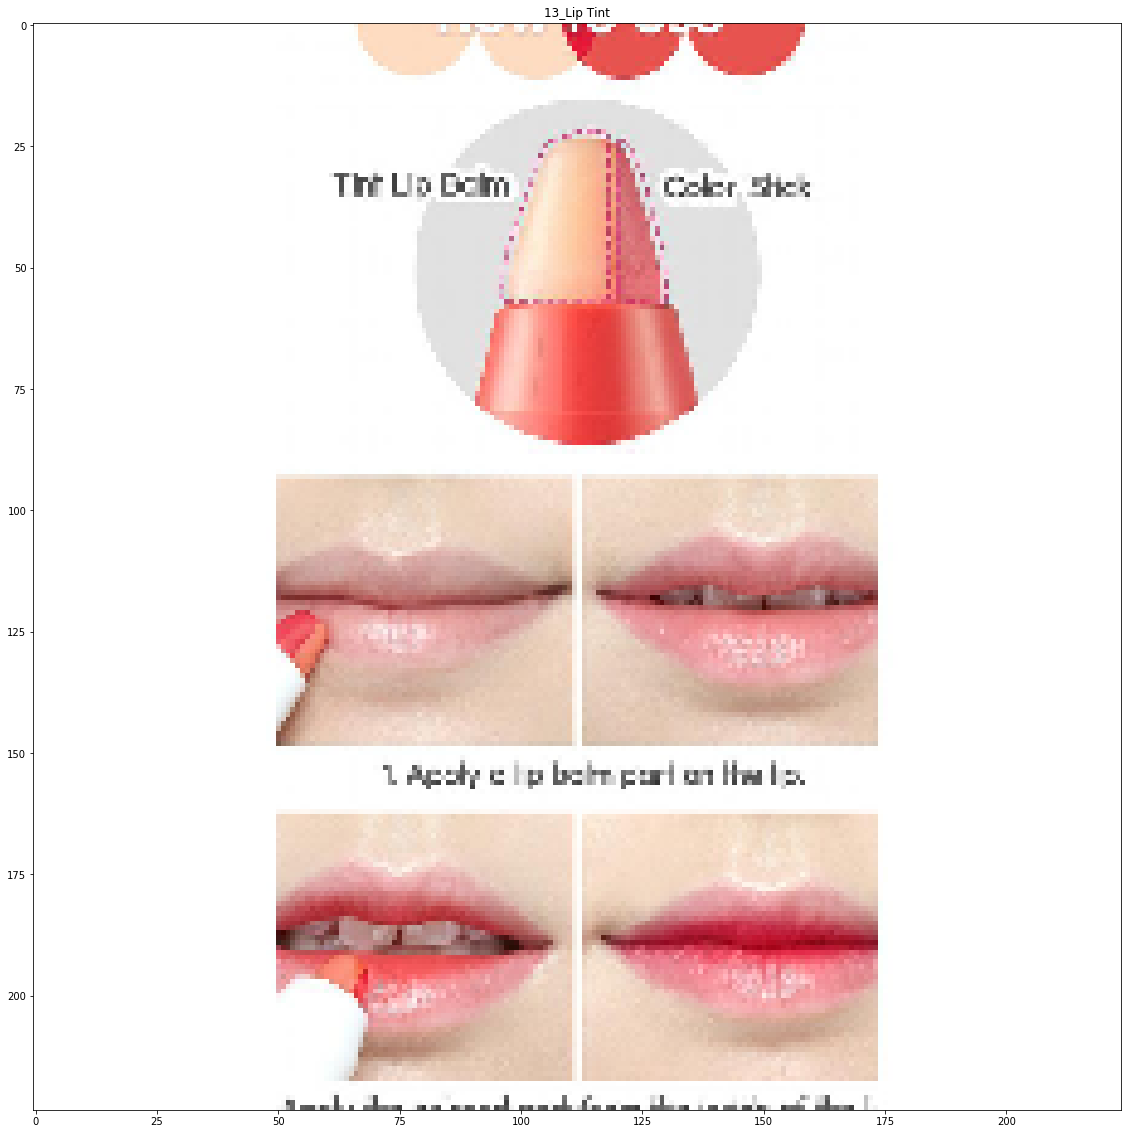

In [496]:
#just checking 
def show_batchimagetitle(i):
    plt.title(os.listdir('training_image')[np.argmax(label_batch[i])])
    plt.imshow(image_batch[i])

show_batchimagetitle(30)

In [497]:
import tensorflow.keras.backend as K
sess = K.get_session()
init = tf.global_variables_initializer()

sess.run(init)

In [498]:
result_batch = classifier_model.predict(image_batch)
result_batch.shape

(32, 1001)

In [499]:
#get top2 prediction
#result_batch gives scores for each class. Argsort gives index of lowest score to highest score 
#first slicing [:,-1::-1] is to change it to descending order
#second slicing is to get the top 2 highest score

top2 = np.argsort(result_batch,axis=-1)[:,-1::-1][:,0:2]

In [500]:
labels_batch = [[imagenet_labels[i1], imagenet_labels[i2]] for i1,i2 in top2]  
#labels_batch = imagenet_labels[np.argmax(result_batch, axis=-1)]
labels_batch

[['cellular telephone', 'iPod'],
 ['packet', 'radio'],
 ['screwdriver', 'lipstick'],
 ['lighter', 'combination lock'],
 ['soap dispenser', 'face powder'],
 ['cellular telephone', 'hand-held computer'],
 ['cellular telephone', 'remote control'],
 ['cellular telephone', 'hand-held computer'],
 ['loudspeaker', 'desktop computer'],
 ['lipstick', 'face powder'],
 ['pencil sharpener', 'buckle'],
 ['space bar', 'pencil box'],
 ['cellular telephone', 'hand-held computer'],
 ['notebook', 'desktop computer'],
 ['cellular telephone', 'hand-held computer'],
 ['switch', 'safe'],
 ['remote control', 'iPod'],
 ['face powder', 'purse'],
 ['cellular telephone', 'desktop computer'],
 ['hard disc', 'cellular telephone'],
 ['pill bottle', 'hair spray'],
 ['iPod', 'hand-held computer'],
 ['ashcan', 'binder'],
 ['packet', 'cash machine'],
 ['screwdriver', 'syringe'],
 ['web site', 'Band Aid'],
 ["carpenter's kit", 'ballpoint'],
 ['lotion', 'sunscreen'],
 ['lotion', 'Band Aid'],
 ['cup', 'stethoscope'],
 ['l

In [503]:
label_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
label_names = np.array([key.title() for key, value in label_names])
label_names

array(['0_Face Palette', '10_Setting Spray', '11_Bronzer', '12_Lipstick',
       '13_Lip Tint', '14_Lip Gloss', '15_Lip Liner',
       '16_Other Lip Cosmetics', '1_Foundation', '2_Blush On',
       '31_Iphone', '32_Samsung', '33_Sony', '34_Xiaomi',
       '35_Others Mobile & Tablet', '36_Blackberry', '37_Lenovo',
       '38_Nokia', '39_Brandcode', '3_Powder', '40_Infinix', '41_Oppo',
       '42_Vivo', '43_Asus', '44_Evercoss', '45_Advan', '46_Mito',
       '47_Huawei', '48_Sharp', '49_Motorola', '4_Other Face Cosmetics',
       '50_Strawberry', '51_Realme', '52_Icherry', '53_Smartfren',
       '54_Honor', '55_Alcatel', '56_Maxtron', '57_Spc',
       '5_Bb & Cc Cream', '6_Contour', '7_Concealer', '8_Highlighter',
       '9_Primer'], dtype='<U25')

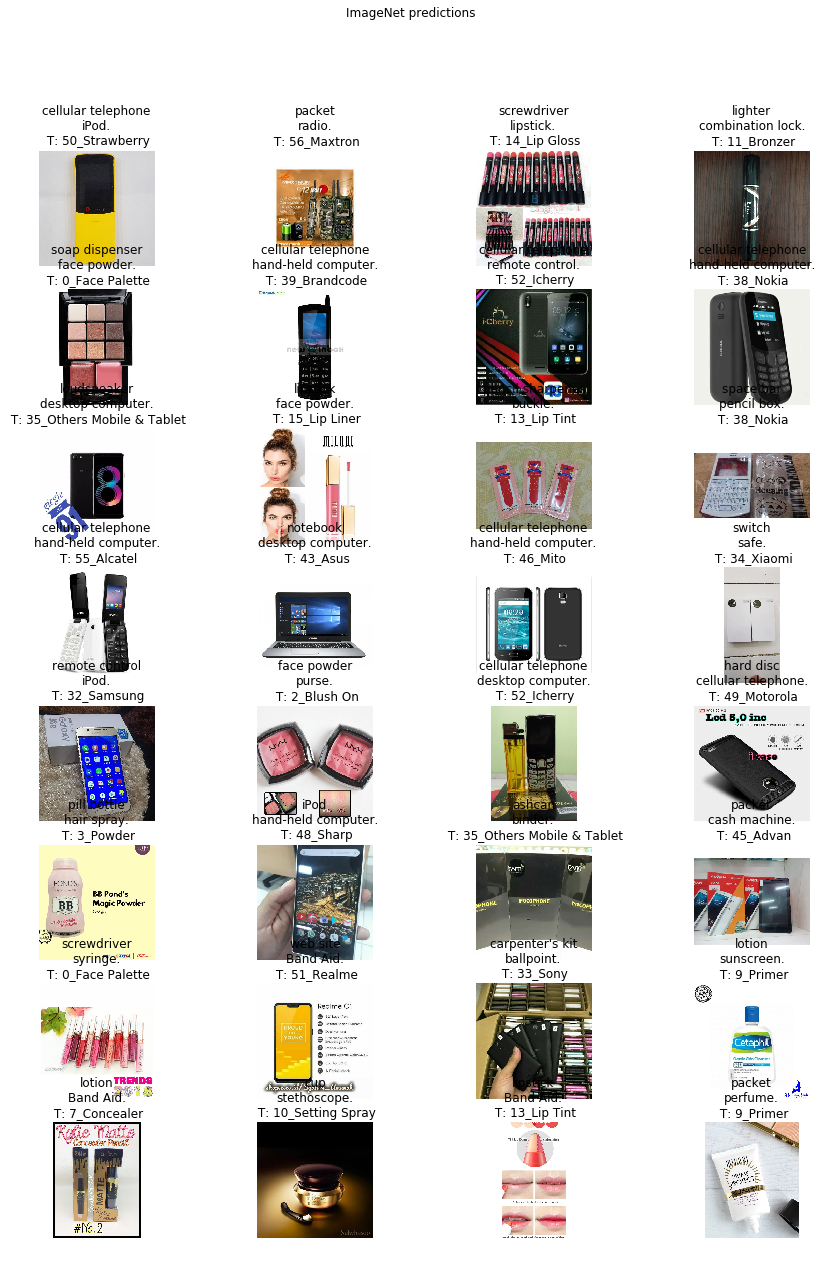

In [504]:
#display 32 samples
# top 2 predictions followed by groundtruth

plt.figure(figsize=(15,20))
for n in range(32):
  plt.subplot(8,4,n+1)
  #plt.subplots_adjust(hspace=)
  plt.imshow(image_batch[n])
  plt.title(labels_batch[n][0]+'\n'+labels_batch[n][1]+'.\n T: '+ label_names[np.argmax(label_batch[n])])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

<a id='retrain'></a>

# Retraining model

In [505]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/2" #@param {type:"string"}

In [506]:
def feature_extractor(x):
  feature_extractor_module = hub.Module(feature_extractor_url)
  return feature_extractor_module(x)

IMAGE_SIZE = hub.get_expected_image_size(hub.Module(feature_extractor_url))
IMAGE_SIZE


[224, 224]

In [615]:
training_image = os.getcwd() + '\\training_image'
testing_image = os.getcwd() + '\\testing_image'

In [616]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
training_image = image_generator.flow_from_directory(str(training_image), target_size=IMAGE_SIZE)
for image_batch,label_batch in training_image:
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
testing_image = image_generator.flow_from_directory(str(testing_image), target_size=IMAGE_SIZE)
for image_batch,label_batch in testing_image:
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break

Found 900 images belonging to 44 classes.
Image batch shape:  (32, 224, 224, 3)
Labe batch shape:  (32, 44)
Found 100 images belonging to 58 classes.
Image batch shape:  (32, 224, 224, 3)
Labe batch shape:  (32, 58)


In [617]:
features_extractor_layer = layers.Lambda(feature_extractor, input_shape=IMAGE_SIZE+[3])
features_extractor_layer

In [618]:
features_extractor_layer.trainable = False

In [619]:
model = tf.keras.Sequential([
  features_extractor_layer,
  layers.Dense(image_data.num_classes, activation='softmax')
])
model.summary()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0309 18:24:08.666351 10556 saver.py:1483] Saver not created because there are no variables in the graph to restore


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_6 (Lambda)            (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 44)                56364     
Total params: 56,364
Trainable params: 56,364
Non-trainable params: 0
_________________________________________________________________


In [620]:
import tensorflow.keras.backend as K
sess = K.get_session()
init = tf.global_variables_initializer()

sess.run(init)

In [621]:
#to make sure the result array is predicting for right number of output
trial_result = model.predict(image_batch)
trial_result.shape

(32, 44)

In [622]:
model.compile(
  optimizer=tf.train.AdamOptimizer(), 
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [623]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    
  def on_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])

In [624]:
steps_per_epoch = training_image.samples//training_image.batch_size
batch_stats = CollectBatchStats()
model.fit((item for item in training_image), epochs=10, 
                    steps_per_epoch=steps_per_epoch,
                    callbacks = [batch_stats])

Epoch 1/10
28/28 [==============================] - ETA: 2:04 - loss: 4.2833 - acc: 0.062 - ETA: 1:16 - loss: 4.1800 - acc: 0.078 - ETA: 1:00 - loss: 4.2063 - acc: 0.072 - ETA: 50s - loss: 4.1838 - acc: 0.054 - ETA: 44s - loss: 4.1888 - acc: 0.04 - ETA: 40s - loss: 4.2114 - acc: 0.03 - ETA: 37s - loss: 4.1975 - acc: 0.03 - ETA: 34s - loss: 4.2177 - acc: 0.02 - ETA: 31s - loss: 4.2067 - acc: 0.02 - ETA: 29s - loss: 4.1811 - acc: 0.03 - ETA: 27s - loss: 4.1439 - acc: 0.03 - ETA: 25s - loss: 4.1268 - acc: 0.03 - ETA: 23s - loss: 4.1234 - acc: 0.03 - ETA: 21s - loss: 4.1019 - acc: 0.03 - ETA: 19s - loss: 4.0931 - acc: 0.03 - ETA: 18s - loss: 4.0733 - acc: 0.03 - ETA: 16s - loss: 4.0575 - acc: 0.03 - ETA: 14s - loss: 4.0455 - acc: 0.03 - ETA: 13s - loss: 4.0384 - acc: 0.03 - ETA: 11s - loss: 4.0152 - acc: 0.03 - ETA: 10s - loss: 3.9866 - acc: 0.04 - ETA: 8s - loss: 3.9683 - acc: 0.0412 - ETA: 7s - loss: 3.9565 - acc: 0.039 - ETA: 5s - loss: 3.9341 - acc: 0.040 - ETA: 4s - loss: 3.9174 - acc

28/28 [==============================] - ETA: 40s - loss: 0.9285 - acc: 0.87 - ETA: 38s - loss: 0.8845 - acc: 0.84 - ETA: 37s - loss: 0.9076 - acc: 0.83 - ETA: 35s - loss: 0.9427 - acc: 0.82 - ETA: 34s - loss: 0.9714 - acc: 0.81 - ETA: 28s - loss: 1.0560 - acc: 0.81 - ETA: 28s - loss: 1.0483 - acc: 0.83 - ETA: 27s - loss: 1.0207 - acc: 0.84 - ETA: 26s - loss: 1.0055 - acc: 0.85 - ETA: 24s - loss: 0.9713 - acc: 0.86 - ETA: 23s - loss: 0.9608 - acc: 0.86 - ETA: 22s - loss: 0.9423 - acc: 0.87 - ETA: 21s - loss: 0.9363 - acc: 0.87 - ETA: 19s - loss: 0.9245 - acc: 0.88 - ETA: 18s - loss: 0.9113 - acc: 0.88 - ETA: 17s - loss: 0.9020 - acc: 0.89 - ETA: 15s - loss: 0.9069 - acc: 0.88 - ETA: 14s - loss: 0.8988 - acc: 0.88 - ETA: 13s - loss: 0.8869 - acc: 0.88 - ETA: 11s - loss: 0.8800 - acc: 0.89 - ETA: 10s - loss: 0.8791 - acc: 0.89 - ETA: 8s - loss: 0.8758 - acc: 0.8920 - ETA: 7s - loss: 0.8758 - acc: 0.889 - ETA: 5s - loss: 0.8737 - acc: 0.891 - ETA: 4s - loss: 0.8780 - acc: 0.891 - ETA: 2s 

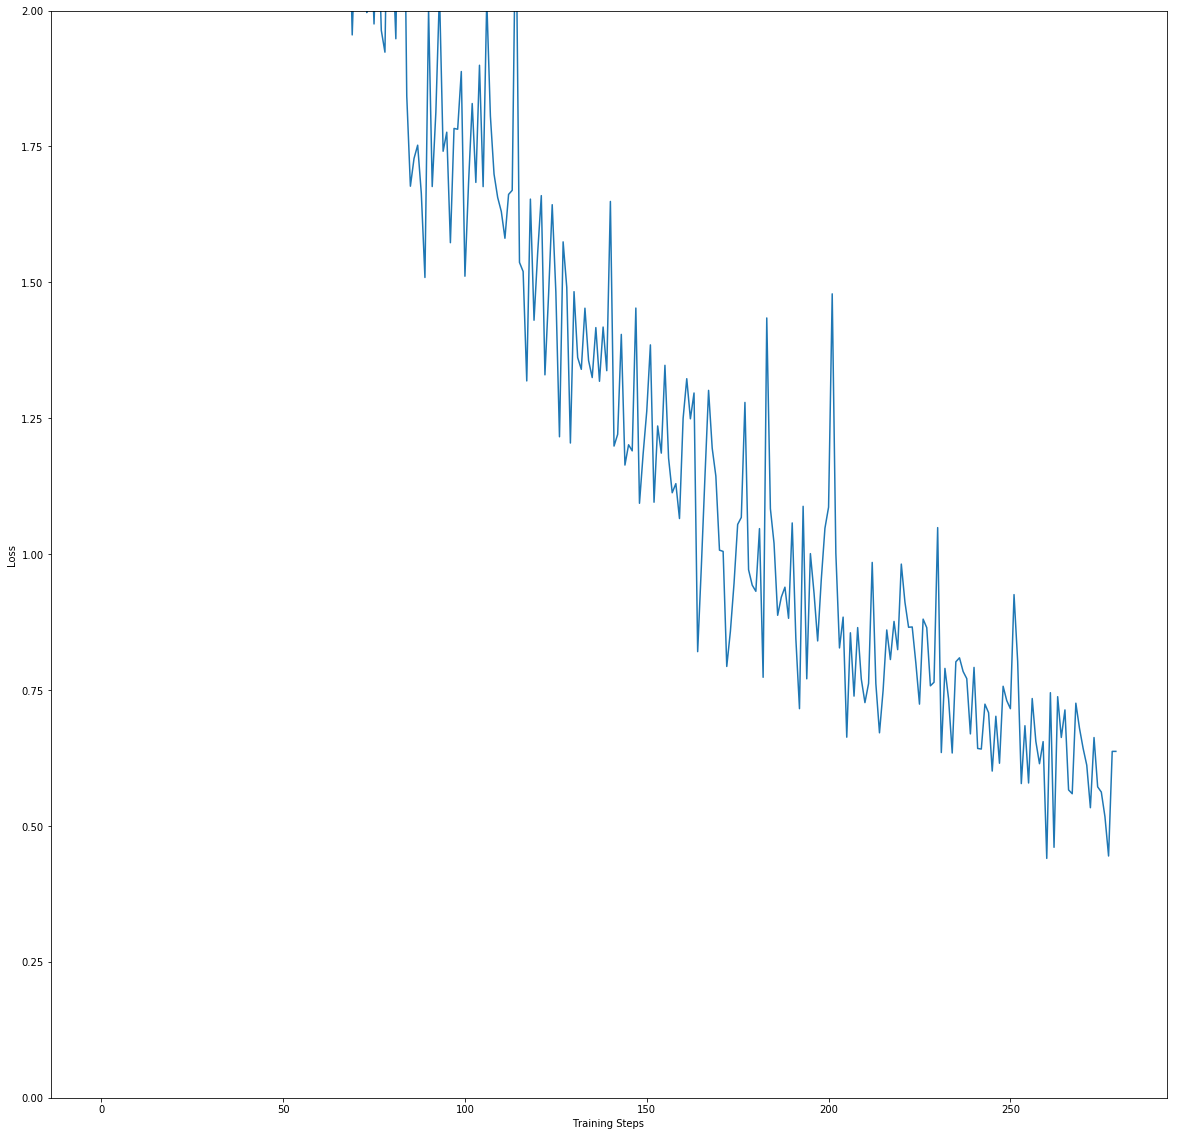

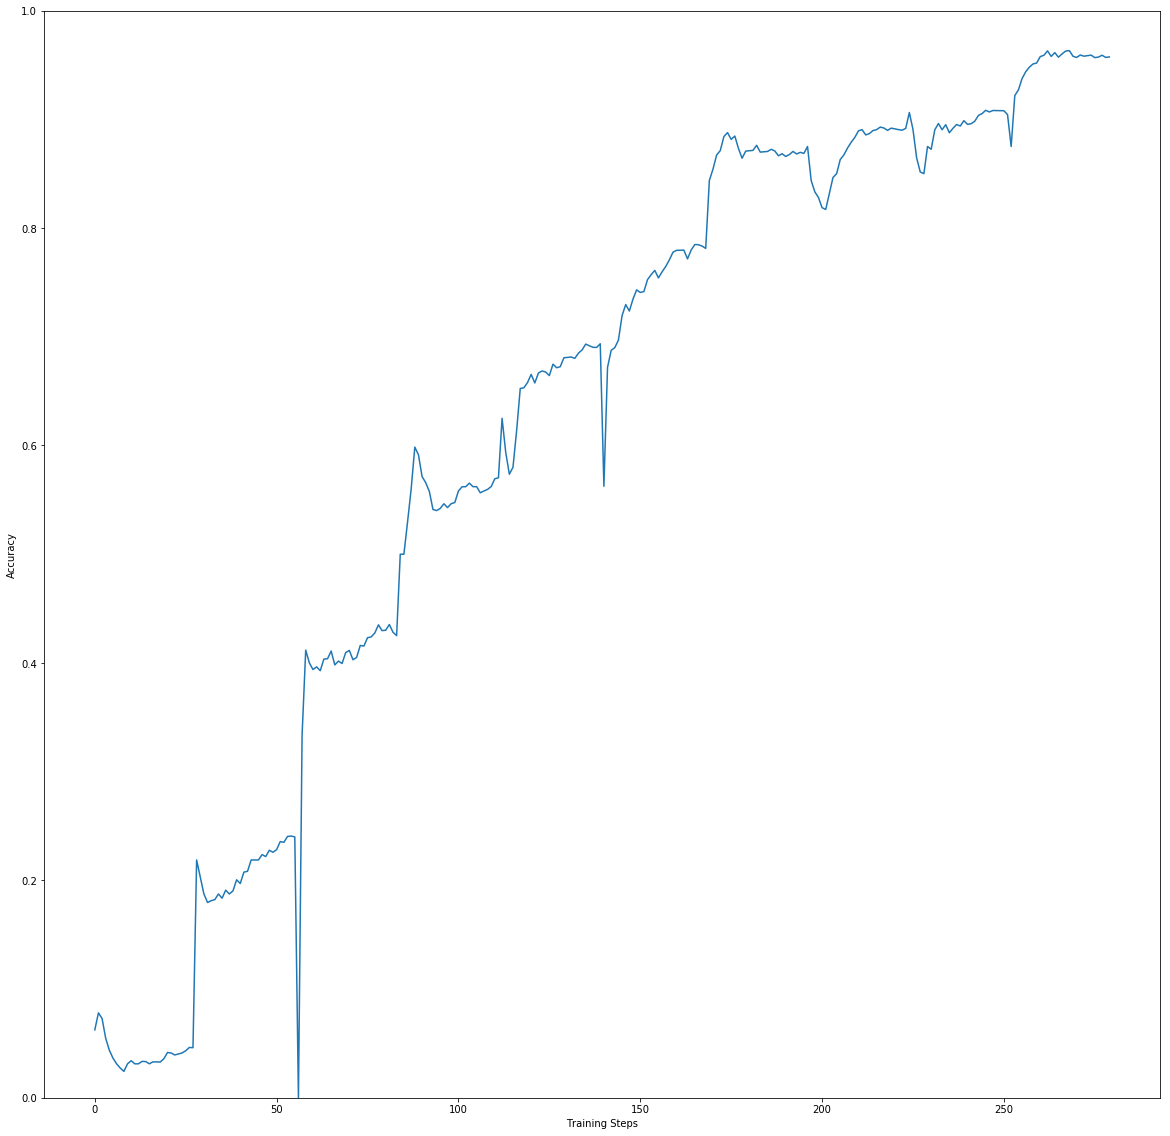

In [625]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats.batch_losses)

plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats.batch_acc)

In [627]:
result = model.predict(testing_image)
result.shape

(100, 44)

In [628]:
# mapper for mapping result array indices to predictions, and test images indices to groundtruth

label_names = sorted(testing_image.class_indices.items(), key=lambda pair:pair[1])
label_names = np.array([key.title() for key, value in label_names])
label_names

array(['0_Face Palette', '10_Setting Spray', '11_Bronzer', '12_Lipstick',
       '13_Lip Tint', '14_Lip Gloss', '15_Lip Liner',
       '16_Other Lip Cosmetics', '17_Others', '18_Casual Dress',
       '19_Party Dress', '1_Foundation', '20_Maxi Dress',
       '21_A Line Dress', '22_Bodycon Dress', '23_Wedding Dress',
       '24_Big Size Dress', '25_Tshirt', '26_Blouse\xa0', '27_Shirt',
       '28_Tanktop', '29_Crop Top', '2_Blush On', '30_Big Size Top',
       '31_Iphone', '32_Samsung', '33_Sony', '34_Xiaomi',
       '35_Others Mobile & Tablet', '36_Blackberry', '37_Lenovo',
       '38_Nokia', '39_Brandcode', '3_Powder', '40_Infinix', '41_Oppo',
       '42_Vivo', '43_Asus', '44_Evercoss', '45_Advan', '46_Mito',
       '47_Huawei', '48_Sharp', '49_Motorola', '4_Other Face Cosmetics',
       '50_Strawberry', '51_Realme', '52_Icherry', '53_Smartfren',
       '54_Honor', '55_Alcatel', '56_Maxtron', '57_Spc',
       '5_Bb & Cc Cream', '6_Contour', '7_Concealer', '8_Highlighter',
       '9_Pri

In [662]:
# mapping result array indices to predictions

pred = label_names[np.argmax(result, axis=-1)]
pred

array(['32_Samsung', '2_Blush On', '20_Maxi Dress', '28_Tanktop',
       '10_Setting Spray', '27_Shirt', '29_Crop Top', '41_Oppo',
       '44_Evercoss', '43_Asus', '21_A Line Dress', '15_Lip Liner',
       '19_Party Dress', '43_Asus', '27_Shirt', '45_Advan',
       '0_Face Palette', '27_Shirt', '20_Maxi Dress', '40_Infinix',
       '19_Party Dress', '49_Motorola', '31_Iphone', '17_Others',
       '18_Casual Dress', '37_Lenovo', '0_Face Palette', '11_Bronzer',
       '48_Sharp', '43_Asus', '35_Others Mobile & Tablet', '27_Shirt',
       '32_Samsung', '29_Crop Top', '36_Blackberry', '18_Casual Dress',
       '36_Blackberry', '14_Lip Gloss', '10_Setting Spray', '25_Tshirt',
       '17_Others', '48_Sharp', '29_Crop Top', '0_Face Palette',
       '34_Xiaomi', '34_Xiaomi', '39_Brandcode', '22_Bodycon Dress',
       '41_Oppo', '18_Casual Dress', '15_Lip Liner', '19_Party Dress',
       '19_Party Dress', '46_Mito', '41_Oppo', '19_Party Dress',
       '2_Blush On', '34_Xiaomi', '23_Wedding Dres

In [664]:
# mapping test images indices to groundtruth

groundtruth = [label_names[testing_image.classes[i]] for i in testing_image.index_array]
groundtruth

['36_Blackberry',
 '32_Samsung',
 '5_Bb & Cc Cream',
 '32_Samsung',
 '41_Oppo',
 '42_Vivo',
 '31_Iphone',
 '12_Lipstick',
 '42_Vivo',
 '4_Other Face Cosmetics',
 '31_Iphone',
 '8_Highlighter',
 '43_Asus',
 '51_Realme',
 '41_Oppo',
 '31_Iphone',
 '16_Other Lip Cosmetics',
 '31_Iphone',
 '35_Others Mobile & Tablet',
 '31_Iphone',
 '12_Lipstick',
 '31_Iphone',
 '36_Blackberry',
 '31_Iphone',
 '0_Face Palette',
 '1_Foundation',
 '41_Oppo',
 '41_Oppo',
 '41_Oppo',
 '12_Lipstick',
 '33_Sony',
 '31_Iphone',
 '54_Honor',
 '41_Oppo',
 '34_Xiaomi',
 '4_Other Face Cosmetics',
 '41_Oppo',
 '12_Lipstick',
 '35_Others Mobile & Tablet',
 '31_Iphone',
 '2_Blush On',
 '32_Samsung',
 '15_Lip Liner',
 '31_Iphone',
 '7_Concealer',
 '9_Primer',
 '4_Other Face Cosmetics',
 '12_Lipstick',
 '3_Powder',
 '43_Asus',
 '12_Lipstick',
 '33_Sony',
 '5_Bb & Cc Cream',
 '31_Iphone',
 '5_Bb & Cc Cream',
 '14_Lip Gloss',
 '35_Others Mobile & Tablet',
 '34_Xiaomi',
 '45_Advan',
 '34_Xiaomi',
 '12_Lipstick',
 '32_Samsung

In [665]:
# prediction accuracy

sum(pred == groundtruth)/len(pred)

0.02

In [668]:
#record prediction on testing

filenames = [testing_image.filenames[i] for i in testing_image.index_array]
df = pd.DataFrame(zip(filenames,groundtruth,pred),
                 columns=['filename','groundtruth','pred'])
df.to_csv('result.csv',index = None, header=True)


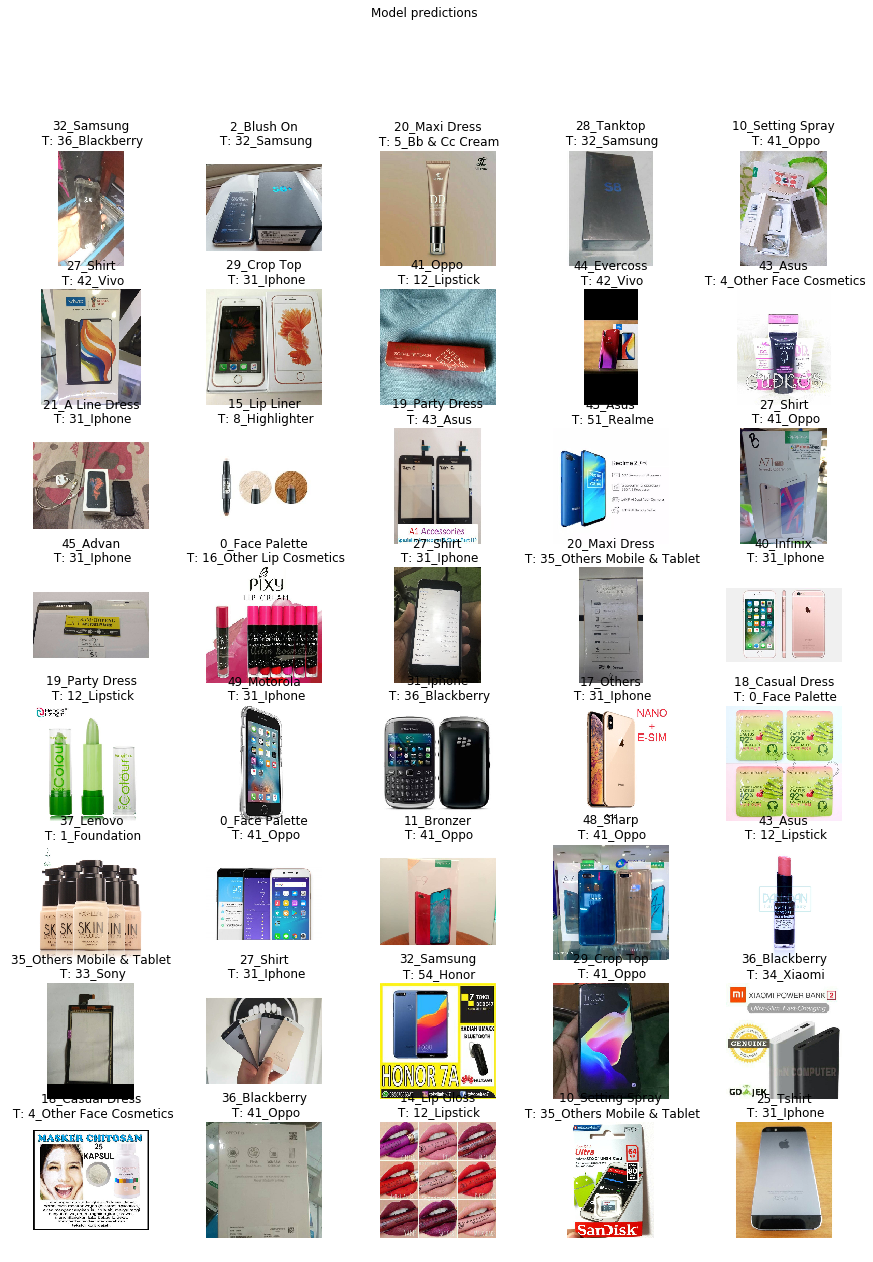

In [636]:
plt.figure(figsize=(15,20))
for n in range(40):
    
  batch_no = n//32
  subbatch_no = n%32
    
  plt.subplot(8,5,n+1)
  plt.imshow(testing_image[batch_no][0][subbatch_no])
  plt.title(pred[n]+'\n T: '+groundtruth2[n])
  plt.axis('off')
_ = plt.suptitle("Model predictions")

In [101]:
export_path = tf.contrib.saved_model.save_keras_model(model, "saved_models")
export_path

Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


W0309 00:01:31.631592 11500 deprecation.py:323] From c:\myproj\ndsc\sss\lib\site-packages\tensorflow\python\keras\engine\network.py:1436: update_checkpoint_state (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0309 00:01:34.444627 11500 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


W0309 00:01:36.374997 11500 deprecation.py:323] From c:\myproj\ndsc\sss\lib\site-packages\tensorflow\python\saved_model\signature_def_utils_impl.py:257: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0309 00:01:36.376998 11500 export.py:587] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0309 00:01:36.379003 11500 export.py:587] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


I0309 00:01:36.380000 11500 export.py:587] Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']


I0309 00:01:36.382002 11500 export.py:587] Signatures INCLUDED in export for Train: ['train']


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


I0309 00:01:36.383005 11500 export.py:587] Signatures INCLUDED in export for Eval: None


W0309 00:01:36.385004 11500 tf_logging.py:161] Export includes no default signature!


INFO:tensorflow:No assets to save.


I0309 00:01:36.961413 11500 builder_impl.py:629] No assets to save.


INFO:tensorflow:No assets to write.


I0309 00:01:36.963415 11500 builder_impl.py:124] No assets to write.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0309 00:01:40.395855 11500 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0309 00:01:41.556680 11500 export.py:587] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0309 00:01:41.558679 11500 export.py:587] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


I0309 00:01:41.560681 11500 export.py:587] Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


I0309 00:01:41.562683 11500 export.py:587] Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']


I0309 00:01:41.564684 11500 export.py:587] Signatures INCLUDED in export for Eval: ['eval']


W0309 00:01:41.565687 11500 tf_logging.py:161] Export includes no default signature!


INFO:tensorflow:No assets to save.


I0309 00:01:42.072044 11500 builder_impl.py:629] No assets to save.


INFO:tensorflow:No assets to write.


I0309 00:01:42.074046 11500 builder_impl.py:124] No assets to write.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0309 00:01:47.201707 11500 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0309 00:01:48.148361 11500 export.py:587] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0309 00:01:48.152365 11500 export.py:587] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


I0309 00:01:48.156368 11500 export.py:587] Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


I0309 00:01:48.160370 11500 export.py:587] Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


I0309 00:01:48.165374 11500 export.py:587] Signatures INCLUDED in export for Eval: None


INFO:tensorflow:No assets to save.


I0309 00:01:48.760815 11500 builder_impl.py:629] No assets to save.


INFO:tensorflow:No assets to write.


I0309 00:01:48.762799 11500 builder_impl.py:124] No assets to write.


INFO:tensorflow:SavedModel written to: saved_models\1552060886\saved_model.pb


I0309 00:01:49.382261 11500 builder_impl.py:414] SavedModel written to: saved_models\1552060886\saved_model.pb


b'saved_models\\1552060886'